In [1]:
import pandas as pd
import numpy as np

import ruptures as rpt
from ruptures.metrics import precision_recall
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

import lightgbm as lgb
import seaborn as sns

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 9]

In [3]:
import holidays

In [4]:
df = pd.read_csv('/Users/estyle-150/github/my_signage/data/processed/processed20240826.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df

,y,client,close,price_am,price_pm,is_train,price,year,month,weekday,...,price_am_lag_7,price_am_lag_365,price_pm_lag_1,price_pm_lag_7,price_pm_lag_365,price_am_moving_avg_7,price_am_moving_avg_30,price_pm_moving_avg_7,price_pm_moving_avg_30,day
datetime,,,,,,,,,,,,,,,,,,,,,
2010-07-01,17,0,0,0.192308,0.076923,1,0.134615,2010,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2010-07-02,18,0,0,0.692308,0.423077,1,0.557692,2010,7,4,...,NaN,NaN,0.076923,NaN,NaN,NaN,NaN,NaN,NaN,2
2010-07-03,20,0,0,1.807692,1.192308,1,1.500000,2010,7,5,...,NaN,NaN,0.423077,NaN,NaN,NaN,NaN,NaN,NaN,3
2010-07-04,20,0,0,1.407407,0.925926,1,1.166667,2010,7,6,...,NaN,NaN,1.192308,NaN,NaN,NaN,NaN,NaN,NaN,4
2010-07-05,14,0,0,0.346154,0.192308,1,0.269231,2010,7,0,...,NaN,NaN,0.925926,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-27,0,0,0,5.000000,4.000000,0,4.500000,2017,3,0,...,3.0,5.0,4.000000,4.0,4.0,3.857143,2.166667,4.000000,2.166667,27
2017-03-28,0,0,0,4.000000,4.000000,0,4.000000,2017,3,1,...,4.0,4.0,4.000000,4.0,4.0,3.857143,2.233333,4.000000,2.233333,28
2017-03-29,0,0,0,3.000000,3.000000,0,3.000000,2017,3,2,...,2.0,4.0,4.000000,4.0,4.0,4.000000,2.266667,3.857143,2.266667,29


In [5]:
pd.DataFrame(df.columns)

,0
0,y
1,client
2,close
3,price_am
4,price_pm
5,is_train
6,price
7,year
8,month
9,weekday


In [6]:
# 使用するカラム
list_no = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10]
use_list = [df.columns[i] for i in list_no]

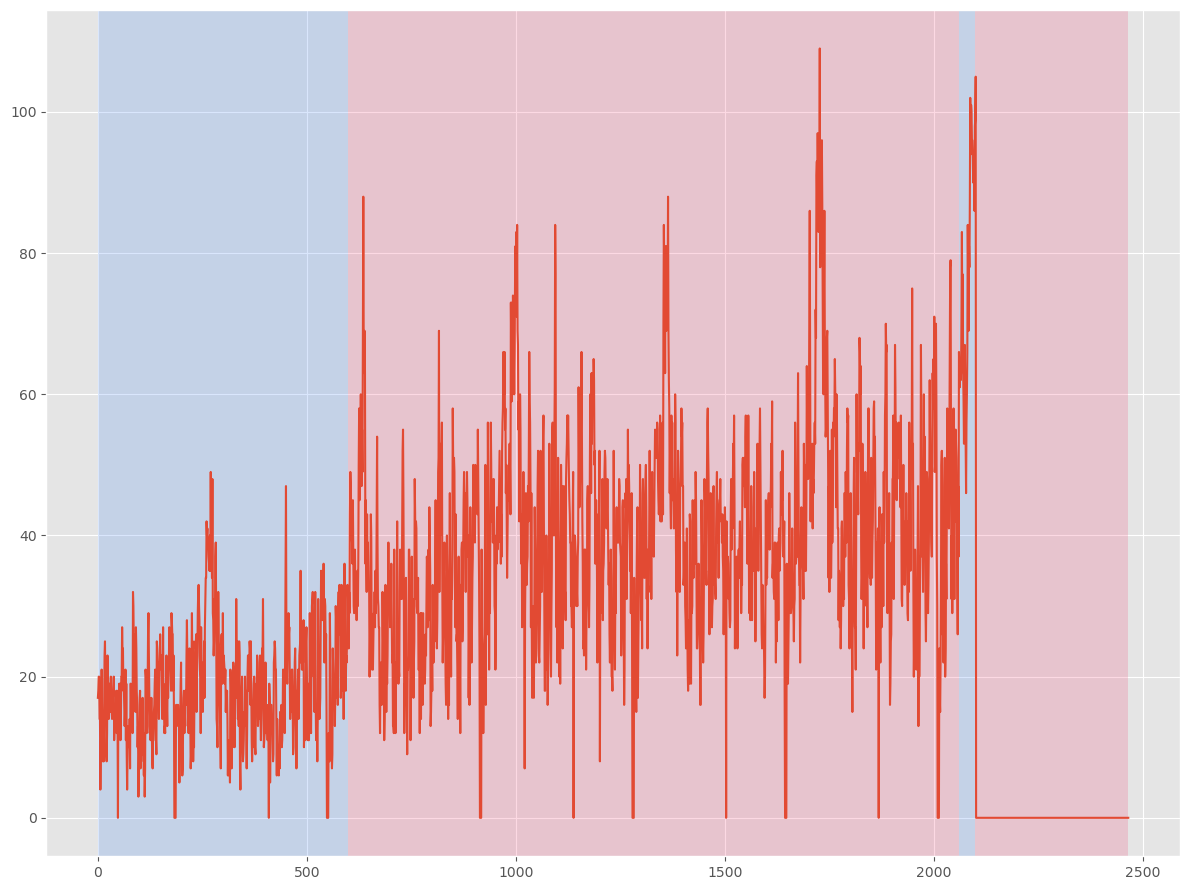

[600, 2060, 2100, 2466]


In [7]:
################
### 変化点検知 ###
################

# コスト関数の設定
model = "l2"
# アルゴの設定と学習
algo = rpt.Dynp(model=model).fit(df[['y']])
# 変化点の検出
my_bkps = algo.predict(n_bkps=3)
# 結果のプロット
rpt.show.display(df[['y']], my_bkps, figsize=(12, 9))
plt.show()
# 検出された変化点
print(my_bkps)


In [8]:
df = df[my_bkps[0]:]
df = df[use_list]

,y,client,close,price_am,price_pm,year,month,weekday,y_lag_365
datetime,,,,,,,,,
2012-02-21,24,0,0,0.0,0.0,2012,2,1,26.0
2012-02-22,32,0,0,0.0,0.0,2012,2,2,15.0
2012-02-23,29,0,0,1.0,0.0,2012,2,3,21.0
2012-02-24,43,0,0,1.0,1.0,2012,2,4,23.0
2012-02-25,49,0,0,3.0,2.0,2012,2,5,29.0


,client,close,price_am,price_pm,year,month,weekday,y_lag_365
datetime,,,,,,,,
2016-04-01,1,0,3.0,2.0,2016,4,4,60.0
2016-04-02,0,0,5.0,5.0,2016,4,5,75.0
2016-04-03,1,0,2.0,2.0,2016,4,6,86.0
2016-04-04,1,0,1.0,1.0,2016,4,0,69.0
2016-04-05,0,0,1.0,1.0,2016,4,1,61.0


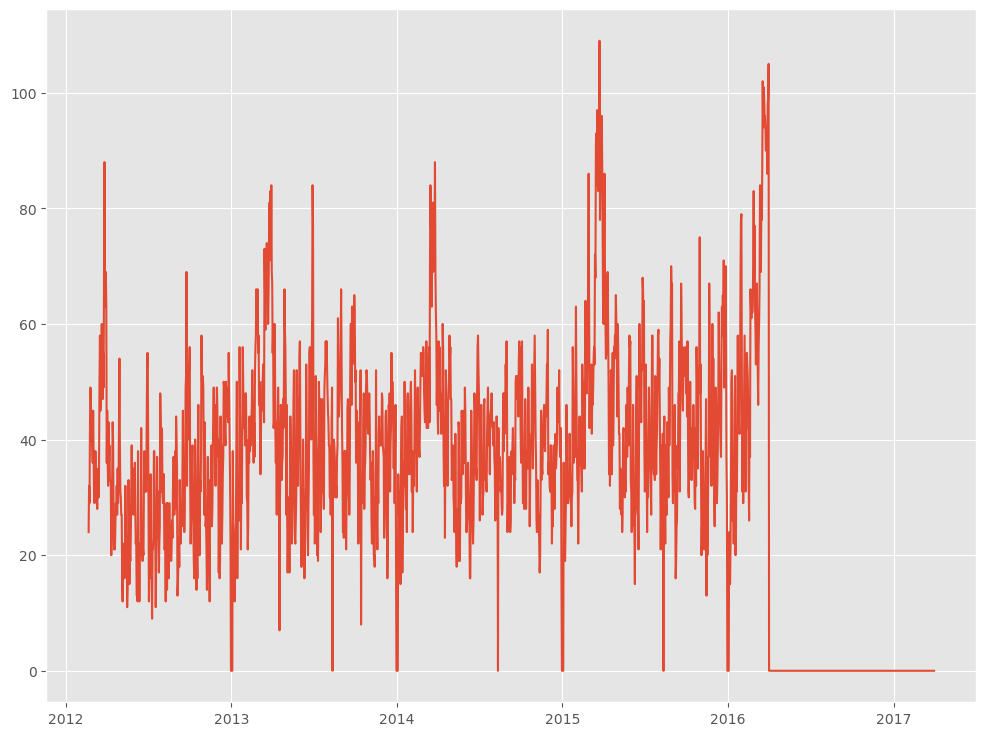

In [9]:

# 訓練データをとる
train_data = df[df['is_train'] == 1].copy()

# テストデータをとる
test_data = df[df['is_train'] == 0].copy()

# 訓練データから不要な列（'is_train'）を削除
train_data.drop(['is_train'], axis=1, inplace=True)

# テストデータから不要な列を削除
test_data.drop(['y','is_train'], axis=1, inplace=True)

# テストデータからcloseを削除（このデータで予測する）
test_data_open = test_data.drop(['close'], axis=1, inplace=False)

display(train_data.head(), test_data.head())


plt.plot(df['y'])

In [10]:
# 訓練データから閉店時のデータを削除（これを学習させる）
train_data_open =  train_data[train_data['close']==0]
train_data_open_2 = train_data_open.drop(['close'], axis=1, inplace=False)

#print(len(train_data_open_2))
#print(len(train_data))

In [11]:
from sklearn.model_selection import KFold
import optuna.integration.lightgbm as lgb_op
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error


# 訓練データと検証データに分ける
N = 30
X_train = train_data_open_2.drop(['y'], axis=1)[:-N]
y_train = train_data_open_2['y'][:-N]

X_test = train_data_open_2.drop(['y'], axis=1)[-N:]
y_test = train_data_open_2['y'][-N:]

# LightGBM用のデータセット
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)

# 評価基準 
params = {"objective" : "regression", 
              "metric" : "mse", 
              "num_leaves" : 7,
              "early_stopping_rounds" : 30,
              "verbosity": -1}

# 回帰モデル作成
model = lgb.train(params, lgb_train, valid_sets=lgb_test)

# 予測
test_pred = model.predict(X_test)
pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(test_pred)], axis = 1)
    
pred_df.columns = ['true', 'pred']
pred_df

mse = mean_squared_error(y_test, test_pred)
print('MSE:',round(mse,3))

MSE: 92.769


([<matplotlib.axis.XTick at 0x154348380>,
 [Text(0, 0, 'weekday'),
  Text(1, 0, 'client'),
  Text(2, 0, 'price_am'),
  Text(3, 0, 'year'),
  Text(4, 0, 'price_pm'),
  Text(5, 0, 'month'),
  Text(6, 0, 'y')])

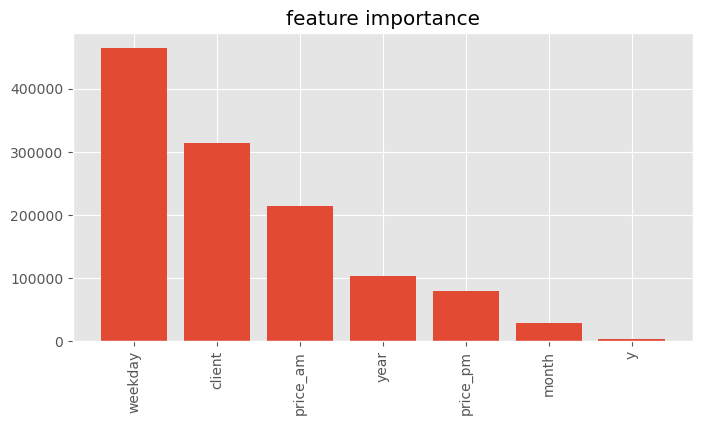

In [12]:
importances = model.feature_importance(importance_type='gain')
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,4))
plt.title('feature importance')
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), train_data_open_2.columns[indices], rotation=90)

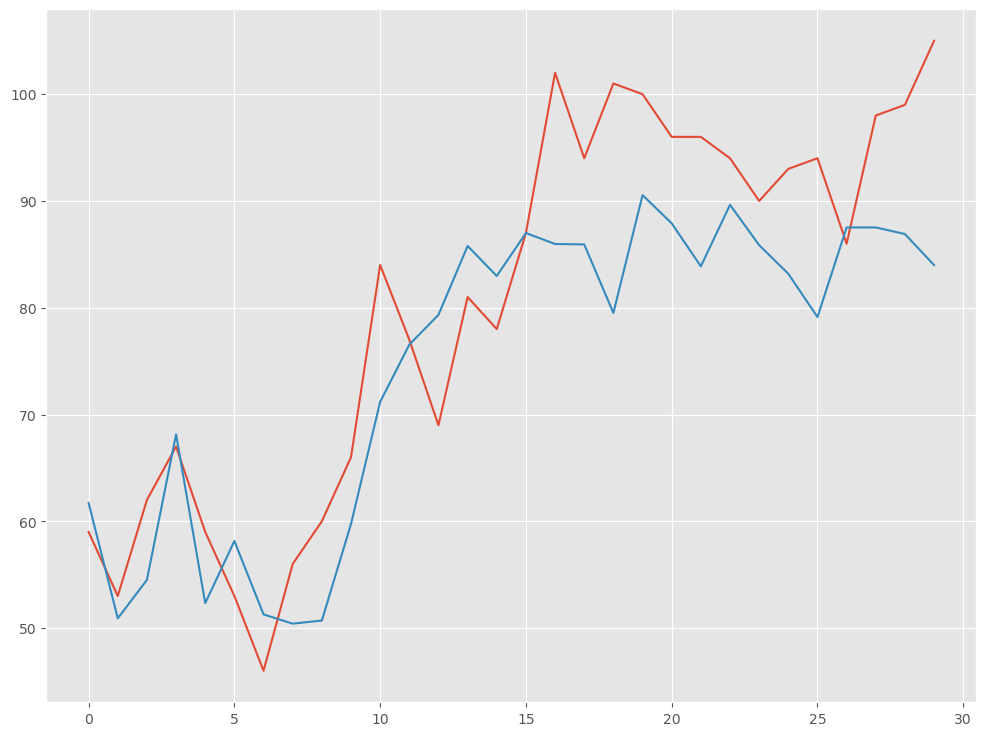

In [13]:
# 可視化
plt.plot(pred_df)

In [14]:
train_data[train_data['close']==1]

,y,client,close,price_am,price_pm,year,month,weekday,y_lag_365
datetime,,,,,,,,,
2012-12-31,0,0,1,0.384615,0.269231,2012,12,0,0.0
2013-01-01,0,0,1,0.107143,0.071429,2013,1,1,0.0
2013-01-02,0,0,1,0.035714,0.000000,2013,1,2,0.0
2013-01-03,0,0,1,0.178571,0.107143,2013,1,3,12.0
2013-08-12,0,0,1,0.153846,0.038462,2013,8,0,14.0
2013-12-31,0,0,1,0.346154,0.153846,2013,12,1,0.0
2014-01-01,0,0,1,0.035714,0.000000,2014,1,2,0.0
2014-01-02,0,0,1,0.178571,0.107143,2014,1,3,0.0
2014-01-03,0,0,1,0.285714,0.178571,2014,1,4,0.0


In [15]:
# oputunaによるハイパーパラメータのチューニング
import optuna

In [16]:
x_tr = X_train
x_va = X_test
y_tr = y_train
y_va = y_test

In [17]:
# 固定値のハイパーパラメータ
params_base = {
    'objective' : 'regression',
    'metrics' : 'mse',
    'random_seed' : 123,    
    'learnig_rate' : 0.1,  # １回のブースティングで加算する重みの比率
    'min_data_in_bin' : 3,  # ヒストグラムの１つのbinに含まれる最小のレコード数
    'bagging_freq' : 0,
    'verbose' : -1,
}


# ハイパーパラメータの探索範囲
def objective(trial):
    params_turning = {
        'num_leaves' : trial.suggest_int('num_leaves', 50, 200),
        'min_data_in_leaf' : trial.suggest_int('min_data_in_leaf', 2, 30),
        'max_bins' : trial.suggest_int('max_bin', 200, 400),
        'bagging_fraction' : trial.suggest_float('bagging_fraction', 0.8, 0.95),
        'feature_fraction' : trial.suggest_float('eature_fraction', 0.35, 0.65),
        'min_gain_to_split' : trial.suggest_float('min_gain_to_split', 0.01, 1, log=True),
        'lambda_11' : trial.suggest_float('lambda_11', 0.01, 1, log=True),
        'lambda_12' : trial.suggest_float('lambda_12', 0.01, 1, log=True),
    }
    
    # 探索用ハイパーパラメータの設定
    params_turning.update(params_base)
    lgb_train = lgb.Dataset(x_tr, y_tr)
    lgb_eval = lgb.Dataset(x_va, y_va)

    #探索用ハイパーパラメータで学習
    model = lgb.train(params_turning,
                      lgb_train,
                      num_boost_round=6000,
                      valid_sets=[lgb_train, lgb_eval],
                      valid_names=['train', 'valid'],
                      callbacks=[lgb.early_stopping(50),
                                 lgb.log_evaluation(500)])
    y_va_pred = model.predict(x_va,
                              num_iteration=model.best_iteration)
    score = mean_absolute_error(y_va, y_va_pred)
    print('')
    return score

In [18]:
# ハイパーパラメータの最適化の実行
study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=0), direction='minimize')
study.optimize(objective, n_trials=1500)

[I 2024-09-06 17:13:33,609] A new study created in memory with name: no-name-c4819528-f14e-43b0-a878-1a461b3ae9d4
[I 2024-09-06 17:13:33,720] Trial 0 finished with value: 7.000283925350536 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 22, 'max_bin': 321, 'bagging_fraction': 0.8817324774495345, 'eature_fraction': 0.47709643980167143, 'min_gain_to_split': 0.19578897201212997, 'lambda_11': 0.07501954443620121, 'lambda_12': 0.6074996073425692}. Best is trial 0 with value: 7.000283925350536.
[I 2024-09-06 17:13:33,810] Trial 1 finished with value: 6.531964372321121 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 13, 'max_bin': 359, 'bagging_fraction': 0.8793342379629356, 'eature_fraction': 0.5204133683281797, 'min_gain_to_split': 0.70989362574059, 'lambda_11': 0.013869861245357327, 'lambda_12': 0.014936835544198456}. Best is trial 1 with value: 6.531964372321121.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[159]	train's l2: 35.8726	valid's l2: 75.1832

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[99]	train's l2: 26.7327	valid's l2: 69.6567

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:33,891] Trial 2 finished with value: 7.553286165421292 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 26, 'max_bin': 356, 'bagging_fraction': 0.9305018222370228, 'eature_fraction': 0.6435855026698292, 'min_gain_to_split': 0.3965675081771009, 'lambda_11': 0.08374496868436809, 'lambda_12': 0.36396393567863894}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:33,966] Trial 3 finished with value: 7.312767069411403 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 20, 'max_bin': 228, 'bagging_fraction': 0.9417003375574375, 'eature_fraction': 0.5065544965250215, 'min_gain_to_split': 0.06750312521595925, 'lambda_11': 0.0338151426782029, 'lambda_12': 0.35356346291488117}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:34,047] Trial 4 finished with value: 6.792677713662427 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 18, 'max_bin': 203, 'bagging_fraction': 0.8926453245613816, 'eature_fraction': 0.5336287168167264

Early stopping, best iteration is:
[122]	train's l2: 32.4939	valid's l2: 88.2846

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 32.6806	valid's l2: 81.6142

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[98]	train's l2: 31.9179	valid's l2: 74.2563

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:34,146] Trial 5 finished with value: 6.899462214856287 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 14, 'max_bin': 340, 'bagging_fraction': 0.8090338207443906, 'eature_fraction': 0.5500300146337003, 'min_gain_to_split': 0.21941976179005757, 'lambda_11': 0.02634905974115613, 'lambda_12': 0.018107254066631072}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:34,232] Trial 6 finished with value: 7.428631185170899 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 12, 'max_bin': 314, 'bagging_fraction': 0.865790227019348, 'eature_fraction': 0.6465121514177679, 'min_gain_to_split': 0.015998881492631498, 'lambda_11': 0.02616697456085447, 'lambda_12': 0.021019338091154416}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:34,335] Trial 7 finished with value: 7.418600321510521 and parameters: {'num_leaves': 148, 'min_data_in_leaf': 9, 'max_bin': 293, 'bagging_fraction': 0.8366638388002404, 'eature_fraction': 0.397690875093

Early stopping, best iteration is:
[85]	train's l2: 29.4032	valid's l2: 76.526

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[60]	train's l2: 26.5099	valid's l2: 82.1425

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 30.1313	valid's l2: 81.0903

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:34,435] Trial 8 finished with value: 6.912837291802811 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 12, 'max_bin': 365, 'bagging_fraction': 0.8145651913689592, 'eature_fraction': 0.6013834722496412, 'min_gain_to_split': 0.015566709318481201, 'lambda_11': 0.8972612866432508, 'lambda_12': 0.08655704137361815}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:34,511] Trial 9 finished with value: 6.8637472098192855 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 19, 'max_bin': 348, 'bagging_fraction': 0.8058781688381481, 'eature_fraction': 0.43484208877292285, 'min_gain_to_split': 0.017393745944806985, 'lambda_11': 0.0391093317225106, 'lambda_12': 0.0172764870082179}. Best is trial 1 with value: 6.531964372321121.


Early stopping, best iteration is:
[73]	train's l2: 28.7759	valid's l2: 73.6561

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[103]	train's l2: 37.5469	valid's l2: 75.4359

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:34,656] Trial 10 finished with value: 9.712261024938137 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 3, 'max_bin': 391, 'bagging_fraction': 0.9084065267120113, 'eature_fraction': 0.35831680797439047, 'min_gain_to_split': 0.9510758272467729, 'lambda_11': 0.012438875955963435, 'lambda_12': 0.07916048790686309}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:34,727] Trial 11 finished with value: 7.522587970908185 and parameters: {'num_leaves': 167, 'min_data_in_leaf': 30, 'max_bin': 205, 'bagging_fraction': 0.8800726656538855, 'eature_fraction': 0.5367604486405623, 'min_gain_to_split': 0.9049911227773816, 'lambda_11': 0.33972721438327746, 'lambda_12': 0.17971305001765864}. Best is trial 1 with value: 6.531964372321121.


Early stopping, best iteration is:
[75]	train's l2: 20.9248	valid's l2: 133.141

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 39.8468	valid's l2: 84.3263

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:34,926] Trial 12 finished with value: 8.74367732034275 and parameters: {'num_leaves': 166, 'min_data_in_leaf': 6, 'max_bin': 268, 'bagging_fraction': 0.9096819012990988, 'eature_fraction': 0.5690036877007391, 'min_gain_to_split': 0.06675147658013948, 'lambda_11': 0.9141193514066894, 'lambda_12': 0.041626708401802846}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:34,988] Trial 13 finished with value: 6.969466061786969 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 18, 'max_bin': 259, 'bagging_fraction': 0.8606449404802545, 'eature_fraction': 0.4747119743996827, 'min_gain_to_split': 0.3291942654310816, 'lambda_11': 0.010844293740159572, 'lambda_12': 0.1591077935458788}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:35,073] Trial 14 finished with value: 7.994621648241533 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 24, 'max_bin': 395, 'bagging_fraction': 0.909225842769227, 'eature_fraction': 0.5120844863151

Early stopping, best iteration is:
[109]	train's l2: 11.964	valid's l2: 111.77

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 40.9887	valid's l2: 73.8919

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 35.6973	valid's l2: 94.3239

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:35,171] Trial 15 finished with value: 6.97713061084188 and parameters: {'num_leaves': 164, 'min_data_in_leaf': 16, 'max_bin': 279, 'bagging_fraction': 0.8467910975209079, 'eature_fraction': 0.5926850185528931, 'min_gain_to_split': 0.47286561867300775, 'lambda_11': 0.14883641490779298, 'lambda_12': 0.010813279908977303}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:35,262] Trial 16 finished with value: 7.463326456679884 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 9, 'max_bin': 237, 'bagging_fraction': 0.8943896025444358, 'eature_fraction': 0.4459830209086302, 'min_gain_to_split': 0.06570300867096301, 'lambda_11': 0.47619849974788314, 'lambda_12': 0.20034391084285655}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:35,360] Trial 17 finished with value: 6.975699137240198 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 203, 'bagging_fraction': 0.8968661984839433, 'eature_fraction': 0.53345260733

Early stopping, best iteration is:
[90]	train's l2: 31.0362	valid's l2: 80.8209

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 29.556	valid's l2: 82.1193

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 27.4727	valid's l2: 77.9166



[I 2024-09-06 17:13:35,473] Trial 18 finished with value: 7.540154005455514 and parameters: {'num_leaves': 182, 'min_data_in_leaf': 9, 'max_bin': 371, 'bagging_fraction': 0.9285310321964719, 'eature_fraction': 0.5918800033279711, 'min_gain_to_split': 0.11966732017901552, 'lambda_11': 0.12614191058575502, 'lambda_12': 0.05048835803217478}. Best is trial 1 with value: 6.531964372321121.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[68]	train's l2: 24.9847	valid's l2: 84.6445

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:35,596] Trial 19 finished with value: 9.530664994904798 and parameters: {'num_leaves': 146, 'min_data_in_leaf': 2, 'max_bin': 326, 'bagging_fraction': 0.8438193210630129, 'eature_fraction': 0.4690367895700793, 'min_gain_to_split': 0.5044513444294805, 'lambda_11': 0.017167478956060873, 'lambda_12': 0.36788392905374195}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:35,687] Trial 20 finished with value: 7.048668329510855 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 22, 'max_bin': 294, 'bagging_fraction': 0.8611659134808078, 'eature_fraction': 0.42110845837621025, 'min_gain_to_split': 0.2376097000327625, 'lambda_11': 0.25239575188604774, 'lambda_12': 0.1440819934477305}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:35,760] Trial 21 finished with value: 7.167212817690951 and parameters: {'num_leaves': 199, 'min_data_in_leaf': 18, 'max_bin': 345, 'bagging_fraction': 0.8231686818787822, 'eature_fraction': 0.43527161584

Early stopping, best iteration is:
[79]	train's l2: 19.7995	valid's l2: 129.82

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[142]	train's l2: 37.0066	valid's l2: 72.522

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 40.4361	valid's l2: 79.132

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:35,831] Trial 22 finished with value: 7.167212817690951 and parameters: {'num_leaves': 185, 'min_data_in_leaf': 18, 'max_bin': 377, 'bagging_fraction': 0.8005888572188778, 'eature_fraction': 0.499945803930896, 'min_gain_to_split': 0.03169613750182515, 'lambda_11': 0.016075468691933673, 'lambda_12': 0.030028473988662437}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:35,923] Trial 23 finished with value: 6.922059909338795 and parameters: {'num_leaves': 179, 'min_data_in_leaf': 13, 'max_bin': 335, 'bagging_fraction': 0.8901722466931121, 'eature_fraction': 0.39194549572806625, 'min_gain_to_split': 0.04579682664880573, 'lambda_11': 0.022040770370268723, 'lambda_12': 0.026983678423176928}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:35,988] Trial 24 finished with value: 7.987208070428193 and parameters: {'num_leaves': 153, 'min_data_in_leaf': 27, 'max_bin': 351, 'bagging_fraction': 0.8767136325217598, 'eature_fraction': 0.56127

Early stopping, best iteration is:
[79]	train's l2: 40.4361	valid's l2: 79.132

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[85]	train's l2: 34.4583	valid's l2: 73.0674

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[88]	train's l2: 40.1677	valid's l2: 94.8729

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:36,077] Trial 25 finished with value: 7.16727474991975 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 19, 'max_bin': 303, 'bagging_fraction': 0.8678456693084935, 'eature_fraction': 0.5172041294290886, 'min_gain_to_split': 0.18027188982812392, 'lambda_11': 0.05935233494376612, 'lambda_12': 0.039147851509780784}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:36,151] Trial 26 finished with value: 7.376060700634203 and parameters: {'num_leaves': 184, 'min_data_in_leaf': 16, 'max_bin': 248, 'bagging_fraction': 0.8321428885326444, 'eature_fraction': 0.4884620107937779, 'min_gain_to_split': 0.622837319570133, 'lambda_11': 0.5871371604804764, 'lambda_12': 0.11264425407326288}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:36,220] Trial 27 finished with value: 7.023919240793669 and parameters: {'num_leaves': 173, 'min_data_in_leaf': 21, 'max_bin': 385, 'bagging_fraction': 0.8525133751257337, 'eature_fraction': 0.461167077730

Early stopping, best iteration is:
[108]	train's l2: 31.303	valid's l2: 80.6501

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 39.2408	valid's l2: 82.1463

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 40.6939	valid's l2: 77.0375

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:36,306] Trial 28 finished with value: 7.15366901361844 and parameters: {'num_leaves': 155, 'min_data_in_leaf': 11, 'max_bin': 223, 'bagging_fraction': 0.8963953375718938, 'eature_fraction': 0.4111518406083735, 'min_gain_to_split': 0.31212933124936526, 'lambda_11': 0.10542716703664629, 'lambda_12': 0.06750279824682724}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:36,366] Trial 29 finished with value: 7.320631612892677 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 24, 'max_bin': 322, 'bagging_fraction': 0.8839139762204844, 'eature_fraction': 0.3669090832454571, 'min_gain_to_split': 0.09934457306927678, 'lambda_11': 0.05440426802881422, 'lambda_12': 0.014630251846564819}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:36,424] Trial 30 finished with value: 7.185027956261657 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 24, 'max_bin': 364, 'bagging_fraction': 0.9027675842683013, 'eature_fraction': 0.445187467

Early stopping, best iteration is:
[87]	train's l2: 32.1554	valid's l2: 74.9695

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 44.3885	valid's l2: 83.5139

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[89]	train's l2: 42.7594	valid's l2: 81.0704

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[62]	train's l2: 34.5132	valid's l2: 80.8642



[I 2024-09-06 17:13:36,596] Trial 32 finished with value: 6.95313845090867 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 16, 'max_bin': 355, 'bagging_fraction': 0.8173534026319642, 'eature_fraction': 0.5622706595791599, 'min_gain_to_split': 0.09350470749790575, 'lambda_11': 0.01340388060455022, 'lambda_12': 0.027058109741520904}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:36,672] Trial 33 finished with value: 6.9838161098682825 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 14, 'max_bin': 313, 'bagging_fraction': 0.9219034268971428, 'eature_fraction': 0.6158533209992592, 'min_gain_to_split': 0.42193829287601575, 'lambda_11': 0.010132340210377242, 'lambda_12': 0.01428132175042154}. Best is trial 1 with value: 6.531964372321121.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[90]	train's l2: 30.7789	valid's l2: 80.4652

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 35.4081	valid's l2: 74.5375

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:36,754] Trial 34 finished with value: 7.296800156867488 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 20, 'max_bin': 335, 'bagging_fraction': 0.827464990074359, 'eature_fraction': 0.5259293689276928, 'min_gain_to_split': 0.23789751996059438, 'lambda_11': 0.08063971143610757, 'lambda_12': 0.018715019510921166}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:36,844] Trial 35 finished with value: 7.108749840123008 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 11, 'max_bin': 381, 'bagging_fraction': 0.9456243759766683, 'eature_fraction': 0.4965324112699739, 'min_gain_to_split': 0.15109730300967372, 'lambda_11': 0.03191548508889011, 'lambda_12': 0.46787923694976297}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:36,938] Trial 36 finished with value: 8.653576090295825 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 7, 'max_bin': 357, 'bagging_fraction': 0.8062939418054216, 'eature_fraction': 0.550057453921

Early stopping, best iteration is:
[89]	train's l2: 34.5795	valid's l2: 81.5849

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 34.021	valid's l2: 76.1951

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 27.069	valid's l2: 106.743



[I 2024-09-06 17:13:37,007] Trial 37 finished with value: 7.091756663222872 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 22, 'max_bin': 307, 'bagging_fraction': 0.8148051331071362, 'eature_fraction': 0.4885143313271249, 'min_gain_to_split': 0.08140571117431761, 'lambda_11': 0.03006893569557568, 'lambda_12': 0.035435611789281944}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:37,098] Trial 38 finished with value: 7.227495790458334 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 17, 'max_bin': 328, 'bagging_fraction': 0.8863664285392382, 'eature_fraction': 0.5778108968534711, 'min_gain_to_split': 0.046571297619136566, 'lambda_11': 0.04231869911184157, 'lambda_12': 0.016738008880115347}. Best is trial 1 with value: 6.531964372321121.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[89]	train's l2: 41.2539	valid's l2: 78.7565

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[97]	train's l2: 30.5281	valid's l2: 83.4318

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:37,191] Trial 39 finished with value: 6.91379726606518 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 12, 'max_bin': 284, 'bagging_fraction': 0.8684997013829245, 'eature_fraction': 0.6264726592650227, 'min_gain_to_split': 0.010081613220369235, 'lambda_11': 0.17415553729884486, 'lambda_12': 0.2541413638319887}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:37,267] Trial 40 finished with value: 7.303299889130911 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 20, 'max_bin': 217, 'bagging_fraction': 0.8748144218524925, 'eature_fraction': 0.5202521817128506, 'min_gain_to_split': 0.3287082876236387, 'lambda_11': 0.020375603455398985, 'lambda_12': 0.10953765362930182}. Best is trial 1 with value: 6.531964372321121.
[I 2024-09-06 17:13:37,363] Trial 41 finished with value: 6.584583109285209 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 13, 'max_bin': 364, 'bagging_fraction': 0.8143749579106936, 'eature_fraction': 0.600627354897

Early stopping, best iteration is:
[62]	train's l2: 31.8291	valid's l2: 76.033

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[90]	train's l2: 34.505	valid's l2: 82.1543

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 28.6252	valid's l2: 70.2782

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:37,449] Trial 42 finished with value: 6.434510326501706 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 14, 'max_bin': 366, 'bagging_fraction': 0.8067217295774183, 'eature_fraction': 0.5788707271902929, 'min_gain_to_split': 0.023436935632476938, 'lambda_11': 0.698676896014876, 'lambda_12': 0.012229993305825984}. Best is trial 42 with value: 6.434510326501706.
[I 2024-09-06 17:13:37,527] Trial 43 finished with value: 7.072877937102415 and parameters: {'num_leaves': 51, 'min_data_in_leaf': 15, 'max_bin': 368, 'bagging_fraction': 0.8214638366560855, 'eature_fraction': 0.6226695931642295, 'min_gain_to_split': 0.0204484459770695, 'lambda_11': 0.7722298074498141, 'lambda_12': 0.013123580687486036}. Best is trial 42 with value: 6.434510326501706.
[I 2024-09-06 17:13:37,634] Trial 44 finished with value: 7.5488585410893885 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 10, 'max_bin': 359, 'bagging_fraction': 0.8009029366692458, 'eature_fraction': 0.5797684148

Early stopping, best iteration is:
[88]	train's l2: 30.5033	valid's l2: 67.5424

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[89]	train's l2: 31.1978	valid's l2: 79.6341

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 23.644	valid's l2: 84.2346



[I 2024-09-06 17:13:37,732] Trial 45 finished with value: 8.30948512342607 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 7, 'max_bin': 395, 'bagging_fraction': 0.8121147718740462, 'eature_fraction': 0.6369481856989747, 'min_gain_to_split': 0.0178997450437814, 'lambda_11': 0.4276995688581611, 'lambda_12': 0.958077028791698}. Best is trial 42 with value: 6.434510326501706.
[I 2024-09-06 17:13:37,811] Trial 46 finished with value: 6.611291304088392 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 14, 'max_bin': 347, 'bagging_fraction': 0.8390187951113675, 'eature_fraction': 0.6108789341262122, 'min_gain_to_split': 0.014284757811209336, 'lambda_11': 0.948371545353742, 'lambda_12': 0.011504266032167778}. Best is trial 42 with value: 6.434510326501706.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 24.462	valid's l2: 103.642

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[68]	train's l2: 33.4893	valid's l2: 71.6154

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:37,896] Trial 47 finished with value: 6.508605483645725 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 13, 'max_bin': 374, 'bagging_fraction': 0.8396568209399798, 'eature_fraction': 0.6045321144989344, 'min_gain_to_split': 0.013402064434320163, 'lambda_11': 0.9562956603108602, 'lambda_12': 0.011561922559364345}. Best is trial 42 with value: 6.434510326501706.
[I 2024-09-06 17:13:37,978] Trial 48 finished with value: 6.63621597620835 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 13, 'max_bin': 374, 'bagging_fraction': 0.8399686498540965, 'eature_fraction': 0.6072384850280486, 'min_gain_to_split': 0.011017112573817696, 'lambda_11': 0.7486149670535391, 'lambda_12': 0.011707858997130408}. Best is trial 42 with value: 6.434510326501706.
[I 2024-09-06 17:13:38,060] Trial 49 finished with value: 6.974928072364603 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 13, 'max_bin': 387, 'bagging_fraction': 0.8327439055418256, 'eature_fraction': 0.640244385

Early stopping, best iteration is:
[74]	train's l2: 31.8589	valid's l2: 69.1459

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 30.2752	valid's l2: 70.3662

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	train's l2: 32.0851	valid's l2: 73.2706

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:38,135] Trial 50 finished with value: 7.429369696486657 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 11, 'max_bin': 400, 'bagging_fraction': 0.8582243099409765, 'eature_fraction': 0.5960747318960006, 'min_gain_to_split': 0.014400699450794868, 'lambda_11': 0.5167917260147455, 'lambda_12': 0.02248754836084787}. Best is trial 42 with value: 6.434510326501706.
[I 2024-09-06 17:13:38,215] Trial 51 finished with value: 6.290793553329977 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 13, 'max_bin': 374, 'bagging_fraction': 0.8417167029715179, 'eature_fraction': 0.609841317254598, 'min_gain_to_split': 0.0101985505304763, 'lambda_11': 0.6955017035483994, 'lambda_12': 0.01179427828956139}. Best is trial 51 with value: 6.290793553329977.
[I 2024-09-06 17:13:38,296] Trial 52 finished with value: 6.888305628725178 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 12, 'max_bin': 364, 'bagging_fraction': 0.8498160603799835, 'eature_fraction': 0.6123629733173

Early stopping, best iteration is:
[57]	train's l2: 34.1931	valid's l2: 79.5805

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	train's l2: 29.7697	valid's l2: 65.7433

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 30.6286	valid's l2: 73.5

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:38,389] Trial 53 finished with value: 6.879019035344878 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 15, 'max_bin': 378, 'bagging_fraction': 0.8397781327627912, 'eature_fraction': 0.5803003218871366, 'min_gain_to_split': 0.026555188663606823, 'lambda_11': 0.6542918126726417, 'lambda_12': 0.011819302353152311}. Best is trial 51 with value: 6.290793553329977.
[I 2024-09-06 17:13:38,480] Trial 54 finished with value: 7.527552952314307 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 10, 'max_bin': 349, 'bagging_fraction': 0.8302540922067404, 'eature_fraction': 0.6331187932076927, 'min_gain_to_split': 0.01911835625983782, 'lambda_11': 0.9397587368194199, 'lambda_12': 0.012137564628991295}. Best is trial 51 with value: 6.290793553329977.
[I 2024-09-06 17:13:38,587] Trial 55 finished with value: 6.987306510760167 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 14, 'max_bin': 369, 'bagging_fraction': 0.8227236553018054, 'eature_fraction': 0.603952139

Early stopping, best iteration is:
[89]	train's l2: 29.8819	valid's l2: 78.8251

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[62]	train's l2: 30.2823	valid's l2: 82.3238

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[99]	train's l2: 26.9137	valid's l2: 75.4278



[I 2024-09-06 17:13:38,666] Trial 56 finished with value: 7.311263377748647 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 17, 'max_bin': 361, 'bagging_fraction': 0.8360917806504061, 'eature_fraction': 0.5852966220058975, 'min_gain_to_split': 0.012067206962463061, 'lambda_11': 0.2834638515463858, 'lambda_12': 0.022739016412202145}. Best is trial 51 with value: 6.290793553329977.
[I 2024-09-06 17:13:38,751] Trial 57 finished with value: 7.797119598717268 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 8, 'max_bin': 384, 'bagging_fraction': 0.8559583767550575, 'eature_fraction': 0.6461039611313305, 'min_gain_to_split': 0.026896059694350206, 'lambda_11': 0.5312868139658552, 'lambda_12': 0.01487935570629585}. Best is trial 51 with value: 6.290793553329977.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[73]	train's l2: 34.7211	valid's l2: 84.6882

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 24.2224	valid's l2: 88.8026

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:38,885] Trial 58 finished with value: 9.854385644319986 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 5, 'max_bin': 374, 'bagging_fraction': 0.8435813553668512, 'eature_fraction': 0.5647494316493633, 'min_gain_to_split': 0.04037741781318173, 'lambda_11': 0.9978377274163567, 'lambda_12': 0.010052698703459009}. Best is trial 51 with value: 6.290793553329977.
[I 2024-09-06 17:13:38,964] Trial 59 finished with value: 7.100826061464439 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 12, 'max_bin': 336, 'bagging_fraction': 0.8187961650887795, 'eature_fraction': 0.6200401471640397, 'min_gain_to_split': 0.014911921732353775, 'lambda_11': 0.7430445689758776, 'lambda_12': 0.012286455751218917}. Best is trial 51 with value: 6.290793553329977.
[I 2024-09-06 17:13:39,074] Trial 60 finished with value: 7.207709430573035 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 10, 'max_bin': 390, 'bagging_fraction': 0.8266017483329012, 'eature_fraction': 0.5939735155

Early stopping, best iteration is:
[93]	train's l2: 16.5815	valid's l2: 144.902

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 29.2309	valid's l2: 75.9477

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[97]	train's l2: 23.6194	valid's l2: 78.845



[I 2024-09-06 17:13:39,158] Trial 61 finished with value: 6.63621597620835 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 13, 'max_bin': 374, 'bagging_fraction': 0.8397991427439998, 'eature_fraction': 0.6070132782823808, 'min_gain_to_split': 0.011447795284702848, 'lambda_11': 0.682704980540173, 'lambda_12': 0.011694322721681319}. Best is trial 51 with value: 6.290793553329977.
[I 2024-09-06 17:13:39,240] Trial 62 finished with value: 6.419494510366203 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 13, 'max_bin': 353, 'bagging_fraction': 0.8636560382459099, 'eature_fraction': 0.6073272406191467, 'min_gain_to_split': 0.017785387537787887, 'lambda_11': 0.5812916841227835, 'lambda_12': 0.01323045849685976}. Best is trial 51 with value: 6.290793553329977.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 30.2752	valid's l2: 70.3662

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 29.2501	valid's l2: 69.0321

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:39,330] Trial 63 finished with value: 6.877550975105473 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 15, 'max_bin': 344, 'bagging_fraction': 0.8622075659270164, 'eature_fraction': 0.6282764586361582, 'min_gain_to_split': 0.020912152223786475, 'lambda_11': 0.46673554269835904, 'lambda_12': 0.01513629017771807}. Best is trial 51 with value: 6.290793553329977.
[I 2024-09-06 17:13:39,427] Trial 64 finished with value: 7.08476152390362 and parameters: {'num_leaves': 51, 'min_data_in_leaf': 17, 'max_bin': 351, 'bagging_fraction': 0.8753205699210873, 'eature_fraction': 0.5747221714857399, 'min_gain_to_split': 0.016957462757314176, 'lambda_11': 0.5459047498989013, 'lambda_12': 0.019636588545340235}. Best is trial 51 with value: 6.290793553329977.
[I 2024-09-06 17:13:39,507] Trial 65 finished with value: 7.6095312957761205 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 13, 'max_bin': 353, 'bagging_fraction': 0.8490013446677143, 'eature_fraction': 0.64983785

Early stopping, best iteration is:
[79]	train's l2: 31.2087	valid's l2: 74.9513

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[129]	train's l2: 27.8109	valid's l2: 81.6246

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 28.9713	valid's l2: 83.4173

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:39,604] Trial 66 finished with value: 6.509495965459082 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 14, 'max_bin': 363, 'bagging_fraction': 0.8648974588312224, 'eature_fraction': 0.5877190792690941, 'min_gain_to_split': 0.03574508972513982, 'lambda_11': 0.6175788796673087, 'lambda_12': 0.025030474864187927}. Best is trial 51 with value: 6.290793553329977.
[I 2024-09-06 17:13:39,674] Trial 67 finished with value: 7.271528139203345 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 11, 'max_bin': 365, 'bagging_fraction': 0.864647254552309, 'eature_fraction': 0.5522305532440575, 'min_gain_to_split': 0.038770001056577075, 'lambda_11': 0.22692294399810667, 'lambda_12': 0.01769506371841652}. Best is trial 51 with value: 6.290793553329977.
[I 2024-09-06 17:13:39,759] Trial 68 finished with value: 7.222240516030695 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 15, 'max_bin': 359, 'bagging_fraction': 0.8682054884746315, 'eature_fraction': 0.5977978400

Early stopping, best iteration is:
[102]	train's l2: 28.4354	valid's l2: 69.9657

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 34.723	valid's l2: 76.2322

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	train's l2: 31.5237	valid's l2: 81.1874

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:39,830] Trial 69 finished with value: 7.239223383067619 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 16, 'max_bin': 380, 'bagging_fraction': 0.8787078898564229, 'eature_fraction': 0.5905426063213677, 'min_gain_to_split': 0.02612195879930856, 'lambda_11': 0.6047540072532239, 'lambda_12': 0.025372206249371337}. Best is trial 51 with value: 6.290793553329977.
[I 2024-09-06 17:13:39,927] Trial 70 finished with value: 7.9290856550590165 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 9, 'max_bin': 329, 'bagging_fraction': 0.8532847378809202, 'eature_fraction': 0.572928649419984, 'min_gain_to_split': 0.030164914282244694, 'lambda_11': 0.09798218213685939, 'lambda_12': 0.13551727185337437}. Best is trial 51 with value: 6.290793553329977.
[I 2024-09-06 17:13:40,017] Trial 71 finished with value: 6.91308940539927 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 14, 'max_bin': 347, 'bagging_fraction': 0.8459452247609472, 'eature_fraction': 0.61456917360

Early stopping, best iteration is:
[60]	train's l2: 36.4973	valid's l2: 81.5177

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[68]	train's l2: 26.7163	valid's l2: 91.5043

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[101]	train's l2: 27.7152	valid's l2: 76.8041



[I 2024-09-06 17:13:40,096] Trial 72 finished with value: 6.197817050969486 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 13, 'max_bin': 371, 'bagging_fraction': 0.8084384575843033, 'eature_fraction': 0.5851742072140997, 'min_gain_to_split': 0.022204181972734514, 'lambda_11': 0.826681899494089, 'lambda_12': 0.010002717299475753}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:40,181] Trial 73 finished with value: 6.832357921781158 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 12, 'max_bin': 370, 'bagging_fraction': 0.810504492752703, 'eature_fraction': 0.5386051862618253, 'min_gain_to_split': 0.02253520493752312, 'lambda_11': 0.4637591653747322, 'lambda_12': 0.08432355424282123}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 30.2595	valid's l2: 65.652

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[92]	train's l2: 28.3982	valid's l2: 70.7179

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:40,246] Trial 74 finished with value: 6.761907036913409 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 12, 'max_bin': 395, 'bagging_fraction': 0.802601294251195, 'eature_fraction': 0.5576956720974188, 'min_gain_to_split': 0.034595593636960555, 'lambda_11': 0.7547281433472971, 'lambda_12': 0.020214620172075547}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:40,329] Trial 75 finished with value: 7.1368355011553835 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 14, 'max_bin': 381, 'bagging_fraction': 0.87257932836797, 'eature_fraction': 0.5901925975803131, 'min_gain_to_split': 0.019058650208700147, 'lambda_11': 0.8388216376710276, 'lambda_12': 0.01574704312712363}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:40,396] Trial 76 finished with value: 7.518893935914747 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 16, 'max_bin': 357, 'bagging_fraction': 0.8074533410173855, 'eature_fraction': 0.60128464800

Early stopping, best iteration is:
[61]	train's l2: 35.3322	valid's l2: 70.3696

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[73]	train's l2: 31.462	valid's l2: 79.415

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 36.6833	valid's l2: 85.1866

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:40,477] Trial 77 finished with value: 6.783396649159738 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 11, 'max_bin': 365, 'bagging_fraction': 0.8140392937439203, 'eature_fraction': 0.5690200013814563, 'min_gain_to_split': 0.029496091172765908, 'lambda_11': 0.3955748694619544, 'lambda_12': 0.041034311586797954}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:40,561] Trial 78 finished with value: 6.817295836935639 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 13, 'max_bin': 339, 'bagging_fraction': 0.8889302427181361, 'eature_fraction': 0.5850794066403924, 'min_gain_to_split': 0.02455877820682993, 'lambda_11': 0.6958793140146213, 'lambda_12': 0.032341840263424834}. Best is trial 72 with value: 6.197817050969486.


Early stopping, best iteration is:
[82]	train's l2: 29.0095	valid's l2: 69.1836

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	train's l2: 33.6928	valid's l2: 73.953

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:40,692] Trial 79 finished with value: 7.0649594805033 and parameters: {'num_leaves': 162, 'min_data_in_leaf': 10, 'max_bin': 387, 'bagging_fraction': 0.8836567210621568, 'eature_fraction': 0.620269857224257, 'min_gain_to_split': 0.020868815911627144, 'lambda_11': 0.837369826025361, 'lambda_12': 0.013724423117696739}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:40,770] Trial 80 finished with value: 6.9414567443200195 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 15, 'max_bin': 373, 'bagging_fraction': 0.817400027855457, 'eature_fraction': 0.6334868174240483, 'min_gain_to_split': 0.8274523745311952, 'lambda_11': 0.613272584405108, 'lambda_12': 0.017049777217628223}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:40,842] Trial 81 finished with value: 6.594332922930965 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 14, 'max_bin': 354, 'bagging_fraction': 0.826040333251305, 'eature_fraction': 0.608788429354007

Early stopping, best iteration is:
[79]	train's l2: 23.8225	valid's l2: 76.6299

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[83]	train's l2: 31.2467	valid's l2: 77.9881

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[68]	train's l2: 33.3982	valid's l2: 69.1977

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:40,950] Trial 82 finished with value: 6.728252711859304 and parameters: {'num_leaves': 143, 'min_data_in_leaf': 13, 'max_bin': 354, 'bagging_fraction': 0.8252059975483236, 'eature_fraction': 0.6026710271781816, 'min_gain_to_split': 0.015457006983252926, 'lambda_11': 0.4834073514463892, 'lambda_12': 0.01074679201538859}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:41,029] Trial 83 finished with value: 7.29559863039049 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 17, 'max_bin': 360, 'bagging_fraction': 0.8195922332282349, 'eature_fraction': 0.5849439402012991, 'min_gain_to_split': 0.012742390206868535, 'lambda_11': 0.7424380892203011, 'lambda_12': 0.013773633131632176}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:41,094] Trial 84 finished with value: 6.851607141327209 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 14, 'max_bin': 368, 'bagging_fraction': 0.8331366930703047, 'eature_fraction': 0.615798154

Early stopping, best iteration is:
[84]	train's l2: 27.6887	valid's l2: 73.7705

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 32.9719	valid's l2: 84.4602

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 36.6371	valid's l2: 72.44

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:41,184] Trial 85 finished with value: 6.512426855330586 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 12, 'max_bin': 380, 'bagging_fraction': 0.8033399864254515, 'eature_fraction': 0.5073816757782812, 'min_gain_to_split': 0.010880400492532166, 'lambda_11': 0.8694740843291789, 'lambda_12': 0.015905417685264482}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:41,275] Trial 86 finished with value: 7.0997399434576725 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 12, 'max_bin': 379, 'bagging_fraction': 0.8036937560047696, 'eature_fraction': 0.5036233450130626, 'min_gain_to_split': 0.011463831510056532, 'lambda_11': 0.5504128839270357, 'lambda_12': 0.02148889050921844}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:41,353] Trial 87 finished with value: 7.207099779914165 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 11, 'max_bin': 392, 'bagging_fraction': 0.8106248020989343, 'eature_fraction': 0.51319172

Early stopping, best iteration is:
[80]	train's l2: 28.2868	valid's l2: 66.9646

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[78]	train's l2: 27.5774	valid's l2: 76.6293

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 32.4523	valid's l2: 75.4063

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:41,436] Trial 88 finished with value: 7.290589792931371 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 16, 'max_bin': 400, 'bagging_fraction': 0.8711605013101897, 'eature_fraction': 0.5556741392554699, 'min_gain_to_split': 0.013179590716805582, 'lambda_11': 0.7813825580022714, 'lambda_12': 0.026114761358094957}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:41,540] Trial 89 finished with value: 6.558511666171118 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 13, 'max_bin': 384, 'bagging_fraction': 0.8040253853864602, 'eature_fraction': 0.5361573650196727, 'min_gain_to_split': 0.023318138051432527, 'lambda_11': 0.994925943689606, 'lambda_12': 0.01865889811011356}. Best is trial 72 with value: 6.197817050969486.


Early stopping, best iteration is:
[84]	train's l2: 31.6413	valid's l2: 84.8093

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 25.2196	valid's l2: 70.6147

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:41,640] Trial 90 finished with value: 6.922723971677589 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 11, 'max_bin': 385, 'bagging_fraction': 0.8008878314023911, 'eature_fraction': 0.5262388729666497, 'min_gain_to_split': 0.023010802183357933, 'lambda_11': 0.06545758996514844, 'lambda_12': 0.01765805646205998}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:41,735] Trial 91 finished with value: 7.12253106454412 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 12, 'max_bin': 377, 'bagging_fraction': 0.8142993531393532, 'eature_fraction': 0.4864314800822759, 'min_gain_to_split': 0.02000918284352533, 'lambda_11': 0.9901245817549433, 'lambda_12': 0.013070417013214401}. Best is trial 72 with value: 6.197817050969486.


Early stopping, best iteration is:
[91]	train's l2: 25.8121	valid's l2: 72.5872

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 32.8566	valid's l2: 74.3071

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 25.4722	valid's l2: 71.4373


[I 2024-09-06 17:13:41,841] Trial 92 finished with value: 6.731820114061539 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 13, 'max_bin': 362, 'bagging_fraction': 0.8048818419381183, 'eature_fraction': 0.5441008466385345, 'min_gain_to_split': 0.03797233615853161, 'lambda_11': 0.8705935003504078, 'lambda_12': 0.018484733802836998}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:41,935] Trial 93 finished with value: 7.009726760781562 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 15, 'max_bin': 367, 'bagging_fraction': 0.8083414700778135, 'eature_fraction': 0.5284299126798048, 'min_gain_to_split': 0.017657711425632043, 'lambda_11': 0.6989134489197237, 'lambda_12': 0.07027136205240316}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:42,026] Trial 94 finished with value: 7.507778040686664 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 9, 'max_bin': 370, 'bagging_fraction': 0.8115146915373173, 'eature_fraction': 0.50762958149


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 28.1627	valid's l2: 77.9897

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[73]	train's l2: 25.1845	valid's l2: 86.9247

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:42,105] Trial 95 finished with value: 6.873747578209687 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 13, 'max_bin': 376, 'bagging_fraction': 0.8000333507045505, 'eature_fraction': 0.5681015820816205, 'min_gain_to_split': 0.010054910507772406, 'lambda_11': 0.6015156118989649, 'lambda_12': 0.024217957986752893}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:42,185] Trial 96 finished with value: 7.5070933634926424 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 14, 'max_bin': 384, 'bagging_fraction': 0.8575160112545279, 'eature_fraction': 0.46868061633088565, 'min_gain_to_split': 0.1254105242272947, 'lambda_11': 0.8056868815358685, 'lambda_12': 0.021210529253652233}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:42,293] Trial 97 finished with value: 7.676468720948623 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 10, 'max_bin': 389, 'bagging_fraction': 0.8062376090752835, 'eature_fraction': 0.59871676

Early stopping, best iteration is:
[91]	train's l2: 29.7938	valid's l2: 74.4106

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 37.2106	valid's l2: 85.2055

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[68]	train's l2: 26.3581	valid's l2: 85.7809



[I 2024-09-06 17:13:42,402] Trial 98 finished with value: 6.9759360731724005 and parameters: {'num_leaves': 192, 'min_data_in_leaf': 15, 'max_bin': 264, 'bagging_fraction': 0.9004530808689203, 'eature_fraction': 0.5202361925942613, 'min_gain_to_split': 0.033848734901024635, 'lambda_11': 0.7231524855910308, 'lambda_12': 0.016045704674053425}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:42,490] Trial 99 finished with value: 6.770006274264756 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 12, 'max_bin': 371, 'bagging_fraction': 0.8161833449834655, 'eature_fraction': 0.5376466658930772, 'min_gain_to_split': 0.28034060810640865, 'lambda_11': 0.5101370938801298, 'lambda_12': 0.011273432099497467}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 27.4649	valid's l2: 77.9204

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 27.8814	valid's l2: 69.0555

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:42,571] Trial 100 finished with value: 7.222783932078835 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 13, 'max_bin': 382, 'bagging_fraction': 0.8637937182400158, 'eature_fraction': 0.4978747915982238, 'min_gain_to_split': 0.016429299044904793, 'lambda_11': 0.8703072699122896, 'lambda_12': 0.31318376499419}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:42,660] Trial 101 finished with value: 6.723824305723373 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 14, 'max_bin': 356, 'bagging_fraction': 0.823617304076244, 'eature_fraction': 0.6068821231997591, 'min_gain_to_split': 0.015286278618209618, 'lambda_11': 0.9068510442173399, 'lambda_12': 0.011630242755005063}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:42,735] Trial 102 finished with value: 7.625555112165606 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 28, 'max_bin': 342, 'bagging_fraction': 0.8291846498773345, 'eature_fraction': 0.6276448706

Early stopping, best iteration is:
[80]	train's l2: 36.3622	valid's l2: 79.0189

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[68]	train's l2: 33.5426	valid's l2: 71.5661

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[124]	train's l2: 36.5729	valid's l2: 86.8918

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:42,868] Trial 103 finished with value: 6.636790966483336 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 14, 'max_bin': 364, 'bagging_fraction': 0.8206252509092936, 'eature_fraction': 0.5886602771520826, 'min_gain_to_split': 0.022286621818808614, 'lambda_11': 0.8916420878522695, 'lambda_12': 0.20099682535382526}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:42,955] Trial 104 finished with value: 6.89478979248353 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 15, 'max_bin': 350, 'bagging_fraction': 0.8358497491557768, 'eature_fraction': 0.5803794416758088, 'min_gain_to_split': 0.011794704806797422, 'lambda_11': 0.6485294649013001, 'lambda_12': 0.012331363846297818}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:43,026] Trial 105 finished with value: 7.067918702427151 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 11, 'max_bin': 375, 'bagging_fraction': 0.8809996944481039, 'eature_fraction': 0.6106058

Early stopping, best iteration is:
[102]	train's l2: 26.928	valid's l2: 71.5464

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 28.9277	valid's l2: 77.3355

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 33.6474	valid's l2: 73.4335

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:43,123] Trial 106 finished with value: 6.427411674375734 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 13, 'max_bin': 360, 'bagging_fraction': 0.8126408117836877, 'eature_fraction': 0.5949638084038398, 'min_gain_to_split': 0.07778226871864062, 'lambda_11': 0.4451754280628769, 'lambda_12': 0.011186564747560655}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:43,222] Trial 107 finished with value: 6.722639596996116 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 12, 'max_bin': 360, 'bagging_fraction': 0.8036844662085484, 'eature_fraction': 0.594548331184542, 'min_gain_to_split': 0.08319479002761941, 'lambda_11': 0.4297757579803887, 'lambda_12': 0.010026879650380351}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:43,310] Trial 108 finished with value: 6.591825790551657 and parameters: {'num_leaves': 157, 'min_data_in_leaf': 13, 'max_bin': 367, 'bagging_fraction': 0.8127345819447328, 'eature_fraction': 0.62357

Early stopping, best iteration is:
[79]	train's l2: 28.7709	valid's l2: 67.0914

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 27.4068	valid's l2: 70.3948

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 32.4891	valid's l2: 69.1067



[I 2024-09-06 17:13:43,404] Trial 109 finished with value: 6.920756995270409 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 12, 'max_bin': 379, 'bagging_fraction': 0.8096075603919782, 'eature_fraction': 0.5726851451666097, 'min_gain_to_split': 0.07301926167040781, 'lambda_11': 0.1198202191249641, 'lambda_12': 0.09969492937467002}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:43,481] Trial 110 finished with value: 7.1022013752111075 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 16, 'max_bin': 394, 'bagging_fraction': 0.8085259723801972, 'eature_fraction': 0.5624472614493261, 'min_gain_to_split': 0.18721496464272191, 'lambda_11': 0.5671990876110979, 'lambda_12': 0.04470445516635557}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[73]	train's l2: 28.8782	valid's l2: 73.1466

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 33.2766	valid's l2: 79.0864

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:43,568] Trial 111 finished with value: 6.591825790551657 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 13, 'max_bin': 367, 'bagging_fraction': 0.8121413372136523, 'eature_fraction': 0.6215242394418794, 'min_gain_to_split': 0.060817697295105756, 'lambda_11': 0.6421836981466209, 'lambda_12': 0.016566629039357707}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:43,663] Trial 112 finished with value: 6.612631591488772 and parameters: {'num_leaves': 176, 'min_data_in_leaf': 13, 'max_bin': 372, 'bagging_fraction': 0.8150084545323375, 'eature_fraction': 0.6013007592204263, 'min_gain_to_split': 0.09190251143202285, 'lambda_11': 0.5057818855007041, 'lambda_12': 0.013256601561906585}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:43,750] Trial 113 finished with value: 7.167663261785511 and parameters: {'num_leaves': 157, 'min_data_in_leaf': 14, 'max_bin': 365, 'bagging_fraction': 0.8054005125929098, 'eature_fraction': 0.582

Early stopping, best iteration is:
[64]	train's l2: 32.4891	valid's l2: 69.1067

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 28.8335	valid's l2: 69.7632

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[68]	train's l2: 32.4803	valid's l2: 78.3916

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:43,841] Trial 114 finished with value: 6.820777518185483 and parameters: {'num_leaves': 170, 'min_data_in_leaf': 12, 'max_bin': 361, 'bagging_fraction': 0.8534577966006026, 'eature_fraction': 0.493295720124424, 'min_gain_to_split': 0.07402827759628124, 'lambda_11': 0.7805409788371586, 'lambda_12': 0.02856210058074679}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:43,948] Trial 115 finished with value: 6.273206883482181 and parameters: {'num_leaves': 150, 'min_data_in_leaf': 13, 'max_bin': 371, 'bagging_fraction': 0.8175001252388407, 'eature_fraction': 0.6397449016421998, 'min_gain_to_split': 0.04438389633921559, 'lambda_11': 0.012401707290565105, 'lambda_12': 0.012549181422325632}. Best is trial 72 with value: 6.197817050969486.


Early stopping, best iteration is:
[81]	train's l2: 34.4201	valid's l2: 69.9332

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[96]	train's l2: 26.2748	valid's l2: 65.6784

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:44,045] Trial 116 finished with value: 7.28113013269602 and parameters: {'num_leaves': 148, 'min_data_in_leaf': 11, 'max_bin': 376, 'bagging_fraction': 0.8183712196783252, 'eature_fraction': 0.6370292138793257, 'min_gain_to_split': 0.04279225451158322, 'lambda_11': 0.011612793150336304, 'lambda_12': 0.01089787192573013}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:44,133] Trial 117 finished with value: 7.199382409963116 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 15, 'max_bin': 372, 'bagging_fraction': 0.8428706549253525, 'eature_fraction': 0.5938666248340055, 'min_gain_to_split': 0.10545551235413145, 'lambda_11': 0.015161439945779532, 'lambda_12': 0.012763903461667985}. Best is trial 72 with value: 6.197817050969486.


Early stopping, best iteration is:
[58]	train's l2: 30.487	valid's l2: 76.2764

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[89]	train's l2: 29.6438	valid's l2: 83.7941

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 23.831	valid's l2: 76.102


[I 2024-09-06 17:13:44,246] Trial 118 finished with value: 7.095110838152461 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 10, 'max_bin': 388, 'bagging_fraction': 0.9330395605778317, 'eature_fraction': 0.543430720277107, 'min_gain_to_split': 0.03511604369791243, 'lambda_11': 0.012622675143331154, 'lambda_12': 0.011004999897011977}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:44,329] Trial 119 finished with value: 6.47519458518869 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 13, 'max_bin': 383, 'bagging_fraction': 0.8670779489618269, 'eature_fraction': 0.6410748832652409, 'min_gain_to_split': 0.019035897399654007, 'lambda_11': 0.015227873085824344, 'lambda_12': 0.013670585874037598}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:44,444] Trial 120 finished with value: 6.85745555101832 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 14, 'max_bin': 384, 'bagging_fraction': 0.8707842911933957, 'eature_fraction': 0.641


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 32.5197	valid's l2: 67.2502

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 25.3218	valid's l2: 74.3202



[I 2024-09-06 17:13:44,538] Trial 121 finished with value: 6.385697608533756 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 13, 'max_bin': 381, 'bagging_fraction': 0.8597993375460071, 'eature_fraction': 0.6176711253896687, 'min_gain_to_split': 0.019984150998331954, 'lambda_11': 0.014209532412295892, 'lambda_12': 0.012233049034246202}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:44,623] Trial 122 finished with value: 7.606639421713495 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 12, 'max_bin': 381, 'bagging_fraction': 0.8672065059432867, 'eature_fraction': 0.6493614078392828, 'min_gain_to_split': 0.020883558349371587, 'lambda_11': 0.018316712192680898, 'lambda_12': 0.01223972197608772}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[88]	train's l2: 27.6204	valid's l2: 67.6406

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 27.6927	valid's l2: 85.2975

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:44,698] Trial 123 finished with value: 6.397800441133987 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 13, 'max_bin': 391, 'bagging_fraction': 0.8757738218189481, 'eature_fraction': 0.6310835348066299, 'min_gain_to_split': 0.03144821416311592, 'lambda_11': 0.012755029322711204, 'lambda_12': 0.015761139651316758}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:44,776] Trial 124 finished with value: 7.340994026780281 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 11, 'max_bin': 396, 'bagging_fraction': 0.8764601163344006, 'eature_fraction': 0.6327451992090611, 'min_gain_to_split': 0.14207491349564716, 'lambda_11': 0.013723181781448624, 'lambda_12': 0.010044324230411487}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:44,884] Trial 125 finished with value: 6.838943085711094 and parameters: {'num_leaves': 188, 'min_data_in_leaf': 14, 'max_bin': 288, 'bagging_fraction': 0.8610416582913352, 'eature_fraction': 0.64

Early stopping, best iteration is:
[57]	train's l2: 34.5317	valid's l2: 67.6094

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[62]	train's l2: 31.9995	valid's l2: 78.6251

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 26.5348	valid's l2: 76.665



[I 2024-09-06 17:13:44,963] Trial 126 finished with value: 6.71449394737282 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 12, 'max_bin': 250, 'bagging_fraction': 0.8586781043033818, 'eature_fraction': 0.6145180322346219, 'min_gain_to_split': 0.043656755836291604, 'lambda_11': 0.015594571012134106, 'lambda_12': 0.013345461970467161}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:45,052] Trial 127 finished with value: 6.393415636698234 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 13, 'max_bin': 389, 'bagging_fraction': 0.8645793328957109, 'eature_fraction': 0.6312232796497267, 'min_gain_to_split': 0.37361834950986855, 'lambda_11': 0.010250795263147377, 'lambda_12': 0.01111956733122209}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[78]	train's l2: 31.0971	valid's l2: 70.0281

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[97]	train's l2: 27.8765	valid's l2: 66.3559

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:45,156] Trial 128 finished with value: 6.674566004670496 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 13, 'max_bin': 390, 'bagging_fraction': 0.8493859791791591, 'eature_fraction': 0.6306322617267176, 'min_gain_to_split': 0.0259542882064681, 'lambda_11': 0.011749468236156704, 'lambda_12': 0.011074897993069342}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:45,237] Trial 129 finished with value: 7.039594082499038 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 15, 'max_bin': 398, 'bagging_fraction': 0.8555203903875005, 'eature_fraction': 0.6185379471270309, 'min_gain_to_split': 0.21077788358717114, 'lambda_11': 0.01029112877045408, 'lambda_12': 0.011847857755428685}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:45,334] Trial 130 finished with value: 6.649510768667822 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 14, 'max_bin': 391, 'bagging_fraction': 0.8656035237711267, 'eature_fraction': 0.63696

Early stopping, best iteration is:
[99]	train's l2: 26.0396	valid's l2: 71.7825

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 31.6719	valid's l2: 76.8242

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 26.8858	valid's l2: 72.5277

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:45,412] Trial 131 finished with value: 6.52959289071534 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 13, 'max_bin': 378, 'bagging_fraction': 0.8729012311261692, 'eature_fraction': 0.6223620037364263, 'min_gain_to_split': 0.6293525770160404, 'lambda_11': 0.023335097219593048, 'lambda_12': 0.0141611810359723}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:45,490] Trial 132 finished with value: 6.577601789712963 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 13, 'max_bin': 378, 'bagging_fraction': 0.8787048657282207, 'eature_fraction': 0.6273050185361178, 'min_gain_to_split': 0.8814278777128909, 'lambda_11': 0.02599045839351019, 'lambda_12': 0.014584494621009227}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:45,568] Trial 133 finished with value: 6.737365519193008 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 12, 'max_bin': 374, 'bagging_fraction': 0.8630963311253811, 'eature_fraction': 0.624993372

Early stopping, best iteration is:
[79]	train's l2: 30.1641	valid's l2: 69.1489

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 28.8584	valid's l2: 69.6746

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	train's l2: 32.3423	valid's l2: 71.6647

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:45,643] Trial 134 finished with value: 7.0719840463546 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 12, 'max_bin': 387, 'bagging_fraction': 0.8722562983157853, 'eature_fraction': 0.6434452077566447, 'min_gain_to_split': 0.5387089930248852, 'lambda_11': 0.014505136818388848, 'lambda_12': 0.01336090340344273}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:45,725] Trial 135 finished with value: 7.208774909514631 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 15, 'max_bin': 381, 'bagging_fraction': 0.8691175097516054, 'eature_fraction': 0.6073219192339587, 'min_gain_to_split': 0.46952738656826193, 'lambda_11': 0.01265541075890092, 'lambda_12': 0.015442545750332574}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:45,802] Trial 136 finished with value: 7.103000418266665 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 11, 'max_bin': 377, 'bagging_fraction': 0.8726792149023946, 'eature_fraction': 0.61526763

Early stopping, best iteration is:
[79]	train's l2: 26.1486	valid's l2: 71.5787

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 31.46	valid's l2: 81.2992

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[62]	train's l2: 32.2425	valid's l2: 72.7516

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:45,886] Trial 137 finished with value: 6.85207290612027 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 14, 'max_bin': 394, 'bagging_fraction': 0.8675804284812498, 'eature_fraction': 0.634705443577289, 'min_gain_to_split': 0.018863019306761042, 'lambda_11': 0.011889544294687526, 'lambda_12': 0.011821085678138485}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:45,963] Trial 138 finished with value: 6.510869046141543 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 13, 'max_bin': 370, 'bagging_fraction': 0.8649634312644349, 'eature_fraction': 0.6233023724008913, 'min_gain_to_split': 0.7373130038895841, 'lambda_11': 0.021691220490942343, 'lambda_12': 0.017127283574300614}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:46,035] Trial 139 finished with value: 7.1185268205654975 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 16, 'max_bin': 372, 'bagging_fraction': 0.8585212329767102, 'eature_fraction': 0.4546

Early stopping, best iteration is:
[79]	train's l2: 30.687	valid's l2: 75.1376

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[95]	train's l2: 29.4795	valid's l2: 69.5259

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 37.9166	valid's l2: 78.1212

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:46,104] Trial 140 finished with value: 6.551557163049977 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 13, 'max_bin': 370, 'bagging_fraction': 0.8612717572574478, 'eature_fraction': 0.6034847784112781, 'min_gain_to_split': 0.0523564314957958, 'lambda_11': 0.016033279142973415, 'lambda_12': 0.016719164283128085}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:46,179] Trial 141 finished with value: 6.701018322893655 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 13, 'max_bin': 386, 'bagging_fraction': 0.8739123663710532, 'eature_fraction': 0.6204552701765917, 'min_gain_to_split': 0.5956928967746329, 'lambda_11': 0.012937812975032804, 'lambda_12': 0.013990111862139297}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:46,258] Trial 142 finished with value: 6.609858472619162 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 14, 'max_bin': 380, 'bagging_fraction': 0.8655616114418861, 'eature_fraction': 0.62951

Early stopping, best iteration is:
[61]	train's l2: 36.0275	valid's l2: 68.4016

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[88]	train's l2: 30.3112	valid's l2: 70.461

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[99]	train's l2: 29.0718	valid's l2: 70.5562

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:46,329] Trial 143 finished with value: 6.9630730901378595 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 13, 'max_bin': 363, 'bagging_fraction': 0.8853966659003248, 'eature_fraction': 0.37352648711871317, 'min_gain_to_split': 0.7540803808452877, 'lambda_11': 0.019374734247625872, 'lambda_12': 0.017826383930271025}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:46,415] Trial 144 finished with value: 6.98439751288416 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 14, 'max_bin': 370, 'bagging_fraction': 0.8780631314288221, 'eature_fraction': 0.612036482875983, 'min_gain_to_split': 0.016651407436106547, 'lambda_11': 0.011091515686557194, 'lambda_12': 0.011285110775162826}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:46,502] Trial 145 finished with value: 7.677427004144647 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 12, 'max_bin': 358, 'bagging_fraction': 0.8695985535893587, 'eature_fraction': 0.64

Early stopping, best iteration is:
[79]	train's l2: 37.8605	valid's l2: 74.0726

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 31.0239	valid's l2: 76.1856

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	train's l2: 24.9372	valid's l2: 86.8491

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:46,580] Trial 146 finished with value: 7.295134735163212 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 11, 'max_bin': 315, 'bagging_fraction': 0.8632528772862659, 'eature_fraction': 0.6218633841150163, 'min_gain_to_split': 0.012157131775413601, 'lambda_11': 0.01434611767055825, 'lambda_12': 0.012184036491493317}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:46,669] Trial 147 finished with value: 7.120346285734863 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 13, 'max_bin': 383, 'bagging_fraction': 0.8814350952222278, 'eature_fraction': 0.6387167195985997, 'min_gain_to_split': 0.01370344955415124, 'lambda_11': 0.03159494065788676, 'lambda_12': 0.014030532065272142}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:46,756] Trial 148 finished with value: 6.683578977458543 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 15, 'max_bin': 392, 'bagging_fraction': 0.8536611282621095, 'eature_fraction': 0.587

Early stopping, best iteration is:
[58]	train's l2: 32.5197	valid's l2: 75.2255

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 33.7335	valid's l2: 79.8626

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[101]	train's l2: 29.1907	valid's l2: 69.3011

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:46,833] Trial 149 finished with value: 6.963113757649155 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 12, 'max_bin': 376, 'bagging_fraction': 0.867022439200161, 'eature_fraction': 0.5948948642005559, 'min_gain_to_split': 0.02249056700478062, 'lambda_11': 0.010083322515809009, 'lambda_12': 0.01111083229835068}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:46,918] Trial 150 finished with value: 6.962715651913237 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 14, 'max_bin': 366, 'bagging_fraction': 0.8751255160716671, 'eature_fraction': 0.6102945558509046, 'min_gain_to_split': 0.03161226184111335, 'lambda_11': 0.016642676928524794, 'lambda_12': 0.012801078251336908}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:46,994] Trial 151 finished with value: 6.30681973191992 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 13, 'max_bin': 354, 'bagging_fraction': 0.8701801481755966, 'eature_fraction': 0.627315

Early stopping, best iteration is:
[73]	train's l2: 31.8582	valid's l2: 74.5811

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[68]	train's l2: 32.5252	valid's l2: 75.7321

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 31.7919	valid's l2: 65.9358

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:47,074] Trial 152 finished with value: 6.865285510262525 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 12, 'max_bin': 353, 'bagging_fraction': 0.8715174378182386, 'eature_fraction': 0.6263875651321789, 'min_gain_to_split': 0.3779085814577478, 'lambda_11': 0.03611556993558503, 'lambda_12': 0.0185957757567046}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:47,164] Trial 153 finished with value: 6.502285460296603 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 13, 'max_bin': 361, 'bagging_fraction': 0.8646781089582403, 'eature_fraction': 0.6163875082577345, 'min_gain_to_split': 0.4462107999272759, 'lambda_11': 0.012639409279591013, 'lambda_12': 0.015270783389327755}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:47,245] Trial 154 finished with value: 6.579403187335098 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 13, 'max_bin': 357, 'bagging_fraction': 0.8609077041798031, 'eature_fraction': 0.61733779

Early stopping, best iteration is:
[78]	train's l2: 30.128	valid's l2: 71.2962

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[92]	train's l2: 28.2814	valid's l2: 69.6684

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 30.0475	valid's l2: 70.7601

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:47,330] Trial 155 finished with value: 6.950054374532162 and parameters: {'num_leaves': 150, 'min_data_in_leaf': 14, 'max_bin': 349, 'bagging_fraction': 0.8568058867511363, 'eature_fraction': 0.4146138364257365, 'min_gain_to_split': 0.31729806923548237, 'lambda_11': 0.011738552033460484, 'lambda_12': 0.01563225144088887}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:47,403] Trial 156 finished with value: 7.027727757057534 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 11, 'max_bin': 361, 'bagging_fraction': 0.8515759997551601, 'eature_fraction': 0.6336884637721815, 'min_gain_to_split': 0.366324939450477, 'lambda_11': 0.014207415187475635, 'lambda_12': 0.02014464367032791}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:47,469] Trial 157 finished with value: 7.157520347310977 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 12, 'max_bin': 368, 'bagging_fraction': 0.8645677070660301, 'eature_fraction': 0.607502

Early stopping, best iteration is:
[87]	train's l2: 35.4001	valid's l2: 74.3915

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 32.7651	valid's l2: 71.784

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 36.269	valid's l2: 77.819

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:47,551] Trial 158 finished with value: 6.580454223026282 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 13, 'max_bin': 363, 'bagging_fraction': 0.8678926416812488, 'eature_fraction': 0.5970961732765852, 'min_gain_to_split': 0.010680593618690613, 'lambda_11': 0.2008516484875547, 'lambda_12': 0.010827704885772218}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:47,627] Trial 159 finished with value: 6.8970416860834804 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 14, 'max_bin': 274, 'bagging_fraction': 0.9150325170766291, 'eature_fraction': 0.630403679311877, 'min_gain_to_split': 0.294240198970292, 'lambda_11': 0.015467663929404893, 'lambda_12': 0.012376614118819004}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:47,708] Trial 160 finished with value: 7.010307803664228 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 15, 'max_bin': 373, 'bagging_fraction': 0.8600374311775094, 'eature_fraction': 0.602888

Early stopping, best iteration is:
[83]	train's l2: 29.32	valid's l2: 70.5143

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 31.9529	valid's l2: 75.0598

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[73]	train's l2: 32.7974	valid's l2: 76.8675

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:47,786] Trial 161 finished with value: 6.613906008271541 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 13, 'max_bin': 378, 'bagging_fraction': 0.8754722707847954, 'eature_fraction': 0.6225804991882461, 'min_gain_to_split': 0.4910882558282428, 'lambda_11': 0.011010286020301163, 'lambda_12': 0.014149112862597265}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:47,871] Trial 162 finished with value: 6.592672697155139 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 13, 'max_bin': 369, 'bagging_fraction': 0.8699373734363625, 'eature_fraction': 0.61575879840479, 'min_gain_to_split': 0.6640544175242185, 'lambda_11': 0.022075631384563893, 'lambda_12': 0.013642131680186166}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:47,955] Trial 163 finished with value: 6.814050047308616 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 12, 'max_bin': 387, 'bagging_fraction': 0.8471668991978545, 'eature_fraction': 0.6385381

Early stopping, best iteration is:
[78]	train's l2: 31.0488	valid's l2: 71.157

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[94]	train's l2: 28.2301	valid's l2: 69.0966

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[91]	train's l2: 27.2151	valid's l2: 73.4106

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:48,050] Trial 164 finished with value: 7.387864336433041 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 13, 'max_bin': 345, 'bagging_fraction': 0.8644698264055405, 'eature_fraction': 0.648242207577277, 'min_gain_to_split': 0.02043382542453377, 'lambda_11': 0.01498759102806735, 'lambda_12': 0.01490079734702151}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:48,135] Trial 165 finished with value: 6.6794189134281625 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 14, 'max_bin': 382, 'bagging_fraction': 0.8072947971395092, 'eature_fraction': 0.5770538480207406, 'min_gain_to_split': 0.02541346221003971, 'lambda_11': 0.01858681124462634, 'lambda_12': 0.01273052217775141}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:48,209] Trial 166 finished with value: 6.829267809373946 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 12, 'max_bin': 354, 'bagging_fraction': 0.8733956048578169, 'eature_fraction': 0.626238

Early stopping, best iteration is:
[70]	train's l2: 25.8065	valid's l2: 79.3532

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 30.8915	valid's l2: 72.6397

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[69]	train's l2: 32.8081	valid's l2: 72.4984

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:48,304] Trial 167 finished with value: 6.402813063149072 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 13, 'max_bin': 359, 'bagging_fraction': 0.8559214905424181, 'eature_fraction': 0.6122341849920355, 'min_gain_to_split': 0.02781857210389945, 'lambda_11': 0.8183944213404774, 'lambda_12': 0.016325505174785482}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:48,397] Trial 168 finished with value: 6.833762066987586 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 14, 'max_bin': 359, 'bagging_fraction': 0.8552350408819251, 'eature_fraction': 0.6117001791363599, 'min_gain_to_split': 0.01820316311165223, 'lambda_11': 0.8121929967719714, 'lambda_12': 0.023728408819925013}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:48,490] Trial 169 finished with value: 7.423446367634053 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 11, 'max_bin': 364, 'bagging_fraction': 0.8431376957947294, 'eature_fraction': 0.5893947

Early stopping, best iteration is:
[90]	train's l2: 27.9006	valid's l2: 68.9483

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[88]	train's l2: 28.7521	valid's l2: 74.9856

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[91]	train's l2: 27.172	valid's l2: 81.0763



[I 2024-09-06 17:13:48,597] Trial 170 finished with value: 7.144365559268611 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 15, 'max_bin': 357, 'bagging_fraction': 0.8609784198009016, 'eature_fraction': 0.5992539383489134, 'min_gain_to_split': 0.021676466397001506, 'lambda_11': 0.8905240115811485, 'lambda_12': 0.0194337503747841}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:48,701] Trial 171 finished with value: 6.5462901633473995 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 13, 'max_bin': 374, 'bagging_fraction': 0.8660087366508524, 'eature_fraction': 0.6190487138911563, 'min_gain_to_split': 0.02444029119394772, 'lambda_11': 0.6860204722847468, 'lambda_12': 0.014455671556990464}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	train's l2: 27.1358	valid's l2: 81.7194

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[104]	train's l2: 26.1653	valid's l2: 70.4863



[I 2024-09-06 17:13:48,788] Trial 172 finished with value: 6.5771775366985405 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 12, 'max_bin': 366, 'bagging_fraction': 0.8623325109223363, 'eature_fraction': 0.6319667563571384, 'min_gain_to_split': 0.34370857113931313, 'lambda_11': 0.09087375566506023, 'lambda_12': 0.013428303874102869}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:48,884] Trial 173 finished with value: 6.447047399077201 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 13, 'max_bin': 377, 'bagging_fraction': 0.8695431402402847, 'eature_fraction': 0.6045227037319484, 'min_gain_to_split': 0.03797128395828684, 'lambda_11': 0.7976965780220441, 'lambda_12': 0.011623219103843627}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 28.8442	valid's l2: 68.0184

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 26.4533	valid's l2: 68.4132

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:48,954] Trial 174 finished with value: 6.690097729573086 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 13, 'max_bin': 370, 'bagging_fraction': 0.856937506166641, 'eature_fraction': 0.602680777023655, 'min_gain_to_split': 0.03954855347885193, 'lambda_11': 0.7699359946157561, 'lambda_12': 0.011237700022579851}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:49,042] Trial 175 finished with value: 6.968396179970811 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 14, 'max_bin': 350, 'bagging_fraction': 0.8691876026859151, 'eature_fraction': 0.6075766667803074, 'min_gain_to_split': 0.04805493070240783, 'lambda_11': 0.662580178312555, 'lambda_12': 0.01207097035843512}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:49,128] Trial 176 finished with value: 6.988062442128277 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 12, 'max_bin': 374, 'bagging_fraction': 0.8595298478698458, 'eature_fraction': 0.61470815159

Early stopping, best iteration is:
[57]	train's l2: 35.8175	valid's l2: 70.7287

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 30.1782	valid's l2: 75.2426

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 29.2717	valid's l2: 74.5945

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:49,202] Trial 177 finished with value: 6.752971964238006 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 13, 'max_bin': 361, 'bagging_fraction': 0.8657015026634067, 'eature_fraction': 0.5906571781242531, 'min_gain_to_split': 0.03453637146012123, 'lambda_11': 0.7451752077944616, 'lambda_12': 0.017241352571164888}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:49,304] Trial 178 finished with value: 6.727960740308395 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 14, 'max_bin': 389, 'bagging_fraction': 0.8101897571208593, 'eature_fraction': 0.6064860978241741, 'min_gain_to_split': 0.0376026777087031, 'lambda_11': 0.6218955894686219, 'lambda_12': 0.01247330395086071}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:49,394] Trial 179 finished with value: 6.916773220683547 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 15, 'max_bin': 382, 'bagging_fraction': 0.8021356605772162, 'eature_fraction': 0.583167570

Early stopping, best iteration is:
[56]	train's l2: 35.5221	valid's l2: 71.6453

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[97]	train's l2: 27.5475	valid's l2: 73.1101

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[107]	train's l2: 28.8674	valid's l2: 77.1701



[I 2024-09-06 17:13:49,495] Trial 180 finished with value: 6.8518232462914685 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 12, 'max_bin': 369, 'bagging_fraction': 0.8511875604274735, 'eature_fraction': 0.5971737842799616, 'min_gain_to_split': 0.027222893920793752, 'lambda_11': 0.9326002745718265, 'lambda_12': 0.015364624867840949}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:49,582] Trial 181 finished with value: 6.324174416960504 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 13, 'max_bin': 379, 'bagging_fraction': 0.8713172450282551, 'eature_fraction': 0.6238403912152239, 'min_gain_to_split': 0.03193688331744362, 'lambda_11': 0.7921546863728736, 'lambda_12': 0.013589039232054066}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[97]	train's l2: 26.4861	valid's l2: 73.9217

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[83]	train's l2: 29.1349	valid's l2: 65.5073

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:49,667] Trial 182 finished with value: 6.762848954507799 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 14, 'max_bin': 378, 'bagging_fraction': 0.870408949345761, 'eature_fraction': 0.6274493736455846, 'min_gain_to_split': 0.028636573724218635, 'lambda_11': 0.8415688919258281, 'lambda_12': 0.013148853285166467}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:49,756] Trial 183 finished with value: 6.670100028248596 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 13, 'max_bin': 384, 'bagging_fraction': 0.8777038797489481, 'eature_fraction': 0.6386123226829903, 'min_gain_to_split': 0.03213982843468055, 'lambda_11': 0.07181544504028388, 'lambda_12': 0.011776227714822323}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:49,838] Trial 184 finished with value: 6.349241588969983 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 13, 'max_bin': 373, 'bagging_fraction': 0.8625623610076515, 'eature_fraction': 0.616043

Early stopping, best iteration is:
[79]	train's l2: 30.6069	valid's l2: 73.7308

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[78]	train's l2: 29.8379	valid's l2: 72.2093

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	train's l2: 29.7792	valid's l2: 66.5775

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:49,908] Trial 185 finished with value: 7.251023995998162 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 14, 'max_bin': 373, 'bagging_fraction': 0.862855435213772, 'eature_fraction': 0.6178487812167499, 'min_gain_to_split': 0.10897701967259897, 'lambda_11': 0.5354104161617342, 'lambda_12': 0.010006974595312995}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:49,979] Trial 186 finished with value: 6.94597907430221 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 13, 'max_bin': 364, 'bagging_fraction': 0.8674437983139295, 'eature_fraction': 0.6100789725615771, 'min_gain_to_split': 0.1644892857645452, 'lambda_11': 0.7227278546735051, 'lambda_12': 0.010767193980713746}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:50,060] Trial 187 finished with value: 6.549399291039023 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 13, 'max_bin': 366, 'bagging_fraction': 0.8649890936957267, 'eature_fraction': 0.6227650308

Early stopping, best iteration is:
[58]	train's l2: 36.0097	valid's l2: 79.7806

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[60]	train's l2: 35.4678	valid's l2: 76.2047

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[91]	train's l2: 29.646	valid's l2: 71.3112

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:50,144] Trial 188 finished with value: 6.535170040339586 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 12, 'max_bin': 353, 'bagging_fraction': 0.8592733597228603, 'eature_fraction': 0.6313767011922413, 'min_gain_to_split': 0.43342196308907904, 'lambda_11': 0.013644694950232536, 'lambda_12': 0.011245803009283708}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:50,259] Trial 189 finished with value: 6.671141898422686 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 14, 'max_bin': 211, 'bagging_fraction': 0.8711573831443071, 'eature_fraction': 0.6132161137361611, 'min_gain_to_split': 0.015134361706003727, 'lambda_11': 0.010012586384438723, 'lambda_12': 0.014154112548464352}. Best is trial 72 with value: 6.197817050969486.


Early stopping, best iteration is:
[82]	train's l2: 29.484	valid's l2: 67.468

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 28.8969	valid's l2: 73.1484

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:50,357] Trial 190 finished with value: 6.4061133569506445 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 13, 'max_bin': 375, 'bagging_fraction': 0.8636388616782797, 'eature_fraction': 0.6427317706032759, 'min_gain_to_split': 0.01969014353890366, 'lambda_11': 0.6545177407500122, 'lambda_12': 0.010035680162415617}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:50,431] Trial 191 finished with value: 7.4511262487154415 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 13, 'max_bin': 376, 'bagging_fraction': 0.8637002308421796, 'eature_fraction': 0.6445147818945042, 'min_gain_to_split': 0.0203989823544337, 'lambda_11': 0.6756521676143202, 'lambda_12': 0.010819360150515897}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:50,521] Trial 192 finished with value: 6.456608087213389 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 13, 'max_bin': 370, 'bagging_fraction': 0.8674710526396292, 'eature_fraction': 0.638276

Early stopping, best iteration is:
[91]	train's l2: 27.6675	valid's l2: 69.4508

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 30.3446	valid's l2: 80.7577

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 29.5515	valid's l2: 69.3996

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:50,647] Trial 193 finished with value: 10.142233751040616 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 4, 'max_bin': 373, 'bagging_fraction': 0.8682843226119363, 'eature_fraction': 0.6342913380941287, 'min_gain_to_split': 0.02289539606993235, 'lambda_11': 0.6240588263113599, 'lambda_12': 0.010101146332417113}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:50,729] Trial 194 finished with value: 7.04610499209666 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 12, 'max_bin': 361, 'bagging_fraction': 0.8757338658537062, 'eature_fraction': 0.6426144772449166, 'min_gain_to_split': 0.019081219869225282, 'lambda_11': 0.5704491597695963, 'lambda_12': 0.011846562741093962}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:50,801] Trial 195 finished with value: 7.446381282385113 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 14, 'max_bin': 231, 'bagging_fraction': 0.8574019009881712, 'eature_fraction': 0.6473041

Early stopping, best iteration is:
[108]	train's l2: 18.2123	valid's l2: 152.902

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[62]	train's l2: 33.1463	valid's l2: 75.1109

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 30.7008	valid's l2: 81.6542

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:50,892] Trial 196 finished with value: 6.959389969278243 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 12, 'max_bin': 379, 'bagging_fraction': 0.8626873956776622, 'eature_fraction': 0.638370048345223, 'min_gain_to_split': 0.01741278036963898, 'lambda_11': 0.6742543953833743, 'lambda_12': 0.011324753740856546}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:50,992] Trial 197 finished with value: 6.250349859286412 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 13, 'max_bin': 386, 'bagging_fraction': 0.869660432616001, 'eature_fraction': 0.6013462897994463, 'min_gain_to_split': 0.022019046952320202, 'lambda_11': 0.44674986557713103, 'lambda_12': 0.01224799399426159}. Best is trial 72 with value: 6.197817050969486.


Early stopping, best iteration is:
[79]	train's l2: 28.2058	valid's l2: 73.1376

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[101]	train's l2: 26.3611	valid's l2: 65.3652

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:51,101] Trial 198 finished with value: 6.715956532047429 and parameters: {'num_leaves': 161, 'min_data_in_leaf': 13, 'max_bin': 300, 'bagging_fraction': 0.8739227193891658, 'eature_fraction': 0.6021686184330168, 'min_gain_to_split': 0.021645607695784923, 'lambda_11': 0.4580615732985442, 'lambda_12': 0.012579122350454964}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:51,186] Trial 199 finished with value: 6.817828385073354 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 13, 'max_bin': 392, 'bagging_fraction': 0.8372903202551697, 'eature_fraction': 0.6276128404710775, 'min_gain_to_split': 0.01959355155510069, 'lambda_11': 0.38668450785337544, 'lambda_12': 0.011888581497361756}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:51,269] Trial 200 finished with value: 7.418574605068983 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 13, 'max_bin': 386, 'bagging_fraction': 0.869103003245994, 'eature_fraction': 0.6497

Early stopping, best iteration is:
[91]	train's l2: 26.4081	valid's l2: 72.4467

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 33.3437	valid's l2: 73.8191

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[68]	train's l2: 27.5825	valid's l2: 78.296

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:51,354] Trial 201 finished with value: 6.924838872163819 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 14, 'max_bin': 384, 'bagging_fraction': 0.8709137870154295, 'eature_fraction': 0.5960496577894222, 'min_gain_to_split': 0.023841990481902574, 'lambda_11': 0.5876670996427386, 'lambda_12': 0.013405319125420046}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:51,436] Trial 202 finished with value: 7.426570618796338 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 11, 'max_bin': 396, 'bagging_fraction': 0.8665369692898676, 'eature_fraction': 0.614952009584045, 'min_gain_to_split': 0.01285783248311199, 'lambda_11': 0.44090077319245696, 'lambda_12': 0.01221140248858943}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:51,520] Trial 203 finished with value: 7.1151559058003935 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 14, 'max_bin': 376, 'bagging_fraction': 0.8612426405224044, 'eature_fraction': 0.607263

Early stopping, best iteration is:
[79]	train's l2: 30.6471	valid's l2: 77.1238

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[70]	train's l2: 31.1886	valid's l2: 79.876

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[70]	train's l2: 32.5146	valid's l2: 78.8566

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:51,616] Trial 204 finished with value: 7.014875548648661 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 15, 'max_bin': 367, 'bagging_fraction': 0.8670227643775626, 'eature_fraction': 0.6371820857477032, 'min_gain_to_split': 0.016587540818246347, 'lambda_11': 0.27783943472426265, 'lambda_12': 0.010037540042975667}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:51,691] Trial 205 finished with value: 6.575939115961133 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 13, 'max_bin': 381, 'bagging_fraction': 0.8541712778151819, 'eature_fraction': 0.631619590132182, 'min_gain_to_split': 0.037338063515754784, 'lambda_11': 0.8037668809943134, 'lambda_12': 0.013295273083443722}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:51,777] Trial 206 finished with value: 6.398204919732539 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 13, 'max_bin': 389, 'bagging_fraction': 0.8795390994140445, 'eature_fraction': 0.58899

Early stopping, best iteration is:
[84]	train's l2: 29.9689	valid's l2: 79.0354

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 34.2501	valid's l2: 71.0982

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 28.9589	valid's l2: 67.4007

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:51,867] Trial 207 finished with value: 6.926211432536168 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 12, 'max_bin': 389, 'bagging_fraction': 0.8783480905852064, 'eature_fraction': 0.6183720652390448, 'min_gain_to_split': 0.021156170857547948, 'lambda_11': 0.333301329407105, 'lambda_12': 0.012216759570517356}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:51,966] Trial 208 finished with value: 6.652624719396733 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 13, 'max_bin': 386, 'bagging_fraction': 0.8740656315183861, 'eature_fraction': 0.6000000208482814, 'min_gain_to_split': 0.01823965959410533, 'lambda_11': 0.49826311838944615, 'lambda_12': 0.010900939217477262}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:52,037] Trial 209 finished with value: 7.09968826461721 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 12, 'max_bin': 391, 'bagging_fraction': 0.8822279111506184, 'eature_fraction': 0.6105916

Early stopping, best iteration is:
[79]	train's l2: 28.6819	valid's l2: 73.401

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	train's l2: 26.3703	valid's l2: 72.0276

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 34.4972	valid's l2: 75.5418

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:52,119] Trial 210 finished with value: 7.180094981051468 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 11, 'max_bin': 380, 'bagging_fraction': 0.8888672471707195, 'eature_fraction': 0.5919664904739577, 'min_gain_to_split': 0.02412737844064412, 'lambda_11': 0.41463013821690914, 'lambda_12': 0.014479774666136203}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:52,200] Trial 211 finished with value: 6.3050762337061 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 13, 'max_bin': 400, 'bagging_fraction': 0.8705516048176415, 'eature_fraction': 0.5940461639312987, 'min_gain_to_split': 0.019752664310109636, 'lambda_11': 0.6122506863651419, 'lambda_12': 0.0589031749331475}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:52,290] Trial 212 finished with value: 6.398204919732539 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 13, 'max_bin': 398, 'bagging_fraction': 0.8797440692660672, 'eature_fraction': 0.584252142

Early stopping, best iteration is:
[67]	train's l2: 30.6554	valid's l2: 74.516

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[78]	train's l2: 30.8918	valid's l2: 66.3331

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 28.9577	valid's l2: 67.4007

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:52,386] Trial 213 finished with value: 6.4061133569506445 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 13, 'max_bin': 399, 'bagging_fraction': 0.8811267702002084, 'eature_fraction': 0.5780401974499607, 'min_gain_to_split': 0.019187174973982674, 'lambda_11': 0.6415680396640945, 'lambda_12': 0.16954591369471397}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:52,474] Trial 214 finished with value: 6.466499301728004 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 13, 'max_bin': 400, 'bagging_fraction': 0.8844005977792249, 'eature_fraction': 0.5738781326533845, 'min_gain_to_split': 0.01955742216207971, 'lambda_11': 0.624832002526146, 'lambda_12': 0.1578443519154747}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:52,558] Trial 215 finished with value: 6.789225933537193 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 12, 'max_bin': 397, 'bagging_fraction': 0.8926161273296715, 'eature_fraction': 0.572797711

Early stopping, best iteration is:
[91]	train's l2: 27.6675	valid's l2: 69.4508

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[89]	train's l2: 28.647	valid's l2: 68.8765

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 29.5131	valid's l2: 70.9444

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:52,635] Trial 216 finished with value: 7.102484443250366 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 14, 'max_bin': 399, 'bagging_fraction': 0.8809269337271117, 'eature_fraction': 0.5787539651880637, 'min_gain_to_split': 0.016546197413278087, 'lambda_11': 0.5556498999351509, 'lambda_12': 0.13751812190893392}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:52,719] Trial 217 finished with value: 6.813682986091383 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 13, 'max_bin': 394, 'bagging_fraction': 0.8856402599527597, 'eature_fraction': 0.5847134334776729, 'min_gain_to_split': 0.01959872693556813, 'lambda_11': 0.5016450566639921, 'lambda_12': 0.1921261190749908}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:52,803] Trial 218 finished with value: 6.928593236453456 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 12, 'max_bin': 395, 'bagging_fraction': 0.8827395402518964, 'eature_fraction': 0.577700913

Early stopping, best iteration is:
[58]	train's l2: 36.4094	valid's l2: 77.9907

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 30.0475	valid's l2: 73.7125

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 29.5086	valid's l2: 74.8913

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:52,891] Trial 219 finished with value: 6.387225215557477 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 13, 'max_bin': 400, 'bagging_fraction': 0.8875906645523702, 'eature_fraction': 0.5839191281463288, 'min_gain_to_split': 0.01794970196390564, 'lambda_11': 0.5846958697165515, 'lambda_12': 0.15470135014969574}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:52,953] Trial 220 finished with value: 7.463073039969844 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 30, 'max_bin': 400, 'bagging_fraction': 0.8908979634973458, 'eature_fraction': 0.5907373469864757, 'min_gain_to_split': 0.01821839407577697, 'lambda_11': 0.47115745287309946, 'lambda_12': 0.12042055915962076}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:53,035] Trial 221 finished with value: 6.3050762337061 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 13, 'max_bin': 400, 'bagging_fraction': 0.8867917621914784, 'eature_fraction': 0.5815086126

Early stopping, best iteration is:
[91]	train's l2: 28.9806	valid's l2: 68.1675

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[88]	train's l2: 41.3953	valid's l2: 81.6874

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[78]	train's l2: 30.8918	valid's l2: 66.3331

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:53,108] Trial 222 finished with value: 6.518321267353851 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 13, 'max_bin': 400, 'bagging_fraction': 0.878746705579328, 'eature_fraction': 0.5823407124118349, 'min_gain_to_split': 0.02577982977772514, 'lambda_11': 0.5738444346198233, 'lambda_12': 0.10632268428144556}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:53,185] Trial 223 finished with value: 6.923815956489792 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 14, 'max_bin': 395, 'bagging_fraction': 0.8867171312214255, 'eature_fraction': 0.5870147639693668, 'min_gain_to_split': 0.021407732566883865, 'lambda_11': 0.6837869630093186, 'lambda_12': 0.15545643610140764}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:53,264] Trial 224 finished with value: 6.877661539718902 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 12, 'max_bin': 393, 'bagging_fraction': 0.8878588571413437, 'eature_fraction': 0.590770861

Early stopping, best iteration is:
[62]	train's l2: 35.0054	valid's l2: 68.2172

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[67]	train's l2: 34.1281	valid's l2: 76.4865

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 32.8509	valid's l2: 72.9226

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:53,340] Trial 225 finished with value: 6.825713128191199 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 13, 'max_bin': 397, 'bagging_fraction': 0.8810873207014335, 'eature_fraction': 0.5693030743860964, 'min_gain_to_split': 0.023575931339328223, 'lambda_11': 0.7366987065598705, 'lambda_12': 0.12272197342851099}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:53,437] Trial 226 finished with value: 6.8062849670668495 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 14, 'max_bin': 400, 'bagging_fraction': 0.876694019250341, 'eature_fraction': 0.5813774471897837, 'min_gain_to_split': 0.0209088847183701, 'lambda_11': 0.5838504678067004, 'lambda_12': 0.12765710705419805}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:53,511] Trial 227 finished with value: 6.530438012480958 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 13, 'max_bin': 391, 'bagging_fraction': 0.883587880694418, 'eature_fraction': 0.5956749522

Early stopping, best iteration is:
[75]	train's l2: 32.3487	valid's l2: 72.9235

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[96]	train's l2: 28.2015	valid's l2: 73.6524

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[67]	train's l2: 33.8369	valid's l2: 69.1468

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:53,592] Trial 228 finished with value: 6.8923845696083355 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 12, 'max_bin': 395, 'bagging_fraction': 0.8925426862316986, 'eature_fraction': 0.5857447440568366, 'min_gain_to_split': 0.02342928071281978, 'lambda_11': 0.6160006414182567, 'lambda_12': 0.216423133122534}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:53,678] Trial 229 finished with value: 6.600006815939518 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 13, 'max_bin': 389, 'bagging_fraction': 0.879827171886838, 'eature_fraction': 0.5657807477291806, 'min_gain_to_split': 0.02654138061849798, 'lambda_11': 0.4765190828680964, 'lambda_12': 0.09080599563260204}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:53,757] Trial 230 finished with value: 6.962315554369754 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 14, 'max_bin': 396, 'bagging_fraction': 0.875445067842076, 'eature_fraction': 0.600222931533

Early stopping, best iteration is:
[78]	train's l2: 30.0069	valid's l2: 72.084

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	train's l2: 32.8954	valid's l2: 69.8894

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[68]	train's l2: 33.1228	valid's l2: 75.031

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:53,851] Trial 231 finished with value: 6.398204919732539 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 13, 'max_bin': 398, 'bagging_fraction': 0.8975405058844395, 'eature_fraction': 0.5755391199186894, 'min_gain_to_split': 0.02113502475951521, 'lambda_11': 0.6361593460860842, 'lambda_12': 0.16611038889194257}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:53,934] Trial 232 finished with value: 6.224789240112794 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 13, 'max_bin': 392, 'bagging_fraction': 0.8717741862346063, 'eature_fraction': 0.5786574416156408, 'min_gain_to_split': 0.020744041820995318, 'lambda_11': 0.6584965734173285, 'lambda_12': 0.17495704955602814}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:54,019] Trial 233 finished with value: 7.217731026152973 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 12, 'max_bin': 392, 'bagging_fraction': 0.8974585265033234, 'eature_fraction': 0.57642797

Early stopping, best iteration is:
[87]	train's l2: 28.9589	valid's l2: 67.4007

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[78]	train's l2: 30.9155	valid's l2: 64.7519

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 34.8374	valid's l2: 77.2132

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:54,109] Trial 234 finished with value: 7.580355233352612 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 23, 'max_bin': 400, 'bagging_fraction': 0.8719989245635493, 'eature_fraction': 0.5697159680078594, 'min_gain_to_split': 0.021207656201379422, 'lambda_11': 0.5412902817570584, 'lambda_12': 0.14935604734932256}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:54,192] Trial 235 finished with value: 6.45115116285682 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 13, 'max_bin': 390, 'bagging_fraction': 0.8769231084718718, 'eature_fraction': 0.5803623678980753, 'min_gain_to_split': 0.017942325160931083, 'lambda_11': 0.6647407369912671, 'lambda_12': 0.1715890002310395}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:54,280] Trial 236 finished with value: 6.6033255252307095 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 14, 'max_bin': 393, 'bagging_fraction': 0.8984527282047676, 'eature_fraction': 0.58431666

Early stopping, best iteration is:
[130]	train's l2: 31.8716	valid's l2: 89.0508

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[78]	train's l2: 30.78	valid's l2: 68.9411

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 28.6872	valid's l2: 70.2643

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:54,370] Trial 237 finished with value: 6.398204919732539 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 13, 'max_bin': 396, 'bagging_fraction': 0.9066937109576724, 'eature_fraction': 0.5743386874288852, 'min_gain_to_split': 0.02080890236577886, 'lambda_11': 0.6603206697692111, 'lambda_12': 0.13094530585710348}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:54,455] Trial 238 finished with value: 6.789225933537193 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 12, 'max_bin': 397, 'bagging_fraction': 0.890282916202281, 'eature_fraction': 0.5645097408339218, 'min_gain_to_split': 0.019962177412755456, 'lambda_11': 0.5948984461883051, 'lambda_12': 0.1331511353218239}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:54,547] Trial 239 finished with value: 6.7117072420412285 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 14, 'max_bin': 396, 'bagging_fraction': 0.9050578810925757, 'eature_fraction': 0.575929378

Early stopping, best iteration is:
[87]	train's l2: 28.9589	valid's l2: 67.4007

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 29.5131	valid's l2: 70.9444

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[107]	train's l2: 28.5805	valid's l2: 72.9333

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:54,628] Trial 240 finished with value: 6.55550161859223 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 13, 'max_bin': 388, 'bagging_fraction': 0.9021507531247229, 'eature_fraction': 0.5775199231473532, 'min_gain_to_split': 0.019270718870751064, 'lambda_11': 0.6540259359072288, 'lambda_12': 0.14167063538065983}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:54,719] Trial 241 finished with value: 6.466499301728004 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 13, 'max_bin': 393, 'bagging_fraction': 0.8954658370069918, 'eature_fraction': 0.5930046660877383, 'min_gain_to_split': 0.021050661593826653, 'lambda_11': 0.772754018385757, 'lambda_12': 0.1572500085262853}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:54,795] Trial 242 finished with value: 6.551190009019546 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 13, 'max_bin': 400, 'bagging_fraction': 0.8710820265056758, 'eature_fraction': 0.5873107134

Early stopping, best iteration is:
[64]	train's l2: 34.4446	valid's l2: 69.9398

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[89]	train's l2: 28.6499	valid's l2: 68.8765

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 34.9325	valid's l2: 70.372

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:54,880] Trial 243 finished with value: 6.731601810652505 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 13, 'max_bin': 387, 'bagging_fraction': 0.9135257381334217, 'eature_fraction': 0.5577256739042514, 'min_gain_to_split': 0.016675283814521196, 'lambda_11': 0.533450332382311, 'lambda_12': 0.12921744851513225}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:54,955] Trial 244 finished with value: 6.757323503297543 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 12, 'max_bin': 397, 'bagging_fraction': 0.9133567845322568, 'eature_fraction': 0.5729110119293424, 'min_gain_to_split': 0.024375039567811937, 'lambda_11': 0.749908594990485, 'lambda_12': 0.10288885442525848}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:55,050] Trial 245 finished with value: 6.860280928941426 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 14, 'max_bin': 391, 'bagging_fraction': 0.9201598541904489, 'eature_fraction': 0.582663812

Early stopping, best iteration is:
[80]	train's l2: 29.9656	valid's l2: 72.0051

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[62]	train's l2: 33.3243	valid's l2: 71.7357

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[73]	train's l2: 32.7279	valid's l2: 73.1589

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:55,145] Trial 246 finished with value: 6.62275946928754 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 13, 'max_bin': 396, 'bagging_fraction': 0.9073138482735053, 'eature_fraction': 0.5934530457050969, 'min_gain_to_split': 0.018258224171852005, 'lambda_11': 0.5952227547130265, 'lambda_12': 0.034605350964900104}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:55,233] Trial 247 finished with value: 6.817828385073354 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 13, 'max_bin': 385, 'bagging_fraction': 0.8724863561726814, 'eature_fraction': 0.6040236261584068, 'min_gain_to_split': 0.019778675763251395, 'lambda_11': 0.1368420563515889, 'lambda_12': 0.15033603831145587}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:55,317] Trial 248 finished with value: 7.095300072789255 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 14, 'max_bin': 392, 'bagging_fraction': 0.8804535225492598, 'eature_fraction': 0.597369

Early stopping, best iteration is:
[88]	train's l2: 28.6924	valid's l2: 71.6249

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 33.3437	valid's l2: 73.8191

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[73]	train's l2: 31.6853	valid's l2: 77.4867

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:55,386] Trial 249 finished with value: 6.951651505926632 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 12, 'max_bin': 400, 'bagging_fraction': 0.8073027306727114, 'eature_fraction': 0.5880321144003714, 'min_gain_to_split': 0.026053292088151495, 'lambda_11': 0.6192973233447139, 'lambda_12': 0.11371065044425299}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:55,500] Trial 250 finished with value: 6.715956532047429 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 13, 'max_bin': 387, 'bagging_fraction': 0.8128977512514904, 'eature_fraction': 0.5800731718555189, 'min_gain_to_split': 0.021530396530293625, 'lambda_11': 0.7891823413049143, 'lambda_12': 0.13583287983085524}. Best is trial 72 with value: 6.197817050969486.


Early stopping, best iteration is:
[56]	train's l2: 35.5086	valid's l2: 71.8125

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[91]	train's l2: 26.4081	valid's l2: 72.4467

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[62]	train's l2: 34.2271	valid's l2: 74.0981


[I 2024-09-06 17:13:55,587] Trial 251 finished with value: 6.9464377403933595 and parameters: {'num_leaves': 142, 'min_data_in_leaf': 14, 'max_bin': 395, 'bagging_fraction': 0.8851326516446346, 'eature_fraction': 0.5696852859208824, 'min_gain_to_split': 0.010074533176614466, 'lambda_11': 0.5135107969792075, 'lambda_12': 0.011779884198330464}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:55,693] Trial 252 finished with value: 7.02337617513546 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 12, 'max_bin': 390, 'bagging_fraction': 0.8752229761886802, 'eature_fraction': 0.605289835798202, 'min_gain_to_split': 0.017507780595061206, 'lambda_11': 0.4369424258120002, 'lambda_12': 0.16672855422357247}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:55,785] Trial 253 finished with value: 6.652180562613922 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 13, 'max_bin': 382, 'bagging_fraction': 0.8693144874111063, 'eature_fraction': 0.58753


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 26.9878	valid's l2: 75.4324

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 29.4941	valid's l2: 71.4373



[I 2024-09-06 17:13:55,872] Trial 254 finished with value: 7.100826061464439 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 12, 'max_bin': 396, 'bagging_fraction': 0.8733957701509492, 'eature_fraction': 0.6243921021351083, 'min_gain_to_split': 0.014995521845749028, 'lambda_11': 0.372308489872742, 'lambda_12': 0.6758721299050628}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:55,958] Trial 255 finished with value: 7.1433599990365435 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 14, 'max_bin': 400, 'bagging_fraction': 0.8773127962337569, 'eature_fraction': 0.5977795037839916, 'min_gain_to_split': 0.0845437157799233, 'lambda_11': 0.6567136907891749, 'lambda_12': 0.0937032724956063}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 29.2309	valid's l2: 75.9477

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	train's l2: 30.6913	valid's l2: 78.4844

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:56,068] Trial 256 finished with value: 6.386484917366929 and parameters: {'num_leaves': 153, 'min_data_in_leaf': 13, 'max_bin': 388, 'bagging_fraction': 0.9052197777011983, 'eature_fraction': 0.5747973758378764, 'min_gain_to_split': 0.13817907597121162, 'lambda_11': 0.7380664569294735, 'lambda_12': 0.12811687686208534}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:56,178] Trial 257 finished with value: 6.535702303384456 and parameters: {'num_leaves': 150, 'min_data_in_leaf': 13, 'max_bin': 387, 'bagging_fraction': 0.9035676992291024, 'eature_fraction': 0.574879232437748, 'min_gain_to_split': 0.2237270233368552, 'lambda_11': 0.730814896642784, 'lambda_12': 0.11167319948378557}. Best is trial 72 with value: 6.197817050969486.


Early stopping, best iteration is:
[102]	train's l2: 25.7391	valid's l2: 67.2094

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[101]	train's l2: 26.1059	valid's l2: 69.2338

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:56,283] Trial 258 finished with value: 6.907111191238564 and parameters: {'num_leaves': 157, 'min_data_in_leaf': 14, 'max_bin': 392, 'bagging_fraction': 0.9050080131136811, 'eature_fraction': 0.5602610233704557, 'min_gain_to_split': 0.022645414028085765, 'lambda_11': 0.48255820755639095, 'lambda_12': 0.12767205260817893}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:56,386] Trial 259 finished with value: 7.03179342504582 and parameters: {'num_leaves': 144, 'min_data_in_leaf': 12, 'max_bin': 393, 'bagging_fraction': 0.8101914968415163, 'eature_fraction': 0.5678067155578003, 'min_gain_to_split': 0.01861587701651761, 'lambda_11': 0.6378994906542949, 'lambda_12': 0.2209299232035712}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:56,466] Trial 260 finished with value: 7.088064451647513 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 15, 'max_bin': 385, 'bagging_fraction': 0.9092711421474416, 'eature_fraction': 0.5804127

Early stopping, best iteration is:
[90]	train's l2: 28.2858	valid's l2: 75.5667

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 27.256	valid's l2: 75.4847

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	train's l2: 31.5665	valid's l2: 77.8669



[I 2024-09-06 17:13:56,566] Trial 261 finished with value: 6.492872490452917 and parameters: {'num_leaves': 164, 'min_data_in_leaf': 13, 'max_bin': 389, 'bagging_fraction': 0.9098111121920783, 'eature_fraction': 0.5850242223728997, 'min_gain_to_split': 0.07033351095541913, 'lambda_11': 0.9130667202101561, 'lambda_12': 0.11913065061237059}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:56,663] Trial 262 finished with value: 7.027552809462869 and parameters: {'num_leaves': 156, 'min_data_in_leaf': 12, 'max_bin': 400, 'bagging_fraction': 0.9011814307521042, 'eature_fraction': 0.5787810821937928, 'min_gain_to_split': 0.11535962696268799, 'lambda_11': 0.6983535134137114, 'lambda_12': 0.13669435986377698}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 28.7203	valid's l2: 68.3346

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 32.2786	valid's l2: 74.3019

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:56,757] Trial 263 finished with value: 7.0014478592455385 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 14, 'max_bin': 395, 'bagging_fraction': 0.9066404840497343, 'eature_fraction': 0.5922162569403068, 'min_gain_to_split': 0.09434371582563571, 'lambda_11': 0.011732296142026862, 'lambda_12': 0.045764153584372656}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:56,838] Trial 264 finished with value: 6.579642312396394 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 13, 'max_bin': 383, 'bagging_fraction': 0.8832541694998352, 'eature_fraction': 0.6281938629495153, 'min_gain_to_split': 0.015858940813637108, 'lambda_11': 0.6094653885330557, 'lambda_12': 0.18774325109020135}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:56,929] Trial 265 finished with value: 6.817828385073354 and parameters: {'num_leaves': 147, 'min_data_in_leaf': 13, 'max_bin': 389, 'bagging_fraction': 0.9002010670831146, 'eature_fraction': 0.572

Early stopping, best iteration is:
[99]	train's l2: 28.6849	valid's l2: 75.5634

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[82]	train's l2: 31.0135	valid's l2: 69.4993

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 33.3437	valid's l2: 73.8191

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:57,151] Trial 266 finished with value: 7.181855039236273 and parameters: {'num_leaves': 152, 'min_data_in_leaf': 12, 'max_bin': 396, 'bagging_fraction': 0.8796353389198244, 'eature_fraction': 0.6207024304617684, 'min_gain_to_split': 0.027859685981105282, 'lambda_11': 0.8489689303754361, 'lambda_12': 0.9843637124317514}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:57,272] Trial 267 finished with value: 6.984211876376349 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 14, 'max_bin': 378, 'bagging_fraction': 0.8153379986814228, 'eature_fraction': 0.6113107497405359, 'min_gain_to_split': 0.022183248341489846, 'lambda_11': 0.6614230763441648, 'lambda_12': 0.4132550470623832}. Best is trial 72 with value: 6.197817050969486.


Early stopping, best iteration is:
[81]	train's l2: 26.7378	valid's l2: 78.259

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 30.6439	valid's l2: 77.8883

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:57,373] Trial 268 finished with value: 6.579181426599989 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 13, 'max_bin': 373, 'bagging_fraction': 0.8878577801685631, 'eature_fraction': 0.5855699328599336, 'min_gain_to_split': 0.01805022428230094, 'lambda_11': 0.5222334858783136, 'lambda_12': 0.1455133141272085}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:57,487] Trial 269 finished with value: 7.292418561350806 and parameters: {'num_leaves': 153, 'min_data_in_leaf': 11, 'max_bin': 392, 'bagging_fraction': 0.8606656257491014, 'eature_fraction': 0.5628077620020406, 'min_gain_to_split': 0.13099749157692375, 'lambda_11': 0.7112366431210766, 'lambda_12': 0.012639341950277161}. Best is trial 72 with value: 6.197817050969486.


Early stopping, best iteration is:
[91]	train's l2: 27.2926	valid's l2: 70.9501

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 25.4377	valid's l2: 77.213

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 29.0771	valid's l2: 71.1268


[I 2024-09-06 17:13:57,575] Trial 270 finished with value: 6.717687887254397 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 12, 'max_bin': 356, 'bagging_fraction': 0.8637271766570218, 'eature_fraction': 0.5742933645170131, 'min_gain_to_split': 0.05739391748518773, 'lambda_11': 0.5725640517783508, 'lambda_12': 0.16610995881478244}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:57,674] Trial 271 finished with value: 6.79290162413845 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 15, 'max_bin': 383, 'bagging_fraction': 0.9112044438473322, 'eature_fraction': 0.5907964118952352, 'min_gain_to_split': 0.024746904342663432, 'lambda_11': 0.7687107647673352, 'lambda_12': 0.12379415172934444}. Best is trial 72 with value: 6.197817050969486.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	train's l2: 28.105	valid's l2: 76.4036

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:57,857] Trial 272 finished with value: 6.821990641706743 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 14, 'max_bin': 397, 'bagging_fraction': 0.8070931381315251, 'eature_fraction': 0.5803999861258348, 'min_gain_to_split': 0.02061608037838087, 'lambda_11': 0.6268064088204444, 'lambda_12': 0.293203829519128}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:58,012] Trial 273 finished with value: 6.8470158498292175 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 13, 'max_bin': 388, 'bagging_fraction': 0.8736113450825288, 'eature_fraction': 0.6135483918584428, 'min_gain_to_split': 0.016760438417374835, 'lambda_11': 0.6751427043387216, 'lambda_12': 0.010955365061151827}. Best is trial 72 with value: 6.197817050969486.


Early stopping, best iteration is:
[73]	train's l2: 33.6152	valid's l2: 73.2996

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	train's l2: 29.1812	valid's l2: 73.2687

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:58,120] Trial 274 finished with value: 7.012607256205334 and parameters: {'num_leaves': 169, 'min_data_in_leaf': 12, 'max_bin': 400, 'bagging_fraction': 0.8576019601480466, 'eature_fraction': 0.6349457227973071, 'min_gain_to_split': 0.019123493721033252, 'lambda_11': 0.4698824918745861, 'lambda_12': 0.01252361435025021}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:58,209] Trial 275 finished with value: 6.456792529832437 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 13, 'max_bin': 375, 'bagging_fraction': 0.8949779629176836, 'eature_fraction': 0.5953206947199768, 'min_gain_to_split': 0.022429408774575093, 'lambda_11': 0.33316624907085607, 'lambda_12': 0.10025895589297322}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:58,303] Trial 276 finished with value: 6.616618273111114 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 14, 'max_bin': 393, 'bagging_fraction': 0.8776749879352485, 'eature_fraction': 0.62093

Early stopping, best iteration is:
[78]	train's l2: 27.4829	valid's l2: 75.0303

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[89]	train's l2: 28.8721	valid's l2: 69.4152

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	train's l2: 27.8026	valid's l2: 71.4456



[I 2024-09-06 17:13:58,387] Trial 277 finished with value: 7.4691691612693285 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 26, 'max_bin': 379, 'bagging_fraction': 0.8668430688260396, 'eature_fraction': 0.5707467938141888, 'min_gain_to_split': 0.025162492791036585, 'lambda_11': 0.5639853723735041, 'lambda_12': 0.01298943429498799}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:58,509] Trial 278 finished with value: 9.616856727830076 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 2, 'max_bin': 371, 'bagging_fraction': 0.8188939788337024, 'eature_fraction': 0.6290307953944931, 'min_gain_to_split': 0.021125949547818077, 'lambda_11': 0.8710363752785368, 'lambda_12': 0.15224639743632554}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[130]	train's l2: 34.0438	valid's l2: 85.6376

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 16.0311	valid's l2: 140.039



[I 2024-09-06 17:13:58,729] Trial 279 finished with value: 7.362129292154683 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 11, 'max_bin': 396, 'bagging_fraction': 0.870079556593157, 'eature_fraction': 0.5843836244541664, 'min_gain_to_split': 0.014216211213841012, 'lambda_11': 0.010685539197789353, 'lambda_12': 0.20547076938843886}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[100]	train's l2: 26.69	valid's l2: 81.4161

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:59,180] Trial 280 finished with value: 7.089718273481332 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 13, 'max_bin': 386, 'bagging_fraction': 0.9489746806815341, 'eature_fraction': 0.39108533181853067, 'min_gain_to_split': 0.027447891793200774, 'lambda_11': 0.4155458692007711, 'lambda_12': 0.010032280628071433}. Best is trial 72 with value: 6.197817050969486.


Early stopping, best iteration is:
[87]	train's l2: 33.9499	valid's l2: 75.6204

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:59,392] Trial 281 finished with value: 6.933470405455349 and parameters: {'num_leaves': 160, 'min_data_in_leaf': 14, 'max_bin': 391, 'bagging_fraction': 0.8814406980581911, 'eature_fraction': 0.603284838729219, 'min_gain_to_split': 0.06427651609188233, 'lambda_11': 0.6091192138088567, 'lambda_12': 0.011924434524068514}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:59,470] Trial 282 finished with value: 7.105641435203607 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 12, 'max_bin': 365, 'bagging_fraction': 0.8633703096732814, 'eature_fraction': 0.43837443461173053, 'min_gain_to_split': 0.01867100012509639, 'lambda_11': 0.5180805628302237, 'lambda_12': 0.07380712331625748}. Best is trial 72 with value: 6.197817050969486.


Early stopping, best iteration is:
[73]	train's l2: 31.35	valid's l2: 74.0631

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 36.5948	valid's l2: 74.4937

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:59,762] Trial 283 finished with value: 6.757479273578386 and parameters: {'num_leaves': 179, 'min_data_in_leaf': 13, 'max_bin': 368, 'bagging_fraction': 0.8856077031748232, 'eature_fraction': 0.5900919000620418, 'min_gain_to_split': 0.19063148094407964, 'lambda_11': 0.7206904301240769, 'lambda_12': 0.014361074495646279}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:13:59,857] Trial 284 finished with value: 6.419494510366203 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 13, 'max_bin': 381, 'bagging_fraction': 0.8719315110841078, 'eature_fraction': 0.5761767438257771, 'min_gain_to_split': 0.017305732538494583, 'lambda_11': 0.012651462662140176, 'lambda_12': 0.13117748781929164}. Best is trial 72 with value: 6.197817050969486.


Early stopping, best iteration is:
[99]	train's l2: 26.2097	valid's l2: 71.6255

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 29.2501	valid's l2: 69.0321

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:13:59,973] Trial 285 finished with value: 6.765530532219262 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 13, 'max_bin': 384, 'bagging_fraction': 0.831722511498723, 'eature_fraction': 0.6165234397184955, 'min_gain_to_split': 0.016034850552276984, 'lambda_11': 0.0121758217200663, 'lambda_12': 0.12849314249214003}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:00,075] Trial 286 finished with value: 7.040699330776296 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 12, 'max_bin': 382, 'bagging_fraction': 0.8740719736545501, 'eature_fraction': 0.5672113729139865, 'min_gain_to_split': 0.01721988911792184, 'lambda_11': 0.014598883621871228, 'lambda_12': 0.11420494504434915}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:00,153] Trial 287 finished with value: 7.1465563633286235 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 14, 'max_bin': 337, 'bagging_fraction': 0.8710700076531838, 'eature_fraction': 0.598935

Early stopping, best iteration is:
[102]	train's l2: 25.9622	valid's l2: 73.0828

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[71]	train's l2: 30.7502	valid's l2: 75.8631

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 35.3063	valid's l2: 77.3173



[I 2024-09-06 17:14:00,238] Trial 288 finished with value: 6.733241910274969 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 13, 'max_bin': 379, 'bagging_fraction': 0.8769346335057692, 'eature_fraction': 0.5771649857789882, 'min_gain_to_split': 0.01783897741552603, 'lambda_11': 0.011165345028391546, 'lambda_12': 0.13813957452726117}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:00,332] Trial 289 finished with value: 7.145049170110184 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 11, 'max_bin': 346, 'bagging_fraction': 0.8672969808612314, 'eature_fraction': 0.6095790893889446, 'min_gain_to_split': 0.4112979136979259, 'lambda_11': 0.22304376200330925, 'lambda_12': 0.12847536258999195}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	train's l2: 33.1024	valid's l2: 73.1074

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 30.089	valid's l2: 74.4372

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:00,427] Trial 290 finished with value: 7.794633918873931 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 8, 'max_bin': 388, 'bagging_fraction': 0.8735551349251768, 'eature_fraction': 0.6241783833919707, 'min_gain_to_split': 0.019657807589119454, 'lambda_11': 0.012771193654236419, 'lambda_12': 0.17688559706279258}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:00,521] Trial 291 finished with value: 6.657999775813191 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 12, 'max_bin': 394, 'bagging_fraction': 0.8595582825653294, 'eature_fraction': 0.5851196786497163, 'min_gain_to_split': 0.012703521500073882, 'lambda_11': 0.012309395459484899, 'lambda_12': 0.12170767538519976}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:00,614] Trial 292 finished with value: 6.615763359837912 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 13, 'max_bin': 376, 'bagging_fraction': 0.8924101452292844, 'eature_fraction': 0.6411

Early stopping, best iteration is:
[79]	train's l2: 25.7322	valid's l2: 89.6853

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[91]	train's l2: 27.6181	valid's l2: 70.9673

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 29.6177	valid's l2: 70.4058



[I 2024-09-06 17:14:00,713] Trial 293 finished with value: 6.889521520914828 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 14, 'max_bin': 397, 'bagging_fraction': 0.8694088415410206, 'eature_fraction': 0.633537663802956, 'min_gain_to_split': 0.021444764302838874, 'lambda_11': 0.15999520466123668, 'lambda_12': 0.10627774021125846}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:00,803] Trial 294 finished with value: 7.371393194785628 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 15, 'max_bin': 400, 'bagging_fraction': 0.8799119768777609, 'eature_fraction': 0.5929489225706163, 'min_gain_to_split': 0.010921370672330784, 'lambda_11': 0.45039702983293955, 'lambda_12': 0.05638005413385178}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[99]	train's l2: 27.6053	valid's l2: 77.6224

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[78]	train's l2: 32.1897	valid's l2: 82.8963

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:00,875] Trial 295 finished with value: 7.041771497861686 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 12, 'max_bin': 381, 'bagging_fraction': 0.8763673274443959, 'eature_fraction': 0.573904735078053, 'min_gain_to_split': 0.018409849576923338, 'lambda_11': 0.5467770398660065, 'lambda_12': 0.1412702171148883}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:00,978] Trial 296 finished with value: 6.621409787216927 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 13, 'max_bin': 389, 'bagging_fraction': 0.8644323028775708, 'eature_fraction': 0.6078832937166943, 'min_gain_to_split': 0.03063995305589586, 'lambda_11': 0.11184321181215277, 'lambda_12': 0.011421183995571828}. Best is trial 72 with value: 6.197817050969486.


Early stopping, best iteration is:
[57]	train's l2: 35.0673	valid's l2: 75.4116

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 26.5311	valid's l2: 71.2845

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[98]	train's l2: 27.8715	valid's l2: 78.2704


[I 2024-09-06 17:14:01,075] Trial 297 finished with value: 6.96008320379327 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 14, 'max_bin': 385, 'bagging_fraction': 0.882989656018123, 'eature_fraction': 0.5492138427837028, 'min_gain_to_split': 0.04742274421944481, 'lambda_11': 0.9407541067571997, 'lambda_12': 0.18679192979104542}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:01,165] Trial 298 finished with value: 6.817822266527478 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 13, 'max_bin': 352, 'bagging_fraction': 0.8711499993398849, 'eature_fraction': 0.5797251388774483, 'min_gain_to_split': 0.02049204844457258, 'lambda_11': 0.01007576095208758, 'lambda_12': 0.0137035716017181}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:01,254] Trial 299 finished with value: 7.120353325321416 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 13, 'max_bin': 392, 'bagging_fraction': 0.8617185806993509, 'eature_fraction': 0.626765462


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 33.3437	valid's l2: 73.819

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 33.7335	valid's l2: 79.8627

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:01,330] Trial 300 finished with value: 7.325259454907763 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 19, 'max_bin': 331, 'bagging_fraction': 0.8982121944204762, 'eature_fraction': 0.5989871099320017, 'min_gain_to_split': 0.023085677857360563, 'lambda_11': 0.013500943732706565, 'lambda_12': 0.012308409257068605}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:01,407] Trial 301 finished with value: 7.283068190767817 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 12, 'max_bin': 396, 'bagging_fraction': 0.8667550169629165, 'eature_fraction': 0.6201673929702405, 'min_gain_to_split': 0.13846525156779532, 'lambda_11': 0.5901514935086529, 'lambda_12': 0.015900927919577687}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:01,493] Trial 302 finished with value: 7.1466346178352635 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 11, 'max_bin': 249, 'bagging_fraction': 0.9176946749353357, 'eature_fraction': 0.564

Early stopping, best iteration is:
[85]	train's l2: 34.2361	valid's l2: 81.6027

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 33.7528	valid's l2: 78.0013

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 31.3795	valid's l2: 75.3411

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:01,578] Trial 303 finished with value: 6.710597840980925 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 14, 'max_bin': 391, 'bagging_fraction': 0.8893258907641046, 'eature_fraction': 0.5892199077144874, 'min_gain_to_split': 0.022274376443696547, 'lambda_11': 0.4949564188639941, 'lambda_12': 0.11754308334300476}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:01,691] Trial 304 finished with value: 6.935538907826556 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 12, 'max_bin': 309, 'bagging_fraction': 0.8746071839625412, 'eature_fraction': 0.47772096811629144, 'min_gain_to_split': 0.01764105349441031, 'lambda_11': 0.7108186806859068, 'lambda_12': 0.010014121976447967}. Best is trial 72 with value: 6.197817050969486.


Early stopping, best iteration is:
[84]	train's l2: 30.8592	valid's l2: 72.6606

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	train's l2: 36.235	valid's l2: 71.3908

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:02,017] Trial 305 finished with value: 7.153861226662129 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 15, 'max_bin': 380, 'bagging_fraction': 0.8546355800560853, 'eature_fraction': 0.6134005848017771, 'min_gain_to_split': 0.019804397935198434, 'lambda_11': 0.6341127578038865, 'lambda_12': 0.014827263840278179}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:02,119] Trial 306 finished with value: 6.520431000699554 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 13, 'max_bin': 374, 'bagging_fraction': 0.8713407442367883, 'eature_fraction': 0.6321398167879907, 'min_gain_to_split': 0.17326220184889815, 'lambda_11': 0.011257070007381641, 'lambda_12': 0.011757594452198806}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:02,210] Trial 307 finished with value: 6.8470158498292175 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 13, 'max_bin': 385, 'bagging_fraction': 0.8654469334727998, 'eature_fraction': 0.583

Early stopping, best iteration is:
[99]	train's l2: 28.9826	valid's l2: 81.1888

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[91]	train's l2: 27.3302	valid's l2: 69.9737

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	train's l2: 29.1812	valid's l2: 73.2687



[I 2024-09-06 17:14:02,313] Trial 308 finished with value: 7.058939885033965 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 14, 'max_bin': 200, 'bagging_fraction': 0.8788142167964079, 'eature_fraction': 0.6014602834888695, 'min_gain_to_split': 0.04105392464829888, 'lambda_11': 0.752069718102715, 'lambda_12': 0.03713126574665682}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:02,390] Trial 309 finished with value: 7.110835185074621 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 12, 'max_bin': 400, 'bagging_fraction': 0.9044213152155237, 'eature_fraction': 0.6445019145921126, 'min_gain_to_split': 0.02543531581593018, 'lambda_11': 0.8497457041782179, 'lambda_12': 0.011393667820815112}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[88]	train's l2: 28.5508	valid's l2: 78.1342

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 30.083	valid's l2: 73.473

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:02,483] Trial 310 finished with value: 6.459407341475444 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 13, 'max_bin': 389, 'bagging_fraction': 0.8692121717089106, 'eature_fraction': 0.5703009215673087, 'min_gain_to_split': 0.35494217818468876, 'lambda_11': 0.5635258869711615, 'lambda_12': 0.13517372347491122}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:02,561] Trial 311 finished with value: 6.8411333867012445 and parameters: {'num_leaves': 51, 'min_data_in_leaf': 14, 'max_bin': 292, 'bagging_fraction': 0.8579583049911945, 'eature_fraction': 0.576644657090747, 'min_gain_to_split': 0.01678825709214944, 'lambda_11': 0.6512730442805743, 'lambda_12': 0.16634407006088633}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:02,675] Trial 312 finished with value: 6.892612265495741 and parameters: {'num_leaves': 150, 'min_data_in_leaf': 12, 'max_bin': 395, 'bagging_fraction': 0.9339627508206771, 'eature_fraction': 0.59293307

Early stopping, best iteration is:
[88]	train's l2: 28.6401	valid's l2: 70.4675

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[68]	train's l2: 34.4204	valid's l2: 73.6764

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 27.2609	valid's l2: 73.3765



[I 2024-09-06 17:14:02,793] Trial 313 finished with value: 6.791287494963365 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 13, 'max_bin': 376, 'bagging_fraction': 0.8611383246657732, 'eature_fraction': 0.6180314297130458, 'min_gain_to_split': 0.021165671498297647, 'lambda_11': 0.5158768577765007, 'lambda_12': 0.010883146764375233}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:02,888] Trial 314 finished with value: 6.737201255085383 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 13, 'max_bin': 393, 'bagging_fraction': 0.907982467199031, 'eature_fraction': 0.6065514700616457, 'min_gain_to_split': 0.03390842939734693, 'lambda_11': 0.6030241864230019, 'lambda_12': 0.14574693762143462}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[88]	train's l2: 26.9351	valid's l2: 73.7782

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[82]	train's l2: 28.7349	valid's l2: 72.8253



[I 2024-09-06 17:14:02,996] Trial 315 finished with value: 6.736307167488352 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 14, 'max_bin': 342, 'bagging_fraction': 0.8469645519467033, 'eature_fraction': 0.5810653495929022, 'min_gain_to_split': 0.018742156989955953, 'lambda_11': 0.8096763745734379, 'lambda_12': 0.014068627996317725}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:03,103] Trial 316 finished with value: 7.141440066428766 and parameters: {'num_leaves': 154, 'min_data_in_leaf': 12, 'max_bin': 383, 'bagging_fraction': 0.8860750053981046, 'eature_fraction': 0.6384740884323504, 'min_gain_to_split': 0.011582217011418223, 'lambda_11': 0.012265017275807068, 'lambda_12': 0.18319593467043718}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[98]	train's l2: 27.252	valid's l2: 72.3427

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 27.2934	valid's l2: 76.0786



[I 2024-09-06 17:14:03,182] Trial 317 finished with value: 7.483101751861595 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 10, 'max_bin': 397, 'bagging_fraction': 0.8749188323696513, 'eature_fraction': 0.6252230405217106, 'min_gain_to_split': 0.07953243339599865, 'lambda_11': 0.7519473264930606, 'lambda_12': 0.012203415532155216}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:03,274] Trial 318 finished with value: 6.388819611038044 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 13, 'max_bin': 359, 'bagging_fraction': 0.822534528669891, 'eature_fraction': 0.5951647392464435, 'min_gain_to_split': 0.023528756029334602, 'lambda_11': 0.013656867960061159, 'lambda_12': 0.010028142268461791}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 33.1679	valid's l2: 80.8338

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 29.5624	valid's l2: 67.2524

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:03,367] Trial 319 finished with value: 6.953244026205914 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 11, 'max_bin': 357, 'bagging_fraction': 0.882851637757501, 'eature_fraction': 0.5534901075147225, 'min_gain_to_split': 0.027027983569518414, 'lambda_11': 0.013768018662590762, 'lambda_12': 0.01006908297380937}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:03,453] Trial 320 finished with value: 7.077906760134748 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 14, 'max_bin': 371, 'bagging_fraction': 0.8361316400230282, 'eature_fraction': 0.5889857222227853, 'min_gain_to_split': 0.023642130298047792, 'lambda_11': 0.014772950379775527, 'lambda_12': 0.07941132700723126}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:03,532] Trial 321 finished with value: 6.518321267353851 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 13, 'max_bin': 387, 'bagging_fraction': 0.8244941270914055, 'eature_fraction': 0.6105

Early stopping, best iteration is:
[81]	train's l2: 27.9424	valid's l2: 73.184

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[73]	train's l2: 31.8421	valid's l2: 77.0027

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[62]	train's l2: 35.0054	valid's l2: 68.2172

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:03,622] Trial 322 finished with value: 6.813671790790255 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 13, 'max_bin': 400, 'bagging_fraction': 0.8678360365895953, 'eature_fraction': 0.6317993822935921, 'min_gain_to_split': 0.021651764316539326, 'lambda_11': 0.016248700263911526, 'lambda_12': 0.09569107180213379}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:03,692] Trial 323 finished with value: 6.851607141327209 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 14, 'max_bin': 380, 'bagging_fraction': 0.8216546040174327, 'eature_fraction': 0.5982936236761054, 'min_gain_to_split': 0.019635158978335805, 'lambda_11': 0.011537355055843688, 'lambda_12': 0.011011581663308454}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:03,783] Trial 324 finished with value: 6.696816824011327 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 15, 'max_bin': 392, 'bagging_fraction': 0.8634500347204545, 'eature_fraction': 0.58

Early stopping, best iteration is:
[79]	train's l2: 30.0475	valid's l2: 73.7121

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 36.6371	valid's l2: 72.44

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[88]	train's l2: 29.9013	valid's l2: 74.4562

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:03,879] Trial 325 finished with value: 6.907200191739234 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 12, 'max_bin': 387, 'bagging_fraction': 0.8417651451454553, 'eature_fraction': 0.574246451432085, 'min_gain_to_split': 0.022411698560295693, 'lambda_11': 0.014501992385596709, 'lambda_12': 0.15984116567740045}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:03,958] Trial 326 finished with value: 6.790097536954898 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 12, 'max_bin': 377, 'bagging_fraction': 0.8725507779572002, 'eature_fraction': 0.6189910301005981, 'min_gain_to_split': 0.014451547832800553, 'lambda_11': 0.9156477222536773, 'lambda_12': 0.11352755825060812}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:04,053] Trial 327 finished with value: 6.771006409685469 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 13, 'max_bin': 396, 'bagging_fraction': 0.8509020483217411, 'eature_fraction': 0.602737

Early stopping, best iteration is:
[79]	train's l2: 28.6117	valid's l2: 74.1508

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	train's l2: 34.2354	valid's l2: 69.8315

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[90]	train's l2: 27.5934	valid's l2: 74.9401

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:04,143] Trial 328 finished with value: 6.758858174509027 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 13, 'max_bin': 390, 'bagging_fraction': 0.8790281159131313, 'eature_fraction': 0.5697491398567822, 'min_gain_to_split': 0.01757162038602968, 'lambda_11': 0.013066943417314047, 'lambda_12': 0.01003380232666265}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:04,237] Trial 329 finished with value: 6.683905037869698 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 14, 'max_bin': 321, 'bagging_fraction': 0.8942306179653754, 'eature_fraction': 0.588013512546693, 'min_gain_to_split': 0.02054421436883807, 'lambda_11': 0.5994887237967231, 'lambda_12': 0.011744666413569827}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:04,319] Trial 330 finished with value: 7.3693589208349275 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 18, 'max_bin': 382, 'bagging_fraction': 0.827294305163845, 'eature_fraction': 0.6436925

Early stopping, best iteration is:
[79]	train's l2: 30.0122	valid's l2: 72.8974

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 28.3283	valid's l2: 72.6239

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 30.2106	valid's l2: 79.9624

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:04,404] Trial 331 finished with value: 7.368721936946337 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 21, 'max_bin': 350, 'bagging_fraction': 0.8170988319126369, 'eature_fraction': 0.6253251753574345, 'min_gain_to_split': 0.01577334295416018, 'lambda_11': 0.010851432881302317, 'lambda_12': 0.013141543193634626}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:04,473] Trial 332 finished with value: 6.754874619102456 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 12, 'max_bin': 394, 'bagging_fraction': 0.8768331885091801, 'eature_fraction': 0.6135184451320596, 'min_gain_to_split': 0.022839269723788812, 'lambda_11': 0.5576329567902553, 'lambda_12': 0.1435595792276581}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:04,556] Trial 333 finished with value: 6.672677631603864 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 13, 'max_bin': 373, 'bagging_fraction': 0.8298777330117254, 'eature_fraction': 0.581335

Early stopping, best iteration is:
[102]	train's l2: 33.3122	valid's l2: 83.9219

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	train's l2: 35.3609	valid's l2: 70.6836

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	train's l2: 33.0115	valid's l2: 70.9738

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:04,649] Trial 334 finished with value: 6.91998206620378 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 15, 'max_bin': 400, 'bagging_fraction': 0.8690785321130796, 'eature_fraction': 0.5623071051189222, 'min_gain_to_split': 0.02604587076001167, 'lambda_11': 0.6400705936089282, 'lambda_12': 0.010870071843271675}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:04,739] Trial 335 finished with value: 6.771347735363943 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 14, 'max_bin': 385, 'bagging_fraction': 0.8727642999703418, 'eature_fraction': 0.5775229755885299, 'min_gain_to_split': 0.49033513410958696, 'lambda_11': 0.01188452475328347, 'lambda_12': 0.17595485059800675}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:04,834] Trial 336 finished with value: 6.92523422761491 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 11, 'max_bin': 391, 'bagging_fraction': 0.9115069167522611, 'eature_fraction': 0.635544003

Early stopping, best iteration is:
[81]	train's l2: 31.2691	valid's l2: 77.2138

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 29.427	valid's l2: 72.9203

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	train's l2: 27.1753	valid's l2: 73.5882



[I 2024-09-06 17:14:04,933] Trial 337 finished with value: 6.207177880587235 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 13, 'max_bin': 368, 'bagging_fraction': 0.8650551067419661, 'eature_fraction': 0.5964967262066176, 'min_gain_to_split': 0.24877679269022301, 'lambda_11': 0.8040497826813994, 'lambda_12': 0.012524135941882024}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:05,021] Trial 338 finished with value: 7.003533842701994 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 12, 'max_bin': 373, 'bagging_fraction': 0.8599072204556211, 'eature_fraction': 0.5950319288965912, 'min_gain_to_split': 0.28033715209645754, 'lambda_11': 0.871166093542773, 'lambda_12': 0.013710594757946611}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	train's l2: 30.1378	valid's l2: 64.1905

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 29.2859	valid's l2: 75.1397

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:05,099] Trial 339 finished with value: 6.340011215110809 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 13, 'max_bin': 363, 'bagging_fraction': 0.864835084490645, 'eature_fraction': 0.603659373583623, 'min_gain_to_split': 0.4054966046055966, 'lambda_11': 0.8123834245062638, 'lambda_12': 0.012332368425904324}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:05,182] Trial 340 finished with value: 6.608831465622954 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 13, 'max_bin': 363, 'bagging_fraction': 0.8651953743638612, 'eature_fraction': 0.6008656232939626, 'min_gain_to_split': 0.023437287949924984, 'lambda_11': 0.8238176439057722, 'lambda_12': 0.011956941144641084}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:05,268] Trial 341 finished with value: 6.721296293688862 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 14, 'max_bin': 369, 'bagging_fraction': 0.8572759685462906, 'eature_fraction': 0.594359320

Early stopping, best iteration is:
[73]	train's l2: 33.0332	valid's l2: 66.9

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[83]	train's l2: 30.6429	valid's l2: 70.4687

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[88]	train's l2: 30.5466	valid's l2: 73.5643

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:05,354] Trial 342 finished with value: 6.712444003781545 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 13, 'max_bin': 366, 'bagging_fraction': 0.9013175245497411, 'eature_fraction': 0.6056322512715521, 'min_gain_to_split': 0.3108879020048276, 'lambda_11': 0.7725370752299209, 'lambda_12': 0.012914819256150041}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:05,446] Trial 343 finished with value: 6.88375701630507 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 12, 'max_bin': 360, 'bagging_fraction': 0.8621921542392261, 'eature_fraction': 0.5898278410423662, 'min_gain_to_split': 0.4330730175080688, 'lambda_11': 0.9212570155872637, 'lambda_12': 0.011156280204011833}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:05,527] Trial 344 finished with value: 6.540285823819996 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 13, 'max_bin': 365, 'bagging_fraction': 0.8665718625146341, 'eature_fraction': 0.5973257325

Early stopping, best iteration is:
[99]	train's l2: 29.305	valid's l2: 72.2414

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[101]	train's l2: 27.285	valid's l2: 72.3385

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 31.1464	valid's l2: 71.1932

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:05,601] Trial 345 finished with value: 6.523226591585627 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 14, 'max_bin': 369, 'bagging_fraction': 0.8889294821702803, 'eature_fraction': 0.6097603899436255, 'min_gain_to_split': 0.45116545650978546, 'lambda_11': 0.7846698171899907, 'lambda_12': 0.014552805098094826}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:05,682] Trial 346 finished with value: 6.566949175430792 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 12, 'max_bin': 362, 'bagging_fraction': 0.8810125057945773, 'eature_fraction': 0.6276174009467997, 'min_gain_to_split': 0.340786321571058, 'lambda_11': 0.8224918992989343, 'lambda_12': 0.01223529705990651}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:05,764] Trial 347 finished with value: 6.492168093383168 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 13, 'max_bin': 368, 'bagging_fraction': 0.8639271434127482, 'eature_fraction': 0.6030520610

Early stopping, best iteration is:
[73]	train's l2: 33.565	valid's l2: 70.2735

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	train's l2: 34.5575	valid's l2: 67.6153

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 30.5683	valid's l2: 68.368

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:05,850] Trial 348 finished with value: 7.039672948705763 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 11, 'max_bin': 275, 'bagging_fraction': 0.834390656892191, 'eature_fraction': 0.5867930105996416, 'min_gain_to_split': 0.4880082876235241, 'lambda_11': 0.7080356745144243, 'lambda_12': 0.010463026856388233}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:05,946] Trial 349 finished with value: 6.71015632538895 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 14, 'max_bin': 358, 'bagging_fraction': 0.8672147163410657, 'eature_fraction': 0.6192705580780714, 'min_gain_to_split': 0.4105796041192837, 'lambda_11': 0.7218884204406794, 'lambda_12': 0.014758432382331049}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:06,030] Trial 350 finished with value: 6.581080797870497 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 12, 'max_bin': 395, 'bagging_fraction': 0.860475530450601, 'eature_fraction': 0.593434970809

Early stopping, best iteration is:
[91]	train's l2: 28.6806	valid's l2: 76.1869

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[110]	train's l2: 27.4298	valid's l2: 71.4937

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 30.224	valid's l2: 67.4559



[I 2024-09-06 17:14:06,117] Trial 351 finished with value: 7.069256679723375 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 13, 'max_bin': 376, 'bagging_fraction': 0.822037150696115, 'eature_fraction': 0.6474811258511011, 'min_gain_to_split': 0.02404989596597124, 'lambda_11': 0.6822940548105425, 'lambda_12': 0.01007236767943078}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:06,196] Trial 352 finished with value: 6.811787304913798 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 14, 'max_bin': 372, 'bagging_fraction': 0.8841756984718797, 'eature_fraction': 0.6149720889579227, 'min_gain_to_split': 0.38162555618026966, 'lambda_11': 0.7701677353231324, 'lambda_12': 0.012687982880142305}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 26.1141	valid's l2: 75.3084

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 32.079	valid's l2: 74.3678

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:06,282] Trial 353 finished with value: 6.644698844958618 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 13, 'max_bin': 397, 'bagging_fraction': 0.9061864206018867, 'eature_fraction': 0.6347041680040356, 'min_gain_to_split': 0.15153810260975098, 'lambda_11': 0.621414159253439, 'lambda_12': 0.011453101829497731}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:06,382] Trial 354 finished with value: 6.992506535095695 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 14, 'max_bin': 397, 'bagging_fraction': 0.8697904921181643, 'eature_fraction': 0.5854902276948378, 'min_gain_to_split': 0.3176860907236785, 'lambda_11': 0.8674674598935284, 'lambda_12': 0.014112355173181159}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:06,476] Trial 355 finished with value: 6.968345044703946 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 15, 'max_bin': 400, 'bagging_fraction': 0.875121949220213, 'eature_fraction': 0.5984748778

Early stopping, best iteration is:
[88]	train's l2: 30.6405	valid's l2: 71.4725

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[109]	train's l2: 27.4274	valid's l2: 76.5324

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 28.4148	valid's l2: 79.2097



[I 2024-09-06 17:14:06,564] Trial 356 finished with value: 6.467941699234896 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 13, 'max_bin': 389, 'bagging_fraction': 0.8989006939921601, 'eature_fraction': 0.6059163983848928, 'min_gain_to_split': 0.010362118162756343, 'lambda_11': 0.7248515909765308, 'lambda_12': 0.19417675094942982}. Best is trial 72 with value: 6.197817050969486.
[I 2024-09-06 17:14:06,676] Trial 357 finished with value: 6.794926482444324 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 12, 'max_bin': 370, 'bagging_fraction': 0.8645673819323533, 'eature_fraction': 0.6294586116155747, 'min_gain_to_split': 0.020668659256597607, 'lambda_11': 0.6574955623871523, 'lambda_12': 0.015887200413850222}. Best is trial 72 with value: 6.197817050969486.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 30.8735	valid's l2: 69.0947

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 27.2466	valid's l2: 71.0667

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:06,761] Trial 358 finished with value: 5.79272521915858 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 13, 'max_bin': 377, 'bagging_fraction': 0.8540013401835497, 'eature_fraction': 0.3534367134918479, 'min_gain_to_split': 0.0254381564480161, 'lambda_11': 0.7702482608013755, 'lambda_12': 0.010925262066998875}. Best is trial 358 with value: 5.79272521915858.


Early stopping, best iteration is:
[135]	train's l2: 44.0336	valid's l2: 54.9164

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:07,014] Trial 359 finished with value: 8.86893697110015 and parameters: {'num_leaves': 174, 'min_data_in_leaf': 6, 'max_bin': 378, 'bagging_fraction': 0.8561017876384137, 'eature_fraction': 0.623083833486351, 'min_gain_to_split': 0.0259504971237258, 'lambda_11': 0.8060300984282391, 'lambda_12': 0.011202871880035452}. Best is trial 358 with value: 5.79272521915858.
[I 2024-09-06 17:14:07,096] Trial 360 finished with value: 6.8790456798881054 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 12, 'max_bin': 375, 'bagging_fraction': 0.8485870502886156, 'eature_fraction': 0.4319992837736857, 'min_gain_to_split': 0.20510363274882934, 'lambda_11': 0.9042251119263183, 'lambda_12': 0.010591896628055663}. Best is trial 358 with value: 5.79272521915858.
[I 2024-09-06 17:14:07,192] Trial 361 finished with value: 6.950157436254224 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 14, 'max_bin': 368, 'bagging_fraction': 0.8453938764077423, 'eature_fraction': 0.531406715

Early stopping, best iteration is:
[142]	train's l2: 8.76031	valid's l2: 112.129

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 36.546	valid's l2: 70.3984

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 30.0903	valid's l2: 77.467



[I 2024-09-06 17:14:07,285] Trial 362 finished with value: 6.475263292673724 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 12, 'max_bin': 364, 'bagging_fraction': 0.8527621058687285, 'eature_fraction': 0.6406641947942645, 'min_gain_to_split': 0.36703077628499975, 'lambda_11': 0.8392935720074371, 'lambda_12': 0.01194891494250275}. Best is trial 358 with value: 5.79272521915858.
[I 2024-09-06 17:14:07,369] Trial 363 finished with value: 6.867687150463371 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 13, 'max_bin': 378, 'bagging_fraction': 0.8547440445902926, 'eature_fraction': 0.4223408995967265, 'min_gain_to_split': 0.5475575441079807, 'lambda_11': 0.01003002826963529, 'lambda_12': 0.01080085590870178}. Best is trial 358 with value: 5.79272521915858.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 28.4126	valid's l2: 66.1634

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 37.0774	valid's l2: 72.9717

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:07,452] Trial 364 finished with value: 7.03807145408928 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 14, 'max_bin': 373, 'bagging_fraction': 0.8628223628698565, 'eature_fraction': 0.3648820897994815, 'min_gain_to_split': 0.02617601076728226, 'lambda_11': 0.7055982497868987, 'lambda_12': 0.01291723679476566}. Best is trial 358 with value: 5.79272521915858.
[I 2024-09-06 17:14:07,541] Trial 365 finished with value: 6.632941520340819 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 13, 'max_bin': 382, 'bagging_fraction': 0.857299114231812, 'eature_fraction': 0.38201908755333674, 'min_gain_to_split': 0.03036596550383437, 'lambda_11': 0.7638397586697043, 'lambda_12': 0.010026912659974465}. Best is trial 358 with value: 5.79272521915858.
[I 2024-09-06 17:14:07,623] Trial 366 finished with value: 7.005452799640192 and parameters: {'num_leaves': 158, 'min_data_in_leaf': 15, 'max_bin': 386, 'bagging_fraction': 0.8596432070097471, 'eature_fraction': 0.45784886

Early stopping, best iteration is:
[85]	train's l2: 36.9264	valid's l2: 76.2898

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 35.9669	valid's l2: 67.7636

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 37.8217	valid's l2: 74.462

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:07,713] Trial 367 finished with value: 6.660489922137507 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 11, 'max_bin': 357, 'bagging_fraction': 0.8683529859239111, 'eature_fraction': 0.6132890706805376, 'min_gain_to_split': 0.028583270446836912, 'lambda_11': 0.24940829743908666, 'lambda_12': 0.010016450890499502}. Best is trial 358 with value: 5.79272521915858.
[I 2024-09-06 17:14:07,793] Trial 368 finished with value: 7.025700029092897 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 13, 'max_bin': 372, 'bagging_fraction': 0.9028559830425352, 'eature_fraction': 0.4070426487499486, 'min_gain_to_split': 0.022366442623983022, 'lambda_11': 0.0964237100032261, 'lambda_12': 0.10611777505598162}. Best is trial 358 with value: 5.79272521915858.
[I 2024-09-06 17:14:07,878] Trial 369 finished with value: 6.7833661710745226 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 12, 'max_bin': 366, 'bagging_fraction': 0.8594898584817564, 'eature_fraction': 0.4682

Early stopping, best iteration is:
[81]	train's l2: 28.2209	valid's l2: 68.4977

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 36.4101	valid's l2: 73.8963

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 35.1754	valid's l2: 70.303

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:07,964] Trial 370 finished with value: 7.27498910678498 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 13, 'max_bin': 378, 'bagging_fraction': 0.8657768411648415, 'eature_fraction': 0.6498169787366661, 'min_gain_to_split': 0.25055763741783527, 'lambda_11': 0.5816155884641169, 'lambda_12': 0.011527076609062045}. Best is trial 358 with value: 5.79272521915858.
[I 2024-09-06 17:14:08,061] Trial 371 finished with value: 6.7117072420412285 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 14, 'max_bin': 362, 'bagging_fraction': 0.8527993189265433, 'eature_fraction': 0.6095418180087143, 'min_gain_to_split': 0.021501143760668556, 'lambda_11': 0.9214521544072658, 'lambda_12': 0.01448237174836891}. Best is trial 358 with value: 5.79272521915858.
[I 2024-09-06 17:14:08,146] Trial 372 finished with value: 6.493597832611641 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 13, 'max_bin': 393, 'bagging_fraction': 0.8715920314100928, 'eature_fraction': 0.6214341

Early stopping, best iteration is:
[80]	train's l2: 26.2721	valid's l2: 77.1849

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[107]	train's l2: 28.5805	valid's l2: 72.9333

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[88]	train's l2: 30.247	valid's l2: 70.4201



[I 2024-09-06 17:14:08,238] Trial 373 finished with value: 7.3563971955555605 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 12, 'max_bin': 385, 'bagging_fraction': 0.86235225634844, 'eature_fraction': 0.5126366989529474, 'min_gain_to_split': 0.03630832283070604, 'lambda_11': 0.8572825964529316, 'lambda_12': 0.019464053670020125}. Best is trial 358 with value: 5.79272521915858.
[I 2024-09-06 17:14:08,336] Trial 374 finished with value: 5.688540709052831 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 14, 'max_bin': 388, 'bagging_fraction': 0.8392582595214721, 'eature_fraction': 0.35115405453575516, 'min_gain_to_split': 0.025045809116977326, 'lambda_11': 0.6276776876844754, 'lambda_12': 0.016763106543200804}. Best is trial 374 with value: 5.688540709052831.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 32.4919	valid's l2: 81.3813

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[164]	train's l2: 42.5262	valid's l2: 53.4191

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:08,437] Trial 375 finished with value: 5.830700650142983 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 16, 'max_bin': 389, 'bagging_fraction': 0.8321366572697461, 'eature_fraction': 0.3503406663872012, 'min_gain_to_split': 0.02702437940045926, 'lambda_11': 0.5533878271218219, 'lambda_12': 0.018035902248652237}. Best is trial 374 with value: 5.688540709052831.
[I 2024-09-06 17:14:08,530] Trial 376 finished with value: 5.585823732825677 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 15, 'max_bin': 390, 'bagging_fraction': 0.8394331710294883, 'eature_fraction': 0.3533466582701055, 'min_gain_to_split': 0.026223538532015065, 'lambda_11': 0.017618979258938804, 'lambda_12': 0.019072490102792813}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:08,610] Trial 377 finished with value: 7.414274146171397 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 16, 'max_bin': 388, 'bagging_fraction': 0.8375388990211806, 'eature_fraction': 0.36

Early stopping, best iteration is:
[186]	train's l2: 42.8552	valid's l2: 53.5776

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 44.9022	valid's l2: 52.7557

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.9688	valid's l2: 82.4046

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:08,695] Trial 378 finished with value: 7.005447556342019 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 15, 'max_bin': 389, 'bagging_fraction': 0.8398137859077608, 'eature_fraction': 0.3698481594218874, 'min_gain_to_split': 0.02579736158126381, 'lambda_11': 0.014795678326015943, 'lambda_12': 0.021882260101085935}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:08,795] Trial 379 finished with value: 5.748426620689548 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 15, 'max_bin': 385, 'bagging_fraction': 0.8317356982220748, 'eature_fraction': 0.3531652019454609, 'min_gain_to_split': 0.02744545375112154, 'lambda_11': 0.018024680253773375, 'lambda_12': 0.018973182426508608}. Best is trial 376 with value: 5.585823732825677.


Early stopping, best iteration is:
[79]	train's l2: 37.8217	valid's l2: 74.4619

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[172]	train's l2: 43.0289	valid's l2: 52.6264

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:08,899] Trial 380 finished with value: 5.831878126397358 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 16, 'max_bin': 384, 'bagging_fraction': 0.8281514363175158, 'eature_fraction': 0.35400315994765486, 'min_gain_to_split': 0.02776745903476259, 'lambda_11': 0.027931430000437414, 'lambda_12': 0.018011709612596315}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:09,001] Trial 381 finished with value: 5.8458674113526365 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 16, 'max_bin': 383, 'bagging_fraction': 0.82911110645092, 'eature_fraction': 0.35222270184233834, 'min_gain_to_split': 0.033387202614016585, 'lambda_11': 0.018446490491294373, 'lambda_12': 0.019680288000629997}. Best is trial 376 with value: 5.585823732825677.


Early stopping, best iteration is:
[188]	train's l2: 42.4901	valid's l2: 54.3829

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 42.7558	valid's l2: 54.5228

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:09,104] Trial 382 finished with value: 5.845808679617045 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 16, 'max_bin': 382, 'bagging_fraction': 0.8284527902920972, 'eature_fraction': 0.3519245487222106, 'min_gain_to_split': 0.0339025018759221, 'lambda_11': 0.018444193140060267, 'lambda_12': 0.020638263744371464}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:09,243] Trial 383 finished with value: 5.843484814219516 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 17, 'max_bin': 242, 'bagging_fraction': 0.8323010667015531, 'eature_fraction': 0.35174187704259624, 'min_gain_to_split': 0.03593183403871596, 'lambda_11': 0.019188031425264842, 'lambda_12': 0.020207270911584144}. Best is trial 376 with value: 5.585823732825677.


Early stopping, best iteration is:
[186]	train's l2: 42.7566	valid's l2: 54.5247

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 43.2403	valid's l2: 55.7759

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:09,346] Trial 384 finished with value: 5.846070425524983 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 16, 'max_bin': 243, 'bagging_fraction': 0.827518988236981, 'eature_fraction': 0.3511021537229821, 'min_gain_to_split': 0.0339985190269599, 'lambda_11': 0.020184013666968793, 'lambda_12': 0.02098261100332624}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:09,448] Trial 385 finished with value: 5.843484814219516 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 17, 'max_bin': 219, 'bagging_fraction': 0.8292461063461579, 'eature_fraction': 0.3516444014522571, 'min_gain_to_split': 0.03573024299960899, 'lambda_11': 0.01965941002179074, 'lambda_12': 0.020788993922997427}. Best is trial 376 with value: 5.585823732825677.


Early stopping, best iteration is:
[186]	train's l2: 42.7563	valid's l2: 54.5299

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 43.2403	valid's l2: 55.7759

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 43.2388	valid's l2: 55.7807


[I 2024-09-06 17:14:09,544] Trial 386 finished with value: 5.843518690047059 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 17, 'max_bin': 239, 'bagging_fraction': 0.8319958804827352, 'eature_fraction': 0.35069041792782113, 'min_gain_to_split': 0.03515049430179762, 'lambda_11': 0.019050680989150068, 'lambda_12': 0.020579697818128972}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:09,643] Trial 387 finished with value: 5.8400035719154495 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 17, 'max_bin': 224, 'bagging_fraction': 0.8317077272110661, 'eature_fraction': 0.3508667075203551, 'min_gain_to_split': 0.03851330564910259, 'lambda_11': 0.020284717111293572, 'lambda_12': 0.0230959032946073}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:09,738] Trial 388 finished with value: 5.839671450713371 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 17, 'max_bin': 228, 'bagging_fraction': 0.8306491730621638, 'eature_fraction': 0.3


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 43.5365	valid's l2: 56.5776

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 43.5366	valid's l2: 56.5768



[I 2024-09-06 17:14:09,837] Trial 389 finished with value: 5.85974983437637 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 17, 'max_bin': 224, 'bagging_fraction': 0.8294984825231184, 'eature_fraction': 0.35366520306885674, 'min_gain_to_split': 0.03937358484068316, 'lambda_11': 0.020622574139148083, 'lambda_12': 0.02372257615980327}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:09,953] Trial 390 finished with value: 5.97869975587797 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 17, 'max_bin': 226, 'bagging_fraction': 0.832598632110968, 'eature_fraction': 0.3511846821033644, 'min_gain_to_split': 0.04035649428032633, 'lambda_11': 0.020407003432170893, 'lambda_12': 0.02428077955714531}. Best is trial 376 with value: 5.585823732825677.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 43.3166	valid's l2: 56.3947

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[234]	train's l2: 40.99	valid's l2: 56.4254



[I 2024-09-06 17:14:10,056] Trial 391 finished with value: 5.90069677196407 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 17, 'max_bin': 221, 'bagging_fraction': 0.8311727139077382, 'eature_fraction': 0.35107303063738, 'min_gain_to_split': 0.04278144966822938, 'lambda_11': 0.02037515797484892, 'lambda_12': 0.0237387522291992}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:10,155] Trial 392 finished with value: 5.90069677196407 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 17, 'max_bin': 219, 'bagging_fraction': 0.8312315838346283, 'eature_fraction': 0.35125413105193676, 'min_gain_to_split': 0.042226046045893494, 'lambda_11': 0.02031865684372284, 'lambda_12': 0.026386724607816357}. Best is trial 376 with value: 5.585823732825677.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 43.1595	valid's l2: 56.2274

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 43.1595	valid's l2: 56.2274

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:10,254] Trial 393 finished with value: 5.900697872340926 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 17, 'max_bin': 224, 'bagging_fraction': 0.831504158182802, 'eature_fraction': 0.3530251589302298, 'min_gain_to_split': 0.04386521398091546, 'lambda_11': 0.02029875689473019, 'lambda_12': 0.026100208059888337}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:10,350] Trial 394 finished with value: 5.90069677196407 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 17, 'max_bin': 223, 'bagging_fraction': 0.8317387517817351, 'eature_fraction': 0.3500625556080852, 'min_gain_to_split': 0.04354652443654875, 'lambda_11': 0.020418082856620015, 'lambda_12': 0.02682695491100145}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:10,448] Trial 395 finished with value: 5.90069677196407 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 17, 'max_bin': 222, 'bagging_fraction': 0.8318399547099631, 'eature_fraction': 0.351841

Early stopping, best iteration is:
[188]	train's l2: 43.1595	valid's l2: 56.2274

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 43.1595	valid's l2: 56.2274

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 43.1595	valid's l2: 56.2274



[I 2024-09-06 17:14:10,566] Trial 396 finished with value: 5.978670396514573 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 17, 'max_bin': 222, 'bagging_fraction': 0.8291762385682587, 'eature_fraction': 0.3506961543334389, 'min_gain_to_split': 0.04103780137488728, 'lambda_11': 0.020672242425065823, 'lambda_12': 0.026954460068462513}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:10,669] Trial 397 finished with value: 5.873953680827038 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 17, 'max_bin': 221, 'bagging_fraction': 0.8319643492049148, 'eature_fraction': 0.35029337641884895, 'min_gain_to_split': 0.04175025194868517, 'lambda_11': 0.02034332802161636, 'lambda_12': 0.02670351635945735}. Best is trial 376 with value: 5.585823732825677.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[234]	train's l2: 40.9901	valid's l2: 56.4256

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[187]	train's l2: 43.2744	valid's l2: 55.839



[I 2024-09-06 17:14:10,784] Trial 398 finished with value: 5.978670396514573 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 17, 'max_bin': 221, 'bagging_fraction': 0.8322807043231164, 'eature_fraction': 0.3502825845332124, 'min_gain_to_split': 0.041069699605187915, 'lambda_11': 0.020610523897605117, 'lambda_12': 0.0254777189441422}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:10,882] Trial 399 finished with value: 5.873953680827038 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 17, 'max_bin': 222, 'bagging_fraction': 0.8309391076129198, 'eature_fraction': 0.350547191622976, 'min_gain_to_split': 0.04142552085934362, 'lambda_11': 0.0200282548077464, 'lambda_12': 0.02774110351442342}. Best is trial 376 with value: 5.585823732825677.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[234]	train's l2: 40.9901	valid's l2: 56.4256

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[187]	train's l2: 43.2744	valid's l2: 55.839



[I 2024-09-06 17:14:10,981] Trial 400 finished with value: 5.873953680827038 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 17, 'max_bin': 223, 'bagging_fraction': 0.8319211171840475, 'eature_fraction': 0.35073499385562923, 'min_gain_to_split': 0.04161343071681041, 'lambda_11': 0.020059033088974176, 'lambda_12': 0.02771447991718874}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:11,089] Trial 401 finished with value: 6.092717817620301 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 18, 'max_bin': 218, 'bagging_fraction': 0.8285921391158254, 'eature_fraction': 0.35016216118751686, 'min_gain_to_split': 0.0428553023765948, 'lambda_11': 0.019025197334253487, 'lambda_12': 0.026497342610995428}. Best is trial 376 with value: 5.585823732825677.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[187]	train's l2: 43.2744	valid's l2: 55.839

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[234]	train's l2: 41.5506	valid's l2: 58.1



[I 2024-09-06 17:14:11,167] Trial 402 finished with value: 7.062238502959236 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 17, 'max_bin': 235, 'bagging_fraction': 0.8308772626113046, 'eature_fraction': 0.3579744962125161, 'min_gain_to_split': 0.04730371368925604, 'lambda_11': 0.021426830530800526, 'lambda_12': 0.02795936599336591}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:11,244] Trial 403 finished with value: 7.083634926198183 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 17, 'max_bin': 218, 'bagging_fraction': 0.8265857101273444, 'eature_fraction': 0.35731882164711276, 'min_gain_to_split': 0.038674085071525484, 'lambda_11': 0.025532503089788022, 'lambda_12': 0.02451695976448814}. Best is trial 376 with value: 5.585823732825677.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 39.566	valid's l2: 75.0585

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 39.3131	valid's l2: 76.6296

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:11,349] Trial 404 finished with value: 5.768132289150784 and parameters: {'num_leaves': 83, 'min_data_in_leaf': 16, 'max_bin': 222, 'bagging_fraction': 0.8337205842692831, 'eature_fraction': 0.35653390435821897, 'min_gain_to_split': 0.044436979525098355, 'lambda_11': 0.0230164405575125, 'lambda_12': 0.02230373244915756}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:11,447] Trial 405 finished with value: 5.663509565567521 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 16, 'max_bin': 211, 'bagging_fraction': 0.8341069071836777, 'eature_fraction': 0.356659464083506, 'min_gain_to_split': 0.05148790738309326, 'lambda_11': 0.023456090768172858, 'lambda_12': 0.022532209859780737}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:11,530] Trial 406 finished with value: 7.222724158614588 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 16, 'max_bin': 212, 'bagging_fraction': 0.8344905966463028, 'eature_fraction': 0.359

Early stopping, best iteration is:
[191]	train's l2: 42.2243	valid's l2: 53.102

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 42.7432	valid's l2: 52.2383

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 37.009	valid's l2: 79.6965



[I 2024-09-06 17:14:11,612] Trial 407 finished with value: 7.398821005044253 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 16, 'max_bin': 228, 'bagging_fraction': 0.8344952060608977, 'eature_fraction': 0.3577596830156783, 'min_gain_to_split': 0.049612712653707175, 'lambda_11': 0.028315765699927768, 'lambda_12': 0.031981682094872885}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:11,691] Trial 408 finished with value: 7.027869944998329 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 18, 'max_bin': 241, 'bagging_fraction': 0.8259795914184874, 'eature_fraction': 0.36063736643926625, 'min_gain_to_split': 0.04526443655014773, 'lambda_11': 0.018256910198229493, 'lambda_12': 0.020698934691805927}. Best is trial 376 with value: 5.585823732825677.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 37.0071	valid's l2: 81.8985

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 38.6145	valid's l2: 75.2594

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:11,791] Trial 409 finished with value: 5.763353197422947 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 16, 'max_bin': 214, 'bagging_fraction': 0.8302438230541284, 'eature_fraction': 0.35590545214338576, 'min_gain_to_split': 0.03612347187887882, 'lambda_11': 0.02302985729235212, 'lambda_12': 0.02191111440140889}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:11,896] Trial 410 finished with value: 5.651285320736294 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 16, 'max_bin': 212, 'bagging_fraction': 0.8293377035144568, 'eature_fraction': 0.3563578712047387, 'min_gain_to_split': 0.0360488458452836, 'lambda_11': 0.02249260054528397, 'lambda_12': 0.022457793574175273}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:11,979] Trial 411 finished with value: 7.303529373982223 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 16, 'max_bin': 211, 'bagging_fraction': 0.828446828396315, 'eature_fraction': 0.36265

Early stopping, best iteration is:
[191]	train's l2: 42.3451	valid's l2: 52.5862

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[191]	train's l2: 42.6739	valid's l2: 51.8006

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.9929	valid's l2: 81.1081



[I 2024-09-06 17:14:12,058] Trial 412 finished with value: 7.126002469943157 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 18, 'max_bin': 206, 'bagging_fraction': 0.8367723048654595, 'eature_fraction': 0.37072372767903833, 'min_gain_to_split': 0.03734239729669559, 'lambda_11': 0.01794809703303933, 'lambda_12': 0.021838077577477497}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:12,134] Trial 413 finished with value: 7.414264512878114 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 16, 'max_bin': 232, 'bagging_fraction': 0.825500236477131, 'eature_fraction': 0.3576140397727055, 'min_gain_to_split': 0.035110229755261485, 'lambda_11': 0.023462924705649556, 'lambda_12': 0.02033907261896546}. Best is trial 376 with value: 5.585823732825677.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 38.7139	valid's l2: 77.4258

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.9688	valid's l2: 82.4047

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:12,227] Trial 414 finished with value: 5.8400035719154495 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 17, 'max_bin': 214, 'bagging_fraction': 0.8291292049811573, 'eature_fraction': 0.3560976544264749, 'min_gain_to_split': 0.03883924294890003, 'lambda_11': 0.019049810489389238, 'lambda_12': 0.02328642178059644}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:12,329] Trial 415 finished with value: 5.763502763599861 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 16, 'max_bin': 214, 'bagging_fraction': 0.8286810418803902, 'eature_fraction': 0.35607137637813535, 'min_gain_to_split': 0.03794450190756883, 'lambda_11': 0.026496138494438184, 'lambda_12': 0.01984782176153215}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:12,409] Trial 416 finished with value: 7.352086094835155 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 16, 'max_bin': 214, 'bagging_fraction': 0.8280604040153775, 'eature_fraction': 0.3

Early stopping, best iteration is:
[179]	train's l2: 43.5365	valid's l2: 56.5776

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[191]	train's l2: 42.3452	valid's l2: 52.5902

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 38.8583	valid's l2: 81.3378



[I 2024-09-06 17:14:12,491] Trial 417 finished with value: 5.761397488402599 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 19, 'max_bin': 216, 'bagging_fraction': 0.8349864542338322, 'eature_fraction': 0.35702185587689306, 'min_gain_to_split': 0.03384811166046228, 'lambda_11': 0.02251038445784936, 'lambda_12': 0.023260584820322224}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:12,576] Trial 418 finished with value: 7.414264512878114 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 16, 'max_bin': 207, 'bagging_fraction': 0.8345345461694882, 'eature_fraction': 0.36374649032797435, 'min_gain_to_split': 0.03405470623347162, 'lambda_11': 0.022435022219683663, 'lambda_12': 0.020221120146691873}. Best is trial 376 with value: 5.585823732825677.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 46.9135	valid's l2: 55.1358

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.9688	valid's l2: 82.4047

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:12,658] Trial 419 finished with value: 6.807429574799941 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 19, 'max_bin': 241, 'bagging_fraction': 0.8243018278695254, 'eature_fraction': 0.35732562047013633, 'min_gain_to_split': 0.03827651333739248, 'lambda_11': 0.018049903376274254, 'lambda_12': 0.02275357358300189}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:12,738] Trial 420 finished with value: 7.414264512878114 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 16, 'max_bin': 215, 'bagging_fraction': 0.8381396856368782, 'eature_fraction': 0.3571604862574977, 'min_gain_to_split': 0.03304678980935672, 'lambda_11': 0.02437628732719487, 'lambda_12': 0.01855306438548343}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:12,816] Trial 421 finished with value: 7.126002469943157 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 18, 'max_bin': 208, 'bagging_fraction': 0.8281655997939038, 'eature_fraction': 0.366

Early stopping, best iteration is:
[87]	train's l2: 39.6101	valid's l2: 72.0255

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.9688	valid's l2: 82.4047

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 38.7139	valid's l2: 77.4258

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:12,918] Trial 422 finished with value: 5.675382466364954 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 16, 'max_bin': 214, 'bagging_fraction': 0.8342801787069201, 'eature_fraction': 0.35673190590453985, 'min_gain_to_split': 0.03908356117193888, 'lambda_11': 0.02725547090829867, 'lambda_12': 0.022597254984330784}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:12,996] Trial 423 finished with value: 7.126002469943157 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 18, 'max_bin': 256, 'bagging_fraction': 0.8351697608341919, 'eature_fraction': 0.3613887909700899, 'min_gain_to_split': 0.0333529856854752, 'lambda_11': 0.03293930296979038, 'lambda_12': 0.02356290905015664}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:13,097] Trial 424 finished with value: 5.757124849136515 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 16, 'max_bin': 215, 'bagging_fraction': 0.8394136200265601, 'eature_fraction': 0.3571

Early stopping, best iteration is:
[188]	train's l2: 42.6017	valid's l2: 51.8225

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 38.7139	valid's l2: 77.4258

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 42.5264	valid's l2: 53.2214



[I 2024-09-06 17:14:13,179] Trial 425 finished with value: 7.352086094835155 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 16, 'max_bin': 215, 'bagging_fraction': 0.8393367934857991, 'eature_fraction': 0.3572133933290454, 'min_gain_to_split': 0.03689830709226835, 'lambda_11': 0.02741438255600616, 'lambda_12': 0.019008073564796175}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:13,258] Trial 426 finished with value: 7.414264512878114 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 16, 'max_bin': 211, 'bagging_fraction': 0.841221144781863, 'eature_fraction': 0.37565466521516067, 'min_gain_to_split': 0.03374072326528084, 'lambda_11': 0.030653467441695198, 'lambda_12': 0.021074426767441475}. Best is trial 376 with value: 5.585823732825677.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 38.8583	valid's l2: 81.3378

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.9688	valid's l2: 82.4047

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:13,343] Trial 427 finished with value: 7.398821005044253 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 16, 'max_bin': 217, 'bagging_fraction': 0.8361986879179217, 'eature_fraction': 0.3670280870978242, 'min_gain_to_split': 0.05087412209660197, 'lambda_11': 0.02492760489357636, 'lambda_12': 0.02305614759008852}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:13,446] Trial 428 finished with value: 5.675376230000389 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 16, 'max_bin': 230, 'bagging_fraction': 0.8261848381604664, 'eature_fraction': 0.3564093222370995, 'min_gain_to_split': 0.038144363411680295, 'lambda_11': 0.022658926550781094, 'lambda_12': 0.021155517822235938}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:13,527] Trial 429 finished with value: 7.352086094835155 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 16, 'max_bin': 241, 'bagging_fraction': 0.8251539702153601, 'eature_fraction': 0.36

Early stopping, best iteration is:
[87]	train's l2: 37.0071	valid's l2: 81.8985

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 42.6017	valid's l2: 51.8227

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 38.8583	valid's l2: 81.3378



[I 2024-09-06 17:14:13,630] Trial 430 finished with value: 5.806551456808063 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 16, 'max_bin': 230, 'bagging_fraction': 0.8276625081537546, 'eature_fraction': 0.3566023532801977, 'min_gain_to_split': 0.03162040063032813, 'lambda_11': 0.025792795584870295, 'lambda_12': 0.02118234959953309}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:13,716] Trial 431 finished with value: 7.414261997962852 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 16, 'max_bin': 231, 'bagging_fraction': 0.8270928718847989, 'eature_fraction': 0.3631753161800433, 'min_gain_to_split': 0.032391755068810105, 'lambda_11': 0.025266976702591305, 'lambda_12': 0.0208838428902806}. Best is trial 376 with value: 5.585823732825677.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 42.4751	valid's l2: 53.978

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.9688	valid's l2: 82.4046

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:13,802] Trial 432 finished with value: 7.414261997962852 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 16, 'max_bin': 238, 'bagging_fraction': 0.8342258232507239, 'eature_fraction': 0.3583461827095495, 'min_gain_to_split': 0.03152370226657908, 'lambda_11': 0.02977442152760505, 'lambda_12': 0.01879540817781419}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:13,887] Trial 433 finished with value: 7.414264512878114 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 16, 'max_bin': 203, 'bagging_fraction': 0.8225507562432677, 'eature_fraction': 0.36981370111048806, 'min_gain_to_split': 0.03446341839087359, 'lambda_11': 0.02621983657643216, 'lambda_12': 0.02150691782619965}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:13,959] Trial 434 finished with value: 6.948535066950586 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 19, 'max_bin': 230, 'bagging_fraction': 0.8387247237555955, 'eature_fraction': 0.3572

Early stopping, best iteration is:
[87]	train's l2: 36.9688	valid's l2: 82.4046

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.9688	valid's l2: 82.4047

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 41.2864	valid's l2: 75.1967

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:14,043] Trial 435 finished with value: 7.303529610567568 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 16, 'max_bin': 245, 'bagging_fraction': 0.8283605280392933, 'eature_fraction': 0.3630694693235636, 'min_gain_to_split': 0.036557999223181904, 'lambda_11': 0.022868845119658004, 'lambda_12': 0.020342931801310624}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:14,142] Trial 436 finished with value: 5.964039241899928 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 18, 'max_bin': 215, 'bagging_fraction': 0.8257127236930426, 'eature_fraction': 0.3561744695269483, 'min_gain_to_split': 0.030452199570753388, 'lambda_11': 0.027463489221533424, 'lambda_12': 0.022278357041741526}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:14,228] Trial 437 finished with value: 7.414261997962852 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 16, 'max_bin': 235, 'bagging_fraction': 0.8340244536785809, 'eature_fraction': 0

Early stopping, best iteration is:
[87]	train's l2: 36.9929	valid's l2: 81.1081

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 43.7322	valid's l2: 57.9896

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.9688	valid's l2: 82.4046



[I 2024-09-06 17:14:14,328] Trial 438 finished with value: 5.706227194480664 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 16, 'max_bin': 209, 'bagging_fraction': 0.8426617292207287, 'eature_fraction': 0.35678158087811346, 'min_gain_to_split': 0.03550894483833729, 'lambda_11': 0.01822588766281385, 'lambda_12': 0.020153465539805543}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:14,408] Trial 439 finished with value: 7.083634926198183 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 17, 'max_bin': 212, 'bagging_fraction': 0.8441808366462888, 'eature_fraction': 0.36109057002264155, 'min_gain_to_split': 0.03737457673399177, 'lambda_11': 0.017013425049583253, 'lambda_12': 0.019618329880643666}. Best is trial 376 with value: 5.585823732825677.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 43.2381	valid's l2: 52.7643

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 39.3131	valid's l2: 76.6296

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:14,509] Trial 440 finished with value: 5.940467289977636 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 17, 'max_bin': 207, 'bagging_fraction': 0.837688813877903, 'eature_fraction': 0.3564393141593709, 'min_gain_to_split': 0.046726318056736174, 'lambda_11': 0.01842266666825918, 'lambda_12': 0.0228946335717573}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:14,585] Trial 441 finished with value: 7.125450437011598 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 18, 'max_bin': 209, 'bagging_fraction': 0.8423382635759344, 'eature_fraction': 0.3639929139468747, 'min_gain_to_split': 0.029770552270719456, 'lambda_11': 0.02473488019575591, 'lambda_12': 0.02379023463718725}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:14,674] Trial 442 finished with value: 7.414264512878114 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 16, 'max_bin': 216, 'bagging_fraction': 0.8372348928760643, 'eature_fraction': 0.37121

Early stopping, best iteration is:
[188]	train's l2: 43.1534	valid's l2: 56.6329

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[89]	train's l2: 38.2831	valid's l2: 78.638

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.9688	valid's l2: 82.4047

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:14,774] Trial 443 finished with value: 5.714384037419612 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 15, 'max_bin': 226, 'bagging_fraction': 0.8341822217846366, 'eature_fraction': 0.3560080394622024, 'min_gain_to_split': 0.03892906779500741, 'lambda_11': 0.02758317993050235, 'lambda_12': 0.019911878128044215}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:14,855] Trial 444 finished with value: 7.22180312050848 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 15, 'max_bin': 227, 'bagging_fraction': 0.8344760183974553, 'eature_fraction': 0.3574702135787048, 'min_gain_to_split': 0.039726449337598654, 'lambda_11': 0.029564173955122914, 'lambda_12': 0.0215411858011353}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:14,944] Trial 445 finished with value: 7.22180312050848 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 15, 'max_bin': 228, 'bagging_fraction': 0.8402706080288325, 'eature_fraction': 0.37867

Early stopping, best iteration is:
[179]	train's l2: 42.4947	valid's l2: 51.4656

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 35.9456	valid's l2: 80.5619

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 35.9456	valid's l2: 80.5619

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:15,024] Trial 446 finished with value: 7.062238502959236 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 17, 'max_bin': 218, 'bagging_fraction': 0.8356527813981213, 'eature_fraction': 0.36320547328304537, 'min_gain_to_split': 0.04928377843820751, 'lambda_11': 0.03563844140948693, 'lambda_12': 0.01765819433509782}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:15,121] Trial 447 finished with value: 5.964039241899928 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 18, 'max_bin': 203, 'bagging_fraction': 0.8332013026052183, 'eature_fraction': 0.35662287650786545, 'min_gain_to_split': 0.03037555820206357, 'lambda_11': 0.024480352140452768, 'lambda_12': 0.019647648169453545}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:15,214] Trial 448 finished with value: 7.313533929788478 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 15, 'max_bin': 212, 'bagging_fraction': 0.8297603925253447, 'eature_fraction': 0.3

Early stopping, best iteration is:
[79]	train's l2: 39.566	valid's l2: 75.0585

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 43.7322	valid's l2: 57.9896

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 37.3254	valid's l2: 81.488



[I 2024-09-06 17:14:15,320] Trial 449 finished with value: 5.675224214907249 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 16, 'max_bin': 226, 'bagging_fraction': 0.8228173923904513, 'eature_fraction': 0.3564867128840569, 'min_gain_to_split': 0.035803805292500615, 'lambda_11': 0.02239202743798612, 'lambda_12': 0.01903237098409959}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:15,400] Trial 450 finished with value: 6.884025736017289 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 17, 'max_bin': 226, 'bagging_fraction': 0.8253081586824939, 'eature_fraction': 0.36011549861937736, 'min_gain_to_split': 0.045106040066773365, 'lambda_11': 0.028269230484166123, 'lambda_12': 0.01845585272869474}. Best is trial 376 with value: 5.585823732825677.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 42.6016	valid's l2: 51.8191

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 37.9624	valid's l2: 72.9939

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:15,474] Trial 451 finished with value: 7.040978488385061 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 20, 'max_bin': 234, 'bagging_fraction': 0.8224746844806422, 'eature_fraction': 0.35744279223102515, 'min_gain_to_split': 0.03794899923125943, 'lambda_11': 0.021991037800354583, 'lambda_12': 0.024630987916558728}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:15,561] Trial 452 finished with value: 7.398821005044253 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 16, 'max_bin': 218, 'bagging_fraction': 0.8400916748386574, 'eature_fraction': 0.3726984262501468, 'min_gain_to_split': 0.05669721288130469, 'lambda_11': 0.025977625746884756, 'lambda_12': 0.019666088198721517}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:15,640] Trial 453 finished with value: 6.807364418400002 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 19, 'max_bin': 229, 'bagging_fraction': 0.8336522115456332, 'eature_fraction': 0.

Early stopping, best iteration is:
[87]	train's l2: 40.3836	valid's l2: 74.8561

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 37.0071	valid's l2: 81.8985

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 39.6101	valid's l2: 72.0251

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:15,743] Trial 454 finished with value: 5.767134960716661 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 15, 'max_bin': 214, 'bagging_fraction': 0.8377497221558532, 'eature_fraction': 0.35641757722655315, 'min_gain_to_split': 0.03108638814344983, 'lambda_11': 0.02259428557438979, 'lambda_12': 0.01743021477002216}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:15,846] Trial 455 finished with value: 5.7408992026193575 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 15, 'max_bin': 214, 'bagging_fraction': 0.8435650791469933, 'eature_fraction': 0.3566526395340453, 'min_gain_to_split': 0.029409391448715197, 'lambda_11': 0.02216630922207061, 'lambda_12': 0.017894758476956228}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:15,933] Trial 456 finished with value: 6.991231858740036 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 15, 'max_bin': 209, 'bagging_fraction': 0.843375363997184, 'eature_fraction': 0.38

Early stopping, best iteration is:
[179]	train's l2: 42.49	valid's l2: 51.8417

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 42.6827	valid's l2: 52.0974

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 38.0264	valid's l2: 73.4084



[I 2024-09-06 17:14:16,020] Trial 457 finished with value: 6.965558986747258 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 15, 'max_bin': 214, 'bagging_fraction': 0.845943405165228, 'eature_fraction': 0.3681376391198912, 'min_gain_to_split': 0.03124832766058405, 'lambda_11': 0.02596943676077735, 'lambda_12': 0.017273779081638387}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:16,098] Trial 458 finished with value: 6.991625646509247 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 15, 'max_bin': 212, 'bagging_fraction': 0.8377375820815168, 'eature_fraction': 0.3611385661285859, 'min_gain_to_split': 0.02864587405210611, 'lambda_11': 0.022297015866182202, 'lambda_12': 0.019002601647034312}. Best is trial 376 with value: 5.585823732825677.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 37.5478	valid's l2: 73.5312

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 38.0261	valid's l2: 73.4124

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:16,200] Trial 459 finished with value: 5.77971243439182 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 16, 'max_bin': 203, 'bagging_fraction': 0.8416527082705013, 'eature_fraction': 0.3563181963069445, 'min_gain_to_split': 0.04809442484542567, 'lambda_11': 0.02938513389942279, 'lambda_12': 0.023505666641243275}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:16,299] Trial 460 finished with value: 5.663552056892698 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 16, 'max_bin': 200, 'bagging_fraction': 0.8432716001533936, 'eature_fraction': 0.3568637216760396, 'min_gain_to_split': 0.051480962634002425, 'lambda_11': 0.027823259259156404, 'lambda_12': 0.022963971575048515}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:16,381] Trial 461 finished with value: 7.398821005044253 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 16, 'max_bin': 200, 'bagging_fraction': 0.8430642941023245, 'eature_fraction': 0.36

Early stopping, best iteration is:
[191]	train's l2: 42.3035	valid's l2: 52.9717

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 42.7428	valid's l2: 52.2372

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 37.0071	valid's l2: 81.8985



[I 2024-09-06 17:14:16,467] Trial 462 finished with value: 7.305522719013165 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 15, 'max_bin': 205, 'bagging_fraction': 0.8403167198618025, 'eature_fraction': 0.36975553615789647, 'min_gain_to_split': 0.04775894234913158, 'lambda_11': 0.031065009481558686, 'lambda_12': 0.021964543324876486}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:16,552] Trial 463 finished with value: 7.398016339525658 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 16, 'max_bin': 200, 'bagging_fraction': 0.8449763128867938, 'eature_fraction': 0.3576254951198941, 'min_gain_to_split': 0.05031759302852756, 'lambda_11': 0.02671058132030343, 'lambda_12': 0.01874991140359877}. Best is trial 376 with value: 5.585823732825677.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 37.312	valid's l2: 81.4459

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 37.0072	valid's l2: 81.8854

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:16,638] Trial 464 finished with value: 7.25402119363688 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 15, 'max_bin': 206, 'bagging_fraction': 0.8373002882489472, 'eature_fraction': 0.36208776439892154, 'min_gain_to_split': 0.06235442108107887, 'lambda_11': 0.033887232374878486, 'lambda_12': 0.01671426763434684}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:16,751] Trial 465 finished with value: 7.247530642827007 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 15, 'max_bin': 205, 'bagging_fraction': 0.8417220523965429, 'eature_fraction': 0.3740893985596506, 'min_gain_to_split': 0.04584939632386369, 'lambda_11': 0.024700382783186252, 'lambda_12': 0.023642604843384766}. Best is trial 376 with value: 5.585823732825677.


Early stopping, best iteration is:
[75]	train's l2: 38.4994	valid's l2: 81.3202

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 35.8074	valid's l2: 80.267

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:16,925] Trial 466 finished with value: 5.692112918489003 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 16, 'max_bin': 209, 'bagging_fraction': 0.8478229418577955, 'eature_fraction': 0.35655604934363644, 'min_gain_to_split': 0.059171005654627205, 'lambda_11': 0.02786719361801516, 'lambda_12': 0.022379910184638425}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:17,033] Trial 467 finished with value: 5.692112918489003 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 16, 'max_bin': 209, 'bagging_fraction': 0.848758958433988, 'eature_fraction': 0.35659081792490516, 'min_gain_to_split': 0.058164368305985065, 'lambda_11': 0.02884345015660241, 'lambda_12': 0.01833185081907301}. Best is trial 376 with value: 5.585823732825677.


Early stopping, best iteration is:
[186]	train's l2: 42.82	valid's l2: 51.9677

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 42.82	valid's l2: 51.9677

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:17,135] Trial 468 finished with value: 7.266169356397446 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 16, 'max_bin': 210, 'bagging_fraction': 0.8478116076735775, 'eature_fraction': 0.366137223123736, 'min_gain_to_split': 0.0653742996177336, 'lambda_11': 0.0345799295672923, 'lambda_12': 0.017760129831447886}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:17,232] Trial 469 finished with value: 7.299418971448395 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 16, 'max_bin': 203, 'bagging_fraction': 0.8478918639612957, 'eature_fraction': 0.35749176721649834, 'min_gain_to_split': 0.05945380678400099, 'lambda_11': 0.02895166970350567, 'lambda_12': 0.018629288756794024}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:17,317] Trial 470 finished with value: 7.254042298822143 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 15, 'max_bin': 209, 'bagging_fraction': 0.8451225768485883, 'eature_fraction': 0.36104

Early stopping, best iteration is:
[87]	train's l2: 37.1102	valid's l2: 80.0439

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.9302	valid's l2: 80.2578

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 38.4996	valid's l2: 81.3205



[I 2024-09-06 17:14:17,403] Trial 471 finished with value: 7.2659343383152155 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 16, 'max_bin': 208, 'bagging_fraction': 0.8493723495014811, 'eature_fraction': 0.36769759685344866, 'min_gain_to_split': 0.06831418643005813, 'lambda_11': 0.028153388242006135, 'lambda_12': 0.021300566188576894}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:17,512] Trial 472 finished with value: 5.830481533379392 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 15, 'max_bin': 203, 'bagging_fraction': 0.8423910091325172, 'eature_fraction': 0.3564577953018456, 'min_gain_to_split': 0.051639085477622595, 'lambda_11': 0.02665947523244962, 'lambda_12': 0.019591748828544257}. Best is trial 376 with value: 5.585823732825677.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 37.1108	valid's l2: 80.0367

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[187]	train's l2: 42.129	valid's l2: 52.4681

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:17,612] Trial 473 finished with value: 7.108878940736147 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 15, 'max_bin': 202, 'bagging_fraction': 0.8418131357874321, 'eature_fraction': 0.35763578017831865, 'min_gain_to_split': 0.05287171644016118, 'lambda_11': 0.026353181541233544, 'lambda_12': 0.021333833887505593}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:17,727] Trial 474 finished with value: 7.254042408876827 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 15, 'max_bin': 204, 'bagging_fraction': 0.8449387777441043, 'eature_fraction': 0.3630544104264959, 'min_gain_to_split': 0.05799267831164533, 'lambda_11': 0.024737263117689732, 'lambda_12': 0.01961242978074487}. Best is trial 376 with value: 5.585823732825677.


Early stopping, best iteration is:
[79]	train's l2: 37.7919	valid's l2: 77.7914

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 38.4995	valid's l2: 81.3205

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:17,833] Trial 475 finished with value: 7.255579948044089 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 15, 'max_bin': 214, 'bagging_fraction': 0.8398435902133055, 'eature_fraction': 0.3712743397231847, 'min_gain_to_split': 0.05038847004485616, 'lambda_11': 0.02945362019625732, 'lambda_12': 0.021939088179600132}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:17,943] Trial 476 finished with value: 7.299418572822829 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 16, 'max_bin': 207, 'bagging_fraction': 0.8442677985816651, 'eature_fraction': 0.35746526821062213, 'min_gain_to_split': 0.06182734817589819, 'lambda_11': 0.023987357373441397, 'lambda_12': 0.019353663537864895}. Best is trial 376 with value: 5.585823732825677.


Early stopping, best iteration is:
[85]	train's l2: 36.5256	valid's l2: 80.1418

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.9301	valid's l2: 80.2579

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:18,066] Trial 477 finished with value: 7.10888961716574 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 15, 'max_bin': 209, 'bagging_fraction': 0.8389833224668382, 'eature_fraction': 0.3652983614136353, 'min_gain_to_split': 0.05335193734742021, 'lambda_11': 0.03273993628268205, 'lambda_12': 0.016930681675589466}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:18,217] Trial 478 finished with value: 5.665221383749658 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 16, 'max_bin': 216, 'bagging_fraction': 0.8428761249864063, 'eature_fraction': 0.3554542368496795, 'min_gain_to_split': 0.04870397491021902, 'lambda_11': 0.026574634704199067, 'lambda_12': 0.02477485515610152}. Best is trial 376 with value: 5.585823732825677.


Early stopping, best iteration is:
[79]	train's l2: 37.7919	valid's l2: 77.7913

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 42.7499	valid's l2: 52.2966

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:18,347] Trial 479 finished with value: 7.246235948518246 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 15, 'max_bin': 216, 'bagging_fraction': 0.849063996281498, 'eature_fraction': 0.37447545866725246, 'min_gain_to_split': 0.048820023194939444, 'lambda_11': 0.02590367669668778, 'lambda_12': 0.02950367414052044}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:18,464] Trial 480 finished with value: 7.398821005044253 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 16, 'max_bin': 212, 'bagging_fraction': 0.8422124049210082, 'eature_fraction': 0.3572423519196173, 'min_gain_to_split': 0.05625844586510872, 'lambda_11': 0.0299717617184286, 'lambda_12': 0.025484165960279134}. Best is trial 376 with value: 5.585823732825677.


Early stopping, best iteration is:
[87]	train's l2: 35.8076	valid's l2: 80.2473

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 37.0071	valid's l2: 81.8985

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:18,568] Trial 481 finished with value: 7.398821006220218 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 16, 'max_bin': 219, 'bagging_fraction': 0.8432032704929099, 'eature_fraction': 0.36293716376484075, 'min_gain_to_split': 0.04790933417048188, 'lambda_11': 0.03879946311712607, 'lambda_12': 0.022159130997474064}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:18,729] Trial 482 finished with value: 5.780980993838379 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 15, 'max_bin': 200, 'bagging_fraction': 0.8463115700083602, 'eature_fraction': 0.3567319894270361, 'min_gain_to_split': 0.045673771523364416, 'lambda_11': 0.02270917908158332, 'lambda_12': 0.020369830480836043}. Best is trial 376 with value: 5.585823732825677.


Early stopping, best iteration is:
[87]	train's l2: 37.0071	valid's l2: 81.8985

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[185]	train's l2: 42.1782	valid's l2: 52.6874

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:18,856] Trial 483 finished with value: 7.222729873792389 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 16, 'max_bin': 200, 'bagging_fraction': 0.8505095696363472, 'eature_fraction': 0.3668714042818021, 'min_gain_to_split': 0.04487538376806765, 'lambda_11': 0.0228630494574676, 'lambda_12': 0.025215285225869185}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:18,944] Trial 484 finished with value: 7.254042408876827 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 15, 'max_bin': 216, 'bagging_fraction': 0.8466339058952448, 'eature_fraction': 0.3607362694110583, 'min_gain_to_split': 0.06138800701010803, 'lambda_11': 0.024284727231911957, 'lambda_12': 0.022073286138752327}. Best is trial 376 with value: 5.585823732825677.


Early stopping, best iteration is:
[87]	train's l2: 37.0098	valid's l2: 79.6966

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 38.4995	valid's l2: 81.3205

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:19,103] Trial 485 finished with value: 6.317172932835237 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 21, 'max_bin': 209, 'bagging_fraction': 0.8369846779607312, 'eature_fraction': 0.35623795670590885, 'min_gain_to_split': 0.04666861829639734, 'lambda_11': 0.022254598578753556, 'lambda_12': 0.024130262066474364}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:19,244] Trial 486 finished with value: 7.255580319978187 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 15, 'max_bin': 205, 'bagging_fraction': 0.8394963228060001, 'eature_fraction': 0.3722403298447726, 'min_gain_to_split': 0.051797269240468825, 'lambda_11': 0.027236831587150692, 'lambda_12': 0.028662205240958645}. Best is trial 376 with value: 5.585823732825677.


Early stopping, best iteration is:
[239]	train's l2: 43.0585	valid's l2: 60.109

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[85]	train's l2: 36.5256	valid's l2: 80.1418

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:19,339] Trial 487 finished with value: 7.2213057917459595 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 16, 'max_bin': 213, 'bagging_fraction': 0.8474460071692801, 'eature_fraction': 0.36255389045711983, 'min_gain_to_split': 0.04350550084604718, 'lambda_11': 0.021839832124013886, 'lambda_12': 0.020611386360948652}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:19,457] Trial 488 finished with value: 5.74517828197283 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 16, 'max_bin': 218, 'bagging_fraction': 0.836311081758564, 'eature_fraction': 0.3559328446968963, 'min_gain_to_split': 0.046655128734593175, 'lambda_11': 0.02515559060048225, 'lambda_12': 0.03376115183358806}. Best is trial 376 with value: 5.585823732825677.


Early stopping, best iteration is:
[87]	train's l2: 37.0086	valid's l2: 79.5922

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 42.5557	valid's l2: 52.9161

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:19,551] Trial 489 finished with value: 7.305522719013165 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 15, 'max_bin': 211, 'bagging_fraction': 0.8367744547022309, 'eature_fraction': 0.37917037273957943, 'min_gain_to_split': 0.04703373918047334, 'lambda_11': 0.02334300908149686, 'lambda_12': 0.025273227463137617}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:19,644] Trial 490 finished with value: 7.364826957620186 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 16, 'max_bin': 220, 'bagging_fraction': 0.8455618004073141, 'eature_fraction': 0.3668458928541103, 'min_gain_to_split': 0.07083354239647384, 'lambda_11': 0.03081682377637597, 'lambda_12': 0.022711567067621907}. Best is trial 376 with value: 5.585823732825677.


Early stopping, best iteration is:
[81]	train's l2: 37.312	valid's l2: 81.4459

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.9324	valid's l2: 82.906

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:19,770] Trial 491 finished with value: 5.8519358503903485 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 16, 'max_bin': 218, 'bagging_fraction': 0.8403080365866139, 'eature_fraction': 0.3561190979280101, 'min_gain_to_split': 0.042759274847853336, 'lambda_11': 0.02189714921841754, 'lambda_12': 0.03067964883276267}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:19,845] Trial 492 finished with value: 7.254042408876827 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 15, 'max_bin': 215, 'bagging_fraction': 0.8359304077127964, 'eature_fraction': 0.3618393488313636, 'min_gain_to_split': 0.05822028563210419, 'lambda_11': 0.024898544496417784, 'lambda_12': 0.019299026508236273}. Best is trial 376 with value: 5.585823732825677.
[I 2024-09-06 17:14:19,933] Trial 493 finished with value: 5.514789721555316 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 15, 'max_bin': 206, 'bagging_fraction': 0.8413168676661255, 'eature_fraction': 0.3

Early stopping, best iteration is:
[236]	train's l2: 40.3804	valid's l2: 52.9937

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 38.4995	valid's l2: 81.3205

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.3734	valid's l2: 50.6526

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:20,051] Trial 494 finished with value: 6.032588982382955 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 23, 'max_bin': 206, 'bagging_fraction': 0.8387383134243893, 'eature_fraction': 0.3555012730374719, 'min_gain_to_split': 0.052502970375860096, 'lambda_11': 0.028314262656568136, 'lambda_12': 0.03462162068534567}. Best is trial 493 with value: 5.514789721555316.
[I 2024-09-06 17:14:20,140] Trial 495 finished with value: 7.253857583019413 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 15, 'max_bin': 210, 'bagging_fraction': 0.8418393660040591, 'eature_fraction': 0.36143397475462036, 'min_gain_to_split': 0.050470202563535994, 'lambda_11': 0.033319681749842484, 'lambda_12': 0.01677459862362688}. Best is trial 493 with value: 5.514789721555316.
[I 2024-09-06 17:14:20,243] Trial 496 finished with value: 7.297617330185333 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 16, 'max_bin': 200, 'bagging_fraction': 0.8358324196659842, 'eature_fraction': 0.

Early stopping, best iteration is:
[300]	train's l2: 41.9684	valid's l2: 55.673

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[85]	train's l2: 36.5282	valid's l2: 80.0945

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 37.0589	valid's l2: 81.1489



[I 2024-09-06 17:14:20,364] Trial 497 finished with value: 5.734531592389893 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 15, 'max_bin': 206, 'bagging_fraction': 0.8403733738337644, 'eature_fraction': 0.35004525301335254, 'min_gain_to_split': 0.04123748631943607, 'lambda_11': 0.028857397959904278, 'lambda_12': 0.016898779570198003}. Best is trial 493 with value: 5.514789721555316.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 42.3277	valid's l2: 52.1949

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 42.9387	valid's l2: 52.3995


[I 2024-09-06 17:14:20,473] Trial 498 finished with value: 5.753382280875619 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 16, 'max_bin': 213, 'bagging_fraction': 0.8390074405813889, 'eature_fraction': 0.35059904002774356, 'min_gain_to_split': 0.04113537094571157, 'lambda_11': 0.03057836435974879, 'lambda_12': 0.017111441104989192}. Best is trial 493 with value: 5.514789721555316.
[I 2024-09-06 17:14:20,572] Trial 499 finished with value: 5.839671450713371 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 17, 'max_bin': 214, 'bagging_fraction': 0.8385981133314804, 'eature_fraction': 0.35031681100452794, 'min_gain_to_split': 0.04007116274754379, 'lambda_11': 0.027529387036181584, 'lambda_12': 0.016054192066931136}. Best is trial 493 with value: 5.514789721555316.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 43.5366	valid's l2: 56.5768

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:20,698] Trial 500 finished with value: 5.832687771962696 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 16, 'max_bin': 218, 'bagging_fraction': 0.8355610358021971, 'eature_fraction': 0.35016126788230084, 'min_gain_to_split': 0.04141304060977934, 'lambda_11': 0.03167065597678973, 'lambda_12': 0.016093137482591124}. Best is trial 493 with value: 5.514789721555316.
[I 2024-09-06 17:14:20,787] Trial 501 finished with value: 7.22840135847678 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 15, 'max_bin': 212, 'bagging_fraction': 0.8387708015023235, 'eature_fraction': 0.36298583167732973, 'min_gain_to_split': 0.0432778485167634, 'lambda_11': 0.026509113348183275, 'lambda_12': 0.017190704533215417}. Best is trial 493 with value: 5.514789721555316.
[I 2024-09-06 17:14:20,890] Trial 502 finished with value: 5.749288793140104 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 16, 'max_bin': 283, 'bagging_fraction': 0.8347761913732594, 'eature_fraction': 0.3

Early stopping, best iteration is:
[241]	train's l2: 39.8804	valid's l2: 52.6099

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 35.9571	valid's l2: 80.843

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 42.6738	valid's l2: 53.0726



[I 2024-09-06 17:14:20,973] Trial 503 finished with value: 7.063925471086538 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 17, 'max_bin': 208, 'bagging_fraction': 0.8433688380698151, 'eature_fraction': 0.3611718473306673, 'min_gain_to_split': 0.05762059622552417, 'lambda_11': 0.03087062725765332, 'lambda_12': 0.01817358085236294}. Best is trial 493 with value: 5.514789721555316.
[I 2024-09-06 17:14:21,062] Trial 504 finished with value: 5.675170515577194 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 15, 'max_bin': 216, 'bagging_fraction': 0.8195808116962747, 'eature_fraction': 0.35010291653376024, 'min_gain_to_split': 0.06335211289282486, 'lambda_11': 0.025981598342629194, 'lambda_12': 0.01586052477229939}. Best is trial 493 with value: 5.514789721555316.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 39.7519	valid's l2: 77.2541

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.6316	valid's l2: 53.2603

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:21,165] Trial 505 finished with value: 5.645735771309275 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 16, 'max_bin': 302, 'bagging_fraction': 0.8195363045007917, 'eature_fraction': 0.3507368219672616, 'min_gain_to_split': 0.06252932395375753, 'lambda_11': 0.028312961892063192, 'lambda_12': 0.01563471798447657}. Best is trial 493 with value: 5.514789721555316.
[I 2024-09-06 17:14:21,255] Trial 506 finished with value: 5.5595451825263735 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 15, 'max_bin': 276, 'bagging_fraction': 0.8191604992752152, 'eature_fraction': 0.3512017332338942, 'min_gain_to_split': 0.07052526630147575, 'lambda_11': 0.03488007364721889, 'lambda_12': 0.015972797593738156}. Best is trial 493 with value: 5.514789721555316.
[I 2024-09-06 17:14:21,358] Trial 507 finished with value: 5.70608857737653 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 15, 'max_bin': 266, 'bagging_fraction': 0.821733482338576, 'eature_fraction': 0.3511

Early stopping, best iteration is:
[186]	train's l2: 42.9526	valid's l2: 52.3269

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.4857	valid's l2: 52.0443

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 42.4885	valid's l2: 51.7443



[I 2024-09-06 17:14:21,450] Trial 508 finished with value: 5.549834847536 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 15, 'max_bin': 284, 'bagging_fraction': 0.8215498508426146, 'eature_fraction': 0.3507993612219282, 'min_gain_to_split': 0.06707522384695457, 'lambda_11': 0.04157350421442183, 'lambda_12': 0.015540680817245404}. Best is trial 493 with value: 5.514789721555316.
[I 2024-09-06 17:14:21,559] Trial 509 finished with value: 5.731791296702198 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 275, 'bagging_fraction': 0.8198153007418113, 'eature_fraction': 0.35092156007343756, 'min_gain_to_split': 0.08398063875787751, 'lambda_11': 0.038433098250598645, 'lambda_12': 0.016316208867918763}. Best is trial 493 with value: 5.514789721555316.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[141]	train's l2: 44.6135	valid's l2: 50.6474

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[187]	train's l2: 42.19	valid's l2: 51.8748

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:21,646] Trial 510 finished with value: 5.552010033709978 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 285, 'bagging_fraction': 0.8191095199097724, 'eature_fraction': 0.3516427672876035, 'min_gain_to_split': 0.07731993717008438, 'lambda_11': 0.04790876097222837, 'lambda_12': 0.015786416906480204}. Best is trial 493 with value: 5.514789721555316.
[I 2024-09-06 17:14:21,747] Trial 511 finished with value: 5.731791296702198 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 273, 'bagging_fraction': 0.8180930913524321, 'eature_fraction': 0.3511138868464946, 'min_gain_to_split': 0.08376805022170361, 'lambda_11': 0.04282766404287636, 'lambda_12': 0.015605674382037938}. Best is trial 493 with value: 5.514789721555316.
[I 2024-09-06 17:14:21,835] Trial 512 finished with value: 5.536089482425077 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 15, 'max_bin': 264, 'bagging_fraction': 0.8178163522396134, 'eature_fraction': 0.351

Early stopping, best iteration is:
[137]	train's l2: 44.4326	valid's l2: 51.503

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[187]	train's l2: 42.19	valid's l2: 51.8748

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.5278	valid's l2: 51.5154



[I 2024-09-06 17:14:21,937] Trial 513 finished with value: 5.656221780166165 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 266, 'bagging_fraction': 0.8165746174104364, 'eature_fraction': 0.35052828804931263, 'min_gain_to_split': 0.08694790098462796, 'lambda_11': 0.04202686113351986, 'lambda_12': 0.015393705814921811}. Best is trial 493 with value: 5.514789721555316.
[I 2024-09-06 17:14:22,029] Trial 514 finished with value: 5.505559403956667 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 266, 'bagging_fraction': 0.8169578729973482, 'eature_fraction': 0.3509039047124593, 'min_gain_to_split': 0.08872813409233621, 'lambda_11': 0.049869588070642984, 'lambda_12': 0.015152481502882799}. Best is trial 514 with value: 5.505559403956667.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 42.5455	valid's l2: 50.4829

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.5509	valid's l2: 50.6667

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:22,116] Trial 515 finished with value: 5.561234532786743 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 15, 'max_bin': 270, 'bagging_fraction': 0.8199556106412031, 'eature_fraction': 0.3501668831422752, 'min_gain_to_split': 0.08861026897886613, 'lambda_11': 0.0444719248218588, 'lambda_12': 0.015063366230736498}. Best is trial 514 with value: 5.505559403956667.
[I 2024-09-06 17:14:22,203] Trial 516 finished with value: 5.499886337397252 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 15, 'max_bin': 266, 'bagging_fraction': 0.8193083315861569, 'eature_fraction': 0.35027460460846704, 'min_gain_to_split': 0.0929489170550499, 'lambda_11': 0.045983692722206586, 'lambda_12': 0.01492494482585293}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:22,281] Trial 517 finished with value: 6.866706658676348 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 265, 'bagging_fraction': 0.8149014599768386, 'eature_fraction': 0.3625

Early stopping, best iteration is:
[137]	train's l2: 44.5099	valid's l2: 51.8634

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.5275	valid's l2: 50.8185

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 37.5986	valid's l2: 72.6746

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:22,372] Trial 518 finished with value: 5.647286478451346 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 15, 'max_bin': 269, 'bagging_fraction': 0.819235680876042, 'eature_fraction': 0.351226852574783, 'min_gain_to_split': 0.07557362878043786, 'lambda_11': 0.05370005036632412, 'lambda_12': 0.015080187390012339}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:22,458] Trial 519 finished with value: 5.647286478451346 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 15, 'max_bin': 260, 'bagging_fraction': 0.8183075238585918, 'eature_fraction': 0.3502346382800314, 'min_gain_to_split': 0.07526466370387955, 'lambda_11': 0.04612690414827726, 'lambda_12': 0.015167399113181214}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:22,549] Trial 520 finished with value: 5.5406012516536025 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 15, 'max_bin': 270, 'bagging_fraction': 0.8193772524134558, 'eature_fraction': 0.3500

Early stopping, best iteration is:
[135]	train's l2: 45.0084	valid's l2: 53.5161

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 45.0084	valid's l2: 53.5161

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 45.0868	valid's l2: 51.7383



[I 2024-09-06 17:14:22,639] Trial 521 finished with value: 5.540343113636047 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 15, 'max_bin': 258, 'bagging_fraction': 0.8169146119155928, 'eature_fraction': 0.35004134848379304, 'min_gain_to_split': 0.07637104594145498, 'lambda_11': 0.05668095094502717, 'lambda_12': 0.015083214029802451}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:22,728] Trial 522 finished with value: 5.647286478451346 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 15, 'max_bin': 259, 'bagging_fraction': 0.8170949917323228, 'eature_fraction': 0.35088328728677465, 'min_gain_to_split': 0.07514357579082626, 'lambda_11': 0.05671221554165238, 'lambda_12': 0.015569901344500573}. Best is trial 516 with value: 5.499886337397252.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 45.0867	valid's l2: 51.7334

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 45.0084	valid's l2: 53.5161

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:22,817] Trial 523 finished with value: 5.554874260027401 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 15, 'max_bin': 260, 'bagging_fraction': 0.81742282403649, 'eature_fraction': 0.3505031164290862, 'min_gain_to_split': 0.09256158255690997, 'lambda_11': 0.05587303672117042, 'lambda_12': 0.014791018447476321}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:22,911] Trial 524 finished with value: 5.5055634192255685 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 261, 'bagging_fraction': 0.8167187521800954, 'eature_fraction': 0.35022136022926514, 'min_gain_to_split': 0.09048384718387903, 'lambda_11': 0.05406597819797349, 'lambda_12': 0.014908181961203406}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:23,000] Trial 525 finished with value: 5.5628677900538515 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 15, 'max_bin': 261, 'bagging_fraction': 0.8168074970520869, 'eature_fraction': 0.35

Early stopping, best iteration is:
[135]	train's l2: 45.128	valid's l2: 51.7137

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.5509	valid's l2: 50.6669

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.5526	valid's l2: 51.9438



[I 2024-09-06 17:14:23,084] Trial 526 finished with value: 5.5278284850773804 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 15, 'max_bin': 259, 'bagging_fraction': 0.8170952568367316, 'eature_fraction': 0.3509910601299429, 'min_gain_to_split': 0.10385303055895131, 'lambda_11': 0.05540442556874204, 'lambda_12': 0.015186642604724158}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:23,174] Trial 527 finished with value: 5.5628677900538515 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 15, 'max_bin': 260, 'bagging_fraction': 0.8167867941363097, 'eature_fraction': 0.35008755047294854, 'min_gain_to_split': 0.09058799709546315, 'lambda_11': 0.05638605048151132, 'lambda_12': 0.014950976543903522}. Best is trial 516 with value: 5.499886337397252.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.5138	valid's l2: 51.1445

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.5526	valid's l2: 51.9438

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:23,273] Trial 528 finished with value: 5.683760677903755 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 259, 'bagging_fraction': 0.8153015149933377, 'eature_fraction': 0.35025220470317997, 'min_gain_to_split': 0.10536907736949123, 'lambda_11': 0.05408221111156819, 'lambda_12': 0.014573373685772382}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:23,361] Trial 529 finished with value: 5.561234532786743 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 15, 'max_bin': 260, 'bagging_fraction': 0.8171401008166408, 'eature_fraction': 0.35130702409343906, 'min_gain_to_split': 0.0895034112152735, 'lambda_11': 0.06115362055153605, 'lambda_12': 0.014706713960676033}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:23,454] Trial 530 finished with value: 5.5628677900538515 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 15, 'max_bin': 255, 'bagging_fraction': 0.8172195466100497, 'eature_fraction': 0.3

Early stopping, best iteration is:
[179]	train's l2: 42.4474	valid's l2: 50.9987

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.5099	valid's l2: 51.8634

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.5526	valid's l2: 51.9438



[I 2024-09-06 17:14:23,545] Trial 531 finished with value: 5.554874260027401 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 15, 'max_bin': 259, 'bagging_fraction': 0.8134956259774608, 'eature_fraction': 0.3504146471459242, 'min_gain_to_split': 0.09066812872378621, 'lambda_11': 0.05992187697168458, 'lambda_12': 0.015074202699183454}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:23,633] Trial 532 finished with value: 5.554874260027401 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 15, 'max_bin': 259, 'bagging_fraction': 0.812285826807086, 'eature_fraction': 0.3516248844210426, 'min_gain_to_split': 0.09308454921498917, 'lambda_11': 0.06332785618032691, 'lambda_12': 0.014929451230688083}. Best is trial 516 with value: 5.499886337397252.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 45.128	valid's l2: 51.7137

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 45.128	valid's l2: 51.7137

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:23,720] Trial 533 finished with value: 5.554874260027401 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 15, 'max_bin': 259, 'bagging_fraction': 0.8117372890465832, 'eature_fraction': 0.35054456922884464, 'min_gain_to_split': 0.09086660382340224, 'lambda_11': 0.06350249046028959, 'lambda_12': 0.01437303929819871}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:23,806] Trial 534 finished with value: 5.554874260027401 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 15, 'max_bin': 259, 'bagging_fraction': 0.8136235578681899, 'eature_fraction': 0.3509978360616109, 'min_gain_to_split': 0.09258329694706939, 'lambda_11': 0.06757666804407422, 'lambda_12': 0.014605147368116867}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:23,893] Trial 535 finished with value: 5.554874260027401 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 15, 'max_bin': 255, 'bagging_fraction': 0.810899257985539, 'eature_fraction': 0.3503

Early stopping, best iteration is:
[135]	train's l2: 45.128	valid's l2: 51.7137

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 45.128	valid's l2: 51.7137

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 45.128	valid's l2: 51.7137



[I 2024-09-06 17:14:23,986] Trial 536 finished with value: 5.562835480867981 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 15, 'max_bin': 254, 'bagging_fraction': 0.8110824206379643, 'eature_fraction': 0.350926863298922, 'min_gain_to_split': 0.09305886374345765, 'lambda_11': 0.06581975751993359, 'lambda_12': 0.01428264296040084}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:24,073] Trial 537 finished with value: 5.554848484242785 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 15, 'max_bin': 255, 'bagging_fraction': 0.8113077925169548, 'eature_fraction': 0.35071024781856597, 'min_gain_to_split': 0.09014576087249064, 'lambda_11': 0.06959685940689138, 'lambda_12': 0.014270929323445553}. Best is trial 516 with value: 5.499886337397252.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.5528	valid's l2: 51.9436

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 45.1278	valid's l2: 51.7132

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:24,164] Trial 538 finished with value: 5.554874260027401 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 15, 'max_bin': 255, 'bagging_fraction': 0.8134470868020887, 'eature_fraction': 0.3505950355557258, 'min_gain_to_split': 0.09211990141041361, 'lambda_11': 0.06209839727599116, 'lambda_12': 0.014010536912329308}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:24,254] Trial 539 finished with value: 5.5962120200889105 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 15, 'max_bin': 255, 'bagging_fraction': 0.8119297663168416, 'eature_fraction': 0.350058730922195, 'min_gain_to_split': 0.0943848669395314, 'lambda_11': 0.06609036954033096, 'lambda_12': 0.014558881678889444}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:24,332] Trial 540 finished with value: 5.596413873065407 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 14, 'max_bin': 253, 'bagging_fraction': 0.8130963895079691, 'eature_fraction': 0.3502

Early stopping, best iteration is:
[135]	train's l2: 45.128	valid's l2: 51.7137

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 44.8122	valid's l2: 53.1216

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.8852	valid's l2: 55.0656

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:24,410] Trial 541 finished with value: 7.1042398121477905 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 15, 'max_bin': 263, 'bagging_fraction': 0.8100290766514147, 'eature_fraction': 0.3637346684857879, 'min_gain_to_split': 0.1016377867960048, 'lambda_11': 0.0666920950320991, 'lambda_12': 0.014393287674281338}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:24,500] Trial 542 finished with value: 5.595928744443971 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 15, 'max_bin': 252, 'bagging_fraction': 0.8133470237755808, 'eature_fraction': 0.35031295983842103, 'min_gain_to_split': 0.09258503467027081, 'lambda_11': 0.07265267347774193, 'lambda_12': 0.01415190674039723}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:24,585] Trial 543 finished with value: 7.061995827620939 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 15, 'max_bin': 270, 'bagging_fraction': 0.8105902899688472, 'eature_fraction': 0.3619

Early stopping, best iteration is:
[81]	train's l2: 37.701	valid's l2: 77.9646

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 44.8121	valid's l2: 53.1163

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 37.6769	valid's l2: 77.409



[I 2024-09-06 17:14:24,671] Trial 544 finished with value: 7.087976083069928 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 14, 'max_bin': 262, 'bagging_fraction': 0.8153290053778802, 'eature_fraction': 0.361881560748463, 'min_gain_to_split': 0.10853430075763076, 'lambda_11': 0.04851140512876674, 'lambda_12': 0.014088799520302862}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:24,759] Trial 545 finished with value: 7.035614612958142 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 14, 'max_bin': 257, 'bagging_fraction': 0.8126750062468494, 'eature_fraction': 0.3612267507390991, 'min_gain_to_split': 0.09903216388678286, 'lambda_11': 0.07966000176223285, 'lambda_12': 0.014893566602036742}. Best is trial 516 with value: 5.499886337397252.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 35.5524	valid's l2: 77.7489

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 36.9476	valid's l2: 75.5613

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:24,862] Trial 546 finished with value: 5.717615925555521 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 15, 'max_bin': 262, 'bagging_fraction': 0.8080714748033458, 'eature_fraction': 0.3500242598038355, 'min_gain_to_split': 0.08154763693193871, 'lambda_11': 0.0608691490730753, 'lambda_12': 0.014354499014326472}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:25,037] Trial 547 finished with value: 6.769251770416615 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 28, 'max_bin': 248, 'bagging_fraction': 0.8152102995134459, 'eature_fraction': 0.35028135277511147, 'min_gain_to_split': 0.08977054660977535, 'lambda_11': 0.06966316493212114, 'lambda_12': 0.013817400336064838}. Best is trial 516 with value: 5.499886337397252.


Early stopping, best iteration is:
[172]	train's l2: 42.7985	valid's l2: 53.0397

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[416]	train's l2: 42.2343	valid's l2: 67.3449



[I 2024-09-06 17:14:25,126] Trial 548 finished with value: 5.499902989015649 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 15, 'max_bin': 278, 'bagging_fraction': 0.8106318008034626, 'eature_fraction': 0.3501080495952388, 'min_gain_to_split': 0.09981551484444436, 'lambda_11': 0.0508667100097904, 'lambda_12': 0.014952181511785324}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:25,219] Trial 549 finished with value: 7.211067014748464 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 14, 'max_bin': 271, 'bagging_fraction': 0.8062447398196119, 'eature_fraction': 0.361435786856507, 'min_gain_to_split': 0.11301563017379268, 'lambda_11': 0.05006817371018352, 'lambda_12': 0.015443578409101868}. Best is trial 516 with value: 5.499886337397252.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.5276	valid's l2: 50.8196

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[91]	train's l2: 34.3507	valid's l2: 79.1877

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:25,309] Trial 550 finished with value: 5.557594651296413 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 15, 'max_bin': 280, 'bagging_fraction': 0.8102778986982359, 'eature_fraction': 0.350176190087633, 'min_gain_to_split': 0.10150979884536979, 'lambda_11': 0.053847586775672154, 'lambda_12': 0.015520664019111362}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:25,393] Trial 551 finished with value: 7.171032631744343 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 15, 'max_bin': 281, 'bagging_fraction': 0.8102642841534894, 'eature_fraction': 0.3668625747291141, 'min_gain_to_split': 0.10303864595782385, 'lambda_11': 0.052134867889330465, 'lambda_12': 0.013289722892484724}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:25,480] Trial 552 finished with value: 7.258324956457136 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 14, 'max_bin': 288, 'bagging_fraction': 0.8035788169499947, 'eature_fraction': 0.36

Early stopping, best iteration is:
[137]	train's l2: 44.613	valid's l2: 52.2148

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 37.9046	valid's l2: 78.9131

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 37.0823	valid's l2: 80.7298

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:25,566] Trial 553 finished with value: 7.1047621077550405 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 15, 'max_bin': 279, 'bagging_fraction': 0.8134125596823631, 'eature_fraction': 0.36126309146818963, 'min_gain_to_split': 0.10025120338938613, 'lambda_11': 0.047000922800299876, 'lambda_12': 0.01369142592117299}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:25,650] Trial 554 finished with value: 7.222280738625629 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 15, 'max_bin': 278, 'bagging_fraction': 0.8094037606237001, 'eature_fraction': 0.4507388776953704, 'min_gain_to_split': 0.08027105824101369, 'lambda_11': 0.07513682520569226, 'lambda_12': 0.015925322786569617}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:25,728] Trial 555 finished with value: 5.608827546643359 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 14, 'max_bin': 266, 'bagging_fraction': 0.8117909989625202, 'eature_fraction': 0.3

Early stopping, best iteration is:
[81]	train's l2: 37.4525	valid's l2: 78.0632

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 38.4885	valid's l2: 80.606

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.9554	valid's l2: 55.5655

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:25,810] Trial 556 finished with value: 6.850645788155871 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 15, 'max_bin': 256, 'bagging_fraction': 0.8148133974236441, 'eature_fraction': 0.36699088084747594, 'min_gain_to_split': 0.09731248955936214, 'lambda_11': 0.0567901304537456, 'lambda_12': 0.015554999850106877}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:25,900] Trial 557 finished with value: 5.538820476404457 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 15, 'max_bin': 251, 'bagging_fraction': 0.8198522226416043, 'eature_fraction': 0.35031057130552856, 'min_gain_to_split': 0.0873209459231248, 'lambda_11': 0.06604754490963327, 'lambda_12': 0.013890941577796202}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:25,987] Trial 558 finished with value: 7.257058426417727 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 14, 'max_bin': 287, 'bagging_fraction': 0.820022525982185, 'eature_fraction': 0.3603

Early stopping, best iteration is:
[87]	train's l2: 36.2271	valid's l2: 71.1291

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.5184	valid's l2: 51.5651

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 35.4031	valid's l2: 79.5243



[I 2024-09-06 17:14:26,086] Trial 559 finished with value: 5.687987722130395 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 15, 'max_bin': 269, 'bagging_fraction': 0.8077636243798777, 'eature_fraction': 0.356239186034625, 'min_gain_to_split': 0.08285107654650842, 'lambda_11': 0.06221114873593092, 'lambda_12': 0.01592841246243041}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:26,177] Trial 560 finished with value: 5.731257802391155 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 14, 'max_bin': 248, 'bagging_fraction': 0.812038010763814, 'eature_fraction': 0.3501098074717557, 'min_gain_to_split': 0.08582760982197234, 'lambda_11': 0.08827569966730545, 'lambda_12': 0.01428113426573583}. Best is trial 516 with value: 5.499886337397252.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[165]	train's l2: 42.9942	valid's l2: 51.9837

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.0401	valid's l2: 55.9341

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:26,264] Trial 561 finished with value: 7.104758704637453 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 15, 'max_bin': 251, 'bagging_fraction': 0.8145043973029915, 'eature_fraction': 0.3604521886387666, 'min_gain_to_split': 0.09772045841774889, 'lambda_11': 0.07362704052130083, 'lambda_12': 0.013786546760401242}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:26,352] Trial 562 finished with value: 5.556488856892142 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 14, 'max_bin': 294, 'bagging_fraction': 0.8048230862649682, 'eature_fraction': 0.35649231726051367, 'min_gain_to_split': 0.07777062976031628, 'lambda_11': 0.0512635447494162, 'lambda_12': 0.016097537557617142}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:26,431] Trial 563 finished with value: 7.192181163856126 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 14, 'max_bin': 291, 'bagging_fraction': 0.8054331609058452, 'eature_fraction': 0.366

Early stopping, best iteration is:
[81]	train's l2: 37.4524	valid's l2: 78.0632

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 44.1419	valid's l2: 51.7835

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 37.1196	valid's l2: 79.9449

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:26,514] Trial 564 finished with value: 5.60330275068863 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 14, 'max_bin': 277, 'bagging_fraction': 0.820777307833627, 'eature_fraction': 0.3558942790734755, 'min_gain_to_split': 0.07013050635309957, 'lambda_11': 0.057123259699445976, 'lambda_12': 0.016018093505023277}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:26,611] Trial 565 finished with value: 5.753795558079215 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 14, 'max_bin': 285, 'bagging_fraction': 0.8031721288399913, 'eature_fraction': 0.35561266140725034, 'min_gain_to_split': 0.10999407942034825, 'lambda_11': 0.04194939746936101, 'lambda_12': 0.01324053680668089}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:26,701] Trial 566 finished with value: 7.101472503242204 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 15, 'max_bin': 265, 'bagging_fraction': 0.8181334326251856, 'eature_fraction': 0.3605

Early stopping, best iteration is:
[113]	train's l2: 45.7165	valid's l2: 54.8306

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.052	valid's l2: 55.6255

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.1351	valid's l2: 76.468



[I 2024-09-06 17:14:26,791] Trial 567 finished with value: 5.634264902709097 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 14, 'max_bin': 273, 'bagging_fraction': 0.8002270271291906, 'eature_fraction': 0.3560343655288187, 'min_gain_to_split': 0.0859675279161898, 'lambda_11': 0.061218778255839566, 'lambda_12': 0.01645631301052422}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:26,878] Trial 568 finished with value: 7.0176220125711675 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 258, 'bagging_fraction': 0.808343334605439, 'eature_fraction': 0.36611751732773623, 'min_gain_to_split': 0.07687104397317218, 'lambda_11': 0.05654559620145084, 'lambda_12': 0.013239069151010729}. Best is trial 516 with value: 5.499886337397252.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 44.1071	valid's l2: 52.7504

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[89]	train's l2: 36.0235	valid's l2: 76.3277

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:26,963] Trial 569 finished with value: 5.582034998796958 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 14, 'max_bin': 268, 'bagging_fraction': 0.8139462289145933, 'eature_fraction': 0.3561738374253774, 'min_gain_to_split': 0.10183525028987236, 'lambda_11': 0.046358845120709084, 'lambda_12': 0.015267897421176242}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:27,064] Trial 570 finished with value: 5.705436833053115 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 15, 'max_bin': 294, 'bagging_fraction': 0.8207194092277289, 'eature_fraction': 0.35013012917107267, 'min_gain_to_split': 0.0707276263720497, 'lambda_11': 0.04070968615534461, 'lambda_12': 0.016481344285585356}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:27,142] Trial 571 finished with value: 7.175903579887504 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 15, 'max_bin': 297, 'bagging_fraction': 0.8167256229737115, 'eature_fraction': 0.36

Early stopping, best iteration is:
[113]	train's l2: 45.9672	valid's l2: 55.3425

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 42.4877	valid's l2: 51.7388

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 37.5611	valid's l2: 78.9026



[I 2024-09-06 17:14:27,223] Trial 572 finished with value: 5.59795930810727 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 14, 'max_bin': 282, 'bagging_fraction': 0.8095375095436171, 'eature_fraction': 0.35479504521881405, 'min_gain_to_split': 0.09391711192738486, 'lambda_11': 0.05032621735136924, 'lambda_12': 0.013314582563966242}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:27,322] Trial 573 finished with value: 5.705593715083951 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 15, 'max_bin': 263, 'bagging_fraction': 0.8143004825755819, 'eature_fraction': 0.3501334476727996, 'min_gain_to_split': 0.07989752966841182, 'lambda_11': 0.06034687806085588, 'lambda_12': 0.01651712383769979}. Best is trial 516 with value: 5.499886337397252.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.9745	valid's l2: 55.56

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 42.4879	valid's l2: 51.7435

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:27,412] Trial 574 finished with value: 6.850570155976885 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 15, 'max_bin': 272, 'bagging_fraction': 0.8195242288277337, 'eature_fraction': 0.3665253004509868, 'min_gain_to_split': 0.11237262776953552, 'lambda_11': 0.05375870773072275, 'lambda_12': 0.014214832478646394}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:27,497] Trial 575 finished with value: 7.0409600498194855 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 14, 'max_bin': 259, 'bagging_fraction': 0.8118639187088552, 'eature_fraction': 0.3994063399622143, 'min_gain_to_split': 0.10067799937427796, 'lambda_11': 0.07839100333409613, 'lambda_12': 0.015194791601493311}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:27,581] Trial 576 finished with value: 7.211880882462113 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 15, 'max_bin': 262, 'bagging_fraction': 0.8062243103429911, 'eature_fraction': 0.35

Early stopping, best iteration is:
[87]	train's l2: 36.2285	valid's l2: 71.1277

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 37.32	valid's l2: 76.6199

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 38.477	valid's l2: 80.2245

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:27,672] Trial 577 finished with value: 5.682063632813278 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 14, 'max_bin': 252, 'bagging_fraction': 0.816982271161961, 'eature_fraction': 0.3559191476184394, 'min_gain_to_split': 0.06921032755628546, 'lambda_11': 0.045002381300204626, 'lambda_12': 0.016648875892433312}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:27,758] Trial 578 finished with value: 7.236558686580156 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 15, 'max_bin': 269, 'bagging_fraction': 0.8145972631849416, 'eature_fraction': 0.3728101419346255, 'min_gain_to_split': 0.0778277283692337, 'lambda_11': 0.04849183896785367, 'lambda_12': 0.014832101022810542}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:27,835] Trial 579 finished with value: 6.866706658676348 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 277, 'bagging_fraction': 0.8227086686041842, 'eature_fraction': 0.3610

Early stopping, best iteration is:
[135]	train's l2: 44.4462	valid's l2: 53.9784

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 37.9802	valid's l2: 79.1928

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 37.5986	valid's l2: 72.6746

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:27,926] Trial 580 finished with value: 5.699345600833316 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 14, 'max_bin': 256, 'bagging_fraction': 0.8201880556754693, 'eature_fraction': 0.3548122015185172, 'min_gain_to_split': 0.08607577869590105, 'lambda_11': 0.05281047824603038, 'lambda_12': 0.016596549115692194}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:28,033] Trial 581 finished with value: 5.711615912838551 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 15, 'max_bin': 265, 'bagging_fraction': 0.8103045822031526, 'eature_fraction': 0.3501620727127194, 'min_gain_to_split': 0.10783364038275216, 'lambda_11': 0.040441060988842134, 'lambda_12': 0.0659654941807695}. Best is trial 516 with value: 5.499886337397252.
[I 2024-09-06 17:14:28,114] Trial 582 finished with value: 5.488657960777414 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 14, 'max_bin': 258, 'bagging_fraction': 0.8172398536131545, 'eature_fraction': 0.3502

Early stopping, best iteration is:
[137]	train's l2: 43.9274	valid's l2: 54.9487

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 42.2531	valid's l2: 51.4179

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 46.1283	valid's l2: 54.1696



[I 2024-09-06 17:14:28,195] Trial 583 finished with value: 5.487750933566037 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 14, 'max_bin': 249, 'bagging_fraction': 0.8128466598388833, 'eature_fraction': 0.3501414957265133, 'min_gain_to_split': 0.12039529509449749, 'lambda_11': 0.0744113418144534, 'lambda_12': 0.016536569747033696}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:28,288] Trial 584 finished with value: 7.108788524990925 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 14, 'max_bin': 246, 'bagging_fraction': 0.8126176391331413, 'eature_fraction': 0.36184061746205565, 'min_gain_to_split': 0.1321420369187477, 'lambda_11': 0.08673394522188589, 'lambda_12': 0.017008357726380638}. Best is trial 583 with value: 5.487750933566037.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 46.1423	valid's l2: 54.1548

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[85]	train's l2: 35.8103	valid's l2: 77.2639

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:28,375] Trial 585 finished with value: 7.138739254992127 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 14, 'max_bin': 251, 'bagging_fraction': 0.8065969962217351, 'eature_fraction': 0.3678245804336682, 'min_gain_to_split': 0.12091773459532136, 'lambda_11': 0.07222865056615478, 'lambda_12': 0.01627036918416631}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:28,444] Trial 586 finished with value: 5.629585863670112 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 14, 'max_bin': 256, 'bagging_fraction': 0.809301167947655, 'eature_fraction': 0.35615057188764787, 'min_gain_to_split': 0.10656405327193337, 'lambda_11': 0.07023523528251027, 'lambda_12': 0.013058986980404913}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:28,534] Trial 587 finished with value: 7.256119017667094 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 14, 'max_bin': 253, 'bagging_fraction': 0.814524044001093, 'eature_fraction': 0.36135

Early stopping, best iteration is:
[87]	train's l2: 35.1861	valid's l2: 79.464

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.9398	valid's l2: 55.3133

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 37.3711	valid's l2: 80.0039

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:28,639] Trial 588 finished with value: 5.6826588928730475 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 14, 'max_bin': 284, 'bagging_fraction': 0.8048340826313248, 'eature_fraction': 0.3565227368168557, 'min_gain_to_split': 0.10025799598799058, 'lambda_11': 0.0822741806901427, 'lambda_12': 0.01402559487429128}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:28,747] Trial 589 finished with value: 5.700722401543866 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 15, 'max_bin': 262, 'bagging_fraction': 0.8118640082173497, 'eature_fraction': 0.3553863993424874, 'min_gain_to_split': 0.07436597091962094, 'lambda_11': 0.05727646914760987, 'lambda_12': 0.01696764645895689}. Best is trial 583 with value: 5.487750933566037.


Early stopping, best iteration is:
[165]	train's l2: 42.6341	valid's l2: 53.8612

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 42.5621	valid's l2: 51.6631

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 37.0922	valid's l2: 81.1156


[I 2024-09-06 17:14:28,836] Trial 590 finished with value: 7.322389951675463 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 14, 'max_bin': 258, 'bagging_fraction': 0.8167366306601208, 'eature_fraction': 0.3649652252774774, 'min_gain_to_split': 0.11217513144839908, 'lambda_11': 0.07218765747473886, 'lambda_12': 0.015395476099237106}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:28,927] Trial 591 finished with value: 5.536376163526757 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 15, 'max_bin': 248, 'bagging_fraction': 0.8087639431772439, 'eature_fraction': 0.35040796401630325, 'min_gain_to_split': 0.08115564876495943, 'lambda_11': 0.05000836537477592, 'lambda_12': 0.013083889085703983}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:29,031] Trial 592 finished with value: 5.697422836053689 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 14, 'max_bin': 249, 'bagging_fraction': 0.8079027214336076, 'eature_fraction': 0.35


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 44.9221	valid's l2: 51.6271

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 41.9976	valid's l2: 53.3582



[I 2024-09-06 17:14:29,119] Trial 593 finished with value: 7.237454770936395 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 15, 'max_bin': 253, 'bagging_fraction': 0.8030472766065505, 'eature_fraction': 0.36120895547023196, 'min_gain_to_split': 0.08091475056063034, 'lambda_11': 0.063533395156801, 'lambda_12': 0.012902737605701566}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:29,204] Trial 594 finished with value: 6.944231384814473 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 15, 'max_bin': 257, 'bagging_fraction': 0.8122615241376974, 'eature_fraction': 0.4811900527390792, 'min_gain_to_split': 0.14948042533925038, 'lambda_11': 0.05050318114532885, 'lambda_12': 0.01404490903010798}. Best is trial 583 with value: 5.487750933566037.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 38.0398	valid's l2: 78.9739

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 37.6947	valid's l2: 72.8044

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:29,293] Trial 595 finished with value: 5.650814244575117 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 14, 'max_bin': 246, 'bagging_fraction': 0.8092532003058585, 'eature_fraction': 0.35018377479281687, 'min_gain_to_split': 0.08217955552623668, 'lambda_11': 0.059148720297327, 'lambda_12': 0.01420302106053508}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:29,382] Trial 596 finished with value: 7.190633698014108 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 15, 'max_bin': 263, 'bagging_fraction': 0.8141460170768887, 'eature_fraction': 0.37103587541193295, 'min_gain_to_split': 0.10208243888074618, 'lambda_11': 0.07691528390918637, 'lambda_12': 0.012603118652651927}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:29,469] Trial 597 finished with value: 7.0546034524774255 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 290, 'bagging_fraction': 0.8051032445355556, 'eature_fraction': 0.357

Early stopping, best iteration is:
[133]	train's l2: 44.3325	valid's l2: 54.213

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.1899	valid's l2: 78.7506

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.187	valid's l2: 77.0655



[I 2024-09-06 17:14:29,562] Trial 598 finished with value: 7.201883087375851 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 14, 'max_bin': 266, 'bagging_fraction': 0.815828722535908, 'eature_fraction': 0.3605719062157972, 'min_gain_to_split': 0.09305019442488634, 'lambda_11': 0.05570635781838839, 'lambda_12': 0.015023013068251182}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:29,670] Trial 599 finished with value: 5.671187417830237 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 15, 'max_bin': 251, 'bagging_fraction': 0.8104339322761953, 'eature_fraction': 0.350193783091681, 'min_gain_to_split': 0.07567915408426573, 'lambda_11': 0.048476142556526346, 'lambda_12': 0.012775551214075104}. Best is trial 583 with value: 5.487750933566037.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[91]	train's l2: 34.512	valid's l2: 78.1746

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 42.3946	valid's l2: 51.4698

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:29,763] Trial 600 finished with value: 5.512187253969853 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 14, 'max_bin': 259, 'bagging_fraction': 0.8229254869395813, 'eature_fraction': 0.35608258338997395, 'min_gain_to_split': 0.08797133759188695, 'lambda_11': 0.0613106788371696, 'lambda_12': 0.014059777973846093}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:29,843] Trial 601 finished with value: 7.27814112909503 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 14, 'max_bin': 259, 'bagging_fraction': 0.8211741235641933, 'eature_fraction': 0.36582508192530133, 'min_gain_to_split': 0.08656049032417175, 'lambda_11': 0.06879213614391505, 'lambda_12': 0.013815314717941106}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:29,934] Trial 602 finished with value: 5.512242184869721 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 14, 'max_bin': 262, 'bagging_fraction': 0.8218155591863328, 'eature_fraction': 0.356

Early stopping, best iteration is:
[137]	train's l2: 44.1731	valid's l2: 50.8846

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 37.4114	valid's l2: 80.7351

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.1732	valid's l2: 50.8848

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:30,027] Trial 603 finished with value: 7.204439656191312 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 14, 'max_bin': 255, 'bagging_fraction': 0.823297360382969, 'eature_fraction': 0.36120936375452134, 'min_gain_to_split': 0.09350423772573858, 'lambda_11': 0.06140063822859644, 'lambda_12': 0.012621459698367192}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:30,113] Trial 604 finished with value: 7.158732549502113 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 14, 'max_bin': 264, 'bagging_fraction': 0.8224407711771142, 'eature_fraction': 0.3708803095092593, 'min_gain_to_split': 0.08197707051672877, 'lambda_11': 0.07703963850291855, 'lambda_12': 0.01383352880251399}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:30,205] Trial 605 finished with value: 5.499506416714315 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 15, 'max_bin': 259, 'bagging_fraction': 0.8175300905732538, 'eature_fraction': 0.3567

Early stopping, best iteration is:
[83]	train's l2: 36.5913	valid's l2: 79.5417

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 37.1522	valid's l2: 78.1797

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.5243	valid's l2: 50.8142



[I 2024-09-06 17:14:30,282] Trial 606 finished with value: 7.211882701360949 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 15, 'max_bin': 261, 'bagging_fraction': 0.8173250322221, 'eature_fraction': 0.3650106859039749, 'min_gain_to_split': 0.08417463691345661, 'lambda_11': 0.058614884843456616, 'lambda_12': 0.012430957388007669}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:30,374] Trial 607 finished with value: 5.535055875827025 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 14, 'max_bin': 260, 'bagging_fraction': 0.8183366234386672, 'eature_fraction': 0.3568267935620668, 'min_gain_to_split': 0.06885613539449914, 'lambda_11': 0.09841352416114969, 'lambda_12': 0.012911024054246304}. Best is trial 583 with value: 5.487750933566037.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 38.477	valid's l2: 80.2245

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.0854	valid's l2: 52.0349

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:30,463] Trial 608 finished with value: 7.036256747384406 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 14, 'max_bin': 267, 'bagging_fraction': 0.8229597927253038, 'eature_fraction': 0.3754230332409224, 'min_gain_to_split': 0.06787770025596238, 'lambda_11': 0.09934987317115197, 'lambda_12': 0.7676525186901442}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:30,554] Trial 609 finished with value: 6.966921480166944 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 14, 'max_bin': 260, 'bagging_fraction': 0.8191214213378805, 'eature_fraction': 0.388012962423379, 'min_gain_to_split': 0.07297378098332151, 'lambda_11': 0.08571903170261012, 'lambda_12': 0.012534706053460524}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:30,649] Trial 610 finished with value: 10.666098954745204 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 3, 'max_bin': 264, 'bagging_fraction': 0.8181721467671282, 'eature_fraction': 0.366873

Early stopping, best iteration is:
[79]	train's l2: 37.1074	valid's l2: 77.0758

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 37.1439	valid's l2: 74.6636

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	train's l2: 32.9636	valid's l2: 160.251



[I 2024-09-06 17:14:30,742] Trial 611 finished with value: 7.4300543825714955 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 14, 'max_bin': 268, 'bagging_fraction': 0.8213760772106407, 'eature_fraction': 0.3598598702084115, 'min_gain_to_split': 0.13216357234014664, 'lambda_11': 0.07174287369288158, 'lambda_12': 0.01241624332123295}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:30,834] Trial 612 finished with value: 7.290723626502502 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 14, 'max_bin': 259, 'bagging_fraction': 0.8163975872480693, 'eature_fraction': 0.35737227896823354, 'min_gain_to_split': 0.07745688549129894, 'lambda_11': 0.10919448296233557, 'lambda_12': 0.0139099359022086}. Best is trial 583 with value: 5.487750933566037.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 36.7051	valid's l2: 83.6452

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 37.238	valid's l2: 81.2063

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:30,940] Trial 613 finished with value: 5.692282368551165 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 16, 'max_bin': 251, 'bagging_fraction': 0.8198385822403536, 'eature_fraction': 0.3563654169096145, 'min_gain_to_split': 0.11094053700669111, 'lambda_11': 0.1376241431234548, 'lambda_12': 0.014652558230594318}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:31,028] Trial 614 finished with value: 7.211885476370924 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 15, 'max_bin': 258, 'bagging_fraction': 0.8244720791424804, 'eature_fraction': 0.3646725210808748, 'min_gain_to_split': 0.10227130310605857, 'lambda_11': 0.05599907358497516, 'lambda_12': 0.013298791341663504}. Best is trial 583 with value: 5.487750933566037.


Early stopping, best iteration is:
[188]	train's l2: 42.8696	valid's l2: 52.4416

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 38.4822	valid's l2: 80.2248

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:31,170] Trial 615 finished with value: 6.683904422005592 and parameters: {'num_leaves': 188, 'min_data_in_leaf': 30, 'max_bin': 271, 'bagging_fraction': 0.815359931253504, 'eature_fraction': 0.3567349958133609, 'min_gain_to_split': 0.08472810952024762, 'lambda_11': 0.04474527681151146, 'lambda_12': 0.017243524703986622}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:31,258] Trial 616 finished with value: 7.054600940414904 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 263, 'bagging_fraction': 0.8181628722663528, 'eature_fraction': 0.37094474387974014, 'min_gain_to_split': 0.11997644717761403, 'lambda_11': 0.12160918687600336, 'lambda_12': 0.012397673669487038}. Best is trial 583 with value: 5.487750933566037.


[500]	train's l2: 41.061	valid's l2: 65.6568
Early stopping, best iteration is:
[513]	train's l2: 40.9698	valid's l2: 65.1043

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.1871	valid's l2: 77.0654

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[95]	train's l2: 34.1031	valid's l2: 78.3135



[I 2024-09-06 17:14:31,350] Trial 617 finished with value: 7.1364451706309096 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 14, 'max_bin': 247, 'bagging_fraction': 0.8223561543143373, 'eature_fraction': 0.36238560860942054, 'min_gain_to_split': 0.08841027060116337, 'lambda_11': 0.09300371247945292, 'lambda_12': 0.014999199339109618}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:31,454] Trial 618 finished with value: 5.745832433409602 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 16, 'max_bin': 267, 'bagging_fraction': 0.8147528056358795, 'eature_fraction': 0.35585011995971544, 'min_gain_to_split': 0.06739066789422979, 'lambda_11': 0.054281394529734316, 'lambda_12': 0.013530737314314803}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:31,545] Trial 619 finished with value: 5.711342335264093 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 14, 'max_bin': 262, 'bagging_fraction': 0.8190330594331645, 'eature_fraction': 0

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 42.836	valid's l2: 53.0303

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 43.8984	valid's l2: 54.703

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:31,634] Trial 620 finished with value: 7.211892985067476 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 15, 'max_bin': 257, 'bagging_fraction': 0.8239581101080461, 'eature_fraction': 0.36223821628838876, 'min_gain_to_split': 0.09754465353166362, 'lambda_11': 0.06132157964997396, 'lambda_12': 0.01195452815070755}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:31,738] Trial 621 finished with value: 5.7176584872180936 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 15, 'max_bin': 253, 'bagging_fraction': 0.8164106736953863, 'eature_fraction': 0.3557899736387301, 'min_gain_to_split': 0.08050881539270037, 'lambda_11': 0.05040850723264892, 'lambda_12': 0.014293883839614618}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:31,825] Trial 622 finished with value: 7.322974953923288 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 16, 'max_bin': 272, 'bagging_fraction': 0.8201046874625365, 'eature_fraction': 0.37

Early stopping, best iteration is:
[75]	train's l2: 38.4771	valid's l2: 80.2248

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[172]	train's l2: 42.7984	valid's l2: 53.0405

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 37.2975	valid's l2: 81.5398



[I 2024-09-06 17:14:31,909] Trial 623 finished with value: 6.976296370966448 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 14, 'max_bin': 266, 'bagging_fraction': 0.8141440761329125, 'eature_fraction': 0.36098393126919226, 'min_gain_to_split': 0.08865036218139151, 'lambda_11': 0.07702337766380137, 'lambda_12': 0.015246592159956262}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:32,014] Trial 624 finished with value: 6.912567289138356 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 15, 'max_bin': 260, 'bagging_fraction': 0.8179635398507294, 'eature_fraction': 0.5016394922432239, 'min_gain_to_split': 0.0988784106701079, 'lambda_11': 0.05776121165204159, 'lambda_12': 0.013553197464338735}. Best is trial 583 with value: 5.487750933566037.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 35.8743	valid's l2: 74.7429

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	train's l2: 27.6701	valid's l2: 78.1896

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:32,103] Trial 625 finished with value: 7.240860240117518 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 14, 'max_bin': 249, 'bagging_fraction': 0.8123202699235758, 'eature_fraction': 0.4245124014333854, 'min_gain_to_split': 0.07804622205631659, 'lambda_11': 0.048483110415893156, 'lambda_12': 0.01699450441235485}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:32,178] Trial 626 finished with value: 7.486766159685889 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 16, 'max_bin': 256, 'bagging_fraction': 0.8216370049182573, 'eature_fraction': 0.3694349922251205, 'min_gain_to_split': 0.08522698583224307, 'lambda_11': 0.06607174435529119, 'lambda_12': 0.01253330233003181}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:32,265] Trial 627 finished with value: 5.660502890560118 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 15, 'max_bin': 263, 'bagging_fraction': 0.8151902995341779, 'eature_fraction': 0.3558

Early stopping, best iteration is:
[81]	train's l2: 36.9289	valid's l2: 81.1999

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 38.8454	valid's l2: 83.6116

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 44.8366	valid's l2: 54.0797

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:32,354] Trial 628 finished with value: 6.867055111788699 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 268, 'bagging_fraction': 0.8173838022668325, 'eature_fraction': 0.49128520856804286, 'min_gain_to_split': 0.10456046358701873, 'lambda_11': 0.044057772329301095, 'lambda_12': 0.016184243896136548}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:32,446] Trial 629 finished with value: 5.629849731223061 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 14, 'max_bin': 259, 'bagging_fraction': 0.813404333192113, 'eature_fraction': 0.3557713205570432, 'min_gain_to_split': 0.07291379375268085, 'lambda_11': 0.07202858132216727, 'lambda_12': 0.013758957655477418}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:32,540] Trial 630 finished with value: 7.4533808319138855 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 16, 'max_bin': 251, 'bagging_fraction': 0.8231217239378898, 'eature_fraction': 0.3

Early stopping, best iteration is:
[81]	train's l2: 37.6008	valid's l2: 72.6755

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 43.9594	valid's l2: 53.2098

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[121]	train's l2: 33.6967	valid's l2: 82.2385



[I 2024-09-06 17:14:32,632] Trial 631 finished with value: 5.587707517679108 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 15, 'max_bin': 274, 'bagging_fraction': 0.8209992370609144, 'eature_fraction': 0.35001505564673147, 'min_gain_to_split': 0.08113115838967051, 'lambda_11': 0.052320131754114575, 'lambda_12': 0.015489514130254373}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:32,712] Trial 632 finished with value: 7.238552152707371 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 25, 'max_bin': 264, 'bagging_fraction': 0.818093233201148, 'eature_fraction': 0.3618279638554314, 'min_gain_to_split': 0.09669111241189235, 'lambda_11': 0.08558073015165939, 'lambda_12': 0.01320845049118953}. Best is trial 583 with value: 5.487750933566037.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.8266	valid's l2: 50.5398

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	train's l2: 41.4563	valid's l2: 81.4318

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:32,805] Trial 633 finished with value: 5.503414556714767 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 14, 'max_bin': 245, 'bagging_fraction': 0.8126950424932671, 'eature_fraction': 0.35003789724670265, 'min_gain_to_split': 0.06723000663157483, 'lambda_11': 0.06603437792181518, 'lambda_12': 0.017515519845420036}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:32,894] Trial 634 finished with value: 5.503436001046197 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 14, 'max_bin': 254, 'bagging_fraction': 0.8080675303258196, 'eature_fraction': 0.3560942760492664, 'min_gain_to_split': 0.06533184295538179, 'lambda_11': 0.04763861586065426, 'lambda_12': 0.017401760955557895}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:32,976] Trial 635 finished with value: 6.88256843496583 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 14, 'max_bin': 243, 'bagging_fraction': 0.8241985726546404, 'eature_fraction': 0.360

Early stopping, best iteration is:
[134]	train's l2: 44.4903	valid's l2: 51.6222

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[134]	train's l2: 44.4903	valid's l2: 51.6225

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 37.6451	valid's l2: 72.6444



[I 2024-09-06 17:14:33,061] Trial 636 finished with value: 6.9419295630679105 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 14, 'max_bin': 245, 'bagging_fraction': 0.8086187261660266, 'eature_fraction': 0.37392313340467065, 'min_gain_to_split': 0.06443595819608348, 'lambda_11': 0.04639556066772832, 'lambda_12': 0.017394521458283452}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:33,151] Trial 637 finished with value: 7.098381451736094 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 14, 'max_bin': 250, 'bagging_fraction': 0.8078620426925136, 'eature_fraction': 0.36734231525878874, 'min_gain_to_split': 0.06554165076795808, 'lambda_11': 0.04295424544408112, 'lambda_12': 0.01687089268899078}. Best is trial 583 with value: 5.487750933566037.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[85]	train's l2: 35.6866	valid's l2: 74.4183

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 37.0948	valid's l2: 77.8991

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:33,243] Trial 638 finished with value: 5.522400605731182 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 14, 'max_bin': 254, 'bagging_fraction': 0.8159998439376783, 'eature_fraction': 0.3500358346695803, 'min_gain_to_split': 0.07097233061834558, 'lambda_11': 0.04807721223075397, 'lambda_12': 0.017537466482556358}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:33,336] Trial 639 finished with value: 5.501909330106827 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 14, 'max_bin': 247, 'bagging_fraction': 0.819912375838444, 'eature_fraction': 0.35606045001690184, 'min_gain_to_split': 0.07168613215445058, 'lambda_11': 0.03864944448777916, 'lambda_12': 0.018064957236447025}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:33,427] Trial 640 finished with value: 7.098381451736094 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 14, 'max_bin': 248, 'bagging_fraction': 0.8215361303426869, 'eature_fraction': 0.361

Early stopping, best iteration is:
[134]	train's l2: 44.437	valid's l2: 52.1127

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[134]	train's l2: 44.504	valid's l2: 51.6704

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 37.0948	valid's l2: 77.8991



[I 2024-09-06 17:14:33,517] Trial 641 finished with value: 5.50298794436362 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 14, 'max_bin': 245, 'bagging_fraction': 0.819966972969284, 'eature_fraction': 0.3569088022982386, 'min_gain_to_split': 0.0723031496003942, 'lambda_11': 0.04793607798989353, 'lambda_12': 0.01668614839137909}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:33,611] Trial 642 finished with value: 7.100391202441091 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 14, 'max_bin': 244, 'bagging_fraction': 0.8240701332141437, 'eature_fraction': 0.3665275685826395, 'min_gain_to_split': 0.0719001284310442, 'lambda_11': 0.04157233932429798, 'lambda_12': 0.018094929144608727}. Best is trial 583 with value: 5.487750933566037.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[134]	train's l2: 44.4953	valid's l2: 51.5706

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 37.1144	valid's l2: 77.0162

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:33,707] Trial 643 finished with value: 7.29510706051207 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 14, 'max_bin': 247, 'bagging_fraction': 0.8199202391384117, 'eature_fraction': 0.35982285688749677, 'min_gain_to_split': 0.0666557729076917, 'lambda_11': 0.0375237008684206, 'lambda_12': 0.01808078983460547}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:33,801] Trial 644 finished with value: 7.044809335678304 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 14, 'max_bin': 244, 'bagging_fraction': 0.820324974836886, 'eature_fraction': 0.3735508267588495, 'min_gain_to_split': 0.07477212618515638, 'lambda_11': 0.04534648622197339, 'lambda_12': 0.017204649562632013}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:33,883] Trial 645 finished with value: 7.216573828124348 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 14, 'max_bin': 254, 'bagging_fraction': 0.816658416286498, 'eature_fraction': 0.46568277

Early stopping, best iteration is:
[81]	train's l2: 36.6557	valid's l2: 81.8382

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	train's l2: 36.0913	valid's l2: 77.6005

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[82]	train's l2: 36.4501	valid's l2: 78.659



[I 2024-09-06 17:14:33,982] Trial 646 finished with value: 5.596296204339198 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 14, 'max_bin': 240, 'bagging_fraction': 0.8250175814620861, 'eature_fraction': 0.35672243949544147, 'min_gain_to_split': 0.0761374213728758, 'lambda_11': 0.04924880138545534, 'lambda_12': 0.016421157771082988}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:34,080] Trial 647 finished with value: 7.29514206668928 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 14, 'max_bin': 250, 'bagging_fraction': 0.8195315239370764, 'eature_fraction': 0.3665477285461285, 'min_gain_to_split': 0.0714064351460089, 'lambda_11': 0.048589892698594185, 'lambda_12': 0.4130581769968834}. Best is trial 583 with value: 5.487750933566037.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.3967	valid's l2: 53.3084

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 36.8133	valid's l2: 80.0469



[I 2024-09-06 17:14:34,186] Trial 648 finished with value: 7.029190290331538 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 14, 'max_bin': 253, 'bagging_fraction': 0.8161260259342775, 'eature_fraction': 0.3609744790725703, 'min_gain_to_split': 0.06439058757936256, 'lambda_11': 0.04210564575016829, 'lambda_12': 0.018292389144808983}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:34,292] Trial 649 finished with value: 5.570350194559173 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 14, 'max_bin': 249, 'bagging_fraction': 0.8229288032913147, 'eature_fraction': 0.35706393561986877, 'min_gain_to_split': 0.07238345732873028, 'lambda_11': 0.05094182048795673, 'lambda_12': 0.04982578286397983}. Best is trial 583 with value: 5.487750933566037.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 36.5827	valid's l2: 76.7654

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 44.3695	valid's l2: 52.0708



[I 2024-09-06 17:14:34,399] Trial 650 finished with value: 5.5798451445651525 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 14, 'max_bin': 238, 'bagging_fraction': 0.9257694345694126, 'eature_fraction': 0.3561444674251135, 'min_gain_to_split': 0.07843143517236634, 'lambda_11': 0.04357993430435117, 'lambda_12': 0.016510730638089898}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:34,498] Trial 651 finished with value: 7.37087337271669 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 14, 'max_bin': 246, 'bagging_fraction': 0.8187627930854189, 'eature_fraction': 0.3649011271579408, 'min_gain_to_split': 0.06200581167492058, 'lambda_11': 0.05238862990305582, 'lambda_12': 0.01612583969281064}. Best is trial 583 with value: 5.487750933566037.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 44.6695	valid's l2: 52.3162

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 37.2305	valid's l2: 82.6425



[I 2024-09-06 17:14:34,600] Trial 652 finished with value: 5.503144220856312 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 14, 'max_bin': 254, 'bagging_fraction': 0.8160525926385668, 'eature_fraction': 0.35532936029323664, 'min_gain_to_split': 0.07112162941608463, 'lambda_11': 0.0383428170076231, 'lambda_12': 0.018218939715265576}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:34,706] Trial 653 finished with value: 7.222241038150302 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 14, 'max_bin': 253, 'bagging_fraction': 0.8159348361979155, 'eature_fraction': 0.3726258750215783, 'min_gain_to_split': 0.06923913974347363, 'lambda_11': 0.03656156980541591, 'lambda_12': 0.01727468518557497}. Best is trial 583 with value: 5.487750933566037.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[134]	train's l2: 44.4949	valid's l2: 51.5714

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 35.4658	valid's l2: 80.2106



[I 2024-09-06 17:14:34,818] Trial 654 finished with value: 7.29515014498356 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 14, 'max_bin': 244, 'bagging_fraction': 0.822142511652606, 'eature_fraction': 0.36138483471762467, 'min_gain_to_split': 0.07294978588036632, 'lambda_11': 0.04134829829909879, 'lambda_12': 0.017862881557904324}. Best is trial 583 with value: 5.487750933566037.
[I 2024-09-06 17:14:34,927] Trial 655 finished with value: 7.645968957861653 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 29, 'max_bin': 275, 'bagging_fraction': 0.8190965025971263, 'eature_fraction': 0.3798897466962465, 'min_gain_to_split': 0.06309171449217676, 'lambda_11': 0.03797403540905439, 'lambda_12': 0.01767686695459856}. Best is trial 583 with value: 5.487750933566037.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 36.8133	valid's l2: 80.047

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[173]	train's l2: 38.7474	valid's l2: 89.5238



[I 2024-09-06 17:14:35,021] Trial 656 finished with value: 5.460451412269835 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 14, 'max_bin': 250, 'bagging_fraction': 0.8248337742909778, 'eature_fraction': 0.35589772430427635, 'min_gain_to_split': 0.0777971298360694, 'lambda_11': 0.0471597517764393, 'lambda_12': 0.018807120658771045}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:35,132] Trial 657 finished with value: 7.250895923391464 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 14, 'max_bin': 248, 'bagging_fraction': 0.8256556667443468, 'eature_fraction': 0.3695405548614398, 'min_gain_to_split': 0.06772217075545522, 'lambda_11': 0.04623498941687155, 'lambda_12': 0.01744165582059506}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 46.2815	valid's l2: 53.2702

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 35.4733	valid's l2: 80.7353



[I 2024-09-06 17:14:35,239] Trial 658 finished with value: 7.338701149952181 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 14, 'max_bin': 252, 'bagging_fraction': 0.8211369516712723, 'eature_fraction': 0.3654248149524424, 'min_gain_to_split': 0.08157898380881272, 'lambda_11': 0.03966444931936459, 'lambda_12': 0.018805686181260304}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:35,337] Trial 659 finished with value: 5.521818206130662 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 14, 'max_bin': 241, 'bagging_fraction': 0.8251440821084313, 'eature_fraction': 0.35652016935834174, 'min_gain_to_split': 0.0730779915366986, 'lambda_11': 0.049563244992977325, 'lambda_12': 0.018171267171491555}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 36.5827	valid's l2: 82.8134

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 44.3432	valid's l2: 51.624



[I 2024-09-06 17:14:35,441] Trial 660 finished with value: 7.232997358626174 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 14, 'max_bin': 244, 'bagging_fraction': 0.8240939973035158, 'eature_fraction': 0.36042948576012135, 'min_gain_to_split': 0.07769178486995981, 'lambda_11': 0.05146545420069037, 'lambda_12': 0.019016883170892878}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 35.3265	valid's l2: 79.3543

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:35,576] Trial 661 finished with value: 6.998214808483974 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 14, 'max_bin': 248, 'bagging_fraction': 0.8253088625139517, 'eature_fraction': 0.370068110140249, 'min_gain_to_split': 0.08203034982612142, 'lambda_11': 0.05442072456781741, 'lambda_12': 0.01762559089889632}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:35,716] Trial 662 finished with value: 5.5025787690149945 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 14, 'max_bin': 241, 'bagging_fraction': 0.8151201460627154, 'eature_fraction': 0.35688461483306033, 'min_gain_to_split': 0.0731773843844604, 'lambda_11': 0.04418997890545434, 'lambda_12': 0.018913365175331986}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[80]	train's l2: 37.2542	valid's l2: 75.9899

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[134]	train's l2: 44.506	valid's l2: 51.686

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:35,901] Trial 663 finished with value: 7.290777249992427 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 14, 'max_bin': 239, 'bagging_fraction': 0.815125045026253, 'eature_fraction': 0.3644744252431791, 'min_gain_to_split': 0.07008714219670047, 'lambda_11': 0.046505956758330524, 'lambda_12': 0.019016818370583576}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:36,028] Trial 664 finished with value: 7.081560730516092 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 14, 'max_bin': 236, 'bagging_fraction': 0.8148541340583606, 'eature_fraction': 0.3763582235538055, 'min_gain_to_split': 0.06225594128224565, 'lambda_11': 0.044551288118879845, 'lambda_12': 0.01899934548487904}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[81]	train's l2: 36.8489	valid's l2: 79.7966

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 36.9796	valid's l2: 77.792

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:36,148] Trial 665 finished with value: 7.363969449603639 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 14, 'max_bin': 239, 'bagging_fraction': 0.8085648192237254, 'eature_fraction': 0.3595023068787538, 'min_gain_to_split': 0.1336242015084079, 'lambda_11': 0.048513264586308155, 'lambda_12': 0.01807213770529909}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:36,240] Trial 666 finished with value: 6.952408570811529 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 14, 'max_bin': 241, 'bagging_fraction': 0.8169030860255061, 'eature_fraction': 0.36448596529365146, 'min_gain_to_split': 0.07314834712168324, 'lambda_11': 0.03813983955462136, 'lambda_12': 0.016505653599262243}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[81]	train's l2: 36.8502	valid's l2: 82.6787

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 36.9903	valid's l2: 73.8318

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:36,371] Trial 667 finished with value: 7.0727680950667295 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 13, 'max_bin': 245, 'bagging_fraction': 0.8118458354055702, 'eature_fraction': 0.3571720667224577, 'min_gain_to_split': 0.14820697527651114, 'lambda_11': 0.04876343282888494, 'lambda_12': 0.01900912821446333}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:36,515] Trial 668 finished with value: 7.231405149481183 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 14, 'max_bin': 251, 'bagging_fraction': 0.8140520077352552, 'eature_fraction': 0.37093871889814045, 'min_gain_to_split': 0.08268790501993696, 'lambda_11': 0.04356373675393192, 'lambda_12': 0.016525878656262434}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[87]	train's l2: 34.214	valid's l2: 76.697

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 35.1413	valid's l2: 80.1252

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:36,615] Trial 669 finished with value: 5.528973164904274 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 14, 'max_bin': 255, 'bagging_fraction': 0.9392675298104614, 'eature_fraction': 0.35628909662073, 'min_gain_to_split': 0.07378043150081363, 'lambda_11': 0.05353892393110027, 'lambda_12': 0.018146322042311362}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:36,752] Trial 670 finished with value: 7.013288025705308 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 13, 'max_bin': 247, 'bagging_fraction': 0.8243068265183647, 'eature_fraction': 0.39842954985863455, 'min_gain_to_split': 0.06960111218072142, 'lambda_11': 0.04976955128549943, 'lambda_12': 0.01865276543994592}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[133]	train's l2: 44.6289	valid's l2: 51.8596

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 35.4646	valid's l2: 74.6921

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:36,889] Trial 671 finished with value: 7.081560730516092 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 14, 'max_bin': 253, 'bagging_fraction': 0.8068777056174207, 'eature_fraction': 0.36746409194514035, 'min_gain_to_split': 0.0605223145911741, 'lambda_11': 0.04184204942778759, 'lambda_12': 0.01933934690052038}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:36,999] Trial 672 finished with value: 7.043605624918936 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 13, 'max_bin': 242, 'bagging_fraction': 0.8107058727444327, 'eature_fraction': 0.3600811788446866, 'min_gain_to_split': 0.08399214122794642, 'lambda_11': 0.05168525011517646, 'lambda_12': 0.04099129944686906}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[79]	train's l2: 36.9796	valid's l2: 77.792

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 35.8136	valid's l2: 76.2506

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:37,119] Trial 673 finished with value: 5.501174186952276 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 14, 'max_bin': 255, 'bagging_fraction': 0.9312017884701502, 'eature_fraction': 0.3564831727386974, 'min_gain_to_split': 0.07310449282339897, 'lambda_11': 0.04511482717775188, 'lambda_12': 0.017560491888346463}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:37,283] Trial 674 finished with value: 7.136151955461045 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 13, 'max_bin': 253, 'bagging_fraction': 0.9441030002846248, 'eature_fraction': 0.3764447233798871, 'min_gain_to_split': 0.06584273566870201, 'lambda_11': 0.0364998142608763, 'lambda_12': 0.01888724140645958}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[134]	train's l2: 44.507	valid's l2: 51.6127

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 35.97	valid's l2: 76.9154

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:37,415] Trial 675 finished with value: 7.100391202441091 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 14, 'max_bin': 255, 'bagging_fraction': 0.9418287235894813, 'eature_fraction': 0.3653276393922738, 'min_gain_to_split': 0.07281030299338384, 'lambda_11': 0.04439643672596534, 'lambda_12': 0.018394551688351694}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:37,532] Trial 676 finished with value: 7.010420687557707 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 13, 'max_bin': 248, 'bagging_fraction': 0.9455706996650867, 'eature_fraction': 0.4445491538715397, 'min_gain_to_split': 0.061158622232443734, 'lambda_11': 0.039897438389630314, 'lambda_12': 0.017781687004751454}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[79]	train's l2: 37.1144	valid's l2: 77.0162

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 35.5499	valid's l2: 74.0598

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:37,636] Trial 677 finished with value: 7.295082776976159 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 14, 'max_bin': 236, 'bagging_fraction': 0.9487232240658784, 'eature_fraction': 0.38337786748518576, 'min_gain_to_split': 0.07210238988510935, 'lambda_11': 0.047147457473251136, 'lambda_12': 0.019934151033349595}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:37,790] Trial 678 finished with value: 6.837477637760709 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 14, 'max_bin': 255, 'bagging_fraction': 0.9393924473188939, 'eature_fraction': 0.5248763932899297, 'min_gain_to_split': 0.07829886918089449, 'lambda_11': 0.043202729164048895, 'lambda_12': 0.016914957137351003}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[81]	train's l2: 36.8132	valid's l2: 80.0459

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[98]	train's l2: 27.3835	valid's l2: 74.7091

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:37,920] Trial 679 finished with value: 7.022793776379826 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 13, 'max_bin': 243, 'bagging_fraction': 0.8135792044693714, 'eature_fraction': 0.3602478741360917, 'min_gain_to_split': 0.06547065005891564, 'lambda_11': 0.05431974094772798, 'lambda_12': 0.017859189156438592}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:38,048] Trial 680 finished with value: 5.501570440086588 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 14, 'max_bin': 256, 'bagging_fraction': 0.8098026990503434, 'eature_fraction': 0.35666220979072427, 'min_gain_to_split': 0.07488941061893382, 'lambda_11': 0.04848311440353438, 'lambda_12': 0.019893905282595804}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[81]	train's l2: 35.5844	valid's l2: 75.1342

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[134]	train's l2: 44.4801	valid's l2: 51.4905

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:38,177] Trial 681 finished with value: 6.998509235939724 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 13, 'max_bin': 308, 'bagging_fraction': 0.8168934142535528, 'eature_fraction': 0.3709351418307035, 'min_gain_to_split': 0.06784376281495488, 'lambda_11': 0.036473346430052005, 'lambda_12': 0.019902020523058478}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:38,285] Trial 682 finished with value: 7.016299170162772 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 14, 'max_bin': 256, 'bagging_fraction': 0.8114568716092438, 'eature_fraction': 0.3648345910007036, 'min_gain_to_split': 0.060059277507304464, 'lambda_11': 0.04547381212606209, 'lambda_12': 0.02002008082335862}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[79]	train's l2: 36.0539	valid's l2: 75.4289

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	train's l2: 36.0167	valid's l2: 77.0323

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:38,391] Trial 683 finished with value: 7.072682927236793 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 13, 'max_bin': 262, 'bagging_fraction': 0.9320978599263717, 'eature_fraction': 0.35929453134971884, 'min_gain_to_split': 0.075082367108697, 'lambda_11': 0.03920828044531721, 'lambda_12': 0.018533192896534656}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:38,511] Trial 684 finished with value: 7.325944681208379 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 14, 'max_bin': 256, 'bagging_fraction': 0.9307633703949919, 'eature_fraction': 0.41467754157875897, 'min_gain_to_split': 0.1141015614258534, 'lambda_11': 0.05254429497826442, 'lambda_12': 0.016651086043722806}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[81]	train's l2: 35.5903	valid's l2: 76.0376

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 37.1677	valid's l2: 81.0677

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:38,665] Trial 685 finished with value: 7.2221869167457555 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 14, 'max_bin': 264, 'bagging_fraction': 0.9333270711163779, 'eature_fraction': 0.3693791922305646, 'min_gain_to_split': 0.06847131283042247, 'lambda_11': 0.04720233032824186, 'lambda_12': 0.019648993243117197}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:38,767] Trial 686 finished with value: 5.803490825661336 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 13, 'max_bin': 256, 'bagging_fraction': 0.8000133403774171, 'eature_fraction': 0.35672831279818296, 'min_gain_to_split': 0.0757117548769471, 'lambda_11': 0.057796485955506446, 'lambda_12': 0.016733407658444197}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[87]	train's l2: 35.4657	valid's l2: 80.2095

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 43.694	valid's l2: 55.4815

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:38,889] Trial 687 finished with value: 7.27812359990572 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 14, 'max_bin': 251, 'bagging_fraction': 0.8153563772815678, 'eature_fraction': 0.3641212607659018, 'min_gain_to_split': 0.08432819019288922, 'lambda_11': 0.04164393735203765, 'lambda_12': 0.017672447447435943}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:39,026] Trial 688 finished with value: 5.707188057988515 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 13, 'max_bin': 263, 'bagging_fraction': 0.9364455720362512, 'eature_fraction': 0.3568178246912506, 'min_gain_to_split': 0.061729786163060935, 'lambda_11': 0.050012896362863025, 'lambda_12': 0.01626688185177552}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[79]	train's l2: 37.4115	valid's l2: 80.7349

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.7398	valid's l2: 56.175

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:39,164] Trial 689 finished with value: 7.15838010498901 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 14, 'max_bin': 257, 'bagging_fraction': 0.8221934373773709, 'eature_fraction': 0.36160221822240907, 'min_gain_to_split': 0.13303462668440266, 'lambda_11': 0.04486306013998734, 'lambda_12': 0.018556051767701517}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:39,296] Trial 690 finished with value: 5.526407553701907 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 14, 'max_bin': 251, 'bagging_fraction': 0.8190709911269326, 'eature_fraction': 0.3560098660569928, 'min_gain_to_split': 0.07119697739726914, 'lambda_11': 0.056724363212235424, 'lambda_12': 0.0196745353133925}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[80]	train's l2: 37.1843	valid's l2: 78.1345

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 44.3423	valid's l2: 51.5562

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:39,440] Trial 691 finished with value: 7.168272750546904 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 13, 'max_bin': 250, 'bagging_fraction': 0.9246112235747117, 'eature_fraction': 0.37354208846975295, 'min_gain_to_split': 0.06950961377463415, 'lambda_11': 0.057990046716822986, 'lambda_12': 0.020003683700922974}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:39,555] Trial 692 finished with value: 7.081570957595585 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 14, 'max_bin': 242, 'bagging_fraction': 0.8258246487023968, 'eature_fraction': 0.367149672677813, 'min_gain_to_split': 0.06316515717725238, 'lambda_11': 0.055280001682025376, 'lambda_12': 0.020858548408551895}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[80]	train's l2: 35.9623	valid's l2: 77.4234

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 36.9796	valid's l2: 77.7921

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:39,656] Trial 693 finished with value: 5.532802751625727 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 14, 'max_bin': 245, 'bagging_fraction': 0.9376036189752496, 'eature_fraction': 0.3566992709050859, 'min_gain_to_split': 0.07552890138571247, 'lambda_11': 0.0530874690918083, 'lambda_12': 0.019763875781086623}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:39,774] Trial 694 finished with value: 8.677401384023094 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 7, 'max_bin': 246, 'bagging_fraction': 0.9365650106865266, 'eature_fraction': 0.36148815129635375, 'min_gain_to_split': 0.07723801488827234, 'lambda_11': 0.05238140299154844, 'lambda_12': 0.020286689048750334}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[133]	train's l2: 44.6322	valid's l2: 51.894

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[78]	train's l2: 30.5823	valid's l2: 106.341

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:39,868] Trial 695 finished with value: 5.672806168518107 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 13, 'max_bin': 238, 'bagging_fraction': 0.9370409670218912, 'eature_fraction': 0.3564607847366648, 'min_gain_to_split': 0.0725053100017918, 'lambda_11': 0.05885371457795967, 'lambda_12': 0.017803355097221193}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:39,964] Trial 696 finished with value: 7.299028742426441 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 14, 'max_bin': 246, 'bagging_fraction': 0.80656965994929, 'eature_fraction': 0.36596756884173937, 'min_gain_to_split': 0.1650606618323172, 'lambda_11': 0.052700319645558616, 'lambda_12': 0.020114458710697312}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:40,064] Trial 697 finished with value: 5.875830180211752 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 13, 'max_bin': 251, 'bagging_fraction': 0.9289409090667463, 'eature_fraction': 0.35638

Early stopping, best iteration is:
[114]	train's l2: 45.2968	valid's l2: 55.7181

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[91]	train's l2: 34.2965	valid's l2: 82.493

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 43.5966	valid's l2: 55.8861



[I 2024-09-06 17:14:40,159] Trial 698 finished with value: 7.141131023968835 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 14, 'max_bin': 245, 'bagging_fraction': 0.9353823218756327, 'eature_fraction': 0.36034300842195677, 'min_gain_to_split': 0.08132057278875843, 'lambda_11': 0.04848006102051435, 'lambda_12': 0.018681034450046076}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:40,252] Trial 699 finished with value: 7.233113108944724 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 14, 'max_bin': 234, 'bagging_fraction': 0.9364375670710735, 'eature_fraction': 0.3713228163403813, 'min_gain_to_split': 0.07442350133620884, 'lambda_11': 0.05403443489719954, 'lambda_12': 0.02053177619006295}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 35.273	valid's l2: 79.0745

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 35.3258	valid's l2: 79.3539

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:40,342] Trial 700 finished with value: 5.697318906828765 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 13, 'max_bin': 253, 'bagging_fraction': 0.9457917121978753, 'eature_fraction': 0.3569665244128849, 'min_gain_to_split': 0.06570124627270947, 'lambda_11': 0.04755162693714878, 'lambda_12': 0.018719080632873423}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:40,447] Trial 701 finished with value: 7.362061568118407 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 14, 'max_bin': 241, 'bagging_fraction': 0.9410602656287194, 'eature_fraction': 0.3639303804802779, 'min_gain_to_split': 0.057899130288694756, 'lambda_11': 0.060169842114664175, 'lambda_12': 0.017618972022116756}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[114]	train's l2: 45.2158	valid's l2: 54.912

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 37.0349	valid's l2: 82.9367

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:40,556] Trial 702 finished with value: 6.953022328749301 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 13, 'max_bin': 249, 'bagging_fraction': 0.8130172000128967, 'eature_fraction': 0.37803016487728075, 'min_gain_to_split': 0.1202159627474889, 'lambda_11': 0.051529717458736614, 'lambda_12': 0.019986273275469358}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:40,653] Trial 703 finished with value: 5.56443223568707 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 14, 'max_bin': 254, 'bagging_fraction': 0.821898666574303, 'eature_fraction': 0.35575750816351287, 'min_gain_to_split': 0.08309709484160048, 'lambda_11': 0.04523888829846726, 'lambda_12': 0.017186888078408326}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:40,746] Trial 704 finished with value: 6.966921480166944 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 14, 'max_bin': 316, 'bagging_fraction': 0.8030223684824246, 'eature_fraction': 0.362

Early stopping, best iteration is:
[87]	train's l2: 34.2704	valid's l2: 73.2622

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[125]	train's l2: 45.2002	valid's l2: 52.8474

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 37.1439	valid's l2: 74.6636



[I 2024-09-06 17:14:40,848] Trial 705 finished with value: 5.960953500245 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 13, 'max_bin': 249, 'bagging_fraction': 0.9391196733434592, 'eature_fraction': 0.3552294936410988, 'min_gain_to_split': 0.10069726561244684, 'lambda_11': 0.04978705524036407, 'lambda_12': 0.016169955057468405}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:40,943] Trial 706 finished with value: 7.23134740075986 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 14, 'max_bin': 243, 'bagging_fraction': 0.8087339025318331, 'eature_fraction': 0.36951383574344077, 'min_gain_to_split': 0.08423934092365266, 'lambda_11': 0.06300729930883073, 'lambda_12': 0.020711691187750774}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 43.611	valid's l2: 57.0016

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 35.1412	valid's l2: 80.1242

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:41,051] Trial 707 finished with value: 5.66801928647443 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 14, 'max_bin': 256, 'bagging_fraction': 0.9425854880509237, 'eature_fraction': 0.35611251534196936, 'min_gain_to_split': 0.06502440212318866, 'lambda_11': 0.044227222959465975, 'lambda_12': 0.0178277026667212}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:41,163] Trial 708 finished with value: 7.116215859278673 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 13, 'max_bin': 252, 'bagging_fraction': 0.9396328576637178, 'eature_fraction': 0.3619691896916797, 'min_gain_to_split': 0.05846805489284037, 'lambda_11': 0.05927169118238439, 'lambda_12': 0.017091958751383453}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[141]	train's l2: 43.8851	valid's l2: 55.0155

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 35.9355	valid's l2: 77.7113

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:41,269] Trial 709 finished with value: 5.526412188812587 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 14, 'max_bin': 238, 'bagging_fraction': 0.939432597602823, 'eature_fraction': 0.35567046148676773, 'min_gain_to_split': 0.0716981661094636, 'lambda_11': 0.04811784568392222, 'lambda_12': 0.01966772426546709}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:41,372] Trial 710 finished with value: 7.222184179059207 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 14, 'max_bin': 238, 'bagging_fraction': 0.8145421661704597, 'eature_fraction': 0.3662533653750666, 'min_gain_to_split': 0.06979515455887018, 'lambda_11': 0.038274229680989334, 'lambda_12': 0.016180228341653863}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:41,461] Trial 711 finished with value: 5.73803479917659 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 13, 'max_bin': 234, 'bagging_fraction': 0.8106971881976536, 'eature_fraction': 0.356

Early stopping, best iteration is:
[135]	train's l2: 44.3423	valid's l2: 51.5561

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 35.4657	valid's l2: 80.2095

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 45.1256	valid's l2: 55.8315



[I 2024-09-06 17:14:41,549] Trial 712 finished with value: 6.918694452919325 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 14, 'max_bin': 258, 'bagging_fraction': 0.8255802812941766, 'eature_fraction': 0.3617917828880266, 'min_gain_to_split': 0.08028294610119699, 'lambda_11': 0.04312797973567526, 'lambda_12': 0.016279713051882992}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:41,655] Trial 713 finished with value: 5.643138875569055 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 14, 'max_bin': 249, 'bagging_fraction': 0.9467069700551403, 'eature_fraction': 0.3558163094618787, 'min_gain_to_split': 0.061545414116529695, 'lambda_11': 0.04867422064452206, 'lambda_12': 0.021270748775741342}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 36.7525	valid's l2: 73.2411

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 44.1005	valid's l2: 53.3469

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:41,775] Trial 714 finished with value: 5.728466536063974 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 15, 'max_bin': 242, 'bagging_fraction': 0.8200475148686239, 'eature_fraction': 0.3559489085038324, 'min_gain_to_split': 0.141818255934373, 'lambda_11': 0.05551921564375817, 'lambda_12': 0.08299450689142732}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:41,866] Trial 715 finished with value: 7.075244812344256 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 13, 'max_bin': 255, 'bagging_fraction': 0.816505033426151, 'eature_fraction': 0.3697590680378617, 'min_gain_to_split': 0.07108706869375364, 'lambda_11': 0.0404295451928639, 'lambda_12': 0.018176333064286013}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:41,963] Trial 716 finished with value: 7.075948432148298 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 13, 'max_bin': 247, 'bagging_fraction': 0.8222508872845514, 'eature_fraction': 0.3619783

Early stopping, best iteration is:
[186]	train's l2: 42.2417	valid's l2: 51.8479

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[83]	train's l2: 35.2656	valid's l2: 76.179

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 36.1869	valid's l2: 76.5609



[I 2024-09-06 17:14:42,064] Trial 717 finished with value: 7.062462535659234 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 14, 'max_bin': 261, 'bagging_fraction': 0.8133820037810849, 'eature_fraction': 0.3746326756563802, 'min_gain_to_split': 0.08864346108600486, 'lambda_11': 0.050377022061678274, 'lambda_12': 0.01945194516340562}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:42,182] Trial 718 finished with value: 5.806731244774153 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 15, 'max_bin': 238, 'bagging_fraction': 0.9430064574962562, 'eature_fraction': 0.35551181484183675, 'min_gain_to_split': 0.0653517859165154, 'lambda_11': 0.04418475737506211, 'lambda_12': 0.01707577291205668}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[85]	train's l2: 35.8336	valid's l2: 78.1

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[187]	train's l2: 42.4248	valid's l2: 53.2983



[I 2024-09-06 17:14:42,274] Trial 719 finished with value: 5.487746816595346 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 14, 'max_bin': 252, 'bagging_fraction': 0.8175396455669276, 'eature_fraction': 0.3500400832286643, 'min_gain_to_split': 0.12631767295703206, 'lambda_11': 0.05872988845119458, 'lambda_12': 0.020509783509828138}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 46.1425	valid's l2: 54.1544

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:42,473] Trial 720 finished with value: 5.686831413219953 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 15, 'max_bin': 251, 'bagging_fraction': 0.8181859366894579, 'eature_fraction': 0.3550549617882237, 'min_gain_to_split': 0.13055349586380835, 'lambda_11': 0.06665969789748298, 'lambda_12': 0.020959879185300623}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:42,564] Trial 721 finished with value: 7.420902427272311 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 14, 'max_bin': 245, 'bagging_fraction': 0.8159353047160854, 'eature_fraction': 0.3637199608877135, 'min_gain_to_split': 0.12776305172184654, 'lambda_11': 0.061505371481100274, 'lambda_12': 0.020690721561591994}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[179]	train's l2: 42.5784	valid's l2: 50.9701

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 35.4551	valid's l2: 83.4665

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:42,706] Trial 722 finished with value: 6.326238410210298 and parameters: {'num_leaves': 178, 'min_data_in_leaf': 6, 'max_bin': 252, 'bagging_fraction': 0.8206214206385297, 'eature_fraction': 0.3504640031940944, 'min_gain_to_split': 0.12004976031326998, 'lambda_11': 0.07487788575190019, 'lambda_12': 0.015957173162219587}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:42,818] Trial 723 finished with value: 5.528629152157198 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 14, 'max_bin': 240, 'bagging_fraction': 0.8119487598665093, 'eature_fraction': 0.35546220055138456, 'min_gain_to_split': 0.1114782221567242, 'lambda_11': 0.059576220664296596, 'lambda_12': 0.018289724058064276}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[120]	train's l2: 39.5625	valid's l2: 59.726

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 46.3213	valid's l2: 54.8802

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:42,950] Trial 724 finished with value: 7.003573784992786 and parameters: {'num_leaves': 145, 'min_data_in_leaf': 13, 'max_bin': 258, 'bagging_fraction': 0.8172110034086616, 'eature_fraction': 0.3613455991376599, 'min_gain_to_split': 0.1563028658376381, 'lambda_11': 0.0474966811061538, 'lambda_12': 0.015728876954417218}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:43,044] Trial 725 finished with value: 5.493393267889669 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 15, 'max_bin': 246, 'bagging_fraction': 0.824125871255252, 'eature_fraction': 0.35017885938192544, 'min_gain_to_split': 0.12058804950736164, 'lambda_11': 0.04064639011394033, 'lambda_12': 0.021301932224346114}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:43,139] Trial 726 finished with value: 5.520293758570661 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 15, 'max_bin': 243, 'bagging_fraction': 0.8244764072348905, 'eature_fraction': 0.354

Early stopping, best iteration is:
[81]	train's l2: 35.8461	valid's l2: 74.6043

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.5394	valid's l2: 50.5744

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 44.7655	valid's l2: 52.0682



[I 2024-09-06 17:14:43,248] Trial 727 finished with value: 5.541165846433312 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 15, 'max_bin': 246, 'bagging_fraction': 0.8257642243595354, 'eature_fraction': 0.3501815740541527, 'min_gain_to_split': 0.180122604213138, 'lambda_11': 0.03671269338602497, 'lambda_12': 0.02206372274145187}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.744	valid's l2: 51.4292

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:43,385] Trial 728 finished with value: 7.255536104897252 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 15, 'max_bin': 243, 'bagging_fraction': 0.825888592942194, 'eature_fraction': 0.36724162764461565, 'min_gain_to_split': 0.16302609663617085, 'lambda_11': 0.03410448133730947, 'lambda_12': 0.021816957847217624}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:43,495] Trial 729 finished with value: 7.165551961489075 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 15, 'max_bin': 250, 'bagging_fraction': 0.8235321222482775, 'eature_fraction': 0.3607553226517407, 'min_gain_to_split': 0.1413058656765918, 'lambda_11': 0.03869810666375559, 'lambda_12': 0.881182477595737}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[80]	train's l2: 38.0498	valid's l2: 79.6773

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.1486	valid's l2: 78.0314

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:43,598] Trial 730 finished with value: 5.538242710334358 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 15, 'max_bin': 248, 'bagging_fraction': 0.823925022579764, 'eature_fraction': 0.3503442375957774, 'min_gain_to_split': 0.12919150394995577, 'lambda_11': 0.03965764095606073, 'lambda_12': 0.02060274639935089}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:43,692] Trial 731 finished with value: 7.225454955694346 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 15, 'max_bin': 244, 'bagging_fraction': 0.8216530528005732, 'eature_fraction': 0.36027356684796313, 'min_gain_to_split': 0.1532413072651474, 'lambda_11': 0.03472959983123177, 'lambda_12': 0.01953469726158867}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:43,778] Trial 732 finished with value: 5.82043065082896 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 13, 'max_bin': 253, 'bagging_fraction': 0.8261463767463219, 'eature_fraction': 0.356034

Early stopping, best iteration is:
[137]	train's l2: 44.5001	valid's l2: 51.6885

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 37.7622	valid's l2: 79.1225

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.3486	valid's l2: 57.7886



[I 2024-09-06 17:14:43,908] Trial 733 finished with value: 7.323486804492324 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 14, 'max_bin': 248, 'bagging_fraction': 0.9174927239453787, 'eature_fraction': 0.36675200753415016, 'min_gain_to_split': 0.1426780060516648, 'lambda_11': 0.04190691533463476, 'lambda_12': 0.018853647993393608}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 36.9981	valid's l2: 81.3572

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:44,075] Trial 734 finished with value: 5.697256034698786 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 15, 'max_bin': 241, 'bagging_fraction': 0.8212514137706891, 'eature_fraction': 0.3554641947599096, 'min_gain_to_split': 0.12383580091542039, 'lambda_11': 0.03728113896273053, 'lambda_12': 0.01742549621451448}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:44,195] Trial 735 finished with value: 5.527284061042655 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 14, 'max_bin': 252, 'bagging_fraction': 0.8236502961624776, 'eature_fraction': 0.3500795791792201, 'min_gain_to_split': 0.13189959962657408, 'lambda_11': 0.042743602618410016, 'lambda_12': 0.021437999371609954}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[172]	train's l2: 42.7998	valid's l2: 51.7142

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 46.3525	valid's l2: 54.86

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:44,337] Trial 736 finished with value: 7.132107765782517 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 15, 'max_bin': 267, 'bagging_fraction': 0.8196155655509335, 'eature_fraction': 0.36131044046288513, 'min_gain_to_split': 0.11832622295725047, 'lambda_11': 0.04541627538609715, 'lambda_12': 0.33997940609792254}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:44,446] Trial 737 finished with value: 5.477867624672808 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 14, 'max_bin': 247, 'bagging_fraction': 0.8268581726276375, 'eature_fraction': 0.3556707981579775, 'min_gain_to_split': 0.14574324241489034, 'lambda_11': 0.03911271663511585, 'lambda_12': 0.5637292384650525}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[81]	train's l2: 37.7408	valid's l2: 77.966

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 46.3176	valid's l2: 53.3694

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:44,599] Trial 738 finished with value: 6.978040112603414 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 15, 'max_bin': 235, 'bagging_fraction': 0.8259892221290976, 'eature_fraction': 0.37041238145312394, 'min_gain_to_split': 0.1609624372938037, 'lambda_11': 0.0344352112582262, 'lambda_12': 0.24109981781690004}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:44,727] Trial 739 finished with value: 5.657936932246103 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 14, 'max_bin': 242, 'bagging_fraction': 0.8270369883485499, 'eature_fraction': 0.3500435790601165, 'min_gain_to_split': 0.194679651864815, 'lambda_11': 0.04060556475607184, 'lambda_12': 0.01721868398371106}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[87]	train's l2: 36.1872	valid's l2: 74.4854

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.2634	valid's l2: 54.3657

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:44,856] Trial 740 finished with value: 7.1593039827481295 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 14, 'max_bin': 247, 'bagging_fraction': 0.8268335011028584, 'eature_fraction': 0.3620974739750372, 'min_gain_to_split': 0.12992613971077502, 'lambda_11': 0.036977035409402954, 'lambda_12': 0.5238419421756831}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:45,004] Trial 741 finished with value: 5.631738808423724 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 13, 'max_bin': 245, 'bagging_fraction': 0.822219072452269, 'eature_fraction': 0.3557841724442441, 'min_gain_to_split': 0.15138664857795592, 'lambda_11': 0.03818598720552194, 'lambda_12': 0.413302421135702}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[81]	train's l2: 36.9414	valid's l2: 80.5667

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 45.2342	valid's l2: 54.8743

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:45,141] Trial 742 finished with value: 7.225454955694346 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 15, 'max_bin': 255, 'bagging_fraction': 0.8069649245529701, 'eature_fraction': 0.366014467286757, 'min_gain_to_split': 0.15197843907983602, 'lambda_11': 0.04269162394058843, 'lambda_12': 0.016314218311470795}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:45,268] Trial 743 finished with value: 7.347079865557964 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 14, 'max_bin': 240, 'bagging_fraction': 0.8242001083066088, 'eature_fraction': 0.3610882307534247, 'min_gain_to_split': 0.14229762154594178, 'lambda_11': 0.0395094084620085, 'lambda_12': 0.4858817018845751}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[81]	train's l2: 37.7622	valid's l2: 79.1225

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 37.4291	valid's l2: 83.4737

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:45,420] Trial 744 finished with value: 6.94711740871324 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 13, 'max_bin': 261, 'bagging_fraction': 0.8104969436994253, 'eature_fraction': 0.381574395138189, 'min_gain_to_split': 0.1710044204881462, 'lambda_11': 0.03356877098071902, 'lambda_12': 0.01783142338407293}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:45,570] Trial 745 finished with value: 6.863283776913063 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 4, 'max_bin': 249, 'bagging_fraction': 0.8274678199959644, 'eature_fraction': 0.3502762072838376, 'min_gain_to_split': 0.1187651816396036, 'lambda_11': 0.04709264235205714, 'lambda_12': 0.015624381353380101}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[79]	train's l2: 36.0798	valid's l2: 73.3942

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[110]	train's l2: 40.4714	valid's l2: 74.905

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:45,711] Trial 746 finished with value: 5.6216600575385804 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 14, 'max_bin': 256, 'bagging_fraction': 0.8144785219688607, 'eature_fraction': 0.35001194612402736, 'min_gain_to_split': 0.1295861781342388, 'lambda_11': 0.044549762973080095, 'lambda_12': 0.37086229978195623}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:45,850] Trial 747 finished with value: 5.525887035804726 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 15, 'max_bin': 246, 'bagging_fraction': 0.820928125348843, 'eature_fraction': 0.355747382993028, 'min_gain_to_split': 0.10973867048279548, 'lambda_11': 0.041349575708100945, 'lambda_12': 0.018496739079219057}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[135]	train's l2: 44.7443	valid's l2: 53.8996

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[141]	train's l2: 44.1518	valid's l2: 50.7891

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:45,992] Trial 748 finished with value: 7.002236896512304 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 15, 'max_bin': 265, 'bagging_fraction': 0.805946337088117, 'eature_fraction': 0.3602534707175516, 'min_gain_to_split': 0.14356567041033716, 'lambda_11': 0.050691401700602004, 'lambda_12': 0.9018434939227054}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:46,135] Trial 749 finished with value: 7.039406762662988 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 14, 'max_bin': 254, 'bagging_fraction': 0.8185095171307967, 'eature_fraction': 0.37275470051264775, 'min_gain_to_split': 0.12069691119569016, 'lambda_11': 0.035503179306093036, 'lambda_12': 0.016949255649587935}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[87]	train's l2: 36.1887	valid's l2: 74.2919

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 37.3446	valid's l2: 76.9276

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:46,282] Trial 750 finished with value: 6.791936127511744 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 13, 'max_bin': 234, 'bagging_fraction': 0.8234837438041623, 'eature_fraction': 0.365946691211646, 'min_gain_to_split': 0.17416213868285593, 'lambda_11': 0.07893801924517045, 'lambda_12': 0.015452407508532847}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:46,436] Trial 751 finished with value: 5.728756066529095 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 14, 'max_bin': 250, 'bagging_fraction': 0.809980879992952, 'eature_fraction': 0.35518127172023434, 'min_gain_to_split': 0.09855024769463226, 'lambda_11': 0.04516318724401035, 'lambda_12': 0.019077796168106592}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[87]	train's l2: 34.1097	valid's l2: 71.3387

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 42.3817	valid's l2: 53.5461

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:46,575] Trial 752 finished with value: 7.042429479864577 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 15, 'max_bin': 261, 'bagging_fraction': 0.8142971841076434, 'eature_fraction': 0.3601170448063591, 'min_gain_to_split': 0.1117467933166579, 'lambda_11': 0.03909434440130741, 'lambda_12': 0.016591131817066628}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:46,762] Trial 753 finished with value: 5.859130708526889 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 15, 'max_bin': 244, 'bagging_fraction': 0.8188104054410993, 'eature_fraction': 0.3561670537464749, 'min_gain_to_split': 0.09984382928599696, 'lambda_11': 0.04972127271875867, 'lambda_12': 0.020750506181641915}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[80]	train's l2: 38.0836	valid's l2: 76.7676

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[241]	train's l2: 39.4248	valid's l2: 51.7314



[I 2024-09-06 17:14:46,875] Trial 754 finished with value: 7.4589410754776475 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 16, 'max_bin': 239, 'bagging_fraction': 0.8121597622088625, 'eature_fraction': 0.36619168439063793, 'min_gain_to_split': 0.13462896554589165, 'lambda_11': 0.07027473168191657, 'lambda_12': 0.06466461955888284}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 38.8438	valid's l2: 83.2962

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:47,026] Trial 755 finished with value: 5.712748601303419 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 13, 'max_bin': 258, 'bagging_fraction': 0.8234351033857903, 'eature_fraction': 0.35493667464857664, 'min_gain_to_split': 0.08663120675968522, 'lambda_11': 0.043980479540518314, 'lambda_12': 0.7750900476721801}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:47,184] Trial 756 finished with value: 5.720029202732036 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 14, 'max_bin': 267, 'bagging_fraction': 0.8156300290600138, 'eature_fraction': 0.35025493432807064, 'min_gain_to_split': 0.09397503385436537, 'lambda_11': 0.0644131269774779, 'lambda_12': 0.015042069444232347}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[135]	train's l2: 44.0359	valid's l2: 53.4372

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 42.3416	valid's l2: 53.5264

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:47,355] Trial 757 finished with value: 5.711559195160708 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 253, 'bagging_fraction': 0.8268974818731438, 'eature_fraction': 0.3500590276853963, 'min_gain_to_split': 0.11797034400111735, 'lambda_11': 0.047635008538504366, 'lambda_12': 0.047877155477675355}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:47,480] Trial 758 finished with value: 7.251552693046096 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 14, 'max_bin': 249, 'bagging_fraction': 0.8212810192672877, 'eature_fraction': 0.36130728792770944, 'min_gain_to_split': 0.14201437649949336, 'lambda_11': 0.035789558451787766, 'lambda_12': 0.017912661243826143}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[172]	train's l2: 42.7505	valid's l2: 51.742

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 37.1858	valid's l2: 79.5326

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:47,648] Trial 759 finished with value: 7.019531001596386 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 14, 'max_bin': 262, 'bagging_fraction': 0.803636257876198, 'eature_fraction': 0.36178889079172594, 'min_gain_to_split': 0.10329426500376118, 'lambda_11': 0.04195841396895769, 'lambda_12': 0.053027937732969585}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:47,813] Trial 760 finished with value: 7.161318041276786 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 13, 'max_bin': 325, 'bagging_fraction': 0.8089094124270026, 'eature_fraction': 0.3696451090724808, 'min_gain_to_split': 0.0839117830176383, 'lambda_11': 0.052341121276818635, 'lambda_12': 0.01675908954457586}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[85]	train's l2: 35.9413	valid's l2: 75.8641

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 35.8614	valid's l2: 77.7252

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:47,962] Trial 761 finished with value: 5.499886337397252 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 15, 'max_bin': 257, 'bagging_fraction': 0.8163168516744633, 'eature_fraction': 0.35525499838960334, 'min_gain_to_split': 0.09371218264065445, 'lambda_11': 0.03971774660650615, 'lambda_12': 0.2630130620025012}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:48,105] Trial 762 finished with value: 7.410814526975487 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 16, 'max_bin': 269, 'bagging_fraction': 0.8193031242050157, 'eature_fraction': 0.3744720219570022, 'min_gain_to_split': 0.09638555912112888, 'lambda_11': 0.03295568698095491, 'lambda_12': 0.623119302422814}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[137]	train's l2: 44.5275	valid's l2: 50.8185

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 37.0464	valid's l2: 82.7367

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:48,234] Trial 763 finished with value: 7.429756719202491 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 16, 'max_bin': 258, 'bagging_fraction': 0.8124540086347154, 'eature_fraction': 0.36632528696318833, 'min_gain_to_split': 0.10561896094039303, 'lambda_11': 0.039341244045872574, 'lambda_12': 0.6386424738725066}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:48,352] Trial 764 finished with value: 7.090039742775394 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 15, 'max_bin': 264, 'bagging_fraction': 0.823490796450177, 'eature_fraction': 0.360541481185641, 'min_gain_to_split': 0.1170985165538632, 'lambda_11': 0.03840152829394454, 'lambda_12': 0.3151138657890669}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[89]	train's l2: 36.8537	valid's l2: 82.4405

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.1079	valid's l2: 76.6957

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:48,471] Trial 765 finished with value: 7.4801348318494245 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 16, 'max_bin': 243, 'bagging_fraction': 0.8178295500295352, 'eature_fraction': 0.35803041364803967, 'min_gain_to_split': 0.09294503501953734, 'lambda_11': 0.04353101917639685, 'lambda_12': 0.40295065008623954}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:48,585] Trial 766 finished with value: 5.654916869197576 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 257, 'bagging_fraction': 0.8272638592721747, 'eature_fraction': 0.35650842228292656, 'min_gain_to_split': 0.10836863994256758, 'lambda_11': 0.0355978857719203, 'lambda_12': 0.014587156569212214}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[81]	train's l2: 38.4823	valid's l2: 83.6245

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 42.5791	valid's l2: 50.831

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 38.477	valid's l2: 80.2245


[I 2024-09-06 17:14:48,671] Trial 767 finished with value: 7.211880882462113 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 15, 'max_bin': 236, 'bagging_fraction': 0.8143708324146457, 'eature_fraction': 0.36665847159862525, 'min_gain_to_split': 0.08741914464447781, 'lambda_11': 0.08206856363086672, 'lambda_12': 0.4659375313123185}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:48,785] Trial 768 finished with value: 5.754909929535675 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 16, 'max_bin': 247, 'bagging_fraction': 0.8209417567282992, 'eature_fraction': 0.35508566423307936, 'min_gain_to_split': 0.09865318262328703, 'lambda_11': 0.04015316863368834, 'lambda_12': 0.02287505396372743}. Best is trial 656 with value: 5.460451412269835.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 42.8408	valid's l2: 54.0881

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:48,944] Trial 769 finished with value: 7.130870723784652 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 261, 'bagging_fraction': 0.8167811713174271, 'eature_fraction': 0.37763788193501646, 'min_gain_to_split': 0.15569820713745425, 'lambda_11': 0.07034310393875047, 'lambda_12': 0.6667208200448529}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:49,096] Trial 770 finished with value: 6.934155469151847 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 15, 'max_bin': 251, 'bagging_fraction': 0.8091741301013092, 'eature_fraction': 0.3615018663857815, 'min_gain_to_split': 0.07894573533834805, 'lambda_11': 0.03369325359660662, 'lambda_12': 0.5346345858034358}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[87]	train's l2: 36.2423	valid's l2: 78.0401

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 37.5543	valid's l2: 74.95

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:49,211] Trial 771 finished with value: 7.217446290514142 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 14, 'max_bin': 240, 'bagging_fraction': 0.8227043096868354, 'eature_fraction': 0.36464526990771917, 'min_gain_to_split': 0.12590250720172552, 'lambda_11': 0.06335848700138982, 'lambda_12': 0.019461092186544775}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:49,323] Trial 772 finished with value: 5.473329269686949 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 15, 'max_bin': 256, 'bagging_fraction': 0.8124131087592844, 'eature_fraction': 0.35577460222426516, 'min_gain_to_split': 0.08949145511253927, 'lambda_11': 0.05664243671373857, 'lambda_12': 0.7802767675247844}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[79]	train's l2: 37.2035	valid's l2: 78.7753

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 44.9259	valid's l2: 50.596

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:49,508] Trial 773 finished with value: 5.710971806639696 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 16, 'max_bin': 257, 'bagging_fraction': 0.811715049961824, 'eature_fraction': 0.3567516764373572, 'min_gain_to_split': 0.1087312604935571, 'lambda_11': 0.058888651926657744, 'lambda_12': 0.4551811406835118}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:49,626] Trial 774 finished with value: 5.835989808964287 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 16, 'max_bin': 265, 'bagging_fraction': 0.8056613521283356, 'eature_fraction': 0.35527399799669, 'min_gain_to_split': 0.09555564313858514, 'lambda_11': 0.07362292598520671, 'lambda_12': 0.9487239591573091}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[188]	train's l2: 42.7758	valid's l2: 53.0808

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 42.7603	valid's l2: 54.5756

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:49,771] Trial 775 finished with value: 5.659691366083618 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 15, 'max_bin': 260, 'bagging_fraction': 0.8083386452932033, 'eature_fraction': 0.3501079959815652, 'min_gain_to_split': 0.0888533981675132, 'lambda_11': 0.06620343948267388, 'lambda_12': 0.7236540743623521}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:49,937] Trial 776 finished with value: 7.43141382940457 and parameters: {'num_leaves': 83, 'min_data_in_leaf': 16, 'max_bin': 253, 'bagging_fraction': 0.8130693948368557, 'eature_fraction': 0.3710060295589177, 'min_gain_to_split': 0.08963748577993204, 'lambda_11': 0.05641388786813049, 'lambda_12': 0.598709392426903}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[165]	train's l2: 42.9351	valid's l2: 51.7884

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 37.062	valid's l2: 83.5332



[I 2024-09-06 17:14:50,080] Trial 777 finished with value: 7.06983803513165 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 15, 'max_bin': 255, 'bagging_fraction': 0.8105393650117805, 'eature_fraction': 0.36111465249360786, 'min_gain_to_split': 0.1055027120189986, 'lambda_11': 0.053869686219516086, 'lambda_12': 0.7564702924104584}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.2673	valid's l2: 75.8142

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:50,238] Trial 778 finished with value: 7.317976860897259 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 15, 'max_bin': 263, 'bagging_fraction': 0.8159696361464238, 'eature_fraction': 0.5428465979297943, 'min_gain_to_split': 0.12299530718888428, 'lambda_11': 0.06307113120944313, 'lambda_12': 0.28310893633754847}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:50,381] Trial 779 finished with value: 5.513417719601659 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 15, 'max_bin': 271, 'bagging_fraction': 0.8141271716269687, 'eature_fraction': 0.3554763639463661, 'min_gain_to_split': 0.09646393843916502, 'lambda_11': 0.036815964079160574, 'lambda_12': 0.5245528684915941}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[62]	train's l2: 35.3793	valid's l2: 81.4513

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.475	valid's l2: 50.6839

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:50,502] Trial 780 finished with value: 7.410814526975487 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 16, 'max_bin': 273, 'bagging_fraction': 0.8132721708084925, 'eature_fraction': 0.36551759582737986, 'min_gain_to_split': 0.09591457262515829, 'lambda_11': 0.03636570553070426, 'lambda_12': 0.6897303340671287}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:50,649] Trial 781 finished with value: 5.661491841667682 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 15, 'max_bin': 268, 'bagging_fraction': 0.8071001542853661, 'eature_fraction': 0.3500397674489277, 'min_gain_to_split': 0.08468232949402911, 'lambda_11': 0.044816674258967897, 'lambda_12': 0.5474661278654447}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[87]	train's l2: 37.0464	valid's l2: 82.7367

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[191]	train's l2: 42.1781	valid's l2: 50.2936

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:50,803] Trial 782 finished with value: 7.18033514250605 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 14, 'max_bin': 268, 'bagging_fraction': 0.8112784235017076, 'eature_fraction': 0.3605307397629011, 'min_gain_to_split': 0.0980436335966316, 'lambda_11': 0.05854424238519948, 'lambda_12': 0.6045042106900326}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:50,906] Trial 783 finished with value: 7.438020516244829 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 15, 'max_bin': 269, 'bagging_fraction': 0.8143622926299559, 'eature_fraction': 0.5176465886989015, 'min_gain_to_split': 0.0889730717947754, 'lambda_11': 0.05222939673979289, 'lambda_12': 0.8359587574051198}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[87]	train's l2: 35.4234	valid's l2: 79.4633

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	train's l2: 32.8355	valid's l2: 85.6027

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:51,015] Trial 784 finished with value: 5.708123966158303 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 16, 'max_bin': 265, 'bagging_fraction': 0.8019701649295281, 'eature_fraction': 0.3556165510199488, 'min_gain_to_split': 0.10777320203889411, 'lambda_11': 0.03248074605068431, 'lambda_12': 0.7869482374531738}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:51,106] Trial 785 finished with value: 5.525543832885317 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 14, 'max_bin': 261, 'bagging_fraction': 0.8090387948314477, 'eature_fraction': 0.3500939477463175, 'min_gain_to_split': 0.08251505272096026, 'lambda_11': 0.0436557680040084, 'lambda_12': 0.6688863023893316}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[188]	train's l2: 42.8102	valid's l2: 53.134

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 46.3628	valid's l2: 55.0265

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:51,222] Trial 786 finished with value: 7.211892985067476 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 15, 'max_bin': 273, 'bagging_fraction': 0.8160874352681411, 'eature_fraction': 0.36800319682147115, 'min_gain_to_split': 0.09790312141528226, 'lambda_11': 0.03676507014254415, 'lambda_12': 0.4908156406642895}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:51,342] Trial 787 finished with value: 7.0073918587233415 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 13, 'max_bin': 258, 'bagging_fraction': 0.8122595541929256, 'eature_fraction': 0.35997355176596973, 'min_gain_to_split': 0.08052101693854642, 'lambda_11': 0.04708603156471881, 'lambda_12': 0.9766914317919267}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[75]	train's l2: 38.4771	valid's l2: 80.2248

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 35.7091	valid's l2: 75.0554

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:51,447] Trial 788 finished with value: 7.346910875823485 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 14, 'max_bin': 273, 'bagging_fraction': 0.8053692082690989, 'eature_fraction': 0.37267752091087314, 'min_gain_to_split': 0.11477119549889814, 'lambda_11': 0.06302306628372886, 'lambda_12': 0.5023282985413352}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:51,541] Trial 789 finished with value: 5.5055634192255685 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 270, 'bagging_fraction': 0.8177334097982719, 'eature_fraction': 0.3549700162753174, 'min_gain_to_split': 0.09157758604181332, 'lambda_11': 0.04167400245730765, 'lambda_12': 0.5652500490977747}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:51,629] Trial 790 finished with value: 7.4801348318494245 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 16, 'max_bin': 272, 'bagging_fraction': 0.8177692420521389, 'eature_fraction': 0.3642

Early stopping, best iteration is:
[81]	train's l2: 36.6857	valid's l2: 82.3046

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.5509	valid's l2: 50.6669

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 38.4823	valid's l2: 83.6245



[I 2024-09-06 17:14:51,722] Trial 791 finished with value: 7.061992277756449 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 15, 'max_bin': 271, 'bagging_fraction': 0.8160556413446397, 'eature_fraction': 0.36150813408457716, 'min_gain_to_split': 0.08740649874566829, 'lambda_11': 0.036549293236139854, 'lambda_12': 0.36505013920817864}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:51,818] Trial 792 finished with value: 7.1690186060573735 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 14, 'max_bin': 276, 'bagging_fraction': 0.8139092479058117, 'eature_fraction': 0.4734034791949117, 'min_gain_to_split': 0.10204870335827916, 'lambda_11': 0.038955082740982964, 'lambda_12': 0.5624125702093945}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 37.6769	valid's l2: 77.409

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 36.6914	valid's l2: 79.4206

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:51,919] Trial 793 finished with value: 7.290723626502502 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 14, 'max_bin': 264, 'bagging_fraction': 0.8190686128570926, 'eature_fraction': 0.369719486022603, 'min_gain_to_split': 0.07946262612974864, 'lambda_11': 0.04182680986041484, 'lambda_12': 0.4524819575995683}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:52,017] Trial 794 finished with value: 7.217893505980398 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 15, 'max_bin': 268, 'bagging_fraction': 0.8103640946324321, 'eature_fraction': 0.3865146052617779, 'min_gain_to_split': 0.093657558339109, 'lambda_11': 0.046358840941527105, 'lambda_12': 0.7288349370707611}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[80]	train's l2: 37.238	valid's l2: 81.2063

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 38.6332	valid's l2: 80.8857

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:52,125] Trial 795 finished with value: 7.148690423375893 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 13, 'max_bin': 266, 'bagging_fraction': 0.8148871700013907, 'eature_fraction': 0.4288989478735577, 'min_gain_to_split': 0.11090794010529047, 'lambda_11': 0.05079971351819558, 'lambda_12': 0.5762245140694574}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:52,221] Trial 796 finished with value: 6.259096448550505 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 22, 'max_bin': 279, 'bagging_fraction': 0.8185933013717585, 'eature_fraction': 0.3562990215099888, 'min_gain_to_split': 0.1023916127320736, 'lambda_11': 0.041814029710324566, 'lambda_12': 0.6145332939862316}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:52,310] Trial 797 finished with value: 7.211882701360949 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 15, 'max_bin': 261, 'bagging_fraction': 0.813304113430139, 'eature_fraction': 0.36053986

Early stopping, best iteration is:
[82]	train's l2: 35.4453	valid's l2: 77.4

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[191]	train's l2: 45.957	valid's l2: 60.9809

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 38.477	valid's l2: 80.2245



[I 2024-09-06 17:14:52,404] Trial 798 finished with value: 5.710787815604969 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 14, 'max_bin': 257, 'bagging_fraction': 0.8175215667288364, 'eature_fraction': 0.3552981167211021, 'min_gain_to_split': 0.07908961471225749, 'lambda_11': 0.054204496862684366, 'lambda_12': 0.4535658051070829}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:52,494] Trial 799 finished with value: 7.211880882462113 and parameters: {'num_leaves': 166, 'min_data_in_leaf': 15, 'max_bin': 269, 'bagging_fraction': 0.8088366268746653, 'eature_fraction': 0.3650661804052962, 'min_gain_to_split': 0.09015183748485966, 'lambda_11': 0.07400913898143847, 'lambda_12': 0.3941360470296301}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 43.8974	valid's l2: 54.6937

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 38.477	valid's l2: 80.2245

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:52,587] Trial 800 finished with value: 7.077356016311238 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 13, 'max_bin': 252, 'bagging_fraction': 0.8199843842203047, 'eature_fraction': 0.3771139461693876, 'min_gain_to_split': 0.1028964822883672, 'lambda_11': 0.0380503904508904, 'lambda_12': 0.8224686723489275}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:52,699] Trial 801 finished with value: 5.7614286320587835 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 14, 'max_bin': 262, 'bagging_fraction': 0.8118712676668849, 'eature_fraction': 0.3545540836935545, 'min_gain_to_split': 0.08741452914437597, 'lambda_11': 0.04723409578660309, 'lambda_12': 0.6383767684222617}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[87]	train's l2: 33.973	valid's l2: 76.6922

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 41.9691	valid's l2: 54.6712

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:52,797] Trial 802 finished with value: 7.262838972291765 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 14, 'max_bin': 255, 'bagging_fraction': 0.8142301133602644, 'eature_fraction': 0.3611849185971175, 'min_gain_to_split': 0.09513106592379367, 'lambda_11': 0.056089010535086734, 'lambda_12': 0.7035266649045332}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:52,881] Trial 803 finished with value: 7.099513365198006 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 15, 'max_bin': 249, 'bagging_fraction': 0.8164048683050916, 'eature_fraction': 0.4069348311136032, 'min_gain_to_split': 0.116409903467518, 'lambda_11': 0.04428195952068428, 'lambda_12': 0.4228705254402501}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:52,973] Trial 804 finished with value: 7.353935326442718 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 16, 'max_bin': 265, 'bagging_fraction': 0.8060537636748439, 'eature_fraction': 0.36907002

Early stopping, best iteration is:
[87]	train's l2: 35.4297	valid's l2: 80.6553

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 37.6346	valid's l2: 77.56

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 37.0578	valid's l2: 81.7859



[I 2024-09-06 17:14:53,084] Trial 805 finished with value: 5.739420366667316 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 14, 'max_bin': 258, 'bagging_fraction': 0.819896336806671, 'eature_fraction': 0.35641644094455727, 'min_gain_to_split': 0.08387947897042536, 'lambda_11': 0.05969165454418018, 'lambda_12': 0.861314342504017}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:53,179] Trial 806 finished with value: 5.636878561963294 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 9, 'max_bin': 253, 'bagging_fraction': 0.8103511583457947, 'eature_fraction': 0.35505908636120254, 'min_gain_to_split': 0.10912082150777773, 'lambda_11': 0.03953505437934003, 'lambda_12': 0.6478690388055446}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 42.3276	valid's l2: 53.7685

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[112]	train's l2: 43.7383	valid's l2: 53.5051



[I 2024-09-06 17:14:53,283] Trial 807 finished with value: 7.084438082246579 and parameters: {'num_leaves': 182, 'min_data_in_leaf': 13, 'max_bin': 260, 'bagging_fraction': 0.8168570963561868, 'eature_fraction': 0.3636436530944861, 'min_gain_to_split': 0.09786176591766055, 'lambda_11': 0.044469274133896265, 'lambda_12': 0.5904399072861299}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:53,393] Trial 808 finished with value: 5.478555595942185 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 15, 'max_bin': 271, 'bagging_fraction': 0.8141787714675117, 'eature_fraction': 0.3549469869084019, 'min_gain_to_split': 0.07773272501878502, 'lambda_11': 0.06729096193457612, 'lambda_12': 0.5796045019847436}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.8962	valid's l2: 76.0123

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.7668	valid's l2: 50.4422



[I 2024-09-06 17:14:53,540] Trial 809 finished with value: 7.292561721808782 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 14, 'max_bin': 248, 'bagging_fraction': 0.8202324084867688, 'eature_fraction': 0.3615367701483716, 'min_gain_to_split': 0.0799358166646865, 'lambda_11': 0.07514422461305185, 'lambda_12': 0.7435427245869614}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 36.6443	valid's l2: 81.5367

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:53,667] Trial 810 finished with value: 5.7568636702201825 and parameters: {'num_leaves': 83, 'min_data_in_leaf': 16, 'max_bin': 264, 'bagging_fraction': 0.8177548737181564, 'eature_fraction': 0.3502104049819063, 'min_gain_to_split': 0.07462429610928457, 'lambda_11': 0.0856779606292988, 'lambda_12': 0.4893487697750811}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:53,769] Trial 811 finished with value: 7.254021017548583 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 15, 'max_bin': 256, 'bagging_fraction': 0.812297142763684, 'eature_fraction': 0.36677046354757653, 'min_gain_to_split': 0.06571948874479164, 'lambda_11': 0.0683140360550767, 'lambda_12': 0.5756589570965817}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[186]	train's l2: 42.7068	valid's l2: 53.2911

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 38.4995	valid's l2: 81.3202

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:53,886] Trial 812 finished with value: 6.797358724765305 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 13, 'max_bin': 250, 'bagging_fraction': 0.8079628857909881, 'eature_fraction': 0.3596246151621613, 'min_gain_to_split': 0.07693384286861027, 'lambda_11': 0.08124515745322244, 'lambda_12': 0.679152192155898}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:53,994] Trial 813 finished with value: 7.23134740075986 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 14, 'max_bin': 253, 'bagging_fraction': 0.8212056559007287, 'eature_fraction': 0.4408107789146666, 'min_gain_to_split': 0.08357806414005876, 'lambda_11': 0.06722806758168587, 'lambda_12': 0.9089783618551804}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[87]	train's l2: 34.0803	valid's l2: 70.5651

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 35.1412	valid's l2: 80.1242

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:54,098] Trial 814 finished with value: 7.197277041147815 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 15, 'max_bin': 261, 'bagging_fraction': 0.8171588092929983, 'eature_fraction': 0.3740153467398972, 'min_gain_to_split': 0.06660238424971403, 'lambda_11': 0.06321602853092355, 'lambda_12': 0.5947327663783009}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:54,211] Trial 815 finished with value: 5.710104455243008 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 16, 'max_bin': 276, 'bagging_fraction': 0.8148738837944437, 'eature_fraction': 0.3551792951568877, 'min_gain_to_split': 0.07428929769829767, 'lambda_11': 0.0684068265964063, 'lambda_12': 0.03810419030225057}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[87]	train's l2: 36.138	valid's l2: 79.3957

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 43.0094	valid's l2: 52.2233

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:54,305] Trial 816 finished with value: 5.606361789697824 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 13, 'max_bin': 247, 'bagging_fraction': 0.810398087876922, 'eature_fraction': 0.3547229235768613, 'min_gain_to_split': 0.08568520399871786, 'lambda_11': 0.05640941127313793, 'lambda_12': 0.234724262864939}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:54,402] Trial 817 finished with value: 6.906172790063778 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 14, 'max_bin': 267, 'bagging_fraction': 0.8047068877941476, 'eature_fraction': 0.3615524924327757, 'min_gain_to_split': 0.060057345921697106, 'lambda_11': 0.05921755057824033, 'lambda_12': 0.3680376551333394}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[113]	train's l2: 45.7723	valid's l2: 53.7258

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 36.6631	valid's l2: 74.1168

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 42.4877	valid's l2: 51.7469


[I 2024-09-06 17:14:54,507] Trial 818 finished with value: 5.705919992936229 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 15, 'max_bin': 257, 'bagging_fraction': 0.8187524730540273, 'eature_fraction': 0.3504956943570778, 'min_gain_to_split': 0.07956472827744106, 'lambda_11': 0.07241612602568447, 'lambda_12': 0.711365092140548}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:54,600] Trial 819 finished with value: 7.2306871808459 and parameters: {'num_leaves': 197, 'min_data_in_leaf': 14, 'max_bin': 252, 'bagging_fraction': 0.8209717627172277, 'eature_fraction': 0.3672630065698717, 'min_gain_to_split': 0.08967135043634446, 'lambda_11': 0.051835453084904136, 'lambda_12': 0.2628232531712852}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:54,699] Trial 820 finished with value: 7.138966271637062 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 26, 'max_bin': 246, 'bagging_fraction': 0.8136677115382726, 'eature_fraction': 0.36079463


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 35.1436	valid's l2: 80.122

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[165]	train's l2: 38.046	valid's l2: 78.5806



[I 2024-09-06 17:14:54,813] Trial 821 finished with value: 5.688118169566279 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 15, 'max_bin': 270, 'bagging_fraction': 0.8151392255044905, 'eature_fraction': 0.350286619935555, 'min_gain_to_split': 0.06825949452896198, 'lambda_11': 0.07947492489353837, 'lambda_12': 0.6819852613006508}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[187]	train's l2: 42.4444	valid's l2: 51.6105

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:54,940] Trial 822 finished with value: 6.991410464245492 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 14, 'max_bin': 262, 'bagging_fraction': 0.8111289157253392, 'eature_fraction': 0.483887142700419, 'min_gain_to_split': 0.07635074347528223, 'lambda_11': 0.04947312353525206, 'lambda_12': 0.5448543184962157}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:55,123] Trial 823 finished with value: 5.782345415566567 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 16, 'max_bin': 257, 'bagging_fraction': 0.8080514755674445, 'eature_fraction': 0.3555115693193903, 'min_gain_to_split': 0.08796921616554829, 'lambda_11': 0.05841358560619598, 'lambda_12': 0.8723722736622932}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[81]	train's l2: 36.8226	valid's l2: 75.2601

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 42.5423	valid's l2: 53.4724



[I 2024-09-06 17:14:55,232] Trial 824 finished with value: 6.851697111119617 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 13, 'max_bin': 250, 'bagging_fraction': 0.8218767983825659, 'eature_fraction': 0.3597084909320275, 'min_gain_to_split': 0.07009073141192822, 'lambda_11': 0.06438362793241853, 'lambda_12': 0.35038397818857625}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:55,324] Trial 825 finished with value: 7.103135604970105 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 15, 'max_bin': 264, 'bagging_fraction': 0.8174565079947688, 'eature_fraction': 0.3699946083765345, 'min_gain_to_split': 0.11554195841805533, 'lambda_11': 0.055097850997277854, 'lambda_12': 0.3272230278717354}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[85]	train's l2: 34.7729	valid's l2: 70.1713

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 37.5726	valid's l2: 77.7851

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:55,427] Trial 826 finished with value: 5.5092849546423 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 14, 'max_bin': 255, 'bagging_fraction': 0.8025456550411778, 'eature_fraction': 0.3500340098671164, 'min_gain_to_split': 0.06139963208317809, 'lambda_11': 0.04728366824409407, 'lambda_12': 0.7742458003426765}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:55,569] Trial 827 finished with value: 5.743720325681571 and parameters: {'num_leaves': 83, 'min_data_in_leaf': 16, 'max_bin': 253, 'bagging_fraction': 0.8012587329299901, 'eature_fraction': 0.3539940265185401, 'min_gain_to_split': 0.06176322664991686, 'lambda_11': 0.04703002311238095, 'lambda_12': 0.7011279239859277}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[134]	train's l2: 44.4713	valid's l2: 51.5777

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 42.7361	valid's l2: 53.6347

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:55,664] Trial 828 finished with value: 5.707188057988515 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 13, 'max_bin': 245, 'bagging_fraction': 0.8008893689986196, 'eature_fraction': 0.3506550397346396, 'min_gain_to_split': 0.06109368690659801, 'lambda_11': 0.043893241312270535, 'lambda_12': 0.73180510252209}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:55,758] Trial 829 finished with value: 5.62923246555462 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 14, 'max_bin': 255, 'bagging_fraction': 0.8036543321593922, 'eature_fraction': 0.3557273963294696, 'min_gain_to_split': 0.05851894312593968, 'lambda_11': 0.0417738011148483, 'lambda_12': 0.8203629310372506}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:55,852] Trial 830 finished with value: 7.254042298822143 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 15, 'max_bin': 250, 'bagging_fraction': 0.8060296031969275, 'eature_fraction': 0.3608038284

Early stopping, best iteration is:
[113]	train's l2: 45.7398	valid's l2: 56.175

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 44.0955	valid's l2: 52.9839

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 38.4996	valid's l2: 81.3205



[I 2024-09-06 17:14:55,998] Trial 831 finished with value: 5.697562112617541 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 14, 'max_bin': 246, 'bagging_fraction': 0.8037093148821265, 'eature_fraction': 0.3505310253379503, 'min_gain_to_split': 0.062253173986965026, 'lambda_11': 0.050576986752721105, 'lambda_12': 0.8078055961801631}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 41.8459	valid's l2: 52.9776

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:56,100] Trial 832 finished with value: 5.535055875827025 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 14, 'max_bin': 257, 'bagging_fraction': 0.8026249109926025, 'eature_fraction': 0.35005376086400625, 'min_gain_to_split': 0.06886281195741518, 'lambda_11': 0.09154875930728687, 'lambda_12': 0.92464468458922}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:56,237] Trial 833 finished with value: 5.524522473130239 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 15, 'max_bin': 250, 'bagging_fraction': 0.8068847873730429, 'eature_fraction': 0.35014067268993143, 'min_gain_to_split': 0.12709013772893507, 'lambda_11': 0.04501596241149089, 'lambda_12': 0.7638602068937648}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[137]	train's l2: 44.0854	valid's l2: 52.0349

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.7207	valid's l2: 50.7871

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:56,390] Trial 834 finished with value: 7.398821005044253 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 16, 'max_bin': 254, 'bagging_fraction': 0.8002558666020886, 'eature_fraction': 0.3647949594643082, 'min_gain_to_split': 0.05687956109299032, 'lambda_11': 0.04064850093622913, 'lambda_12': 0.07612343459192833}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:56,531] Trial 835 finished with value: 7.118862137973346 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 13, 'max_bin': 258, 'bagging_fraction': 0.8089696979477352, 'eature_fraction': 0.35910356876915367, 'min_gain_to_split': 0.06677501848069733, 'lambda_11': 0.05094927354397038, 'lambda_12': 0.05544555328376744}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[87]	train's l2: 37.0071	valid's l2: 81.8985

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 35.7507	valid's l2: 76.619

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:56,675] Trial 836 finished with value: 5.525441547313519 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 15, 'max_bin': 246, 'bagging_fraction': 0.8048189795660019, 'eature_fraction': 0.3559668053004635, 'min_gain_to_split': 0.10509545851671166, 'lambda_11': 0.04554436338009453, 'lambda_12': 0.7846391777224626}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:56,823] Trial 837 finished with value: 7.295082776976159 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 14, 'max_bin': 251, 'bagging_fraction': 0.811687382625818, 'eature_fraction': 0.3648383440982566, 'min_gain_to_split': 0.07278778546608002, 'lambda_11': 0.0539172131154125, 'lambda_12': 0.986243571619532}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[141]	train's l2: 44.1523	valid's l2: 50.7831

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 36.8132	valid's l2: 80.0459

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:56,926] Trial 838 finished with value: 5.554874260027401 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 15, 'max_bin': 244, 'bagging_fraction': 0.8080844614889524, 'eature_fraction': 0.3556293124007728, 'min_gain_to_split': 0.09203621397496978, 'lambda_11': 0.041781994083322754, 'lambda_12': 0.6560898786901284}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:57,107] Trial 839 finished with value: 7.346910875823485 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 14, 'max_bin': 258, 'bagging_fraction': 0.8119735257617223, 'eature_fraction': 0.36107174900747824, 'min_gain_to_split': 0.11566925754401991, 'lambda_11': 0.0481934163240118, 'lambda_12': 0.8314764413380971}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[135]	train's l2: 45.128	valid's l2: 51.7137

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 36.6857	valid's l2: 82.3046



[I 2024-09-06 17:14:57,240] Trial 840 finished with value: 6.93534114449134 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 13, 'max_bin': 254, 'bagging_fraction': 0.8149220816345387, 'eature_fraction': 0.3723825736230322, 'min_gain_to_split': 0.07700679217605062, 'lambda_11': 0.07221338625289773, 'lambda_12': 0.8387610818946637}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 35.827	valid's l2: 73.5996

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:57,409] Trial 841 finished with value: 5.69762951157162 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 16, 'max_bin': 248, 'bagging_fraction': 0.8103078501108292, 'eature_fraction': 0.355745292990104, 'min_gain_to_split': 0.06433686879845042, 'lambda_11': 0.03978932573912173, 'lambda_12': 0.6629178393640298}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:57,520] Trial 842 finished with value: 5.527571349852574 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 14, 'max_bin': 260, 'bagging_fraction': 0.8045058087773806, 'eature_fraction': 0.350271710270308, 'min_gain_to_split': 0.13389794943119349, 'lambda_11': 0.0543094837334564, 'lambda_12': 0.5122846821105436}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[188]	train's l2: 42.7145	valid's l2: 52.9614

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 46.3525	valid's l2: 54.8624

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:57,658] Trial 843 finished with value: 7.211885476370924 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 15, 'max_bin': 266, 'bagging_fraction': 0.8153125454967635, 'eature_fraction': 0.36406082330983325, 'min_gain_to_split': 0.10441338064799924, 'lambda_11': 0.0461399506112075, 'lambda_12': 0.6387696578742837}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:57,786] Trial 844 finished with value: 5.723001202624038 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 13, 'max_bin': 242, 'bagging_fraction': 0.812674179493683, 'eature_fraction': 0.35002561290787604, 'min_gain_to_split': 0.09587845103475989, 'lambda_11': 0.036764887839659637, 'lambda_12': 0.7269752942603164}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[75]	train's l2: 38.4822	valid's l2: 80.2248

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.629	valid's l2: 56.6074

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:57,905] Trial 845 finished with value: 6.998214808483974 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 14, 'max_bin': 275, 'bagging_fraction': 0.8181139992439963, 'eature_fraction': 0.3590744026299499, 'min_gain_to_split': 0.08239145267818423, 'lambda_11': 0.06234546990608583, 'lambda_12': 0.43675320449820876}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:58,026] Trial 846 finished with value: 5.5436726850540445 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 15, 'max_bin': 254, 'bagging_fraction': 0.8078011171496289, 'eature_fraction': 0.35551235552594523, 'min_gain_to_split': 0.07467100021405307, 'lambda_11': 0.05070555716494868, 'lambda_12': 0.8134965369543227}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[80]	train's l2: 37.2542	valid's l2: 75.9899

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 45.0841	valid's l2: 51.7718

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:58,144] Trial 847 finished with value: 7.398016339525658 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 16, 'max_bin': 249, 'bagging_fraction': 0.8162497905591906, 'eature_fraction': 0.3655698336539603, 'min_gain_to_split': 0.057303927893790164, 'lambda_11': 0.042983466758603525, 'lambda_12': 0.9978063032365202}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:58,238] Trial 848 finished with value: 7.254021017548583 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 15, 'max_bin': 270, 'bagging_fraction': 0.813055016880665, 'eature_fraction': 0.3786029606019643, 'min_gain_to_split': 0.06621470845402674, 'lambda_11': 0.04723552143287965, 'lambda_12': 0.5982951287324355}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:58,336] Trial 849 finished with value: 7.0072397077326745 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 14, 'max_bin': 305, 'bagging_fraction': 0.8203657387223895, 'eature_fraction': 0.35990

Early stopping, best iteration is:
[87]	train's l2: 37.0073	valid's l2: 81.8854

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 38.4995	valid's l2: 81.3202

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 37.1192	valid's l2: 74.7653



[I 2024-09-06 17:14:58,453] Trial 850 finished with value: 6.95177711888616 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 13, 'max_bin': 260, 'bagging_fraction': 0.8089276125785093, 'eature_fraction': 0.3698449083692615, 'min_gain_to_split': 0.11808852532719971, 'lambda_11': 0.05364701867989142, 'lambda_12': 0.015246145550866903}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:58,549] Trial 851 finished with value: 5.505448807628245 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 238, 'bagging_fraction': 0.8185937946241545, 'eature_fraction': 0.35002379594305866, 'min_gain_to_split': 0.1020404914115255, 'lambda_11': 0.03342108148050444, 'lambda_12': 0.2755929200100498}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 34.2626	valid's l2: 73.2182

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.5511	valid's l2: 50.6645



[I 2024-09-06 17:14:58,649] Trial 852 finished with value: 7.335042043855182 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 16, 'max_bin': 235, 'bagging_fraction': 0.8155146115128049, 'eature_fraction': 0.5081906327028546, 'min_gain_to_split': 0.12547394506461507, 'lambda_11': 0.03259372328127898, 'lambda_12': 0.8896276960644964}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:58,758] Trial 853 finished with value: 5.566379744834734 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 16, 'max_bin': 233, 'bagging_fraction': 0.8186536592164995, 'eature_fraction': 0.35448573688940627, 'min_gain_to_split': 0.10833086184487457, 'lambda_11': 0.03283072662074587, 'lambda_12': 0.20951646350918707}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[85]	train's l2: 31.2317	valid's l2: 85.27

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	train's l2: 42.8591	valid's l2: 51.4197



[I 2024-09-06 17:14:58,885] Trial 854 finished with value: 5.701775174197879 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 15, 'max_bin': 237, 'bagging_fraction': 0.813582247927649, 'eature_fraction': 0.35550947735804506, 'min_gain_to_split': 0.11571580124215014, 'lambda_11': 0.035403145777783175, 'lambda_12': 0.2267520783145815}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:58,991] Trial 855 finished with value: 5.53831670564323 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 240, 'bagging_fraction': 0.8110929026427105, 'eature_fraction': 0.350021380164286, 'min_gain_to_split': 0.10303019404279089, 'lambda_11': 0.036936655506993585, 'lambda_12': 0.5361284606951151}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 42.0729	valid's l2: 51.5794

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.4969	valid's l2: 51.2941



[I 2024-09-06 17:14:59,089] Trial 856 finished with value: 7.458928353548805 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 16, 'max_bin': 240, 'bagging_fraction': 0.8170346692287656, 'eature_fraction': 0.45114266629017724, 'min_gain_to_split': 0.13385150116029, 'lambda_11': 0.03273799390668326, 'lambda_12': 0.09406915670188463}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:59,185] Trial 857 finished with value: 7.211885476370924 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 15, 'max_bin': 243, 'bagging_fraction': 0.8047414575745145, 'eature_fraction': 0.36032271687668066, 'min_gain_to_split': 0.09916287094212403, 'lambda_11': 0.03931089125841129, 'lambda_12': 0.2859479788032348}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 38.8438	valid's l2: 83.2962

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 38.4822	valid's l2: 80.2248

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:59,300] Trial 858 finished with value: 5.835277199898157 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 15, 'max_bin': 245, 'bagging_fraction': 0.9208716584220441, 'eature_fraction': 0.35013186967637583, 'min_gain_to_split': 0.11103828227197897, 'lambda_11': 0.04207980292659372, 'lambda_12': 0.2600360850159322}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:59,416] Trial 859 finished with value: 5.735772937681796 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 16, 'max_bin': 237, 'bagging_fraction': 0.810366899602526, 'eature_fraction': 0.35024371799999376, 'min_gain_to_split': 0.09498486645970401, 'lambda_11': 0.034587692498243935, 'lambda_12': 0.5208186765229152}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[186]	train's l2: 42.4949	valid's l2: 52.6007

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 42.8645	valid's l2: 52.9611

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:59,514] Trial 860 finished with value: 7.050982480036895 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 15, 'max_bin': 247, 'bagging_fraction': 0.8142749429991184, 'eature_fraction': 0.36000223230891953, 'min_gain_to_split': 0.07033591886650634, 'lambda_11': 0.03957806316943584, 'lambda_12': 0.3284654203531016}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:59,645] Trial 861 finished with value: 5.769816989707112 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 15, 'max_bin': 243, 'bagging_fraction': 0.8189343860498804, 'eature_fraction': 0.3557542792491753, 'min_gain_to_split': 0.06386893889247551, 'lambda_11': 0.04394488757181948, 'lambda_12': 0.5968503885011102}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[81]	train's l2: 37.4271	valid's l2: 77.0595

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 42.6948	valid's l2: 52.9511

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:14:59,764] Trial 862 finished with value: 6.8891007551860755 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 17, 'max_bin': 252, 'bagging_fraction': 0.8157138963155313, 'eature_fraction': 0.3629116853231825, 'min_gain_to_split': 0.13961489295272878, 'lambda_11': 0.039126499148838985, 'lambda_12': 0.49460251809673256}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:14:59,902] Trial 863 finished with value: 5.710778814803228 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 14, 'max_bin': 238, 'bagging_fraction': 0.807262851535224, 'eature_fraction': 0.35536043339449036, 'min_gain_to_split': 0.07782697450050022, 'lambda_11': 0.046470971978905526, 'lambda_12': 0.6646894141318979}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[87]	train's l2: 38.101	valid's l2: 73.565

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 43.8974	valid's l2: 54.6931

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:00,001] Trial 864 finished with value: 7.289113056790872 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 16, 'max_bin': 279, 'bagging_fraction': 0.8119679460272309, 'eature_fraction': 0.3660151123196061, 'min_gain_to_split': 0.11958941807931918, 'lambda_11': 0.036950155969513815, 'lambda_12': 0.6292954077236378}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:15:00,088] Trial 865 finished with value: 5.619062210307065 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 14, 'max_bin': 249, 'bagging_fraction': 0.818850231340696, 'eature_fraction': 0.35033229285705597, 'min_gain_to_split': 0.10447556285550419, 'lambda_11': 0.10348718287108707, 'lambda_12': 0.7317294775587023}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:15:00,175] Trial 866 finished with value: 7.211892985067476 and parameters: {'num_leaves': 172, 'min_data_in_leaf': 15, 'max_bin': 243, 'bagging_fraction': 0.8152607109323311, 'eature_fraction': 0.36015

Early stopping, best iteration is:
[87]	train's l2: 36.9376	valid's l2: 80.3657

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 46.3086	valid's l2: 55.2159

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 38.4771	valid's l2: 80.2248



[I 2024-09-06 17:15:00,270] Trial 867 finished with value: 5.522400605731182 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 14, 'max_bin': 253, 'bagging_fraction': 0.8219637685537173, 'eature_fraction': 0.3564208892458571, 'min_gain_to_split': 0.07273386778315828, 'lambda_11': 0.041867915724152764, 'lambda_12': 0.42452331323799375}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:15:00,366] Trial 868 finished with value: 5.535963471638968 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 15, 'max_bin': 233, 'bagging_fraction': 0.8022450448462994, 'eature_fraction': 0.3502847013944768, 'min_gain_to_split': 0.08595028909351478, 'lambda_11': 0.05119512382965561, 'lambda_12': 0.01657037977717939}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[134]	train's l2: 44.437	valid's l2: 52.1127

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.5309	valid's l2: 51.5192

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:00,460] Trial 869 finished with value: 7.299418971448395 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 16, 'max_bin': 248, 'bagging_fraction': 0.8090797821534758, 'eature_fraction': 0.36746498026300645, 'min_gain_to_split': 0.05793394791806838, 'lambda_11': 0.04364842295978663, 'lambda_12': 0.4807345732916142}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:15:00,565] Trial 870 finished with value: 5.579422646723046 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 14, 'max_bin': 254, 'bagging_fraction': 0.8187191215458146, 'eature_fraction': 0.35596180413398837, 'min_gain_to_split': 0.0794444301668608, 'lambda_11': 0.0511255689365174, 'lambda_12': 0.015702965496007592}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[87]	train's l2: 36.9302	valid's l2: 80.2578

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 44.6702	valid's l2: 52.3106

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:00,676] Trial 871 finished with value: 5.688303266489924 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 13, 'max_bin': 266, 'bagging_fraction': 0.8122981833554033, 'eature_fraction': 0.3500458601157395, 'min_gain_to_split': 0.1240348905986647, 'lambda_11': 0.034444350055025705, 'lambda_12': 0.5573203644953937}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:15:00,775] Trial 872 finished with value: 7.180780637478005 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 272, 'bagging_fraction': 0.8164153374939842, 'eature_fraction': 0.3610214372902726, 'min_gain_to_split': 0.06591140807833047, 'lambda_11': 0.039126542391481965, 'lambda_12': 0.02042504821351614}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[135]	train's l2: 43.9062	valid's l2: 52.9316

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 37.406	valid's l2: 78.9426

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[85]	train's l2: 35.8335	valid's l2: 78.0996


[I 2024-09-06 17:15:00,874] Trial 873 finished with value: 7.062416162619176 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 14, 'max_bin': 256, 'bagging_fraction': 0.8205061124822783, 'eature_fraction': 0.37315368246640046, 'min_gain_to_split': 0.09896054717827478, 'lambda_11': 0.044401937851819326, 'lambda_12': 0.018468118744951887}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:15:00,967] Trial 874 finished with value: 7.04280733146753 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 15, 'max_bin': 239, 'bagging_fraction': 0.8063663579468534, 'eature_fraction': 0.3650197078332271, 'min_gain_to_split': 0.11182258596217849, 'lambda_11': 0.03721918726211649, 'lambda_12': 0.0848100520600805}. Best is trial 656 with value: 5.460451412269835.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 37.7066	valid's l2: 77.1687

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	train's l2: 42.5619	valid's l2: 53.6031


[I 2024-09-06 17:15:01,078] Trial 875 finished with value: 5.815692469159474 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 16, 'max_bin': 246, 'bagging_fraction': 0.8134971939895013, 'eature_fraction': 0.3562535118836657, 'min_gain_to_split': 0.07195950246538871, 'lambda_11': 0.03156817948352853, 'lambda_12': 0.27690285187316716}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:15:01,172] Trial 876 finished with value: 7.290195913344812 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 14, 'max_bin': 250, 'bagging_fraction': 0.8102295436477189, 'eature_fraction': 0.35951901824034055, 'min_gain_to_split': 0.09139328233003932, 'lambda_11': 0.055286911426060875, 'lambda_12': 0.29912454256393045}. Best is trial 656 with value: 5.460451412269835.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 36.6812	valid's l2: 81.2028

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[187]	train's l2: 42.1679	valid's l2: 51.3642


[I 2024-09-06 17:15:01,283] Trial 877 finished with value: 5.719604393476123 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 15, 'max_bin': 262, 'bagging_fraction': 0.8000811088876677, 'eature_fraction': 0.3555083343913807, 'min_gain_to_split': 0.08161542059821111, 'lambda_11': 0.07976332544002743, 'lambda_12': 0.9152738984064703}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:15:01,384] Trial 878 finished with value: 7.062421891930423 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 14, 'max_bin': 257, 'bagging_fraction': 0.8169942291945416, 'eature_fraction': 0.365036528717497, 'min_gain_to_split': 0.10440557117705004, 'lambda_11': 0.04963436808774008, 'lambda_12': 0.019043851920193956}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:15:01,480] Trial 879 finished with value: 5.830573635181694 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 13, 'max_bin': 242, 'bagging_fraction': 0.822246831237226, 'eature_fraction': 0.3553819


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[85]	train's l2: 35.8336	valid's l2: 78.0997

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 43.6183	valid's l2: 54.9358



[I 2024-09-06 17:15:01,575] Trial 880 finished with value: 7.1052699473126575 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 15, 'max_bin': 251, 'bagging_fraction': 0.8145628064804731, 'eature_fraction': 0.36048697968516646, 'min_gain_to_split': 0.15927576128226173, 'lambda_11': 0.04680335096920212, 'lambda_12': 0.3781251396869024}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:15:01,677] Trial 881 finished with value: 7.058887948448643 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 14, 'max_bin': 263, 'bagging_fraction': 0.8191043276595399, 'eature_fraction': 0.37060740627652505, 'min_gain_to_split': 0.07745586197650582, 'lambda_11': 0.055468822726793376, 'lambda_12': 0.023546960686708716}. Best is trial 656 with value: 5.460451412269835.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.2242	valid's l2: 77.1795

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	train's l2: 36.1207	valid's l2: 77.7682

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:01,786] Trial 882 finished with value: 5.702849948724255 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 16, 'max_bin': 247, 'bagging_fraction': 0.812339652475277, 'eature_fraction': 0.3504646996786242, 'min_gain_to_split': 0.13812116324032236, 'lambda_11': 0.04125879949120383, 'lambda_12': 0.015928553744686547}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:15:01,887] Trial 883 finished with value: 5.707761283006587 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 13, 'max_bin': 267, 'bagging_fraction': 0.8082201862988843, 'eature_fraction': 0.35549677184322037, 'min_gain_to_split': 0.09521345653949814, 'lambda_11': 0.034558410066904764, 'lambda_12': 0.2019833996604099}. Best is trial 656 with value: 5.460451412269835.


Early stopping, best iteration is:
[188]	train's l2: 42.6976	valid's l2: 51.9319

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[125]	train's l2: 44.4761	valid's l2: 54.8067

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 36.0007	valid's l2: 80.3463


[I 2024-09-06 17:15:01,985] Trial 884 finished with value: 7.1700195444940595 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 15, 'max_bin': 254, 'bagging_fraction': 0.8241167615866618, 'eature_fraction': 0.3646968280393713, 'min_gain_to_split': 0.06734640235220657, 'lambda_11': 0.059467076165444374, 'lambda_12': 0.017788185547717366}. Best is trial 656 with value: 5.460451412269835.
[I 2024-09-06 17:15:02,084] Trial 885 finished with value: 5.459462694453148 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 14, 'max_bin': 258, 'bagging_fraction': 0.816202046780654, 'eature_fraction': 0.3500100195007368, 'min_gain_to_split': 0.08290883627209218, 'lambda_11': 0.06924491273052599, 'lambda_12': 0.021960802260649292}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:02,177] Trial 886 finished with value: 7.083377559908518 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 17, 'max_bin': 260, 'bagging_fraction': 0.816962686545067, 'eature_fraction': 0.360


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 46.2734	valid's l2: 53.2524

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[89]	train's l2: 37.5389	valid's l2: 78.1621



[I 2024-09-06 17:15:02,319] Trial 887 finished with value: 7.211880882462113 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 15, 'max_bin': 274, 'bagging_fraction': 0.8201483438870685, 'eature_fraction': 0.3826077615831638, 'min_gain_to_split': 0.08562977184439223, 'lambda_11': 0.08377282691805175, 'lambda_12': 0.021589017080575493}. Best is trial 885 with value: 5.459462694453148.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 38.477	valid's l2: 80.2245

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:02,503] Trial 888 finished with value: 5.728492966083015 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 14, 'max_bin': 270, 'bagging_fraction': 0.8169733623362734, 'eature_fraction': 0.3556210212889779, 'min_gain_to_split': 0.09566938387610262, 'lambda_11': 0.07098626912167323, 'lambda_12': 0.025645646089769065}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:02,642] Trial 889 finished with value: 7.183043238666409 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 13, 'max_bin': 265, 'bagging_fraction': 0.8135418830121501, 'eature_fraction': 0.36913231985658257, 'min_gain_to_split': 0.07581620792771236, 'lambda_11': 0.07256931396953846, 'lambda_12': 0.021774442218639178}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[179]	train's l2: 42.3815	valid's l2: 53.5399

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[85]	train's l2: 34.9104	valid's l2: 77.3502

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:02,826] Trial 890 finished with value: 7.377054660158524 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 16, 'max_bin': 260, 'bagging_fraction': 0.8216867312008153, 'eature_fraction': 0.3602393926849498, 'min_gain_to_split': 0.10689339411539124, 'lambda_11': 0.09120780487750832, 'lambda_12': 0.020041196138727364}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:02,961] Trial 891 finished with value: 5.657650476949548 and parameters: {'num_leaves': 83, 'min_data_in_leaf': 15, 'max_bin': 232, 'bagging_fraction': 0.8158356023005241, 'eature_fraction': 0.35010018573731305, 'min_gain_to_split': 0.9276965651984649, 'lambda_11': 0.0673878887023917, 'lambda_12': 0.023562720646764047}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[140]	train's l2: 31.9951	valid's l2: 80.9063

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 45.6757	valid's l2: 53.9201

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:03,107] Trial 892 finished with value: 7.062462535659234 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 14, 'max_bin': 242, 'bagging_fraction': 0.8188263408653391, 'eature_fraction': 0.3649098913238555, 'min_gain_to_split': 0.08964329521473335, 'lambda_11': 0.06501422128915348, 'lambda_12': 0.01854788532488248}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:03,270] Trial 893 finished with value: 5.546874964005085 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 15, 'max_bin': 251, 'bagging_fraction': 0.8130797765451263, 'eature_fraction': 0.3552286797479468, 'min_gain_to_split': 0.07979839530140868, 'lambda_11': 0.06999615508014966, 'lambda_12': 0.02094780177798203}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[85]	train's l2: 35.8336	valid's l2: 78.1

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 44.8764	valid's l2: 51.8289

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:03,437] Trial 894 finished with value: 7.227375874253558 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 12, 'max_bin': 237, 'bagging_fraction': 0.8247368158350438, 'eature_fraction': 0.3942564227545159, 'min_gain_to_split': 0.12229002046970812, 'lambda_11': 0.07651447606746437, 'lambda_12': 0.024847655357336296}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:03,564] Trial 895 finished with value: 7.14343895305351 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 14, 'max_bin': 256, 'bagging_fraction': 0.8198451160931846, 'eature_fraction': 0.37558550695515097, 'min_gain_to_split': 0.10056895684475668, 'lambda_11': 0.06133429916220257, 'lambda_12': 0.018937251438216247}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[87]	train's l2: 33.8236	valid's l2: 76.7851

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 37.6852	valid's l2: 77.9157

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:03,721] Trial 896 finished with value: 5.804162219771574 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 13, 'max_bin': 247, 'bagging_fraction': 0.815408947919136, 'eature_fraction': 0.3502020725566674, 'min_gain_to_split': 0.08311275664235857, 'lambda_11': 0.08280407261272514, 'lambda_12': 0.021434934507571477}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:03,854] Trial 897 finished with value: 7.43270465949019 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 16, 'max_bin': 299, 'bagging_fraction': 0.8105308622892651, 'eature_fraction': 0.3601498926006082, 'min_gain_to_split': 0.08911086539707057, 'lambda_11': 0.06452512267329454, 'lambda_12': 0.016487010513181282}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[137]	train's l2: 43.439	valid's l2: 54.6883

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 37.0659	valid's l2: 83.5733

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:04,028] Trial 898 finished with value: 5.537473755149464 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 263, 'bagging_fraction': 0.8178111548962352, 'eature_fraction': 0.3560494637836946, 'min_gain_to_split': 0.0731662795052674, 'lambda_11': 0.05589696843287469, 'lambda_12': 0.04320458244906018}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:04,201] Trial 899 finished with value: 7.119247401881008 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 14, 'max_bin': 258, 'bagging_fraction': 0.8228068851761996, 'eature_fraction': 0.49737028270386036, 'min_gain_to_split': 0.11567092078939044, 'lambda_11': 0.05922240379249789, 'lambda_12': 0.017614397876200043}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[135]	train's l2: 44.7613	valid's l2: 52.0461

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[83]	train's l2: 36.4046	valid's l2: 78.8234



[I 2024-09-06 17:15:04,343] Trial 900 finished with value: 5.58191200613777 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 14, 'max_bin': 244, 'bagging_fraction': 0.813896007421303, 'eature_fraction': 0.350032540708224, 'min_gain_to_split': 0.09784979415247563, 'lambda_11': 0.03779343257918584, 'lambda_12': 0.015045683631737083}. Best is trial 885 with value: 5.459462694453148.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.9645	valid's l2: 55.3408

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:04,474] Trial 901 finished with value: 6.933977237887134 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 15, 'max_bin': 277, 'bagging_fraction': 0.8207359122239907, 'eature_fraction': 0.3654531309790753, 'min_gain_to_split': 0.08033059712364143, 'lambda_11': 0.07079394514527175, 'lambda_12': 0.01921063417518054}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:04,610] Trial 902 finished with value: 6.951801308780912 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 13, 'max_bin': 312, 'bagging_fraction': 0.8165807617492116, 'eature_fraction': 0.3603310973810879, 'min_gain_to_split': 0.10881800742142608, 'lambda_11': 0.05053360874972932, 'lambda_12': 0.02178142104368654}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[81]	train's l2: 37.5543	valid's l2: 74.9479

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 34.2629	valid's l2: 73.2197

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:04,756] Trial 903 finished with value: 5.877175159943901 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 17, 'max_bin': 268, 'bagging_fraction': 0.811207744208652, 'eature_fraction': 0.3501039685929294, 'min_gain_to_split': 0.09249609994740274, 'lambda_11': 0.03338136466746971, 'lambda_12': 0.017258762316683794}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:04,935] Trial 904 finished with value: 7.044731645043452 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 28, 'max_bin': 250, 'bagging_fraction': 0.8187314936668028, 'eature_fraction': 0.3563909332271406, 'min_gain_to_split': 0.1336671544813272, 'lambda_11': 0.06536889759420196, 'lambda_12': 0.019776772295904764}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[186]	train's l2: 43.329	valid's l2: 56.2916

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[410]	train's l2: 42.4449	valid's l2: 73.0776



[I 2024-09-06 17:15:05,033] Trial 905 finished with value: 6.946807970836966 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 14, 'max_bin': 253, 'bagging_fraction': 0.8144073927661964, 'eature_fraction': 0.3707218311163602, 'min_gain_to_split': 0.07122130141178265, 'lambda_11': 0.05459676992392176, 'lambda_12': 0.015535518342792865}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:05,158] Trial 906 finished with value: 7.486766159685889 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 16, 'max_bin': 262, 'bagging_fraction': 0.824330472845673, 'eature_fraction': 0.36194607642841437, 'min_gain_to_split': 0.08446366177169844, 'lambda_11': 0.040114234201926766, 'lambda_12': 0.016526481550430246}. Best is trial 885 with value: 5.459462694453148.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 37.0077	valid's l2: 74.0769

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 38.8454	valid's l2: 83.6116



[I 2024-09-06 17:15:05,345] Trial 907 finished with value: 5.705434580196682 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 15, 'max_bin': 258, 'bagging_fraction': 0.8117372947028166, 'eature_fraction': 0.35562580130984106, 'min_gain_to_split': 0.07646872936951535, 'lambda_11': 0.04619094158171798, 'lambda_12': 0.014598242690397438}. Best is trial 885 with value: 5.459462694453148.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 42.4879	valid's l2: 51.7388

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:05,485] Trial 908 finished with value: 8.373319800200326 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 5, 'max_bin': 246, 'bagging_fraction': 0.8161961125749693, 'eature_fraction': 0.3650866110900412, 'min_gain_to_split': 0.12423594247345121, 'lambda_11': 0.07659833398334405, 'lambda_12': 0.02813907813527343}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:05,635] Trial 909 finished with value: 5.729227375152574 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 14, 'max_bin': 240, 'bagging_fraction': 0.8209733691300584, 'eature_fraction': 0.35007582054145625, 'min_gain_to_split': 0.10004104442206736, 'lambda_11': 0.058842631275751525, 'lambda_12': 0.44361796978856255}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[79]	train's l2: 30.1384	valid's l2: 102.959

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 42.3817	valid's l2: 53.5417

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:05,795] Trial 910 finished with value: 5.5055634192255685 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 15, 'max_bin': 266, 'bagging_fraction': 0.8184223499594022, 'eature_fraction': 0.355898371025288, 'min_gain_to_split': 0.09112259274650653, 'lambda_11': 0.03590806056846589, 'lambda_12': 0.2482398641959993}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:05,969] Trial 911 finished with value: 7.155034799010131 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 13, 'max_bin': 251, 'bagging_fraction': 0.8130935659121714, 'eature_fraction': 0.36014581249730415, 'min_gain_to_split': 0.10791023726986232, 'lambda_11': 0.091261531347267, 'lambda_12': 0.020026465780401768}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[137]	train's l2: 44.5509	valid's l2: 50.6669

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[123]	train's l2: 30.3371	valid's l2: 76.6764



[I 2024-09-06 17:15:06,142] Trial 912 finished with value: 7.231347535159163 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 14, 'max_bin': 271, 'bagging_fraction': 0.8098532047979851, 'eature_fraction': 0.3681071076324216, 'min_gain_to_split': 0.08228259763427365, 'lambda_11': 0.04325891939336013, 'lambda_12': 0.022958652828099814}. Best is trial 885 with value: 5.459462694453148.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 35.1412	valid's l2: 80.1242

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:06,285] Trial 913 finished with value: 5.705956870073193 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 15, 'max_bin': 256, 'bagging_fraction': 0.8237033220311265, 'eature_fraction': 0.35501677901402784, 'min_gain_to_split': 0.07367121687201193, 'lambda_11': 0.0537223072069028, 'lambda_12': 0.017737776474123876}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:06,433] Trial 914 finished with value: 7.2659343383152155 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 16, 'max_bin': 262, 'bagging_fraction': 0.8152010698332661, 'eature_fraction': 0.3605181541783743, 'min_gain_to_split': 0.06799029645866543, 'lambda_11': 0.05048181003395969, 'lambda_12': 0.39288903711002215}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[179]	train's l2: 42.4877	valid's l2: 51.7461

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 37.1108	valid's l2: 80.0367

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:06,573] Trial 915 finished with value: 7.07091873391331 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 12, 'max_bin': 248, 'bagging_fraction': 0.8204617786886597, 'eature_fraction': 0.37370304334227505, 'min_gain_to_split': 0.1440485087571357, 'lambda_11': 0.03149252962598967, 'lambda_12': 0.01583025780839876}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:06,715] Trial 916 finished with value: 5.687006744846992 and parameters: {'num_leaves': 62, 'min_data_in_leaf': 14, 'max_bin': 244, 'bagging_fraction': 0.827166315177155, 'eature_fraction': 0.3559366131885302, 'min_gain_to_split': 0.08950299021133487, 'lambda_11': 0.0635184701079296, 'lambda_12': 0.014196337155291538}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[76]	train's l2: 36.0418	valid's l2: 74.0855

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[141]	train's l2: 44.0041	valid's l2: 54.6221

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:06,884] Trial 917 finished with value: 7.44529559507309 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 27, 'max_bin': 253, 'bagging_fraction': 0.8175932702832608, 'eature_fraction': 0.364585452800882, 'min_gain_to_split': 0.11613345004065632, 'lambda_11': 0.03929160993837614, 'lambda_12': 0.018839416259791183}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:06,995] Trial 918 finished with value: 5.522781152827533 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 15, 'max_bin': 260, 'bagging_fraction': 0.8129543482391111, 'eature_fraction': 0.3551748686867137, 'min_gain_to_split': 0.10241498258009298, 'lambda_11': 0.04447103227988917, 'lambda_12': 0.025141668465666202}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[166]	train's l2: 38.1621	valid's l2: 82.8606

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[141]	train's l2: 44.1545	valid's l2: 50.7698

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:07,139] Trial 919 finished with value: 5.5316754160642345 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 13, 'max_bin': 238, 'bagging_fraction': 0.8093555041418817, 'eature_fraction': 0.3502412884968274, 'min_gain_to_split': 0.07902270623578733, 'lambda_11': 0.048380139394194145, 'lambda_12': 0.017421296824389153}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:07,274] Trial 920 finished with value: 7.213469696368804 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 14, 'max_bin': 266, 'bagging_fraction': 0.821573389935376, 'eature_fraction': 0.36107854943072093, 'min_gain_to_split': 0.18505607858964238, 'lambda_11': 0.11432416390028222, 'lambda_12': 0.020101513364158375}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[113]	train's l2: 45.3969	valid's l2: 53.1566

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 37.1867	valid's l2: 79.1375

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:07,394] Trial 921 finished with value: 5.645389064224296 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 16, 'max_bin': 255, 'bagging_fraction': 0.8152682480590042, 'eature_fraction': 0.3500768075845319, 'min_gain_to_split': 0.0961766060166044, 'lambda_11': 0.03708787234514893, 'lambda_12': 0.015874732789524795}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:07,517] Trial 922 finished with value: 7.253970579397079 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 15, 'max_bin': 250, 'bagging_fraction': 0.8187231773817712, 'eature_fraction': 0.35967765862327583, 'min_gain_to_split': 0.06910949394875784, 'lambda_11': 0.0704312731480399, 'lambda_12': 0.013957788228704563}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[186]	train's l2: 42.9151	valid's l2: 51.7392

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 38.5084	valid's l2: 81.3199

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:07,674] Trial 923 finished with value: 6.714659863879989 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 14, 'max_bin': 242, 'bagging_fraction': 0.8111809475397831, 'eature_fraction': 0.5355277249539763, 'min_gain_to_split': 0.08465708730136273, 'lambda_11': 0.04217813070774261, 'lambda_12': 0.3434137989416561}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:07,792] Trial 924 finished with value: 7.168066811975206 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 13, 'max_bin': 258, 'bagging_fraction': 0.8244933973588406, 'eature_fraction': 0.36838462688550516, 'min_gain_to_split': 0.07715393690330695, 'lambda_11': 0.058975191939217186, 'lambda_12': 0.021694704006570312}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[105]	train's l2: 26.5389	valid's l2: 72.9216

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 36.3539	valid's l2: 78.5234

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:07,945] Trial 925 finished with value: 5.491985419253291 and parameters: {'num_leaves': 71, 'min_data_in_leaf': 15, 'max_bin': 247, 'bagging_fraction': 0.8160632177588129, 'eature_fraction': 0.3554101633279279, 'min_gain_to_split': 0.11109207793443766, 'lambda_11': 0.05235315286981292, 'lambda_12': 0.22278293753390505}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:08,073] Trial 926 finished with value: 7.039404830023724 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 14, 'max_bin': 247, 'bagging_fraction': 0.8128396206923155, 'eature_fraction': 0.36429744009030224, 'min_gain_to_split': 0.1221968220541244, 'lambda_11': 0.056331689240038375, 'lambda_12': 0.01726677106393616}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[137]	train's l2: 44.5515	valid's l2: 50.5734

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 37.3447	valid's l2: 76.9275

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:08,238] Trial 927 finished with value: 7.4795042570544075 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 16, 'max_bin': 236, 'bagging_fraction': 0.8072702137484656, 'eature_fraction': 0.359751779182406, 'min_gain_to_split': 0.1484983413391582, 'lambda_11': 0.05276529816784516, 'lambda_12': 0.23553063405402375}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:08,350] Trial 928 finished with value: 5.599442329222826 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 15, 'max_bin': 243, 'bagging_fraction': 0.8152829412447146, 'eature_fraction': 0.355948636875382, 'min_gain_to_split': 0.13393857886540556, 'lambda_11': 0.06314921888959932, 'lambda_12': 0.015269768939724619}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[121]	train's l2: 33.6847	valid's l2: 83.8636

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[164]	train's l2: 43.4111	valid's l2: 50.5125

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:08,450] Trial 929 finished with value: 7.076185707885824 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 13, 'max_bin': 247, 'bagging_fraction': 0.9260662297287913, 'eature_fraction': 0.3776720114341632, 'min_gain_to_split': 0.12553134403721714, 'lambda_11': 0.058600729139175294, 'lambda_12': 0.2042630236899956}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:08,564] Trial 930 finished with value: 5.528643768997131 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 14, 'max_bin': 250, 'bagging_fraction': 0.8090619288892088, 'eature_fraction': 0.35018611781762554, 'min_gain_to_split': 0.10729150870070302, 'lambda_11': 0.050377391942096915, 'lambda_12': 0.2541491751206302}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[81]	train's l2: 35.6067	valid's l2: 76.1731

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 46.3211	valid's l2: 54.8928

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:08,708] Trial 931 finished with value: 6.9751605707924975 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 15, 'max_bin': 239, 'bagging_fraction': 0.8142424485817116, 'eature_fraction': 0.36832651685406553, 'min_gain_to_split': 0.11296306329111212, 'lambda_11': 0.06719953902846669, 'lambda_12': 0.27708903220520315}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:08,801] Trial 932 finished with value: 5.513495361328286 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 14, 'max_bin': 245, 'bagging_fraction': 0.8207475158425678, 'eature_fraction': 0.3555071297194327, 'min_gain_to_split': 0.13336318207364048, 'lambda_11': 0.07646484571912629, 'lambda_12': 0.21843833122419962}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[87]	train's l2: 36.2536	valid's l2: 74.9616

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 46.1521	valid's l2: 54.5018

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 34.2629	valid's l2: 73.2182


[I 2024-09-06 17:15:08,908] Trial 933 finished with value: 6.951772605798512 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 13, 'max_bin': 232, 'bagging_fraction': 0.8112552312982162, 'eature_fraction': 0.45782225100206475, 'min_gain_to_split': 0.1103557716004648, 'lambda_11': 0.05339771537648047, 'lambda_12': 0.30196661510734907}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:09,050] Trial 934 finished with value: 7.495570515516493 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 16, 'max_bin': 253, 'bagging_fraction': 0.8171413576935083, 'eature_fraction': 0.36046304976961513, 'min_gain_to_split': 0.15084271598628754, 'lambda_11': 0.29924611547445834, 'lambda_12': 0.01863317135051846}. Best is trial 885 with value: 5.459462694453148.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 37.0285	valid's l2: 84.4649

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:09,189] Trial 935 finished with value: 6.9751605707924975 and parameters: {'num_leaves': 73, 'min_data_in_leaf': 15, 'max_bin': 251, 'bagging_fraction': 0.81664698784167, 'eature_fraction': 0.3649714835656021, 'min_gain_to_split': 0.11431137030624215, 'lambda_11': 0.058411148006690485, 'lambda_12': 0.23962784776724122}. Best is trial 885 with value: 5.459462694453148.
[I 2024-09-06 17:15:09,326] Trial 936 finished with value: 5.775383965960605 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 14, 'max_bin': 245, 'bagging_fraction': 0.8222941107485967, 'eature_fraction': 0.3547419569830811, 'min_gain_to_split': 0.12600178251621869, 'lambda_11': 0.047927738973123225, 'lambda_12': 0.22531111911328688}. Best is trial 885 with value: 5.459462694453148.


Early stopping, best iteration is:
[87]	train's l2: 36.2536	valid's l2: 74.9616

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	train's l2: 42.0449	valid's l2: 54.0823

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:09,482] Trial 937 finished with value: 5.428685142285864 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 15, 'max_bin': 255, 'bagging_fraction': 0.8119928571245513, 'eature_fraction': 0.3554846668044789, 'min_gain_to_split': 0.10109305823933028, 'lambda_11': 0.06304026576646567, 'lambda_12': 0.32741313462679694}. Best is trial 937 with value: 5.428685142285864.
[I 2024-09-06 17:15:09,604] Trial 938 finished with value: 7.119244373073309 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 14, 'max_bin': 250, 'bagging_fraction': 0.8066532318886469, 'eature_fraction': 0.3732444142847989, 'min_gain_to_split': 0.11674856729579541, 'lambda_11': 0.06950280030805206, 'lambda_12': 0.2703981377446035}. Best is trial 937 with value: 5.428685142285864.


Early stopping, best iteration is:
[135]	train's l2: 45.0292	valid's l2: 49.7492

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[83]	train's l2: 36.4046	valid's l2: 78.8234

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:09,705] Trial 939 finished with value: 7.211885476370924 and parameters: {'num_leaves': 83, 'min_data_in_leaf': 15, 'max_bin': 255, 'bagging_fraction': 0.8097226616388299, 'eature_fraction': 0.3656371175630998, 'min_gain_to_split': 0.10304237364680716, 'lambda_11': 0.06707786060511148, 'lambda_12': 0.2991979175419243}. Best is trial 937 with value: 5.428685142285864.
[I 2024-09-06 17:15:09,845] Trial 940 finished with value: 7.3943843475567315 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 16, 'max_bin': 242, 'bagging_fraction': 0.8108783568086062, 'eature_fraction': 0.35990419994592016, 'min_gain_to_split': 0.10151459444133594, 'lambda_11': 0.0821865726141892, 'lambda_12': 0.02278152706836517}. Best is trial 937 with value: 5.428685142285864.


Early stopping, best iteration is:
[75]	train's l2: 38.4822	valid's l2: 80.2248

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 37.0067	valid's l2: 82.1435

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:10,003] Trial 941 finished with value: 7.000357338782546 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 13, 'max_bin': 247, 'bagging_fraction': 0.8126578185149865, 'eature_fraction': 0.3691383478790813, 'min_gain_to_split': 0.1259400601728589, 'lambda_11': 0.07529837586536185, 'lambda_12': 0.30189070512700783}. Best is trial 937 with value: 5.428685142285864.
[I 2024-09-06 17:15:10,106] Trial 942 finished with value: 7.119232801023194 and parameters: {'num_leaves': 82, 'min_data_in_leaf': 14, 'max_bin': 254, 'bagging_fraction': 0.8069247900789146, 'eature_fraction': 0.3607115730498823, 'min_gain_to_split': 0.11235592883992368, 'lambda_11': 0.0607489132828067, 'lambda_12': 0.3181775841206268}. Best is trial 937 with value: 5.428685142285864.


Early stopping, best iteration is:
[87]	train's l2: 33.9987	valid's l2: 75.7752

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[83]	train's l2: 36.39	valid's l2: 78.8233

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:10,224] Trial 943 finished with value: 5.8341975262440835 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 15, 'max_bin': 250, 'bagging_fraction': 0.8131712450954834, 'eature_fraction': 0.3560715668909109, 'min_gain_to_split': 0.07032792991901661, 'lambda_11': 0.06641566933393372, 'lambda_12': 0.28560271035421786}. Best is trial 937 with value: 5.428685142285864.
[I 2024-09-06 17:15:10,363] Trial 944 finished with value: 8.21960665921271 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 2, 'max_bin': 241, 'bagging_fraction': 0.8101882230144899, 'eature_fraction': 0.35009384253368286, 'min_gain_to_split': 0.13589339263192785, 'lambda_11': 0.06286244532800171, 'lambda_12': 0.28225809590942735}. Best is trial 937 with value: 5.428685142285864.


Early stopping, best iteration is:
[186]	train's l2: 42.4155	valid's l2: 53.0642

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[120]	train's l2: 36.8065	valid's l2: 106.63

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:10,512] Trial 945 finished with value: 5.444879437515664 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 15, 'max_bin': 331, 'bagging_fraction': 0.8140938512974034, 'eature_fraction': 0.3500314390028367, 'min_gain_to_split': 0.09916043161685205, 'lambda_11': 0.05319677161796016, 'lambda_12': 0.31537150249642626}. Best is trial 937 with value: 5.428685142285864.
[I 2024-09-06 17:15:10,633] Trial 946 finished with value: 7.119140921165528 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 14, 'max_bin': 321, 'bagging_fraction': 0.8079003447380049, 'eature_fraction': 0.36256290535280755, 'min_gain_to_split': 0.1185065348770798, 'lambda_11': 0.07262517257878184, 'lambda_12': 0.32398940292227807}. Best is trial 937 with value: 5.428685142285864.


Early stopping, best iteration is:
[135]	train's l2: 44.9626	valid's l2: 50.2061

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[83]	train's l2: 36.4047	valid's l2: 78.8199

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:10,784] Trial 947 finished with value: 6.07310135552613 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 23, 'max_bin': 317, 'bagging_fraction': 0.8132794284542163, 'eature_fraction': 0.3563171041632511, 'min_gain_to_split': 0.16553160080600174, 'lambda_11': 0.06111719529125233, 'lambda_12': 0.24589101090833113}. Best is trial 937 with value: 5.428685142285864.
[I 2024-09-06 17:15:10,917] Trial 948 finished with value: 7.046431616277013 and parameters: {'num_leaves': 83, 'min_data_in_leaf': 17, 'max_bin': 331, 'bagging_fraction': 0.8086149686712985, 'eature_fraction': 0.365754348977327, 'min_gain_to_split': 0.10539336146429999, 'lambda_11': 0.056106332423393794, 'lambda_12': 0.24968838881889688}. Best is trial 937 with value: 5.428685142285864.


Early stopping, best iteration is:
[239]	train's l2: 44.0154	valid's l2: 57.0003

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[89]	train's l2: 37.5797	valid's l2: 76.5931

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:11,016] Trial 949 finished with value: 5.313727227342332 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 12, 'max_bin': 247, 'bagging_fraction': 0.8138761814387013, 'eature_fraction': 0.3500784851646446, 'min_gain_to_split': 0.09739503031606216, 'lambda_11': 0.06626747223709252, 'lambda_12': 0.3493007194718945}. Best is trial 949 with value: 5.313727227342332.
[I 2024-09-06 17:15:11,127] Trial 950 finished with value: 6.75661577565997 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 12, 'max_bin': 247, 'bagging_fraction': 0.8113688881830254, 'eature_fraction': 0.3727813219721461, 'min_gain_to_split': 0.09999884827238809, 'lambda_11': 0.08028888801992584, 'lambda_12': 0.3269249291642283}. Best is trial 949 with value: 5.313727227342332.


Early stopping, best iteration is:
[113]	train's l2: 45.0514	valid's l2: 50.6064

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 33.1572	valid's l2: 68.456

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:11,247] Trial 951 finished with value: 6.918779685305837 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 13, 'max_bin': 339, 'bagging_fraction': 0.805116224347637, 'eature_fraction': 0.3594470280050047, 'min_gain_to_split': 0.06560120469240933, 'lambda_11': 0.07302469816120842, 'lambda_12': 0.26202959462351727}. Best is trial 949 with value: 5.313727227342332.
[I 2024-09-06 17:15:11,376] Trial 952 finished with value: 5.259951681429766 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 12, 'max_bin': 330, 'bagging_fraction': 0.8100660812676731, 'eature_fraction': 0.35560735197090537, 'min_gain_to_split': 0.09564811368683196, 'lambda_11': 0.08655690968186278, 'lambda_12': 0.34080347068018085}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[80]	train's l2: 36.0922	valid's l2: 73.3763

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.1621	valid's l2: 50.2011

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:11,539] Trial 953 finished with value: 5.657620142066461 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 10, 'max_bin': 313, 'bagging_fraction': 0.814210295882405, 'eature_fraction': 0.356456917240346, 'min_gain_to_split': 0.09451584908812077, 'lambda_11': 0.08775143800192403, 'lambda_12': 0.3376623001353979}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:11,668] Trial 954 finished with value: 5.392966106480983 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 11, 'max_bin': 330, 'bagging_fraction': 0.8113650205710355, 'eature_fraction': 0.35010686413381875, 'min_gain_to_split': 0.09992575320020908, 'lambda_11': 0.08114447644508481, 'lambda_12': 0.41595804797027963}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[113]	train's l2: 43.704	valid's l2: 54.802

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5602	valid's l2: 50.6786

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:11,784] Trial 955 finished with value: 6.97946813898323 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 11, 'max_bin': 252, 'bagging_fraction': 0.8095876422537012, 'eature_fraction': 0.3813202655617929, 'min_gain_to_split': 0.10668368661486989, 'lambda_11': 0.07133013298542505, 'lambda_12': 0.3502262651076733}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:11,886] Trial 956 finished with value: 5.792556164240843 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 10, 'max_bin': 321, 'bagging_fraction': 0.811302323808897, 'eature_fraction': 0.35004130870801786, 'min_gain_to_split': 0.11142194164534522, 'lambda_11': 0.09095335899508634, 'lambda_12': 0.3273561788311878}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[75]	train's l2: 34.7279	valid's l2: 72.6309

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 43.6425	valid's l2: 56.3408

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:12,057] Trial 957 finished with value: 7.091219268789628 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 10, 'max_bin': 335, 'bagging_fraction': 0.814245550951768, 'eature_fraction': 0.4175356865306917, 'min_gain_to_split': 0.09535701105749071, 'lambda_11': 0.07904661252063347, 'lambda_12': 0.3634273603668626}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:12,198] Trial 958 finished with value: 6.996375290461857 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 11, 'max_bin': 305, 'bagging_fraction': 0.8060082022379754, 'eature_fraction': 0.3642664479901123, 'min_gain_to_split': 0.10054160435958288, 'lambda_11': 0.09372317859908512, 'lambda_12': 0.37381882822793955}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[75]	train's l2: 33.2405	valid's l2: 73.9269

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 33.5315	valid's l2: 72.7649

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:12,311] Trial 959 finished with value: 7.061552744309773 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 11, 'max_bin': 319, 'bagging_fraction': 0.8147929183945865, 'eature_fraction': 0.35911856924708396, 'min_gain_to_split': 0.12474198995106185, 'lambda_11': 0.08643545086605184, 'lambda_12': 0.3947141193767189}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:12,454] Trial 960 finished with value: 7.150514757259316 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 12, 'max_bin': 335, 'bagging_fraction': 0.8076699960938414, 'eature_fraction': 0.3705628654530817, 'min_gain_to_split': 0.10685724140319845, 'lambda_11': 0.09692820150203103, 'lambda_12': 0.33710995266578775}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[79]	train's l2: 34.0668	valid's l2: 75.1625

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 34.7506	valid's l2: 75.8349

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:12,615] Trial 961 finished with value: 5.764081772484833 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 10, 'max_bin': 328, 'bagging_fraction': 0.8107731180341149, 'eature_fraction': 0.3553785438814128, 'min_gain_to_split': 0.11752838580705101, 'lambda_11': 0.08198647641256111, 'lambda_12': 0.3362043103082036}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:12,729] Trial 962 finished with value: 6.984968081893293 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 11, 'max_bin': 341, 'bagging_fraction': 0.8152530124293196, 'eature_fraction': 0.4091743753695934, 'min_gain_to_split': 0.09843047198483526, 'lambda_11': 0.09833152150664577, 'lambda_12': 0.3780180765429631}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[114]	train's l2: 43.384	valid's l2: 55.9231

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 34.0393	valid's l2: 74.0738

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:12,835] Trial 963 finished with value: 6.9388635266841066 and parameters: {'num_leaves': 83, 'min_data_in_leaf': 12, 'max_bin': 327, 'bagging_fraction': 0.8124235354394904, 'eature_fraction': 0.3627755778391978, 'min_gain_to_split': 0.09331808883014275, 'lambda_11': 0.08415620679141286, 'lambda_12': 0.4023085998320395}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:12,941] Trial 964 finished with value: 5.364149224554908 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 11, 'max_bin': 330, 'bagging_fraction': 0.8098448542547633, 'eature_fraction': 0.35671297188868595, 'min_gain_to_split': 0.09612899322899764, 'lambda_11': 0.08782207434760896, 'lambda_12': 0.29698742226171104}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[80]	train's l2: 34.9057	valid's l2: 72.1169

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.2503	valid's l2: 50.6203

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:13,115] Trial 965 finished with value: 7.103453850566564 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 10, 'max_bin': 325, 'bagging_fraction': 0.8051295067095334, 'eature_fraction': 0.3660125640986103, 'min_gain_to_split': 0.10826782120987871, 'lambda_11': 0.09090094230061453, 'lambda_12': 0.31071067604516867}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:13,297] Trial 966 finished with value: 7.247298977880679 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 9, 'max_bin': 332, 'bagging_fraction': 0.8077287602054897, 'eature_fraction': 0.36025482217602184, 'min_gain_to_split': 0.09691597039230682, 'lambda_11': 0.08563307926163577, 'lambda_12': 0.305122847956592}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[85]	train's l2: 31.1424	valid's l2: 74.1196

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[85]	train's l2: 30.2056	valid's l2: 77.7247



[I 2024-09-06 17:15:13,420] Trial 967 finished with value: 5.804475799578734 and parameters: {'num_leaves': 83, 'min_data_in_leaf': 10, 'max_bin': 330, 'bagging_fraction': 0.8099359615302777, 'eature_fraction': 0.35504947584873914, 'min_gain_to_split': 0.11761045187041172, 'lambda_11': 0.09144910489306123, 'lambda_12': 0.30569571902932846}. Best is trial 952 with value: 5.259951681429766.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 41.7008	valid's l2: 55.1355

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:13,562] Trial 968 finished with value: 7.025840302800538 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 11, 'max_bin': 338, 'bagging_fraction': 0.8054497232426739, 'eature_fraction': 0.3606579985688532, 'min_gain_to_split': 0.10469124169913067, 'lambda_11': 0.09978108133370563, 'lambda_12': 0.35461180445798474}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:13,739] Trial 969 finished with value: 7.173651871922165 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 10, 'max_bin': 297, 'bagging_fraction': 0.8096431333229892, 'eature_fraction': 0.37069327043912453, 'min_gain_to_split': 0.09340982970346959, 'lambda_11': 0.07977012852116519, 'lambda_12': 0.3772003230295108}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[79]	train's l2: 34.122	valid's l2: 73.9994

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 30.719	valid's l2: 76.9295



[I 2024-09-06 17:15:13,851] Trial 970 finished with value: 5.363792527518516 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 11, 'max_bin': 336, 'bagging_fraction': 0.8117067672030999, 'eature_fraction': 0.35519232627235475, 'min_gain_to_split': 0.11229883754932485, 'lambda_11': 0.08550183546533965, 'lambda_12': 0.3014097199167194}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:13,956] Trial 971 finished with value: 5.317670636697891 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 11, 'max_bin': 333, 'bagging_fraction': 0.8082817070307022, 'eature_fraction': 0.35521624684242725, 'min_gain_to_split': 0.11226802213345996, 'lambda_11': 0.09207852993797092, 'lambda_12': 0.2966602130096439}. Best is trial 952 with value: 5.259951681429766.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.2509	valid's l2: 50.6166

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5336	valid's l2: 50.2649

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:14,204] Trial 972 finished with value: 5.335320952369421 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 11, 'max_bin': 330, 'bagging_fraction': 0.8046601195852181, 'eature_fraction': 0.35503987715145746, 'min_gain_to_split': 0.12866429214015446, 'lambda_11': 0.09882976350272443, 'lambda_12': 0.280235178059001}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:14,370] Trial 973 finished with value: 5.586829617623634 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 11, 'max_bin': 335, 'bagging_fraction': 0.8031648484100444, 'eature_fraction': 0.3503285806301017, 'min_gain_to_split': 0.13799730734944626, 'lambda_11': 0.11338699359018463, 'lambda_12': 0.28765166132668346}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[113]	train's l2: 44.457	valid's l2: 50.3825

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 42.417	valid's l2: 50.4248



[I 2024-09-06 17:15:14,495] Trial 974 finished with value: 5.58749202594859 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 11, 'max_bin': 326, 'bagging_fraction': 0.8030725256321919, 'eature_fraction': 0.3554343977577866, 'min_gain_to_split': 0.12853229754799025, 'lambda_11': 0.10982872806086415, 'lambda_12': 0.3074341680749793}. Best is trial 952 with value: 5.259951681429766.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 42.4439	valid's l2: 50.4286

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:14,619] Trial 975 finished with value: 7.519687499194039 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 9, 'max_bin': 334, 'bagging_fraction': 0.8049537598723046, 'eature_fraction': 0.3637340109096548, 'min_gain_to_split': 0.12315945290093672, 'lambda_11': 0.10158403371557988, 'lambda_12': 0.27508993256912817}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:14,786] Trial 976 finished with value: 5.421572757654345 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 11, 'max_bin': 330, 'bagging_fraction': 0.8049619474027956, 'eature_fraction': 0.35554340215852726, 'min_gain_to_split': 0.14024392981157388, 'lambda_11': 0.12032428500176658, 'lambda_12': 0.31610423834934154}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[81]	train's l2: 31.1719	valid's l2: 82.7138

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.3668	valid's l2: 51.7051



[I 2024-09-06 17:15:14,935] Trial 977 finished with value: 5.636037222004234 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 10, 'max_bin': 343, 'bagging_fraction': 0.8044657675585589, 'eature_fraction': 0.3504622172506964, 'min_gain_to_split': 0.16586465080290222, 'lambda_11': 0.12406698117619694, 'lambda_12': 0.3264902526643021}. Best is trial 952 with value: 5.259951681429766.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 43.2538	valid's l2: 54.5122

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:15,043] Trial 978 finished with value: 5.272568230336897 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 12, 'max_bin': 329, 'bagging_fraction': 0.8028629899400282, 'eature_fraction': 0.3554342153822728, 'min_gain_to_split': 0.15060311512619798, 'lambda_11': 0.11055087102799767, 'lambda_12': 0.301348839013375}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:15,149] Trial 979 finished with value: 5.38395077818689 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 11, 'max_bin': 330, 'bagging_fraction': 0.8014372520133696, 'eature_fraction': 0.3550815410195027, 'min_gain_to_split': 0.1553131858291548, 'lambda_11': 0.10439534339896664, 'lambda_12': 0.29317462384681564}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[113]	train's l2: 45.1237	valid's l2: 50.1006

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.3298	valid's l2: 50.7783

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:15,280] Trial 980 finished with value: 7.249689833193788 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 11, 'max_bin': 330, 'bagging_fraction': 0.8012477212616245, 'eature_fraction': 0.43351966741323644, 'min_gain_to_split': 0.169711048498284, 'lambda_11': 0.09490051011738013, 'lambda_12': 0.2841567091103176}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:15,387] Trial 981 finished with value: 6.787285798517952 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 11, 'max_bin': 323, 'bagging_fraction': 0.802234337857098, 'eature_fraction': 0.36486471478888766, 'min_gain_to_split': 0.15234639601556296, 'lambda_11': 0.1294018236427666, 'lambda_12': 0.30325734162256573}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[79]	train's l2: 33.8684	valid's l2: 77.3762

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 33.6066	valid's l2: 70.2592

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:15,511] Trial 982 finished with value: 6.943556705874278 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 11, 'max_bin': 330, 'bagging_fraction': 0.8017070259053583, 'eature_fraction': 0.3613789770468746, 'min_gain_to_split': 0.13842209230712646, 'lambda_11': 0.146855625454887, 'lambda_12': 0.2595003763296069}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:15,627] Trial 983 finished with value: 7.137140276897591 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 10, 'max_bin': 337, 'bagging_fraction': 0.8042975661351697, 'eature_fraction': 0.3757555976002171, 'min_gain_to_split': 0.16352585423171812, 'lambda_11': 0.11950816008637971, 'lambda_12': 0.3267274738476778}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[87]	train's l2: 31.8503	valid's l2: 71.34

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 32.5184	valid's l2: 77.5345

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:15,791] Trial 984 finished with value: 5.416402261763892 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 11, 'max_bin': 333, 'bagging_fraction': 0.8010244951839621, 'eature_fraction': 0.35015550871169593, 'min_gain_to_split': 0.17701595341186802, 'lambda_11': 0.10749588357302714, 'lambda_12': 0.27072329781510635}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:15,918] Trial 985 finished with value: 5.416638763644511 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 11, 'max_bin': 332, 'bagging_fraction': 0.8000082633937176, 'eature_fraction': 0.3500203019481584, 'min_gain_to_split': 0.17965996326405692, 'lambda_11': 0.10991722659682522, 'lambda_12': 0.34532624185250327}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[113]	train's l2: 44.531	valid's l2: 50.9956

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5497	valid's l2: 51.0262

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:16,046] Trial 986 finished with value: 5.592314469825664 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 10, 'max_bin': 334, 'bagging_fraction': 0.8001884613558151, 'eature_fraction': 0.35535042563275193, 'min_gain_to_split': 0.18352959021022527, 'lambda_11': 0.1065248047772233, 'lambda_12': 0.3540340356705612}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:16,148] Trial 987 finished with value: 5.414559238585337 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 11, 'max_bin': 328, 'bagging_fraction': 0.8026574930932954, 'eature_fraction': 0.35032823631496923, 'min_gain_to_split': 0.21097693141780052, 'lambda_11': 0.10580573207651331, 'lambda_12': 0.35167481586865956}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[137]	train's l2: 41.6524	valid's l2: 53.0904

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5565	valid's l2: 51.057

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:16,252] Trial 988 finished with value: 5.359337772115028 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 11, 'max_bin': 328, 'bagging_fraction': 0.8009823641732887, 'eature_fraction': 0.35049198631810297, 'min_gain_to_split': 0.18634649334709014, 'lambda_11': 0.10886198522478681, 'lambda_12': 0.35716014971229243}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:16,406] Trial 989 finished with value: 5.359518311433349 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 11, 'max_bin': 327, 'bagging_fraction': 0.800616769204326, 'eature_fraction': 0.35560331129977607, 'min_gain_to_split': 0.19810710992873032, 'lambda_11': 0.13073257016047723, 'lambda_12': 0.3628385525664696}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[114]	train's l2: 44.3692	valid's l2: 50.4813

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.3986	valid's l2: 50.4018

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:16,533] Trial 990 finished with value: 5.360754894511575 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 11, 'max_bin': 327, 'bagging_fraction': 0.8016953019130734, 'eature_fraction': 0.3500996904385269, 'min_gain_to_split': 0.190889115321421, 'lambda_11': 0.1287740332688497, 'lambda_12': 0.3551154613858204}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:16,636] Trial 991 finished with value: 5.411471712617225 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 11, 'max_bin': 327, 'bagging_fraction': 0.8001695465255184, 'eature_fraction': 0.35051265439830304, 'min_gain_to_split': 0.23202606977260268, 'lambda_11': 0.1320515507239706, 'lambda_12': 0.36599741277181147}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[114]	train's l2: 44.3482	valid's l2: 50.4422

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.3925	valid's l2: 51.4961

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:16,760] Trial 992 finished with value: 7.2850709851806 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 9, 'max_bin': 327, 'bagging_fraction': 0.8008133383514481, 'eature_fraction': 0.3603080764469049, 'min_gain_to_split': 0.22954564609018116, 'lambda_11': 0.12437685155349218, 'lambda_12': 0.3611954470369965}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:16,869] Trial 993 finished with value: 5.41415983089286 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 11, 'max_bin': 323, 'bagging_fraction': 0.8002043792552306, 'eature_fraction': 0.35449063902392286, 'min_gain_to_split': 0.21154581583999044, 'lambda_11': 0.1389399951254041, 'lambda_12': 0.39498675522913185}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[87]	train's l2: 29.5486	valid's l2: 78.8628

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5574	valid's l2: 51.0506

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:17,031] Trial 994 finished with value: 6.90838308099932 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 11, 'max_bin': 324, 'bagging_fraction': 0.8005173360899213, 'eature_fraction': 0.36164715425059485, 'min_gain_to_split': 0.20285176240470398, 'lambda_11': 0.1390663213371229, 'lambda_12': 0.3985750033037266}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:17,195] Trial 995 finished with value: 7.088778112769673 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 11, 'max_bin': 331, 'bagging_fraction': 0.8003108334195022, 'eature_fraction': 0.36803259612307426, 'min_gain_to_split': 0.2203607073144944, 'lambda_11': 0.16306465656065677, 'lambda_12': 0.3606438175837337}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[87]	train's l2: 32.0036	valid's l2: 71.2109

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 33.9885	valid's l2: 75.2804



[I 2024-09-06 17:15:17,353] Trial 996 finished with value: 5.539641503561302 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 10, 'max_bin': 328, 'bagging_fraction': 0.8001337072127759, 'eature_fraction': 0.35584745195705947, 'min_gain_to_split': 0.19901052690349968, 'lambda_11': 0.1518300571774687, 'lambda_12': 0.34355845184771266}. Best is trial 952 with value: 5.259951681429766.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 41.8372	valid's l2: 51.1596

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:17,506] Trial 997 finished with value: 5.2978529900398375 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 11, 'max_bin': 323, 'bagging_fraction': 0.8023765681139956, 'eature_fraction': 0.35026559700046594, 'min_gain_to_split': 0.269519835426772, 'lambda_11': 0.1364272021246851, 'lambda_12': 0.4136559112867101}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:17,608] Trial 998 finished with value: 5.411483406574893 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 11, 'max_bin': 322, 'bagging_fraction': 0.8001054294600226, 'eature_fraction': 0.3500165812754413, 'min_gain_to_split': 0.24640159892044033, 'lambda_11': 0.13332438606569047, 'lambda_12': 0.424172436511084}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[113]	train's l2: 44.62	valid's l2: 50.09

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.3927	valid's l2: 51.4965

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5851	valid's l2: 51.4726


[I 2024-09-06 17:15:17,706] Trial 999 finished with value: 5.415155648920322 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 11, 'max_bin': 324, 'bagging_fraction': 0.8023415239996902, 'eature_fraction': 0.35056879035289107, 'min_gain_to_split': 0.2687851575226115, 'lambda_11': 0.13146621094032748, 'lambda_12': 0.3810648513037319}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:17,806] Trial 1000 finished with value: 5.292223521250672 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 11, 'max_bin': 323, 'bagging_fraction': 0.8001243494303791, 'eature_fraction': 0.3542752870839588, 'min_gain_to_split': 0.28893032551523845, 'lambda_11': 0.13217213241542392, 'lambda_12': 0.40958701993291796}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:17,906] Trial 1001 finished with value: 5.415155648920322 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 11, 'max_bin': 323, 'bagging_fraction': 0.8006135556086307, 'eature_fraction': 0.3546


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.4574	valid's l2: 49.8357

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5851	valid's l2: 51.4726



[I 2024-09-06 17:15:18,008] Trial 1002 finished with value: 5.4150749811076935 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 11, 'max_bin': 322, 'bagging_fraction': 0.8000863000534042, 'eature_fraction': 0.35073944072751484, 'min_gain_to_split': 0.28101824007957177, 'lambda_11': 0.13345247886349768, 'lambda_12': 0.4104242995030616}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:18,110] Trial 1003 finished with value: 6.7886620620893465 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 11, 'max_bin': 322, 'bagging_fraction': 0.8002871094976015, 'eature_fraction': 0.4633931255329329, 'min_gain_to_split': 0.27082235206058786, 'lambda_11': 0.13648745029138037, 'lambda_12': 0.4253085747277734}. Best is trial 952 with value: 5.259951681429766.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5803	valid's l2: 51.4757

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 34.1078	valid's l2: 68.4927



[I 2024-09-06 17:15:18,216] Trial 1004 finished with value: 5.635909805821234 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 10, 'max_bin': 318, 'bagging_fraction': 0.8005206889821865, 'eature_fraction': 0.3554226995428361, 'min_gain_to_split': 0.2859414030529968, 'lambda_11': 0.1337132997493109, 'lambda_12': 0.40262783631052357}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:18,316] Trial 1005 finished with value: 5.409219502044783 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 11, 'max_bin': 324, 'bagging_fraction': 0.8002252873347668, 'eature_fraction': 0.35007778025807773, 'min_gain_to_split': 0.25518141573747516, 'lambda_11': 0.18219290982242226, 'lambda_12': 0.4013715610667897}. Best is trial 952 with value: 5.259951681429766.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 43.7136	valid's l2: 54.0147

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5609	valid's l2: 51.4238



[I 2024-09-06 17:15:18,427] Trial 1006 finished with value: 5.409218537597119 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 11, 'max_bin': 324, 'bagging_fraction': 0.8000875598297607, 'eature_fraction': 0.35012825568596473, 'min_gain_to_split': 0.25253440531569255, 'lambda_11': 0.1597594555279161, 'lambda_12': 0.42536453352541975}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:18,534] Trial 1007 finished with value: 5.409045365535546 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 11, 'max_bin': 325, 'bagging_fraction': 0.8000991234210689, 'eature_fraction': 0.3538807415106689, 'min_gain_to_split': 0.24698160289965215, 'lambda_11': 0.18641559431655802, 'lambda_12': 0.423712275146585}. Best is trial 952 with value: 5.259951681429766.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5609	valid's l2: 51.4233

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5608	valid's l2: 51.4215



[I 2024-09-06 17:15:18,642] Trial 1008 finished with value: 5.409032424248026 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 11, 'max_bin': 322, 'bagging_fraction': 0.8023747202330133, 'eature_fraction': 0.35005143027137375, 'min_gain_to_split': 0.2495996981052984, 'lambda_11': 0.18354682398863423, 'lambda_12': 0.42599287020416715}. Best is trial 952 with value: 5.259951681429766.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5608	valid's l2: 51.4218

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:18,802] Trial 1009 finished with value: 5.9309380907026865 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 8, 'max_bin': 323, 'bagging_fraction': 0.8000170811396426, 'eature_fraction': 0.35000520265686336, 'min_gain_to_split': 0.25290003424012586, 'lambda_11': 0.17158157610518698, 'lambda_12': 0.4355668426415914}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:18,971] Trial 1010 finished with value: 7.184199354790767 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 10, 'max_bin': 318, 'bagging_fraction': 0.8032556783013522, 'eature_fraction': 0.3596576299740197, 'min_gain_to_split': 0.23176942922247185, 'lambda_11': 0.19828971286815655, 'lambda_12': 0.43128207116030987}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[112]	train's l2: 42.3633	valid's l2: 59.0825

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[89]	train's l2: 30.2608	valid's l2: 75.633



[I 2024-09-06 17:15:19,076] Trial 1011 finished with value: 5.787711379218052 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 10, 'max_bin': 325, 'bagging_fraction': 0.8018027857492216, 'eature_fraction': 0.3504288154951371, 'min_gain_to_split': 0.3205646308647324, 'lambda_11': 0.17615905085637698, 'lambda_12': 0.4022526096149829}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:19,185] Trial 1012 finished with value: 5.409045365535546 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 11, 'max_bin': 321, 'bagging_fraction': 0.8025515145607123, 'eature_fraction': 0.3502562522179683, 'min_gain_to_split': 0.24761912075063128, 'lambda_11': 0.15024504075168596, 'lambda_12': 0.3819474186583666}. Best is trial 952 with value: 5.259951681429766.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 43.6443	valid's l2: 55.9495

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5608	valid's l2: 51.4215



[I 2024-09-06 17:15:19,329] Trial 1013 finished with value: 5.29059713812715 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 11, 'max_bin': 314, 'bagging_fraction': 0.8031014264727273, 'eature_fraction': 0.35000986032244563, 'min_gain_to_split': 0.2941300183597592, 'lambda_11': 0.15026150537749577, 'lambda_12': 0.44393532068576613}. Best is trial 952 with value: 5.259951681429766.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.4636	valid's l2: 49.7205

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:19,506] Trial 1014 finished with value: 6.807508269878736 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 11, 'max_bin': 316, 'bagging_fraction': 0.8038002130383304, 'eature_fraction': 0.36126472437591245, 'min_gain_to_split': 0.23109951957702718, 'lambda_11': 0.15518942775177688, 'lambda_12': 0.4482594697982776}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[81]	train's l2: 33.7629	valid's l2: 70.7099

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 43.7138	valid's l2: 54.0105


[I 2024-09-06 17:15:19,744] Trial 1015 finished with value: 5.6356315613246615 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 10, 'max_bin': 320, 'bagging_fraction': 0.8034023490183054, 'eature_fraction': 0.3543560203984831, 'min_gain_to_split': 0.293458168239661, 'lambda_11': 0.1469172857952379, 'lambda_12': 0.43761745129980795}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:19,890] Trial 1016 finished with value: 5.41415983089286 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 11, 'max_bin': 312, 'bagging_fraction': 0.8031218823943836, 'eature_fraction': 0.3500229502107288, 'min_gain_to_split': 0.2109831191676376, 'lambda_11': 0.2029099724491065, 'lambda_12': 0.40402157862211147}. Best is trial 952 with value: 5.259951681429766.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5574	valid's l2: 51.0506

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:20,073] Trial 1017 finished with value: 5.5957451688521616 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 9, 'max_bin': 312, 'bagging_fraction': 0.8024919062171845, 'eature_fraction': 0.350045460169143, 'min_gain_to_split': 0.21307967182844406, 'lambda_11': 0.23523404377850277, 'lambda_12': 0.3738295951547194}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:20,215] Trial 1018 finished with value: 5.41415983089286 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 11, 'max_bin': 326, 'bagging_fraction': 0.8038438679971774, 'eature_fraction': 0.35018272121094735, 'min_gain_to_split': 0.21377774860648982, 'lambda_11': 0.190694951178372, 'lambda_12': 0.4633550570350949}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[112]	train's l2: 43.1502	valid's l2: 53.8903

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5574	valid's l2: 51.0506

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:20,388] Trial 1019 finished with value: 7.069068617267513 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 10, 'max_bin': 315, 'bagging_fraction': 0.8044472395700574, 'eature_fraction': 0.3600106182033136, 'min_gain_to_split': 0.2488586229161949, 'lambda_11': 0.2060862628602276, 'lambda_12': 0.44290195606354654}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:20,522] Trial 1020 finished with value: 5.819832375016554 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 10, 'max_bin': 319, 'bagging_fraction': 0.8032037194864388, 'eature_fraction': 0.3502360414194626, 'min_gain_to_split': 0.24324278077982492, 'lambda_11': 0.18889882506808306, 'lambda_12': 0.4105628909041185}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[87]	train's l2: 30.6246	valid's l2: 74.2474

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[112]	train's l2: 44.0296	valid's l2: 56.8891

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:20,689] Trial 1021 finished with value: 5.4137691441986515 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 11, 'max_bin': 327, 'bagging_fraction': 0.8034491364619449, 'eature_fraction': 0.35007870138050856, 'min_gain_to_split': 0.23668242194208078, 'lambda_11': 0.17010737496692235, 'lambda_12': 0.47571006362071594}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:20,869] Trial 1022 finished with value: 6.806942655658954 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 11, 'max_bin': 310, 'bagging_fraction': 0.8002763524774584, 'eature_fraction': 0.3600752338581029, 'min_gain_to_split': 0.23260184930427188, 'lambda_11': 0.16714201796340114, 'lambda_12': 0.460163979102424}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[113]	train's l2: 44.5574	valid's l2: 51.0356

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 33.7625	valid's l2: 70.7001



[I 2024-09-06 17:15:21,036] Trial 1023 finished with value: 7.044899714397862 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 11, 'max_bin': 328, 'bagging_fraction': 0.8033928607164155, 'eature_fraction': 0.40316926008232934, 'min_gain_to_split': 0.30110537753181266, 'lambda_11': 0.21790810657099524, 'lambda_12': 0.38365359322159565}. Best is trial 952 with value: 5.259951681429766.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 34.3062	valid's l2: 73.405

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:21,199] Trial 1024 finished with value: 7.250628241720148 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 10, 'max_bin': 326, 'bagging_fraction': 0.800061344935628, 'eature_fraction': 0.35959017516015246, 'min_gain_to_split': 0.24794064280707262, 'lambda_11': 0.17391908933529246, 'lambda_12': 0.41577687815510717}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:21,367] Trial 1025 finished with value: 5.385802595428728 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 11, 'max_bin': 320, 'bagging_fraction': 0.8030261309090189, 'eature_fraction': 0.35557547355301994, 'min_gain_to_split': 0.33707817688084546, 'lambda_11': 0.1561754152145159, 'lambda_12': 0.3817902495766724}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[85]	train's l2: 31.3345	valid's l2: 77.1189

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.4837	valid's l2: 50.4779



[I 2024-09-06 17:15:21,553] Trial 1026 finished with value: 7.243193780722085 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 9, 'max_bin': 338, 'bagging_fraction': 0.8001560804744634, 'eature_fraction': 0.3637759529732394, 'min_gain_to_split': 0.3045725618251269, 'lambda_11': 0.15107636176533393, 'lambda_12': 0.37440606814936306}. Best is trial 952 with value: 5.259951681429766.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 31.7147	valid's l2: 78.3918

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:21,702] Trial 1027 finished with value: 7.063971188931274 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 11, 'max_bin': 320, 'bagging_fraction': 0.8034588069897123, 'eature_fraction': 0.35976671106812935, 'min_gain_to_split': 0.3405824757246188, 'lambda_11': 0.16060025301432954, 'lambda_12': 0.4383752679380427}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:21,855] Trial 1028 finished with value: 5.677523092079514 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 10, 'max_bin': 327, 'bagging_fraction': 0.8033210318346975, 'eature_fraction': 0.35618933468973163, 'min_gain_to_split': 0.2618317822939576, 'lambda_11': 0.1470362658115498, 'lambda_12': 0.4863602831810905}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[81]	train's l2: 33.8583	valid's l2: 74.0332

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[112]	train's l2: 43.8893	valid's l2: 54.4212

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:22,042] Trial 1029 finished with value: 7.070698620054795 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 10, 'max_bin': 323, 'bagging_fraction': 0.803333416162739, 'eature_fraction': 0.3661284963544329, 'min_gain_to_split': 0.27725590558695823, 'lambda_11': 0.17732294080584343, 'lambda_12': 0.3675332643723464}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:22,206] Trial 1030 finished with value: 6.939040934710809 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 11, 'max_bin': 316, 'bagging_fraction': 0.8000856468824444, 'eature_fraction': 0.3591700007730364, 'min_gain_to_split': 0.23654411080473595, 'lambda_11': 0.14173109488765026, 'lambda_12': 0.4642158391462135}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[85]	train's l2: 31.3091	valid's l2: 74.7165

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 33.7251	valid's l2: 73.5202



[I 2024-09-06 17:15:22,317] Trial 1031 finished with value: 5.414236772507655 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 11, 'max_bin': 334, 'bagging_fraction': 0.8035977254511869, 'eature_fraction': 0.3559254917393462, 'min_gain_to_split': 0.25930276567167865, 'lambda_11': 0.15545156561074897, 'lambda_12': 0.38626361459570785}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:22,428] Trial 1032 finished with value: 7.023257011595615 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 10, 'max_bin': 320, 'bagging_fraction': 0.8000169395791156, 'eature_fraction': 0.3641569826590224, 'min_gain_to_split': 0.32905461150628146, 'lambda_11': 0.11785607665937096, 'lambda_12': 0.4140700875217501}. Best is trial 952 with value: 5.259951681429766.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5848	valid's l2: 51.4614

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 33.0436	valid's l2: 74.2266



[I 2024-09-06 17:15:22,534] Trial 1033 finished with value: 5.616133980811814 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 9, 'max_bin': 327, 'bagging_fraction': 0.8047725014373011, 'eature_fraction': 0.3551005423713114, 'min_gain_to_split': 0.19933152161317863, 'lambda_11': 0.1611861649802329, 'lambda_12': 0.3524375983411819}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:22,633] Trial 1034 finished with value: 7.044899714397862 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 11, 'max_bin': 332, 'bagging_fraction': 0.803417956486898, 'eature_fraction': 0.3607209900086915, 'min_gain_to_split': 0.3024695900208243, 'lambda_11': 0.1852977207607066, 'lambda_12': 0.4289830622571348}. Best is trial 952 with value: 5.259951681429766.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 42.8352	valid's l2: 53.9168

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 34.3062	valid's l2: 73.405



[I 2024-09-06 17:15:22,731] Trial 1035 finished with value: 5.300212072132086 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 12, 'max_bin': 324, 'bagging_fraction': 0.8030858404636093, 'eature_fraction': 0.3551483933562045, 'min_gain_to_split': 0.2272606820367822, 'lambda_11': 0.1229276589501746, 'lambda_12': 0.3827322382309941}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:22,826] Trial 1036 finished with value: 6.8463523785819955 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 12, 'max_bin': 338, 'bagging_fraction': 0.8047246624804885, 'eature_fraction': 0.36854020843474333, 'min_gain_to_split': 0.23478151818321016, 'lambda_11': 0.12372182791866976, 'lambda_12': 0.3607629712708463}. Best is trial 952 with value: 5.259951681429766.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.8257	valid's l2: 50.2063

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.1985	valid's l2: 71.1788

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:22,994] Trial 1037 finished with value: 6.748464209453448 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 12, 'max_bin': 329, 'bagging_fraction': 0.804542568850985, 'eature_fraction': 0.3606323180139631, 'min_gain_to_split': 0.2810115968387571, 'lambda_11': 0.11608474371479348, 'lambda_12': 0.45766021282626573}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:23,146] Trial 1038 finished with value: 5.409032424248026 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 11, 'max_bin': 325, 'bagging_fraction': 0.8031131562670089, 'eature_fraction': 0.35688287672617425, 'min_gain_to_split': 0.25030324913530483, 'lambda_11': 0.16825757940254382, 'lambda_12': 0.3764811965901518}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[81]	train's l2: 34.7217	valid's l2: 68.8203

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5608	valid's l2: 51.4218

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:23,284] Trial 1039 finished with value: 7.209147940458772 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 10, 'max_bin': 318, 'bagging_fraction': 0.8027119437472467, 'eature_fraction': 0.3704109026955442, 'min_gain_to_split': 0.2540792790091659, 'lambda_11': 0.14262442458610589, 'lambda_12': 0.34872615339838814}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:23,454] Trial 1040 finished with value: 6.756516086472872 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 12, 'max_bin': 323, 'bagging_fraction': 0.8051321621922002, 'eature_fraction': 0.3659871831487443, 'min_gain_to_split': 0.28956769643703184, 'lambda_11': 0.12794990169865572, 'lambda_12': 0.3847381612227443}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[79]	train's l2: 32.9189	valid's l2: 77.0546

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.7271	valid's l2: 68.8036



[I 2024-09-06 17:15:23,611] Trial 1041 finished with value: 7.059482137102463 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 11, 'max_bin': 334, 'bagging_fraction': 0.8053599146671471, 'eature_fraction': 0.36371052165325934, 'min_gain_to_split': 0.3285934570289013, 'lambda_11': 0.14976177891441803, 'lambda_12': 0.36718703273959247}. Best is trial 952 with value: 5.259951681429766.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 33.7493	valid's l2: 74.4059

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:23,797] Trial 1042 finished with value: 6.64428024604339 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 12, 'max_bin': 341, 'bagging_fraction': 0.8000426331410773, 'eature_fraction': 0.3598613008446005, 'min_gain_to_split': 0.19257344106698912, 'lambda_11': 0.11617856089175593, 'lambda_12': 0.33592245591760567}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:23,938] Trial 1043 finished with value: 5.414168447346227 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 11, 'max_bin': 330, 'bagging_fraction': 0.8000666615057136, 'eature_fraction': 0.3562715842761181, 'min_gain_to_split': 0.22392028405598352, 'lambda_11': 0.1627405414746575, 'lambda_12': 0.4012793738699449}. Best is trial 952 with value: 5.259951681429766.


Early stopping, best iteration is:
[81]	train's l2: 34.8942	valid's l2: 66.7327

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5574	valid's l2: 51.0506

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:24,126] Trial 1044 finished with value: 7.519444515703481 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 10, 'max_bin': 320, 'bagging_fraction': 0.8030432164879293, 'eature_fraction': 0.3661977108080497, 'min_gain_to_split': 0.3637450706332648, 'lambda_11': 0.1868293255087248, 'lambda_12': 0.42042481886543126}. Best is trial 952 with value: 5.259951681429766.
[I 2024-09-06 17:15:24,240] Trial 1045 finished with value: 5.252913798257989 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 12, 'max_bin': 325, 'bagging_fraction': 0.8050833003660124, 'eature_fraction': 0.35570423667099177, 'min_gain_to_split': 0.2567582845856661, 'lambda_11': 0.12375525538706414, 'lambda_12': 0.353382720913906}. Best is trial 1045 with value: 5.252913798257989.


Early stopping, best iteration is:
[75]	train's l2: 33.9019	valid's l2: 81.7739

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 45.0055	valid's l2: 49.1445

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:24,355] Trial 1046 finished with value: 6.748466240856855 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 12, 'max_bin': 325, 'bagging_fraction': 0.8061818501365097, 'eature_fraction': 0.3751885712681154, 'min_gain_to_split': 0.2783174849661744, 'lambda_11': 0.10476372654026249, 'lambda_12': 0.3440937676768068}. Best is trial 1045 with value: 5.252913798257989.


Early stopping, best iteration is:
[81]	train's l2: 34.7217	valid's l2: 68.8203

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:24,623] Trial 1047 finished with value: 6.8464193138792115 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 12, 'max_bin': 336, 'bagging_fraction': 0.8050313055984041, 'eature_fraction': 0.3893550139549885, 'min_gain_to_split': 0.25611471401077024, 'lambda_11': 0.12125537177084611, 'lambda_12': 0.30982972893562266}. Best is trial 1045 with value: 5.252913798257989.
[I 2024-09-06 17:15:24,771] Trial 1048 finished with value: 7.045408411147211 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 11, 'max_bin': 330, 'bagging_fraction': 0.8057082989280818, 'eature_fraction': 0.37073042347560436, 'min_gain_to_split': 0.1940932383897151, 'lambda_11': 0.1454231485794118, 'lambda_12': 0.36691999140352227}. Best is trial 1045 with value: 5.252913798257989.


Early stopping, best iteration is:
[79]	train's l2: 35.1983	valid's l2: 71.1783

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 31.8323	valid's l2: 73.0252

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:24,936] Trial 1049 finished with value: 6.793253983832134 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 10, 'max_bin': 315, 'bagging_fraction': 0.802906155542151, 'eature_fraction': 0.3629998796902078, 'min_gain_to_split': 0.313305989663193, 'lambda_11': 0.1268697650413074, 'lambda_12': 0.32471739891532825}. Best is trial 1045 with value: 5.252913798257989.


Early stopping, best iteration is:
[79]	train's l2: 32.8316	valid's l2: 69.1575

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.1982	valid's l2: 71.1762


[I 2024-09-06 17:15:25,137] Trial 1050 finished with value: 6.846619240268681 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 12, 'max_bin': 327, 'bagging_fraction': 0.8058208350944407, 'eature_fraction': 0.36549191518077634, 'min_gain_to_split': 0.22750298663877705, 'lambda_11': 0.21583748323037244, 'lambda_12': 0.3831365403977632}. Best is trial 1045 with value: 5.252913798257989.
[I 2024-09-06 17:15:25,289] Trial 1051 finished with value: 7.307178279441398 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 9, 'max_bin': 333, 'bagging_fraction': 0.8026475163660308, 'eature_fraction': 0.3591493914686418, 'min_gain_to_split': 0.2749730945352258, 'lambda_11': 0.11048786247013356, 'lambda_12': 0.34438545362613315}. Best is trial 1045 with value: 5.252913798257989.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 31.1529	valid's l2: 77.5005

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:25,504] Trial 1052 finished with value: 7.003286278909167 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 11, 'max_bin': 324, 'bagging_fraction': 0.8056085832498759, 'eature_fraction': 0.359637934291893, 'min_gain_to_split': 0.2111168164381542, 'lambda_11': 0.15964332374327034, 'lambda_12': 0.3803130655885699}. Best is trial 1045 with value: 5.252913798257989.
[I 2024-09-06 17:15:25,681] Trial 1053 finished with value: 6.919925764453465 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 12, 'max_bin': 345, 'bagging_fraction': 0.8035471765997404, 'eature_fraction': 0.37120891564848224, 'min_gain_to_split': 0.25645852118109397, 'lambda_11': 0.18241958395280417, 'lambda_12': 0.30449356765680763}. Best is trial 1045 with value: 5.252913798257989.


Early stopping, best iteration is:
[87]	train's l2: 31.8296	valid's l2: 72.9597

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 34.9581	valid's l2: 71.6358



[I 2024-09-06 17:15:25,833] Trial 1054 finished with value: 5.242797822585805 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 12, 'max_bin': 319, 'bagging_fraction': 0.8025782236893777, 'eature_fraction': 0.35561726505259095, 'min_gain_to_split': 0.28931679947254424, 'lambda_11': 0.10284866840845899, 'lambda_12': 0.344914814362705}. Best is trial 1054 with value: 5.242797822585805.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.9411	valid's l2: 49.2356

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:26,020] Trial 1055 finished with value: 6.937076049147877 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 12, 'max_bin': 319, 'bagging_fraction': 0.8059203734230379, 'eature_fraction': 0.36795192416677863, 'min_gain_to_split': 0.35283732870939616, 'lambda_11': 0.10077219316340373, 'lambda_12': 0.32820781815274286}. Best is trial 1054 with value: 5.242797822585805.
[I 2024-09-06 17:15:26,146] Trial 1056 finished with value: 6.756516086472872 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 12, 'max_bin': 315, 'bagging_fraction': 0.8032105169307581, 'eature_fraction': 0.38182765756473336, 'min_gain_to_split': 0.29159834644197175, 'lambda_11': 0.11561844878681185, 'lambda_12': 0.304632019869449}. Best is trial 1054 with value: 5.242797822585805.


Early stopping, best iteration is:
[79]	train's l2: 34.9914	valid's l2: 72.2899

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.7271	valid's l2: 68.8036

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:26,265] Trial 1057 finished with value: 6.8568651040694215 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 10, 'max_bin': 321, 'bagging_fraction': 0.8061335368742911, 'eature_fraction': 0.3641332899507425, 'min_gain_to_split': 0.31333628772521105, 'lambda_11': 0.10419857529010637, 'lambda_12': 0.4206713169198708}. Best is trial 1054 with value: 5.242797822585805.
[I 2024-09-06 17:15:26,367] Trial 1058 finished with value: 6.890552758241324 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 11, 'max_bin': 330, 'bagging_fraction': 0.8029471528667166, 'eature_fraction': 0.36055410428496304, 'min_gain_to_split': 0.2627526918439109, 'lambda_11': 0.1738008611663605, 'lambda_12': 0.3435727582203419}. Best is trial 1054 with value: 5.242797822585805.


Early stopping, best iteration is:
[79]	train's l2: 33.2185	valid's l2: 72.3112

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 33.6269	valid's l2: 71.6406

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:26,470] Trial 1059 finished with value: 5.306014706779335 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 12, 'max_bin': 325, 'bagging_fraction': 0.8000070925866355, 'eature_fraction': 0.3562577781500326, 'min_gain_to_split': 0.3056676654008615, 'lambda_11': 0.15033629769333023, 'lambda_12': 0.39179369413288573}. Best is trial 1054 with value: 5.242797822585805.
[I 2024-09-06 17:15:26,661] Trial 1060 finished with value: 6.719619158035765 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 12, 'max_bin': 335, 'bagging_fraction': 0.8059499431797329, 'eature_fraction': 0.3764116580597007, 'min_gain_to_split': 0.34463022824452927, 'lambda_11': 0.14279002282842942, 'lambda_12': 0.35504759528460617}. Best is trial 1054 with value: 5.242797822585805.


Early stopping, best iteration is:
[113]	train's l2: 44.6269	valid's l2: 50.0456

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 33.133	valid's l2: 67.8642



[I 2024-09-06 17:15:26,806] Trial 1061 finished with value: 7.0080605768043736 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 12, 'max_bin': 319, 'bagging_fraction': 0.8028935608537121, 'eature_fraction': 0.3705461135165246, 'min_gain_to_split': 0.30447423976724597, 'lambda_11': 0.12229013423418503, 'lambda_12': 0.2975176312037135}. Best is trial 1054 with value: 5.242797822585805.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 35.1313	valid's l2: 73.3196

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:27,030] Trial 1062 finished with value: 7.146263048687983 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 11, 'max_bin': 330, 'bagging_fraction': 0.8061774814264018, 'eature_fraction': 0.36682691476560814, 'min_gain_to_split': 0.31245137067933126, 'lambda_11': 0.10484249859632873, 'lambda_12': 0.45770738651320275}. Best is trial 1054 with value: 5.242797822585805.
[I 2024-09-06 17:15:27,187] Trial 1063 finished with value: 6.748497847484978 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 12, 'max_bin': 325, 'bagging_fraction': 0.8030487526986664, 'eature_fraction': 0.36175886754918524, 'min_gain_to_split': 0.2848717129247115, 'lambda_11': 0.1473011441406792, 'lambda_12': 0.3881170741781676}. Best is trial 1054 with value: 5.242797822585805.


Early stopping, best iteration is:
[87]	train's l2: 32.1927	valid's l2: 74.6334

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.7215	valid's l2: 68.821

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:27,315] Trial 1064 finished with value: 6.974885129975907 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 10, 'max_bin': 338, 'bagging_fraction': 0.8000389963318847, 'eature_fraction': 0.373787719764724, 'min_gain_to_split': 0.18672148947814957, 'lambda_11': 0.1643348800300801, 'lambda_12': 0.33454752766540347}. Best is trial 1054 with value: 5.242797822585805.
[I 2024-09-06 17:15:27,441] Trial 1065 finished with value: 6.9231603314001635 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 11, 'max_bin': 314, 'bagging_fraction': 0.8063520758549378, 'eature_fraction': 0.49046287818514533, 'min_gain_to_split': 0.3645803265968375, 'lambda_11': 0.11369189957081687, 'lambda_12': 0.43065364629829467}. Best is trial 1054 with value: 5.242797822585805.


Early stopping, best iteration is:
[84]	train's l2: 31.5422	valid's l2: 73.463

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 33.8088	valid's l2: 71.2739

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:27,603] Trial 1066 finished with value: 6.919952206549813 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 12, 'max_bin': 332, 'bagging_fraction': 0.8026212142989868, 'eature_fraction': 0.3642289000250138, 'min_gain_to_split': 0.27245657856198086, 'lambda_11': 0.09861280371252223, 'lambda_12': 0.2863065146268321}. Best is trial 1054 with value: 5.242797822585805.
[I 2024-09-06 17:15:27,765] Trial 1067 finished with value: 7.102729855023496 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 10, 'max_bin': 309, 'bagging_fraction': 0.8060242235732158, 'eature_fraction': 0.35797877111451404, 'min_gain_to_split': 0.21963494229228914, 'lambda_11': 0.13099480534234528, 'lambda_12': 0.3709264773966427}. Best is trial 1054 with value: 5.242797822585805.


Early stopping, best iteration is:
[80]	train's l2: 34.958	valid's l2: 71.6361

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 32.9579	valid's l2: 75.2161



[I 2024-09-06 17:15:27,950] Trial 1068 finished with value: 5.296967479721731 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 12, 'max_bin': 327, 'bagging_fraction': 0.8029322177266911, 'eature_fraction': 0.35647542747413274, 'min_gain_to_split': 0.20323483287486493, 'lambda_11': 0.15385291264766843, 'lambda_12': 0.3268632802750295}. Best is trial 1054 with value: 5.242797822585805.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.8431	valid's l2: 50.1924

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:28,149] Trial 1069 finished with value: 6.7081839548089475 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 12, 'max_bin': 329, 'bagging_fraction': 0.8062337496023454, 'eature_fraction': 0.370144356932665, 'min_gain_to_split': 0.20128216780020697, 'lambda_11': 0.12093985080355447, 'lambda_12': 0.3185276974359847}. Best is trial 1054 with value: 5.242797822585805.
[I 2024-09-06 17:15:28,302] Trial 1070 finished with value: 6.708244963506886 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 12, 'max_bin': 317, 'bagging_fraction': 0.8030424959369963, 'eature_fraction': 0.4723429857243331, 'min_gain_to_split': 0.18709937423095754, 'lambda_11': 0.14011716613546743, 'lambda_12': 0.29246803936191684}. Best is trial 1054 with value: 5.242797822585805.


Early stopping, best iteration is:
[79]	train's l2: 35.1909	valid's l2: 67.0244

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.1921	valid's l2: 67.0252

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:28,488] Trial 1071 finished with value: 6.7081703491946065 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 12, 'max_bin': 335, 'bagging_fraction': 0.806118251848472, 'eature_fraction': 0.3655948652028578, 'min_gain_to_split': 0.19680463601168427, 'lambda_11': 0.10865805968537218, 'lambda_12': 0.3251104235905847}. Best is trial 1054 with value: 5.242797822585805.
[I 2024-09-06 17:15:28,607] Trial 1072 finished with value: 7.059645530467421 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 11, 'max_bin': 327, 'bagging_fraction': 0.8026303079114714, 'eature_fraction': 0.35941575559084965, 'min_gain_to_split': 0.32880889861233914, 'lambda_11': 0.1504312018363622, 'lambda_12': 0.35529986248247913}. Best is trial 1054 with value: 5.242797822585805.


Early stopping, best iteration is:
[79]	train's l2: 35.1909	valid's l2: 67.0243

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 33.747	valid's l2: 74.4083

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:28,718] Trial 1073 finished with value: 7.264426603512986 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 8, 'max_bin': 342, 'bagging_fraction': 0.8030553675694307, 'eature_fraction': 0.3754240211316024, 'min_gain_to_split': 0.22204635991720104, 'lambda_11': 0.12745207321008062, 'lambda_12': 0.32188458260608177}. Best is trial 1054 with value: 5.242797822585805.
[I 2024-09-06 17:15:28,847] Trial 1074 finished with value: 6.958912018448077 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 11, 'max_bin': 322, 'bagging_fraction': 0.806152460181421, 'eature_fraction': 0.5509042747288336, 'min_gain_to_split': 0.2422705133809179, 'lambda_11': 0.1139054515380334, 'lambda_12': 0.3822154898870851}. Best is trial 1054 with value: 5.242797822585805.


Early stopping, best iteration is:
[63]	train's l2: 33.9694	valid's l2: 77.7939

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[62]	train's l2: 30.6255	valid's l2: 72.1162

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:29,034] Trial 1075 finished with value: 6.7231621956372445 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 12, 'max_bin': 332, 'bagging_fraction': 0.803078430860014, 'eature_fraction': 0.3661451524921704, 'min_gain_to_split': 0.292888086184179, 'lambda_11': 0.09934070379406874, 'lambda_12': 0.2831379478345546}. Best is trial 1054 with value: 5.242797822585805.
[I 2024-09-06 17:15:29,151] Trial 1076 finished with value: 7.113039567827189 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 10, 'max_bin': 327, 'bagging_fraction': 0.8063642945499688, 'eature_fraction': 0.3590019553012746, 'min_gain_to_split': 0.20471020593054431, 'lambda_11': 0.15570982250020068, 'lambda_12': 0.3466937158451186}. Best is trial 1054 with value: 5.242797822585805.


Early stopping, best iteration is:
[81]	train's l2: 34.7572	valid's l2: 68.405

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 33.3964	valid's l2: 73.9245

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:29,267] Trial 1077 finished with value: 7.0597697396838495 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 11, 'max_bin': 319, 'bagging_fraction': 0.8000216294701874, 'eature_fraction': 0.364004899209273, 'min_gain_to_split': 0.32704751321827763, 'lambda_11': 0.13708500230919807, 'lambda_12': 0.306145081605288}. Best is trial 1054 with value: 5.242797822585805.
[I 2024-09-06 17:15:29,376] Trial 1078 finished with value: 5.663095406039735 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 9, 'max_bin': 339, 'bagging_fraction': 0.8063300607723587, 'eature_fraction': 0.3564663580089006, 'min_gain_to_split': 0.27760548188903256, 'lambda_11': 0.09683985248955773, 'lambda_12': 0.3824604687679339}. Best is trial 1054 with value: 5.242797822585805.


Early stopping, best iteration is:
[81]	train's l2: 33.7469	valid's l2: 74.417

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 42.9666	valid's l2: 55.9216

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:29,490] Trial 1079 finished with value: 6.708262752897995 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 12, 'max_bin': 325, 'bagging_fraction': 0.8029951343102553, 'eature_fraction': 0.36989404834829176, 'min_gain_to_split': 0.18153224860856476, 'lambda_11': 0.19642239993911528, 'lambda_12': 0.48129901305030187}. Best is trial 1054 with value: 5.242797822585805.
[I 2024-09-06 17:15:29,597] Trial 1080 finished with value: 6.855330645005625 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 12, 'max_bin': 332, 'bagging_fraction': 0.8029257391967646, 'eature_fraction': 0.3603733346395361, 'min_gain_to_split': 0.23500352101514957, 'lambda_11': 0.1276811337627851, 'lambda_12': 0.3585726491353605}. Best is trial 1054 with value: 5.242797822585805.


Early stopping, best iteration is:
[79]	train's l2: 35.1921	valid's l2: 67.0253

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.2008	valid's l2: 71.5037

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:29,788] Trial 1081 finished with value: 5.673369944040284 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 10, 'max_bin': 328, 'bagging_fraction': 0.8066359573472016, 'eature_fraction': 0.3562924093368126, 'min_gain_to_split': 0.2184854086326037, 'lambda_11': 0.11031312661793913, 'lambda_12': 0.4014066230005291}. Best is trial 1054 with value: 5.242797822585805.
[I 2024-09-06 17:15:29,926] Trial 1082 finished with value: 7.045067615553716 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 11, 'max_bin': 321, 'bagging_fraction': 0.8001032675803751, 'eature_fraction': 0.36502151577186437, 'min_gain_to_split': 0.30068843650227006, 'lambda_11': 0.1689420442729929, 'lambda_12': 0.3261277339188221}. Best is trial 1054 with value: 5.242797822585805.


Early stopping, best iteration is:
[114]	train's l2: 43.2864	valid's l2: 55.4757

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 34.3063	valid's l2: 73.4091

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:30,032] Trial 1083 finished with value: 5.253131183511823 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 12, 'max_bin': 315, 'bagging_fraction': 0.8046224967229423, 'eature_fraction': 0.3562080733301083, 'min_gain_to_split': 0.2640884433210118, 'lambda_11': 0.14252543568722445, 'lambda_12': 0.3384945680222584}. Best is trial 1054 with value: 5.242797822585805.
[I 2024-09-06 17:15:30,131] Trial 1084 finished with value: 6.730455458617922 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 12, 'max_bin': 310, 'bagging_fraction': 0.8064485329865833, 'eature_fraction': 0.3701008226419739, 'min_gain_to_split': 0.3530002995640888, 'lambda_11': 0.12418847220364232, 'lambda_12': 0.2953426911925611}. Best is trial 1054 with value: 5.242797822585805.


Early stopping, best iteration is:
[114]	train's l2: 45.0054	valid's l2: 49.147

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.2558	valid's l2: 68.4173

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:30,246] Trial 1085 finished with value: 6.811208298871609 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 12, 'max_bin': 314, 'bagging_fraction': 0.804763379341075, 'eature_fraction': 0.5263375788682076, 'min_gain_to_split': 0.27703654978636144, 'lambda_11': 0.13836718578937607, 'lambda_12': 0.27539935016377837}. Best is trial 1054 with value: 5.242797822585805.
[I 2024-09-06 17:15:30,358] Trial 1086 finished with value: 7.235394065874838 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 11, 'max_bin': 336, 'bagging_fraction': 0.8068952910700389, 'eature_fraction': 0.3808938526857422, 'min_gain_to_split': 0.3095814824115114, 'lambda_11': 0.10289229333127034, 'lambda_12': 0.33826285896509223}. Best is trial 1054 with value: 5.242797822585805.


Early stopping, best iteration is:
[79]	train's l2: 27.5591	valid's l2: 70.6224

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[85]	train's l2: 32.8286	valid's l2: 76.771

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:30,465] Trial 1087 finished with value: 6.7081839548089475 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 12, 'max_bin': 318, 'bagging_fraction': 0.8029918152412197, 'eature_fraction': 0.3632774461639477, 'min_gain_to_split': 0.20142397708876064, 'lambda_11': 0.11992090194794022, 'lambda_12': 0.30338826191640966}. Best is trial 1054 with value: 5.242797822585805.


Early stopping, best iteration is:
[79]	train's l2: 35.1909	valid's l2: 67.0244

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:30,673] Trial 1088 finished with value: 7.045754882524958 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 11, 'max_bin': 330, 'bagging_fraction': 0.8070057086061014, 'eature_fraction': 0.36972241256265526, 'min_gain_to_split': 0.2616314540566161, 'lambda_11': 0.09491719590441182, 'lambda_12': 0.34475199543936424}. Best is trial 1054 with value: 5.242797822585805.
[I 2024-09-06 17:15:30,788] Trial 1089 finished with value: 6.680773240014592 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 12, 'max_bin': 325, 'bagging_fraction': 0.8031437296784564, 'eature_fraction': 0.36026807134784505, 'min_gain_to_split': 0.1782664501495099, 'lambda_11': 0.23958007495404285, 'lambda_12': 0.43827327077242295}. Best is trial 1054 with value: 5.242797822585805.


Early stopping, best iteration is:
[79]	train's l2: 34.2793	valid's l2: 73.2639

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 35.1465	valid's l2: 67.4965

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:30,904] Trial 1090 finished with value: 7.289523873036663 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 10, 'max_bin': 316, 'bagging_fraction': 0.8047301951242533, 'eature_fraction': 0.3571464276784252, 'min_gain_to_split': 0.2150672383836831, 'lambda_11': 0.11328978793929147, 'lambda_12': 0.31870373586164374}. Best is trial 1054 with value: 5.242797822585805.
[I 2024-09-06 17:15:31,020] Trial 1091 finished with value: 7.185978470909204 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 10, 'max_bin': 333, 'bagging_fraction': 0.8072255965121246, 'eature_fraction': 0.3767477004567363, 'min_gain_to_split': 0.3756876452206434, 'lambda_11': 0.13977168398822606, 'lambda_12': 0.36267590264376093}. Best is trial 1054 with value: 5.242797822585805.


Early stopping, best iteration is:
[79]	train's l2: 32.8466	valid's l2: 78.7042

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 31.1054	valid's l2: 78.1039

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:31,122] Trial 1092 finished with value: 7.002353426412208 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 11, 'max_bin': 324, 'bagging_fraction': 0.8001586602427556, 'eature_fraction': 0.36452927823163483, 'min_gain_to_split': 0.2367954968376695, 'lambda_11': 0.15670496121845714, 'lambda_12': 0.2657343489925835}. Best is trial 1054 with value: 5.242797822585805.
[I 2024-09-06 17:15:31,218] Trial 1093 finished with value: 5.253050898007994 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 12, 'max_bin': 329, 'bagging_fraction': 0.8030611361085308, 'eature_fraction': 0.35599907529803376, 'min_gain_to_split': 0.27356023057796364, 'lambda_11': 0.17322747973808814, 'lambda_12': 0.3974522584157185}. Best is trial 1054 with value: 5.242797822585805.


Early stopping, best iteration is:
[79]	train's l2: 34.1783	valid's l2: 73.5582

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 45.0055	valid's l2: 49.1493

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.6562	valid's l2: 69.21


[I 2024-09-06 17:15:31,323] Trial 1094 finished with value: 6.7698739178296 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 12, 'max_bin': 338, 'bagging_fraction': 0.8050112994911015, 'eature_fraction': 0.36847693682187566, 'min_gain_to_split': 0.3252228598827311, 'lambda_11': 0.13120604810271197, 'lambda_12': 0.32060911635066164}. Best is trial 1054 with value: 5.242797822585805.
[I 2024-09-06 17:15:31,465] Trial 1095 finished with value: 6.756748099065882 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 12, 'max_bin': 346, 'bagging_fraction': 0.8064869850967412, 'eature_fraction': 0.36087967597703674, 'min_gain_to_split': 0.28151893090788277, 'lambda_11': 0.10652678772512059, 'lambda_12': 0.394633432374679}. Best is trial 1054 with value: 5.242797822585805.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.0186	valid's l2: 68.8647

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:31,618] Trial 1096 finished with value: 6.663919638276775 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 12, 'max_bin': 329, 'bagging_fraction': 0.8026118443563525, 'eature_fraction': 0.3740206925316182, 'min_gain_to_split': 0.3922655709462119, 'lambda_11': 0.17304680636949238, 'lambda_12': 0.3609308497839804}. Best is trial 1054 with value: 5.242797822585805.
[I 2024-09-06 17:15:31,721] Trial 1097 finished with value: 5.242772317851772 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 12, 'max_bin': 335, 'bagging_fraction': 0.8074225570507296, 'eature_fraction': 0.35640726527579103, 'min_gain_to_split': 0.29583229515665777, 'lambda_11': 0.14967437895238786, 'lambda_12': 0.28480091710367034}. Best is trial 1097 with value: 5.242772317851772.


Early stopping, best iteration is:
[80]	train's l2: 35.2361	valid's l2: 68.5994

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.9444	valid's l2: 49.2354

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:31,831] Trial 1098 finished with value: 7.05836541933441 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 12, 'max_bin': 336, 'bagging_fraction': 0.8077189503406464, 'eature_fraction': 0.3631062588370499, 'min_gain_to_split': 0.3412567822742762, 'lambda_11': 0.1483779703630093, 'lambda_12': 0.2800429341964344}. Best is trial 1097 with value: 5.242772317851772.
[I 2024-09-06 17:15:31,933] Trial 1099 finished with value: 5.306007517815229 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 12, 'max_bin': 343, 'bagging_fraction': 0.8070479056955204, 'eature_fraction': 0.35599459062797223, 'min_gain_to_split': 0.30458483535532865, 'lambda_11': 0.1206936731743505, 'lambda_12': 0.2611810989137184}. Best is trial 1097 with value: 5.242772317851772.


Early stopping, best iteration is:
[81]	train's l2: 34.6559	valid's l2: 74.5514

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.6268	valid's l2: 50.0452

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:32,040] Trial 1100 finished with value: 6.992807486084689 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 12, 'max_bin': 341, 'bagging_fraction': 0.8069587020639308, 'eature_fraction': 0.36887235311777195, 'min_gain_to_split': 0.32263129544357605, 'lambda_11': 0.1202526566055056, 'lambda_12': 0.25813574901804526}. Best is trial 1097 with value: 5.242772317851772.


Early stopping, best iteration is:
[79]	train's l2: 35.071	valid's l2: 72.6365

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:32,260] Trial 1101 finished with value: 6.8014320738535385 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 12, 'max_bin': 342, 'bagging_fraction': 0.8067276884320385, 'eature_fraction': 0.3648010151800284, 'min_gain_to_split': 0.297421521945814, 'lambda_11': 0.1252560312438856, 'lambda_12': 0.2538614266435556}. Best is trial 1097 with value: 5.242772317851772.
[I 2024-09-06 17:15:32,416] Trial 1102 finished with value: 6.637579407032619 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 12, 'max_bin': 334, 'bagging_fraction': 0.8076191290541131, 'eature_fraction': 0.3743638480048466, 'min_gain_to_split': 0.3634229036008776, 'lambda_11': 0.09449137720213237, 'lambda_12': 0.2956578309997135}. Best is trial 1097 with value: 5.242772317851772.


Early stopping, best iteration is:
[81]	train's l2: 34.7528	valid's l2: 70.3858

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 33.214	valid's l2: 65.4872

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:32,604] Trial 1103 finished with value: 6.750566578840912 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 12, 'max_bin': 348, 'bagging_fraction': 0.8048728539489225, 'eature_fraction': 0.3613658214020678, 'min_gain_to_split': 0.3030837894258422, 'lambda_11': 0.11232272475706022, 'lambda_12': 0.27849847456574467}. Best is trial 1097 with value: 5.242772317851772.
[I 2024-09-06 17:15:32,748] Trial 1104 finished with value: 7.061131562573892 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 12, 'max_bin': 339, 'bagging_fraction': 0.807789744118659, 'eature_fraction': 0.35870670180898484, 'min_gain_to_split': 0.3318392983350487, 'lambda_11': 0.13698822731562732, 'lambda_12': 0.2854485424759754}. Best is trial 1097 with value: 5.242772317851772.


Early stopping, best iteration is:
[81]	train's l2: 34.6592	valid's l2: 68.9222

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.5136	valid's l2: 74.5817

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:32,870] Trial 1105 finished with value: 6.989457931594265 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 11, 'max_bin': 344, 'bagging_fraction': 0.804635241942506, 'eature_fraction': 0.36744095163082535, 'min_gain_to_split': 0.29233211453237473, 'lambda_11': 0.10515588758724123, 'lambda_12': 0.305997020424615}. Best is trial 1097 with value: 5.242772317851772.
[I 2024-09-06 17:15:32,967] Trial 1106 finished with value: 6.823396591250317 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 12, 'max_bin': 332, 'bagging_fraction': 0.8046826856995046, 'eature_fraction': 0.3583535379119084, 'min_gain_to_split': 0.4118009900980974, 'lambda_11': 0.13134337408376467, 'lambda_12': 0.2480134289384613}. Best is trial 1097 with value: 5.242772317851772.


Early stopping, best iteration is:
[87]	train's l2: 32.0594	valid's l2: 71.6143

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.8199	valid's l2: 70.9194

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:33,097] Trial 1107 finished with value: 5.253050898007994 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 12, 'max_bin': 336, 'bagging_fraction': 0.8079449384977747, 'eature_fraction': 0.35671822435326733, 'min_gain_to_split': 0.27273366214428973, 'lambda_11': 0.11347245991709742, 'lambda_12': 0.3254537080511511}. Best is trial 1097 with value: 5.242772317851772.
[I 2024-09-06 17:15:33,275] Trial 1108 finished with value: 6.748466240856855 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 12, 'max_bin': 338, 'bagging_fraction': 0.8078366761644646, 'eature_fraction': 0.3724835676963063, 'min_gain_to_split': 0.27788274235803145, 'lambda_11': 0.1195413289290202, 'lambda_12': 0.31860019199623335}. Best is trial 1097 with value: 5.242772317851772.


Early stopping, best iteration is:
[114]	train's l2: 45.0055	valid's l2: 49.1493

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.7217	valid's l2: 68.8203



[I 2024-09-06 17:15:33,421] Trial 1109 finished with value: 7.007811651302889 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 12, 'max_bin': 348, 'bagging_fraction': 0.8000299462853288, 'eature_fraction': 0.3803156010758058, 'min_gain_to_split': 0.2991781672044126, 'lambda_11': 0.11139604955749596, 'lambda_12': 0.2889138936972283}. Best is trial 1097 with value: 5.242772317851772.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 35.1313	valid's l2: 73.3195

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:33,525] Trial 1110 finished with value: 6.919952206549813 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 12, 'max_bin': 335, 'bagging_fraction': 0.8030271807926082, 'eature_fraction': 0.37017774701762574, 'min_gain_to_split': 0.272260676585717, 'lambda_11': 0.137229552140207, 'lambda_12': 0.2703251058528426}. Best is trial 1097 with value: 5.242772317851772.
[I 2024-09-06 17:15:33,640] Trial 1111 finished with value: 7.052857176813074 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 11, 'max_bin': 342, 'bagging_fraction': 0.8075957247707041, 'eature_fraction': 0.3648909313366609, 'min_gain_to_split': 0.3367634561821495, 'lambda_11': 0.12069200768430578, 'lambda_12': 0.32879906587562724}. Best is trial 1097 with value: 5.242772317851772.


Early stopping, best iteration is:
[80]	train's l2: 34.958	valid's l2: 71.6361

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 32.1047	valid's l2: 74.3063

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:33,739] Trial 1112 finished with value: 6.856182541362313 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 12, 'max_bin': 335, 'bagging_fraction': 0.8047601288537305, 'eature_fraction': 0.36369080782255225, 'min_gain_to_split': 0.3102047815148856, 'lambda_11': 0.10354490334201326, 'lambda_12': 0.30598959523497893}. Best is trial 1097 with value: 5.242772317851772.
[I 2024-09-06 17:15:33,862] Trial 1113 finished with value: 6.886532024374896 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 11, 'max_bin': 330, 'bagging_fraction': 0.802881216850973, 'eature_fraction': 0.35961973961365135, 'min_gain_to_split': 0.273693322027022, 'lambda_11': 0.14611463149817294, 'lambda_12': 0.23956699551564384}. Best is trial 1097 with value: 5.242772317851772.


Early stopping, best iteration is:
[77]	train's l2: 35.5893	valid's l2: 70.6717

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 31.9729	valid's l2: 69.8541

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:34,016] Trial 1114 finished with value: 6.723010631835651 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 12, 'max_bin': 338, 'bagging_fraction': 0.8078223283936993, 'eature_fraction': 0.36646455118630056, 'min_gain_to_split': 0.3615513854448854, 'lambda_11': 0.1255445246146313, 'lambda_12': 0.34139071599582993}. Best is trial 1097 with value: 5.242772317851772.
[I 2024-09-06 17:15:34,161] Trial 1115 finished with value: 7.019411775525421 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 11, 'max_bin': 331, 'bagging_fraction': 0.8048439022166441, 'eature_fraction': 0.35819672140005504, 'min_gain_to_split': 0.1890609678926834, 'lambda_11': 0.09765123850788009, 'lambda_12': 0.2972537248734534}. Best is trial 1097 with value: 5.242772317851772.


Early stopping, best iteration is:
[87]	train's l2: 33.1942	valid's l2: 67.8613

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 33.862	valid's l2: 73.341

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:34,352] Trial 1116 finished with value: 5.594111989754058 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 10, 'max_bin': 309, 'bagging_fraction': 0.8027996357297235, 'eature_fraction': 0.3564684720182371, 'min_gain_to_split': 0.1718926488207561, 'lambda_11': 0.11516322879117366, 'lambda_12': 0.3255113360301213}. Best is trial 1097 with value: 5.242772317851772.
[I 2024-09-06 17:15:34,526] Trial 1117 finished with value: 6.750566578840912 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 12, 'max_bin': 327, 'bagging_fraction': 0.8079834872107798, 'eature_fraction': 0.3638902890034044, 'min_gain_to_split': 0.30315154993036436, 'lambda_11': 0.13876707873675082, 'lambda_12': 0.2631849376969781}. Best is trial 1097 with value: 5.242772317851772.


Early stopping, best iteration is:
[113]	train's l2: 43.699	valid's l2: 53.191

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.6592	valid's l2: 68.9222



[I 2024-09-06 17:15:34,691] Trial 1118 finished with value: 6.919952206549813 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 12, 'max_bin': 304, 'bagging_fraction': 0.8049548309770233, 'eature_fraction': 0.3770335237897343, 'min_gain_to_split': 0.27468270324244054, 'lambda_11': 0.15045378349336322, 'lambda_12': 0.34503455750090917}. Best is trial 1097 with value: 5.242772317851772.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 34.958	valid's l2: 71.6361

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:34,881] Trial 1119 finished with value: 6.91399376412935 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 11, 'max_bin': 345, 'bagging_fraction': 0.802579167110253, 'eature_fraction': 0.3852529987285004, 'min_gain_to_split': 0.3400761804928397, 'lambda_11': 0.10596725118722532, 'lambda_12': 0.295854790415285}. Best is trial 1097 with value: 5.242772317851772.
[I 2024-09-06 17:15:35,016] Trial 1120 finished with value: 5.6320753348430115 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 10, 'max_bin': 333, 'bagging_fraction': 0.8079279954069923, 'eature_fraction': 0.35692176058229574, 'min_gain_to_split': 0.22587585901309357, 'lambda_11': 0.1315621739558668, 'lambda_12': 0.3381983613092213}. Best is trial 1097 with value: 5.242772317851772.


Early stopping, best iteration is:
[87]	train's l2: 32.3093	valid's l2: 72.666

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 43.3776	valid's l2: 53.3717

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:35,215] Trial 1121 finished with value: 6.698379171396812 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 12, 'max_bin': 314, 'bagging_fraction': 0.804894986785097, 'eature_fraction': 0.3687583217012508, 'min_gain_to_split': 0.27364064701037144, 'lambda_11': 0.09121296724602597, 'lambda_12': 0.2766412106057223}. Best is trial 1097 with value: 5.242772317851772.
[I 2024-09-06 17:15:35,378] Trial 1122 finished with value: 6.992842666578855 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 11, 'max_bin': 328, 'bagging_fraction': 0.8029613508045198, 'eature_fraction': 0.3621781354786889, 'min_gain_to_split': 0.31621999211668783, 'lambda_11': 0.11421250397713009, 'lambda_12': 0.3171838219296481}. Best is trial 1097 with value: 5.242772317851772.


Early stopping, best iteration is:
[87]	train's l2: 33.0674	valid's l2: 68.3335

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 34.3063	valid's l2: 71.8227



[I 2024-09-06 17:15:35,548] Trial 1123 finished with value: 5.414236772507655 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 11, 'max_bin': 338, 'bagging_fraction': 0.8079744421798162, 'eature_fraction': 0.3568727136709675, 'min_gain_to_split': 0.2615869190076105, 'lambda_11': 0.12735114118687982, 'lambda_12': 0.3526892508110399}. Best is trial 1097 with value: 5.242772317851772.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5848	valid's l2: 51.4614

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:35,750] Trial 1124 finished with value: 5.236321883860138 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 12, 'max_bin': 320, 'bagging_fraction': 0.8001381614656446, 'eature_fraction': 0.35595504077466456, 'min_gain_to_split': 0.17532075450190585, 'lambda_11': 0.15908617838717118, 'lambda_12': 0.23836197640671755}. Best is trial 1124 with value: 5.236321883860138.
[I 2024-09-06 17:15:35,914] Trial 1125 finished with value: 6.830551195343523 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 12, 'max_bin': 334, 'bagging_fraction': 0.800412474299651, 'eature_fraction': 0.37156557559341935, 'min_gain_to_split': 0.1703699820613638, 'lambda_11': 0.09839278619884914, 'lambda_12': 0.2272195115859818}. Best is trial 1124 with value: 5.236321883860138.


Early stopping, best iteration is:
[114]	train's l2: 44.9299	valid's l2: 49.112

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 34.9845	valid's l2: 69.51



[I 2024-09-06 17:15:36,091] Trial 1126 finished with value: 6.667799539049091 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 12, 'max_bin': 329, 'bagging_fraction': 0.8002937862058668, 'eature_fraction': 0.3632078315704314, 'min_gain_to_split': 0.18336600181864834, 'lambda_11': 0.1439171003596917, 'lambda_12': 0.24527767233782527}. Best is trial 1124 with value: 5.236321883860138.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 34.9384	valid's l2: 66.3732

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:36,274] Trial 1127 finished with value: 5.236239683492085 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 12, 'max_bin': 340, 'bagging_fraction': 0.8001013174102717, 'eature_fraction': 0.3556988318719386, 'min_gain_to_split': 0.16374694197122405, 'lambda_11': 0.11803611425016255, 'lambda_12': 0.2666292495395423}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:36,442] Trial 1128 finished with value: 6.7081703491946065 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 12, 'max_bin': 343, 'bagging_fraction': 0.8051078867189387, 'eature_fraction': 0.3631092341286358, 'min_gain_to_split': 0.19635068185273546, 'lambda_11': 0.1203774874610709, 'lambda_12': 0.2435113351540768}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[114]	train's l2: 44.929	valid's l2: 49.1107

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.1909	valid's l2: 67.0243



[I 2024-09-06 17:15:36,631] Trial 1129 finished with value: 5.236314465294853 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 12, 'max_bin': 340, 'bagging_fraction': 0.8024969368163867, 'eature_fraction': 0.35648441029621397, 'min_gain_to_split': 0.1654912389354689, 'lambda_11': 0.1325175231003373, 'lambda_12': 0.271606691499915}. Best is trial 1127 with value: 5.236239683492085.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.9292	valid's l2: 49.1103

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:36,793] Trial 1130 finished with value: 6.830551195343523 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 12, 'max_bin': 351, 'bagging_fraction': 0.8024722510140868, 'eature_fraction': 0.36874015923152687, 'min_gain_to_split': 0.16910650988685683, 'lambda_11': 0.13293615297538283, 'lambda_12': 0.2548584583128563}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:36,982] Trial 1131 finished with value: 5.236321883860138 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 12, 'max_bin': 348, 'bagging_fraction': 0.8021545655801502, 'eature_fraction': 0.3558518297459924, 'min_gain_to_split': 0.1770405335649163, 'lambda_11': 0.15627778566603373, 'lambda_12': 0.2238906190872201}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[80]	train's l2: 34.9845	valid's l2: 69.51

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.9299	valid's l2: 49.112



[I 2024-09-06 17:15:37,111] Trial 1132 finished with value: 6.830392080589619 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 12, 'max_bin': 344, 'bagging_fraction': 0.800135697185399, 'eature_fraction': 0.36117634071779686, 'min_gain_to_split': 0.16079540078801294, 'lambda_11': 0.15995043440516973, 'lambda_12': 0.24449312234189935}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:37,217] Trial 1133 finished with value: 6.680773240014592 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 12, 'max_bin': 350, 'bagging_fraction': 0.8000408213822041, 'eature_fraction': 0.3747986894151672, 'min_gain_to_split': 0.1774417466289093, 'lambda_11': 0.14341394461109283, 'lambda_12': 0.21289192667355467}. Best is trial 1127 with value: 5.236239683492085.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 34.9787	valid's l2: 69.5096

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 35.1465	valid's l2: 67.4965



[I 2024-09-06 17:15:37,320] Trial 1134 finished with value: 5.266255511358247 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 12, 'max_bin': 348, 'bagging_fraction': 0.800119499450156, 'eature_fraction': 0.3558342760261744, 'min_gain_to_split': 0.19057306925698048, 'lambda_11': 0.15239382346088956, 'lambda_12': 0.21106155610813457}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:37,433] Trial 1135 finished with value: 6.88222964034952 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 12, 'max_bin': 346, 'bagging_fraction': 0.8000132600441072, 'eature_fraction': 0.3681164202003975, 'min_gain_to_split': 0.16669236566796955, 'lambda_11': 0.15700441565612178, 'lambda_12': 0.2158916115723413}. Best is trial 1127 with value: 5.236239683492085.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.1374	valid's l2: 50.0842

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.5759	valid's l2: 70.3886



[I 2024-09-06 17:15:37,545] Trial 1136 finished with value: 6.680773240014592 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 12, 'max_bin': 350, 'bagging_fraction': 0.8029964532666534, 'eature_fraction': 0.3652943391447453, 'min_gain_to_split': 0.17779399417958588, 'lambda_11': 0.1670353281783856, 'lambda_12': 0.22856715981991807}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:37,666] Trial 1137 finished with value: 6.707994371896353 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 12, 'max_bin': 354, 'bagging_fraction': 0.8047606261971056, 'eature_fraction': 0.360243590439473, 'min_gain_to_split': 0.20248091197676885, 'lambda_11': 0.14727535825883192, 'lambda_12': 0.23617655860377104}. Best is trial 1127 with value: 5.236239683492085.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 35.1465	valid's l2: 67.4965

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.1908	valid's l2: 67.0167



[I 2024-09-06 17:15:37,797] Trial 1138 finished with value: 7.03149416542096 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 12, 'max_bin': 345, 'bagging_fraction': 0.8029000631104986, 'eature_fraction': 0.42728021240182246, 'min_gain_to_split': 0.2085359678388852, 'lambda_11': 0.15466552804391734, 'lambda_12': 0.2603007167229215}. Best is trial 1127 with value: 5.236239683492085.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[85]	train's l2: 33.8421	valid's l2: 72.587

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:37,923] Trial 1139 finished with value: 6.708242771249799 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 12, 'max_bin': 354, 'bagging_fraction': 0.8056296612777385, 'eature_fraction': 0.3731604023528726, 'min_gain_to_split': 0.18978044543664568, 'lambda_11': 0.1379490292349783, 'lambda_12': 0.19885695301020895}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:38,035] Trial 1140 finished with value: 6.850568203479686 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 12, 'max_bin': 343, 'bagging_fraction': 0.8022455911057873, 'eature_fraction': 0.3637282862984528, 'min_gain_to_split': 0.172235178540692, 'lambda_11': 0.1409004702694311, 'lambda_12': 0.1875932199175119}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[79]	train's l2: 35.1923	valid's l2: 67.0254

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 34.9929	valid's l2: 70.0968

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:38,146] Trial 1141 finished with value: 6.870357676101666 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 12, 'max_bin': 349, 'bagging_fraction': 0.805615954764928, 'eature_fraction': 0.360668970617642, 'min_gain_to_split': 0.15964074637657807, 'lambda_11': 0.12415423533006863, 'lambda_12': 0.22125233886172035}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:38,255] Trial 1142 finished with value: 6.835394914843881 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 12, 'max_bin': 340, 'bagging_fraction': 0.8021404472592586, 'eature_fraction': 0.3675943128845074, 'min_gain_to_split': 0.21887432610645016, 'lambda_11': 0.16276676875381757, 'lambda_12': 0.2324639173079985}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[80]	train's l2: 34.9522	valid's l2: 70.4877

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.0112	valid's l2: 70.1917

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:38,390] Trial 1143 finished with value: 5.266255511358247 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 12, 'max_bin': 347, 'bagging_fraction': 0.8000221648685203, 'eature_fraction': 0.3565866472213274, 'min_gain_to_split': 0.19190229921844087, 'lambda_11': 0.17209525732936973, 'lambda_12': 0.26449297362065793}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:38,515] Trial 1144 finished with value: 6.830392080589619 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 12, 'max_bin': 352, 'bagging_fraction': 0.8049658933070859, 'eature_fraction': 0.36079646730518544, 'min_gain_to_split': 0.16161857556741388, 'lambda_11': 0.1768233823649106, 'lambda_12': 0.20794422828117567}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[113]	train's l2: 45.1374	valid's l2: 50.0842

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 34.9787	valid's l2: 69.5096

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:38,628] Trial 1145 finished with value: 6.708247323468257 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 12, 'max_bin': 345, 'bagging_fraction': 0.8000669389371837, 'eature_fraction': 0.3765642357788418, 'min_gain_to_split': 0.18538695696945706, 'lambda_11': 0.2063577638279086, 'lambda_12': 0.253627934718049}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:38,752] Trial 1146 finished with value: 5.300108252573286 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 12, 'max_bin': 349, 'bagging_fraction': 0.8047911027350726, 'eature_fraction': 0.3565285521429605, 'min_gain_to_split': 0.22968977113604444, 'lambda_11': 0.1702304873195585, 'lambda_12': 0.26846404781415284}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[79]	train's l2: 35.1921	valid's l2: 67.0252

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.8254	valid's l2: 50.2057

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:38,944] Trial 1147 finished with value: 6.855330645005625 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 12, 'max_bin': 349, 'bagging_fraction': 0.8075898693488357, 'eature_fraction': 0.37150417197752306, 'min_gain_to_split': 0.23336125232537555, 'lambda_11': 0.19091809543128735, 'lambda_12': 0.25420688243737427}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:39,106] Trial 1148 finished with value: 6.832436602639518 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 12, 'max_bin': 351, 'bagging_fraction': 0.8052183630551383, 'eature_fraction': 0.3672000655416835, 'min_gain_to_split': 0.23995118873003296, 'lambda_11': 0.16826041701078015, 'lambda_12': 0.22379668163035638}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[79]	train's l2: 35.2008	valid's l2: 71.5037

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.2918	valid's l2: 71.0232



[I 2024-09-06 17:15:39,301] Trial 1149 finished with value: 6.789892608769294 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 12, 'max_bin': 347, 'bagging_fraction': 0.8000674183816326, 'eature_fraction': 0.36489079552176407, 'min_gain_to_split': 0.21433875028795046, 'lambda_11': 0.17503261541816736, 'lambda_12': 0.26681139865429676}. Best is trial 1127 with value: 5.236239683492085.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.6594	valid's l2: 69.5416

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:39,487] Trial 1150 finished with value: 6.919927015311439 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 12, 'max_bin': 347, 'bagging_fraction': 0.8078022756758144, 'eature_fraction': 0.3600362608933114, 'min_gain_to_split': 0.26168587585442504, 'lambda_11': 0.15637223140398462, 'lambda_12': 0.26578135060732794}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:39,655] Trial 1151 finished with value: 6.855330645005625 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 12, 'max_bin': 354, 'bagging_fraction': 0.8044012394596519, 'eature_fraction': 0.36992616928045746, 'min_gain_to_split': 0.23563904971444516, 'lambda_11': 0.169020379116728, 'lambda_12': 0.24340351940238542}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[80]	train's l2: 34.9581	valid's l2: 71.6358

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.2008	valid's l2: 71.5037



[I 2024-09-06 17:15:39,830] Trial 1152 finished with value: 6.756506607759358 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 12, 'max_bin': 340, 'bagging_fraction': 0.8075800722109476, 'eature_fraction': 0.359596556432998, 'min_gain_to_split': 0.2887465151724186, 'lambda_11': 0.1513949176988748, 'lambda_12': 0.23220584430999247}. Best is trial 1127 with value: 5.236239683492085.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.7271	valid's l2: 68.8035

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:40,018] Trial 1153 finished with value: 6.827297669931493 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 12, 'max_bin': 342, 'bagging_fraction': 0.8043697743615309, 'eature_fraction': 0.3825511920129289, 'min_gain_to_split': 0.21850021948712503, 'lambda_11': 0.204363107261621, 'lambda_12': 0.2680803122807068}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:40,205] Trial 1154 finished with value: 5.252912572955271 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 12, 'max_bin': 347, 'bagging_fraction': 0.80297067358461, 'eature_fraction': 0.35624941236807034, 'min_gain_to_split': 0.2612333456929022, 'lambda_11': 0.19084895966312795, 'lambda_12': 0.20420418187121123}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[79]	train's l2: 35.1515	valid's l2: 70.7616

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 45.0056	valid's l2: 49.1446



[I 2024-09-06 17:15:40,396] Trial 1155 finished with value: 6.8464193138792115 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 12, 'max_bin': 348, 'bagging_fraction': 0.8028550477327313, 'eature_fraction': 0.36547509101874914, 'min_gain_to_split': 0.254843222098163, 'lambda_11': 0.19521715483348853, 'lambda_12': 0.20989679173032277}. Best is trial 1127 with value: 5.236239683492085.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.1983	valid's l2: 71.1783

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:40,585] Trial 1156 finished with value: 6.919925764453465 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 12, 'max_bin': 352, 'bagging_fraction': 0.8001058161606964, 'eature_fraction': 0.4386286635968599, 'min_gain_to_split': 0.2594614760809306, 'lambda_11': 0.20983730196655392, 'lambda_12': 0.22866912360136957}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:40,753] Trial 1157 finished with value: 6.7231597130388705 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 12, 'max_bin': 341, 'bagging_fraction': 0.8000041361940354, 'eature_fraction': 0.3770960792842321, 'min_gain_to_split': 0.29392447751099354, 'lambda_11': 0.1840510025432335, 'lambda_12': 0.20835980391667183}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[80]	train's l2: 34.9581	valid's l2: 71.6358

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.7573	valid's l2: 68.4049



[I 2024-09-06 17:15:40,935] Trial 1158 finished with value: 6.846619240268681 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 12, 'max_bin': 355, 'bagging_fraction': 0.8076764794344719, 'eature_fraction': 0.3614731651694121, 'min_gain_to_split': 0.22997240635774607, 'lambda_11': 0.16741806552352578, 'lambda_12': 0.18014697225075657}. Best is trial 1127 with value: 5.236239683492085.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.1982	valid's l2: 71.1762

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:41,105] Trial 1159 finished with value: 6.707994371896353 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 12, 'max_bin': 346, 'bagging_fraction': 0.8036201142168015, 'eature_fraction': 0.37043651115848136, 'min_gain_to_split': 0.20222731165944965, 'lambda_11': 0.17874372135722819, 'lambda_12': 0.19189124690274054}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:41,288] Trial 1160 finished with value: 5.253010437081292 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 12, 'max_bin': 356, 'bagging_fraction': 0.8058799963775825, 'eature_fraction': 0.3564865698121859, 'min_gain_to_split': 0.2712113499254973, 'lambda_11': 0.1477228939562784, 'lambda_12': 0.19977427146888252}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[79]	train's l2: 35.1908	valid's l2: 67.0167

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 45.0055	valid's l2: 49.1488



[I 2024-09-06 17:15:41,455] Trial 1161 finished with value: 6.748466240856855 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 12, 'max_bin': 360, 'bagging_fraction': 0.803056454500043, 'eature_fraction': 0.36521340905371863, 'min_gain_to_split': 0.27716704192126596, 'lambda_11': 0.1551014652350506, 'lambda_12': 0.19348664251154715}. Best is trial 1127 with value: 5.236239683492085.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.7217	valid's l2: 68.8203

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:41,622] Trial 1162 finished with value: 6.8464193138792115 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 12, 'max_bin': 354, 'bagging_fraction': 0.8056591110506585, 'eature_fraction': 0.3593714407743836, 'min_gain_to_split': 0.2461830299695948, 'lambda_11': 0.14695295817371745, 'lambda_12': 0.18612258210080299}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:41,779] Trial 1163 finished with value: 6.919937624039178 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 12, 'max_bin': 350, 'bagging_fraction': 0.8000112750986843, 'eature_fraction': 0.3730395402805695, 'min_gain_to_split': 0.2638055965096507, 'lambda_11': 0.16157069622849052, 'lambda_12': 0.21036968985157675}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[79]	train's l2: 35.1983	valid's l2: 71.1783

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 34.9581	valid's l2: 71.6359



[I 2024-09-06 17:15:41,915] Trial 1164 finished with value: 5.306007517815229 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 12, 'max_bin': 347, 'bagging_fraction': 0.8035044236513724, 'eature_fraction': 0.3563047402069083, 'min_gain_to_split': 0.30269949105998956, 'lambda_11': 0.22361162814420643, 'lambda_12': 0.19622637607817245}. Best is trial 1127 with value: 5.236239683492085.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.6268	valid's l2: 50.0452

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:42,103] Trial 1165 finished with value: 7.008023334063252 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 12, 'max_bin': 357, 'bagging_fraction': 0.8029898848185082, 'eature_fraction': 0.3664625333206187, 'min_gain_to_split': 0.2997213113772211, 'lambda_11': 0.21462787349370885, 'lambda_12': 0.19547590119332792}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:42,237] Trial 1166 finished with value: 6.856188480309724 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 12, 'max_bin': 356, 'bagging_fraction': 0.8000446768746544, 'eature_fraction': 0.37052245889888885, 'min_gain_to_split': 0.3060842079190665, 'lambda_11': 0.2902743025838256, 'lambda_12': 0.17809087957593922}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[80]	train's l2: 35.1308	valid's l2: 73.3196

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[77]	train's l2: 35.5894	valid's l2: 70.6718

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:42,466] Trial 1167 finished with value: 6.919952206549813 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 12, 'max_bin': 349, 'bagging_fraction': 0.8050336162467893, 'eature_fraction': 0.362161021945794, 'min_gain_to_split': 0.2660711368781209, 'lambda_11': 0.2364355223022927, 'lambda_12': 0.20660014778763441}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:42,617] Trial 1168 finished with value: 6.822955427830232 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 11, 'max_bin': 346, 'bagging_fraction': 0.8029676170178528, 'eature_fraction': 0.3652636209451213, 'min_gain_to_split': 0.2919924797783044, 'lambda_11': 0.19378680644293547, 'lambda_12': 0.21790377174571243}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[80]	train's l2: 34.958	valid's l2: 71.6361

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 34.1593	valid's l2: 69.0114

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:42,772] Trial 1169 finished with value: 6.8571945108476084 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 12, 'max_bin': 345, 'bagging_fraction': 0.8058013117528834, 'eature_fraction': 0.3775895327608105, 'min_gain_to_split': 0.3190497861781276, 'lambda_11': 0.22733835380224718, 'lambda_12': 0.1660972731320626}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:42,962] Trial 1170 finished with value: 6.756506607759358 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 12, 'max_bin': 354, 'bagging_fraction': 0.8030217487163362, 'eature_fraction': 0.3585062796510172, 'min_gain_to_split': 0.2887598188895255, 'lambda_11': 0.18063131316337283, 'lambda_12': 0.2331841512845858}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[77]	train's l2: 35.5899	valid's l2: 70.6677

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.7271	valid's l2: 68.8035



[I 2024-09-06 17:15:43,160] Trial 1171 finished with value: 5.413918968588754 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 11, 'max_bin': 350, 'bagging_fraction': 0.8029853683969809, 'eature_fraction': 0.3563585133399566, 'min_gain_to_split': 0.2354225871739753, 'lambda_11': 0.2681452630473613, 'lambda_12': 0.21627939885757075}. Best is trial 1127 with value: 5.236239683492085.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5572	valid's l2: 51.0364

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:43,312] Trial 1172 finished with value: 6.919925764453465 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 12, 'max_bin': 343, 'bagging_fraction': 0.8000227248836541, 'eature_fraction': 0.368968287388853, 'min_gain_to_split': 0.25929024857883815, 'lambda_11': 0.21792212301637068, 'lambda_12': 0.19881637505013164}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:43,497] Trial 1173 finished with value: 6.789828523509688 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 12, 'max_bin': 358, 'bagging_fraction': 0.8072068408867494, 'eature_fraction': 0.3622221218713142, 'min_gain_to_split': 0.2153929079604268, 'lambda_11': 0.25152993784195865, 'lambda_12': 0.18567649566970448}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[80]	train's l2: 34.9581	valid's l2: 71.6358

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.6592	valid's l2: 69.5402



[I 2024-09-06 17:15:43,648] Trial 1174 finished with value: 5.370937600851079 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 11, 'max_bin': 341, 'bagging_fraction': 0.8057187525611089, 'eature_fraction': 0.35643873760457084, 'min_gain_to_split': 0.38493188194432953, 'lambda_11': 0.14353579690258572, 'lambda_12': 0.23803527367677776}. Best is trial 1127 with value: 5.236239683492085.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.5083	valid's l2: 50.7962

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:43,804] Trial 1175 finished with value: 6.706714935711771 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 12, 'max_bin': 352, 'bagging_fraction': 0.8028360148639582, 'eature_fraction': 0.3643358234440449, 'min_gain_to_split': 0.33492880040971895, 'lambda_11': 0.19664805984518952, 'lambda_12': 0.2295216502318325}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:43,922] Trial 1176 finished with value: 5.417819465273575 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 11, 'max_bin': 347, 'bagging_fraction': 0.8000047091031115, 'eature_fraction': 0.35630686468508455, 'min_gain_to_split': 0.23973218735428775, 'lambda_11': 0.1702212773258137, 'lambda_12': 0.24793549697501766}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[87]	train's l2: 33.1646	valid's l2: 68.0972

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5709	valid's l2: 51.1363

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:44,110] Trial 1177 finished with value: 6.919952206549813 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 12, 'max_bin': 341, 'bagging_fraction': 0.807382632821996, 'eature_fraction': 0.3712294381071219, 'min_gain_to_split': 0.2676928211013313, 'lambda_11': 0.15574895169698524, 'lambda_12': 0.1750185579581045}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:44,259] Trial 1178 finished with value: 7.015064224913101 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 11, 'max_bin': 344, 'bagging_fraction': 0.8048533341569031, 'eature_fraction': 0.3940885277957261, 'min_gain_to_split': 0.31091276151715824, 'lambda_11': 0.14147338988971264, 'lambda_12': 0.2223808140888295}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[80]	train's l2: 34.958	valid's l2: 71.6361

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 33.7112	valid's l2: 73.558

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:44,429] Trial 1179 finished with value: 6.748497847484978 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 12, 'max_bin': 348, 'bagging_fraction': 0.8025744663691913, 'eature_fraction': 0.36062511882599685, 'min_gain_to_split': 0.28292292730594776, 'lambda_11': 0.17273464080516107, 'lambda_12': 0.2076235459858192}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:44,545] Trial 1180 finished with value: 5.414168447346227 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 11, 'max_bin': 352, 'bagging_fraction': 0.8054799740597919, 'eature_fraction': 0.356464160280491, 'min_gain_to_split': 0.22277042627899502, 'lambda_11': 0.13537259358257897, 'lambda_12': 0.2618492830757446}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[81]	train's l2: 34.7215	valid's l2: 68.821

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.5574	valid's l2: 51.0506

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:44,665] Trial 1181 finished with value: 6.708181605678247 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 12, 'max_bin': 311, 'bagging_fraction': 0.8027323989292741, 'eature_fraction': 0.3654651612562522, 'min_gain_to_split': 0.2017343801038891, 'lambda_11': 0.15758006617281475, 'lambda_12': 0.19472384011608626}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:44,774] Trial 1182 finished with value: 5.296082709675028 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 12, 'max_bin': 343, 'bagging_fraction': 0.8074866461677742, 'eature_fraction': 0.35618120636183503, 'min_gain_to_split': 0.24295631848866614, 'lambda_11': 0.1902405877967156, 'lambda_12': 0.24201552703269996}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[79]	train's l2: 35.1908	valid's l2: 67.0244

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.1442	valid's l2: 50.2901

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:44,898] Trial 1183 finished with value: 6.846420271962724 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 12, 'max_bin': 341, 'bagging_fraction': 0.8079157054251358, 'eature_fraction': 0.361339590754318, 'min_gain_to_split': 0.24347149629474688, 'lambda_11': 0.21994394458149233, 'lambda_12': 0.24301358692489552}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:45,063] Trial 1184 finished with value: 5.414493911701794 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 11, 'max_bin': 346, 'bagging_fraction': 0.8081778634488722, 'eature_fraction': 0.35577985578243615, 'min_gain_to_split': 0.21578449376530812, 'lambda_11': 0.19463309510610013, 'lambda_12': 0.22579997804028834}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[79]	train's l2: 35.1984	valid's l2: 71.1783

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.557	valid's l2: 51.0554



[I 2024-09-06 17:15:45,244] Trial 1185 finished with value: 6.962261113204465 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 11, 'max_bin': 339, 'bagging_fraction': 0.8080656284756079, 'eature_fraction': 0.3684213392804461, 'min_gain_to_split': 0.24508866203723398, 'lambda_11': 0.26338393634840795, 'lambda_12': 0.25204485941065186}. Best is trial 1127 with value: 5.236239683492085.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 32.2231	valid's l2: 72.192

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:45,382] Trial 1186 finished with value: 6.919937624039178 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 12, 'max_bin': 348, 'bagging_fraction': 0.8058809013779499, 'eature_fraction': 0.37719308151018605, 'min_gain_to_split': 0.263955439860962, 'lambda_11': 0.19301466104135617, 'lambda_12': 0.26866455081722956}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:45,577] Trial 1187 finished with value: 6.956666766555463 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 11, 'max_bin': 343, 'bagging_fraction': 0.8051447082209339, 'eature_fraction': 0.3616475127390893, 'min_gain_to_split': 0.21782849797185694, 'lambda_11': 0.20933047907805002, 'lambda_12': 0.23501027062801677}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[80]	train's l2: 34.9581	valid's l2: 71.6359

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 33.9799	valid's l2: 72.4742



[I 2024-09-06 17:15:45,688] Trial 1188 finished with value: 5.266255511358247 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 12, 'max_bin': 357, 'bagging_fraction': 0.806634051980804, 'eature_fraction': 0.3563525719361209, 'min_gain_to_split': 0.1936201645954178, 'lambda_11': 0.17853997289942197, 'lambda_12': 0.20533647617622278}. Best is trial 1127 with value: 5.236239683492085.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.1374	valid's l2: 50.0842

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:45,884] Trial 1189 finished with value: 6.708242771249799 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 12, 'max_bin': 357, 'bagging_fraction': 0.8081223531353301, 'eature_fraction': 0.3655983810478788, 'min_gain_to_split': 0.19170185123636155, 'lambda_11': 0.1713763344934503, 'lambda_12': 0.21482717519065841}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:46,025] Trial 1190 finished with value: 6.966463224273988 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 11, 'max_bin': 357, 'bagging_fraction': 0.8081083310957324, 'eature_fraction': 0.3612432590516764, 'min_gain_to_split': 0.20089474141418923, 'lambda_11': 0.17338223829601637, 'lambda_12': 0.264048688715337}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[79]	train's l2: 35.1923	valid's l2: 67.0254

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 34.1715	valid's l2: 72.214

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:46,251] Trial 1191 finished with value: 6.919872494706438 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 12, 'max_bin': 358, 'bagging_fraction': 0.8079862666833842, 'eature_fraction': 0.5044601892547596, 'min_gain_to_split': 0.1762765997461898, 'lambda_11': 0.1845745134227048, 'lambda_12': 0.24539917673920136}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:46,362] Trial 1192 finished with value: 5.66489513703033 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 13, 'max_bin': 307, 'bagging_fraction': 0.8054132236639927, 'eature_fraction': 0.35569896662973516, 'min_gain_to_split': 0.23100618461481692, 'lambda_11': 0.1618037758822578, 'lambda_12': 0.27074087493890714}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[84]	train's l2: 26.5466	valid's l2: 72.9975

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[141]	train's l2: 43.6296	valid's l2: 53.2187

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:46,545] Trial 1193 finished with value: 5.266255511358247 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 12, 'max_bin': 352, 'bagging_fraction': 0.8086939063059411, 'eature_fraction': 0.35550799674130046, 'min_gain_to_split': 0.19091522219269613, 'lambda_11': 0.13837862123909522, 'lambda_12': 0.21857673187203128}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:46,689] Trial 1194 finished with value: 7.023743513689538 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 13, 'max_bin': 360, 'bagging_fraction': 0.8083798957363392, 'eature_fraction': 0.369438574502442, 'min_gain_to_split': 0.18685680336691174, 'lambda_11': 0.14461106591993042, 'lambda_12': 0.16849569148631402}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[113]	train's l2: 45.1374	valid's l2: 50.0842

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[91]	train's l2: 33.2677	valid's l2: 74.7732

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:46,792] Trial 1195 finished with value: 5.3591825750302595 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 11, 'max_bin': 356, 'bagging_fraction': 0.8036472825622731, 'eature_fraction': 0.3558146153886573, 'min_gain_to_split': 0.1790201947273209, 'lambda_11': 0.18238736813039516, 'lambda_12': 0.19997204138220492}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[114]	train's l2: 44.3114	valid's l2: 50.4671

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:47,002] Trial 1196 finished with value: 6.90838308099932 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 11, 'max_bin': 352, 'bagging_fraction': 0.8029610998951745, 'eature_fraction': 0.3625635273457059, 'min_gain_to_split': 0.20492324034248152, 'lambda_11': 0.15152097095670233, 'lambda_12': 0.18148594980292657}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:47,112] Trial 1197 finished with value: 6.9863347431857274 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 13, 'max_bin': 361, 'bagging_fraction': 0.8089368679927981, 'eature_fraction': 0.3739072633556108, 'min_gain_to_split': 0.21087082637731808, 'lambda_11': 0.1341557173441655, 'lambda_12': 0.21707210864145873}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[87]	train's l2: 32.0036	valid's l2: 71.2109

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.9393	valid's l2: 74.9288

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:47,292] Trial 1198 finished with value: 6.708242771249799 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 12, 'max_bin': 351, 'bagging_fraction': 0.8050717445673186, 'eature_fraction': 0.3614239163318789, 'min_gain_to_split': 0.19112841277855447, 'lambda_11': 0.16216183573572254, 'lambda_12': 0.20557732004739468}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:47,409] Trial 1199 finished with value: 5.3591825750302595 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 11, 'max_bin': 354, 'bagging_fraction': 0.8027331504894311, 'eature_fraction': 0.35565520585862465, 'min_gain_to_split': 0.17865822862771802, 'lambda_11': 0.14035176979134914, 'lambda_12': 0.21870404657275389}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[79]	train's l2: 35.1923	valid's l2: 67.0254

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.3114	valid's l2: 50.4671

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:47,522] Trial 1200 finished with value: 6.830551195343523 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 12, 'max_bin': 350, 'bagging_fraction': 0.805655008880395, 'eature_fraction': 0.36707850668116687, 'min_gain_to_split': 0.16690426619128879, 'lambda_11': 0.18105844817030398, 'lambda_12': 0.24014691854958276}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:47,622] Trial 1201 finished with value: 5.638643911337931 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 13, 'max_bin': 361, 'bagging_fraction': 0.8086228238332385, 'eature_fraction': 0.35511574978751453, 'min_gain_to_split': 0.2191517834214358, 'lambda_11': 0.16331442817410452, 'lambda_12': 0.18044580351644404}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[80]	train's l2: 34.9845	valid's l2: 69.51

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 45.6013	valid's l2: 54.73

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:47,737] Trial 1202 finished with value: 6.707994371896353 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 12, 'max_bin': 352, 'bagging_fraction': 0.8000646159273043, 'eature_fraction': 0.36103823110615574, 'min_gain_to_split': 0.20302049090898944, 'lambda_11': 0.130964109139747, 'lambda_12': 0.22621772826658604}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:47,885] Trial 1203 finished with value: 5.411857195608503 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 11, 'max_bin': 338, 'bagging_fraction': 0.8055188839283595, 'eature_fraction': 0.3546545112864269, 'min_gain_to_split': 0.2269911921731273, 'lambda_11': 0.19659688121837166, 'lambda_12': 0.18896464230062715}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[79]	train's l2: 35.1908	valid's l2: 67.0167

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.3929	valid's l2: 51.4937

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:47,994] Trial 1204 finished with value: 6.708194697018221 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 12, 'max_bin': 314, 'bagging_fraction': 0.802573093656985, 'eature_fraction': 0.3662923984781733, 'min_gain_to_split': 0.1955871528134597, 'lambda_11': 0.14302442446698935, 'lambda_12': 0.2828358347822325}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:48,102] Trial 1205 finished with value: 7.00355059176691 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 13, 'max_bin': 318, 'bagging_fraction': 0.8086523869459685, 'eature_fraction': 0.37271606812189356, 'min_gain_to_split': 0.16201504645727635, 'lambda_11': 0.1571968833935899, 'lambda_12': 0.23187925075223184}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[79]	train's l2: 35.1922	valid's l2: 67.0244

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 35.8496	valid's l2: 74.6041

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:48,222] Trial 1206 finished with value: 5.417932000153377 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 11, 'max_bin': 355, 'bagging_fraction': 0.8027202555575791, 'eature_fraction': 0.35525013193044036, 'min_gain_to_split': 0.2440461672665359, 'lambda_11': 0.1805655712495245, 'lambda_12': 0.24735432523245682}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:48,343] Trial 1207 finished with value: 7.251151019940403 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 12, 'max_bin': 347, 'bagging_fraction': 0.8059845813581336, 'eature_fraction': 0.5411321024843465, 'min_gain_to_split': 0.17495143430311863, 'lambda_11': 0.1261228532896864, 'lambda_12': 0.19862503180054986}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[113]	train's l2: 44.5709	valid's l2: 51.1377

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	train's l2: 31.1192	valid's l2: 76.9647

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:48,474] Trial 1208 finished with value: 6.858940854002721 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 13, 'max_bin': 337, 'bagging_fraction': 0.8050568332610368, 'eature_fraction': 0.36070177869576747, 'min_gain_to_split': 0.22824324947953492, 'lambda_11': 0.15041616590495077, 'lambda_12': 0.2792239171704289}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:48,635] Trial 1209 finished with value: 6.749617556921469 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 12, 'max_bin': 316, 'bagging_fraction': 0.8086267457252737, 'eature_fraction': 0.3871964988613326, 'min_gain_to_split': 0.19299322241287747, 'lambda_11': 0.16329159292950626, 'lambda_12': 0.2124795908673473}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[80]	train's l2: 35.9359	valid's l2: 72.1414

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 35.1961	valid's l2: 68.3575



[I 2024-09-06 17:15:48,827] Trial 1210 finished with value: 6.996173078027783 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 11, 'max_bin': 341, 'bagging_fraction': 0.8000245454208992, 'eature_fraction': 0.36092947666831265, 'min_gain_to_split': 0.24543573607507255, 'lambda_11': 0.13668465715956984, 'lambda_12': 0.2508109046637792}. Best is trial 1127 with value: 5.236239683492085.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 32.2922	valid's l2: 73.0477

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:48,928] Trial 1211 finished with value: 5.300366648685288 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 12, 'max_bin': 349, 'bagging_fraction': 0.8030604391984087, 'eature_fraction': 0.3555194828869665, 'min_gain_to_split': 0.22357054289150063, 'lambda_11': 0.17630069686739117, 'lambda_12': 0.28072223374599425}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:49,042] Trial 1212 finished with value: 6.890552758241324 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 11, 'max_bin': 344, 'bagging_fraction': 0.8054201416561685, 'eature_fraction': 0.3660943571697796, 'min_gain_to_split': 0.2642221119857657, 'lambda_11': 0.14747074357293594, 'lambda_12': 0.2315576545171436}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[114]	train's l2: 44.8256	valid's l2: 50.2041

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 33.6269	valid's l2: 71.6406

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:49,145] Trial 1213 finished with value: 5.624750262237794 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 13, 'max_bin': 354, 'bagging_fraction': 0.8085836750604302, 'eature_fraction': 0.35596276256949005, 'min_gain_to_split': 0.21139506451388504, 'lambda_11': 0.12746843689270754, 'lambda_12': 0.164656424517259}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:49,263] Trial 1214 finished with value: 8.552644653859845 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 7, 'max_bin': 311, 'bagging_fraction': 0.8025226564871679, 'eature_fraction': 0.3802225265803005, 'min_gain_to_split': 0.1775217807465929, 'lambda_11': 0.16935744957856552, 'lambda_12': 0.25770625787184587}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[113]	train's l2: 45.8987	valid's l2: 54.8044

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 29.253	valid's l2: 102.854

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:49,417] Trial 1215 finished with value: 6.7081839548089475 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 12, 'max_bin': 338, 'bagging_fraction': 0.8000987513556804, 'eature_fraction': 0.44719115535405574, 'min_gain_to_split': 0.20141960196254916, 'lambda_11': 0.20159097994369785, 'lambda_12': 0.2017430794354826}. Best is trial 1127 with value: 5.236239683492085.
[I 2024-09-06 17:15:49,536] Trial 1216 finished with value: 7.003574320593953 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 13, 'max_bin': 318, 'bagging_fraction': 0.8054479316256244, 'eature_fraction': 0.3622259604041745, 'min_gain_to_split': 0.15782927593541163, 'lambda_11': 0.13698335139136048, 'lambda_12': 0.2842919228080802}. Best is trial 1127 with value: 5.236239683492085.


Early stopping, best iteration is:
[79]	train's l2: 35.1909	valid's l2: 67.0244

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 35.8496	valid's l2: 74.6042

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:49,636] Trial 1217 finished with value: 5.233558709231644 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 12, 'max_bin': 358, 'bagging_fraction': 0.803332795825759, 'eature_fraction': 0.35535777737915764, 'min_gain_to_split': 0.2475806600895886, 'lambda_11': 0.11764315446450967, 'lambda_12': 0.22168123531187522}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:49,757] Trial 1218 finished with value: 7.06438705575629 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 11, 'max_bin': 363, 'bagging_fraction': 0.8082072066244783, 'eature_fraction': 0.37182512988644867, 'min_gain_to_split': 0.25746791485671805, 'lambda_11': 0.11734308357155557, 'lambda_12': 0.2161106492675556}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[113]	train's l2: 45.0612	valid's l2: 49.0861

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 31.9381	valid's l2: 73.9218

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:49,874] Trial 1219 finished with value: 6.800790556531569 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 11, 'max_bin': 360, 'bagging_fraction': 0.8029803852830516, 'eature_fraction': 0.36631371333433393, 'min_gain_to_split': 0.27206162614236307, 'lambda_11': 0.14857874715412814, 'lambda_12': 0.19903780422442557}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:49,972] Trial 1220 finished with value: 5.315253817427905 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 12, 'max_bin': 356, 'bagging_fraction': 0.8090640807589999, 'eature_fraction': 0.35493505535427655, 'min_gain_to_split': 0.2446490373909449, 'lambda_11': 0.19501804975697262, 'lambda_12': 0.24432166944844527}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[79]	train's l2: 34.1822	valid's l2: 69.1673

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.9535	valid's l2: 50.2477

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:50,082] Trial 1221 finished with value: 7.315840156622667 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 10, 'max_bin': 363, 'bagging_fraction': 0.8052465035447862, 'eature_fraction': 0.3618488786214488, 'min_gain_to_split': 0.2788555794422925, 'lambda_11': 0.16283156888283948, 'lambda_12': 0.22570213581804252}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:50,235] Trial 1222 finished with value: 6.8505602052602805 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 12, 'max_bin': 356, 'bagging_fraction': 0.8000473416950564, 'eature_fraction': 0.3607818548399337, 'min_gain_to_split': 0.1715335540720787, 'lambda_11': 0.13281293188028098, 'lambda_12': 0.22060878928393243}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[85]	train's l2: 31.8027	valid's l2: 79.2547

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 34.9928	valid's l2: 70.0967

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:50,412] Trial 1223 finished with value: 6.7697509039656625 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 13, 'max_bin': 351, 'bagging_fraction': 0.800007227911743, 'eature_fraction': 0.36946037001982185, 'min_gain_to_split': 0.24006830093404644, 'lambda_11': 0.18184259204596184, 'lambda_12': 0.18341434896933234}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:50,523] Trial 1224 finished with value: 5.555085450278815 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 13, 'max_bin': 346, 'bagging_fraction': 0.8058471733153959, 'eature_fraction': 0.35575370603073014, 'min_gain_to_split': 0.18945181533910788, 'lambda_11': 0.14959323563422353, 'lambda_12': 0.246110637520668}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[80]	train's l2: 36.0488	valid's l2: 70.9654

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 43.9889	valid's l2: 51.4031

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:50,672] Trial 1225 finished with value: 5.297032100815851 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 12, 'max_bin': 351, 'bagging_fraction': 0.8028284354080208, 'eature_fraction': 0.35000728813842535, 'min_gain_to_split': 0.2117216581602611, 'lambda_11': 0.1155515115442948, 'lambda_12': 0.27061559400173085}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:50,851] Trial 1226 finished with value: 5.236239602711252 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 12, 'max_bin': 359, 'bagging_fraction': 0.802818830468349, 'eature_fraction': 0.3554286676207873, 'min_gain_to_split': 0.16042687595399246, 'lambda_11': 0.11536167744743282, 'lambda_12': 0.20399004494223352}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[114]	train's l2: 44.8431	valid's l2: 50.1933

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.929	valid's l2: 49.1107



[I 2024-09-06 17:15:50,956] Trial 1227 finished with value: 5.620846407050393 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 13, 'max_bin': 363, 'bagging_fraction': 0.8026787989048897, 'eature_fraction': 0.3555202418432041, 'min_gain_to_split': 0.17465662119627168, 'lambda_11': 0.11969485909939473, 'lambda_12': 0.16863839311717949}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:51,060] Trial 1228 finished with value: 5.308741917695642 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 12, 'max_bin': 359, 'bagging_fraction': 0.809072403490247, 'eature_fraction': 0.35002251968300646, 'min_gain_to_split': 0.15159730491948203, 'lambda_11': 0.10790572186690887, 'lambda_12': 0.19405105901305816}. Best is trial 1217 with value: 5.233558709231644.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.7158	valid's l2: 55.297

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.9186	valid's l2: 50.2953



[I 2024-09-06 17:15:51,248] Trial 1229 finished with value: 6.846424240061058 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 12, 'max_bin': 356, 'bagging_fraction': 0.8026224981428689, 'eature_fraction': 0.4179300115494578, 'min_gain_to_split': 0.15848232683042796, 'lambda_11': 0.1151845448942729, 'lambda_12': 0.1830139235708498}. Best is trial 1217 with value: 5.233558709231644.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 34.992	valid's l2: 70.0635

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:51,480] Trial 1230 finished with value: 8.949882138238 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 6, 'max_bin': 365, 'bagging_fraction': 0.8060997783113271, 'eature_fraction': 0.36126759704684513, 'min_gain_to_split': 0.16279763884084444, 'lambda_11': 0.1145303459040103, 'lambda_12': 0.2104548449105847}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:51,671] Trial 1231 finished with value: 6.853734214518783 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 13, 'max_bin': 354, 'bagging_fraction': 0.8026365045663076, 'eature_fraction': 0.3645834059398142, 'min_gain_to_split': 0.19285850248821185, 'lambda_11': 0.12482497191946215, 'lambda_12': 0.20289484380092568}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[83]	train's l2: 26.4925	valid's l2: 112.174

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 34.1023	valid's l2: 72.596



[I 2024-09-06 17:15:51,785] Trial 1232 finished with value: 5.23631806252391 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 12, 'max_bin': 359, 'bagging_fraction': 0.8082717326287452, 'eature_fraction': 0.3546984642305521, 'min_gain_to_split': 0.17908033765615428, 'lambda_11': 0.11323376974551057, 'lambda_12': 0.23307504106539387}. Best is trial 1217 with value: 5.233558709231644.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.9299	valid's l2: 49.1119

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:51,928] Trial 1233 finished with value: 6.478356888624583 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 13, 'max_bin': 361, 'bagging_fraction': 0.8093372606859373, 'eature_fraction': 0.5209109515413106, 'min_gain_to_split': 0.15666293417520724, 'lambda_11': 0.1265623677832671, 'lambda_12': 0.22455417704858835}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:52,101] Trial 1234 finished with value: 6.830551195343523 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 12, 'max_bin': 365, 'bagging_fraction': 0.8089926587100658, 'eature_fraction': 0.371663402155204, 'min_gain_to_split': 0.16848842654341853, 'lambda_11': 0.11351446893863357, 'lambda_12': 0.19127600996528754}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[114]	train's l2: 24.2601	valid's l2: 66.5902

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 34.9845	valid's l2: 69.51



[I 2024-09-06 17:15:52,229] Trial 1235 finished with value: 6.9116223952223415 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 13, 'max_bin': 359, 'bagging_fraction': 0.8068980267521939, 'eature_fraction': 0.3659892575597175, 'min_gain_to_split': 0.177332089352949, 'lambda_11': 0.13799527597191683, 'lambda_12': 0.23150873011750614}. Best is trial 1217 with value: 5.233558709231644.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 33.9347	valid's l2: 72.8975

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:52,349] Trial 1236 finished with value: 6.917922624946465 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 11, 'max_bin': 365, 'bagging_fraction': 0.808483304993188, 'eature_fraction': 0.3613579449247572, 'min_gain_to_split': 0.154509442900402, 'lambda_11': 0.10537432011210254, 'lambda_12': 0.21251516374586488}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:52,544] Trial 1237 finished with value: 6.708262752897995 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 12, 'max_bin': 359, 'bagging_fraction': 0.8071587199935014, 'eature_fraction': 0.372834240717321, 'min_gain_to_split': 0.18184486288384127, 'lambda_11': 0.12442385581549009, 'lambda_12': 0.15186156501141504}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[80]	train's l2: 33.9572	valid's l2: 72.573

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.1921	valid's l2: 67.0253



[I 2024-09-06 17:15:52,698] Trial 1238 finished with value: 6.708247323468257 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 12, 'max_bin': 357, 'bagging_fraction': 0.8050323114702799, 'eature_fraction': 0.3599896099563533, 'min_gain_to_split': 0.18381635100108187, 'lambda_11': 0.13102211921577625, 'lambda_12': 0.16488839874640243}. Best is trial 1217 with value: 5.233558709231644.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.1921	valid's l2: 67.0252

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:52,817] Trial 1239 finished with value: 6.9667275651392435 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 11, 'max_bin': 360, 'bagging_fraction': 0.8056861950770058, 'eature_fraction': 0.3674421307767107, 'min_gain_to_split': 0.16242955565911318, 'lambda_11': 0.10740867898156312, 'lambda_12': 0.17675030263658553}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:52,980] Trial 1240 finished with value: 5.539849159251609 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 13, 'max_bin': 353, 'bagging_fraction': 0.8089884051491664, 'eature_fraction': 0.35545889296306393, 'min_gain_to_split': 0.19408648624325367, 'lambda_11': 0.14850074876181896, 'lambda_12': 0.23495073888422774}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[81]	train's l2: 33.5712	valid's l2: 72.5365

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 43.9311	valid's l2: 51.1312



[I 2024-09-06 17:15:53,145] Trial 1241 finished with value: 6.8505602052602805 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 12, 'max_bin': 367, 'bagging_fraction': 0.8027106317529408, 'eature_fraction': 0.3764570517836798, 'min_gain_to_split': 0.1709061912807699, 'lambda_11': 0.11489179636765798, 'lambda_12': 0.2039150115734698}. Best is trial 1217 with value: 5.233558709231644.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 34.9928	valid's l2: 70.0967

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:53,312] Trial 1242 finished with value: 6.883061405660531 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 12, 'max_bin': 354, 'bagging_fraction': 0.8001635272022054, 'eature_fraction': 0.3600550335774384, 'min_gain_to_split': 0.15602248096541824, 'lambda_11': 0.15591849820892736, 'lambda_12': 0.250266733087207}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:53,423] Trial 1243 finished with value: 6.886282605704415 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 11, 'max_bin': 340, 'bagging_fraction': 0.805604394880556, 'eature_fraction': 0.36629036019388145, 'min_gain_to_split': 0.20183554511153257, 'lambda_11': 0.12524565918615066, 'lambda_12': 0.21305341482112422}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[79]	train's l2: 34.9868	valid's l2: 70.6392

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 33.5736	valid's l2: 71.8226

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:53,606] Trial 1244 finished with value: 5.72292394287906 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 13, 'max_bin': 362, 'bagging_fraction': 0.80945922245874, 'eature_fraction': 0.3547980392910575, 'min_gain_to_split': 0.18461162301947828, 'lambda_11': 0.13911429400228453, 'lambda_12': 0.19718567427225722}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:53,762] Trial 1245 finished with value: 6.954262132269781 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 11, 'max_bin': 345, 'bagging_fraction': 0.8048456062580094, 'eature_fraction': 0.3598876615573479, 'min_gain_to_split': 0.20642396803950167, 'lambda_11': 0.20774579269163296, 'lambda_12': 0.23244278164882798}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[135]	train's l2: 44.0428	valid's l2: 53.6871

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 33.9622	valid's l2: 72.1397

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:53,898] Trial 1246 finished with value: 6.951890548664079 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 13, 'max_bin': 356, 'bagging_fraction': 0.800004991869227, 'eature_fraction': 0.3659724510513242, 'min_gain_to_split': 0.1500191561970676, 'lambda_11': 0.1585995099831144, 'lambda_12': 0.1833109752358134}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[79]	train's l2: 36.1385	valid's l2: 73.3466

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:54,125] Trial 1247 finished with value: 6.951907985545995 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 12, 'max_bin': 338, 'bagging_fraction': 0.8093909217304499, 'eature_fraction': 0.5121340697537935, 'min_gain_to_split': 0.17350534496108674, 'lambda_11': 0.11123256098941453, 'lambda_12': 0.24866083969745328}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:54,233] Trial 1248 finished with value: 6.7082448396182315 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 12, 'max_bin': 350, 'bagging_fraction': 0.8026447989387154, 'eature_fraction': 0.4781760312492243, 'min_gain_to_split': 0.18662558016435002, 'lambda_11': 0.13246869103877512, 'lambda_12': 0.23864298158687589}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[83]	train's l2: 26.5709	valid's l2: 73.1291

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.1921	valid's l2: 67.0252

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:54,389] Trial 1249 finished with value: 5.414195035087782 and parameters: {'num_leaves': 106, 'min_data_in_leaf': 11, 'max_bin': 335, 'bagging_fraction': 0.8064329012520504, 'eature_fraction': 0.3561075551504555, 'min_gain_to_split': 0.2084380276023673, 'lambda_11': 0.17648027013162815, 'lambda_12': 0.20869158613103805}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[113]	train's l2: 44.5573	valid's l2: 51.051

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:54,674] Trial 1250 finished with value: 6.847169700282981 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 12, 'max_bin': 343, 'bagging_fraction': 0.8029541957480426, 'eature_fraction': 0.3604871721421191, 'min_gain_to_split': 0.16773754371520588, 'lambda_11': 0.1217173740032086, 'lambda_12': 0.22074775245991285}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:54,808] Trial 1251 finished with value: 7.4573196979701 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 25, 'max_bin': 357, 'bagging_fraction': 0.8061690652815214, 'eature_fraction': 0.557058449055553, 'min_gain_to_split': 0.2551089886688431, 'lambda_11': 0.1445518410009671, 'lambda_12': 0.2781399247776461}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[80]	train's l2: 35.0759	valid's l2: 70.4754

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[122]	train's l2: 34.2536	valid's l2: 86.1747

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:54,919] Trial 1252 finished with value: 5.7309146374204065 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 13, 'max_bin': 352, 'bagging_fraction': 0.8000767457304186, 'eature_fraction': 0.35568834042901853, 'min_gain_to_split': 0.27976031302731197, 'lambda_11': 0.18842131130717354, 'lambda_12': 0.25699102785311134}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:55,110] Trial 1253 finished with value: 6.935415132360293 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 11, 'max_bin': 337, 'bagging_fraction': 0.8089432153662167, 'eature_fraction': 0.36993663364921614, 'min_gain_to_split': 0.22486962290481433, 'lambda_11': 0.16243539674329377, 'lambda_12': 0.1925232713993127}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[137]	train's l2: 43.9969	valid's l2: 54.6275

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 34.1747	valid's l2: 72.632



[I 2024-09-06 17:15:55,276] Trial 1254 finished with value: 6.707994371896353 and parameters: {'num_leaves': 98, 'min_data_in_leaf': 12, 'max_bin': 346, 'bagging_fraction': 0.8039284779851542, 'eature_fraction': 0.3800064000190537, 'min_gain_to_split': 0.20272689878310485, 'lambda_11': 0.10404416542872823, 'lambda_12': 0.2880512118026919}. Best is trial 1217 with value: 5.233558709231644.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.1908	valid's l2: 67.0167

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:55,388] Trial 1255 finished with value: 7.003562208146676 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 13, 'max_bin': 301, 'bagging_fraction': 0.8058789107316744, 'eature_fraction': 0.36358828230867696, 'min_gain_to_split': 0.15942972284476528, 'lambda_11': 0.1407760426707603, 'lambda_12': 0.22451524134313064}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:55,566] Trial 1256 finished with value: 6.333004357417152 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 20, 'max_bin': 340, 'bagging_fraction': 0.8028060226943565, 'eature_fraction': 0.3553930179909021, 'min_gain_to_split': 0.1882035787945995, 'lambda_11': 0.11684486146725286, 'lambda_12': 0.2623990051721155}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[81]	train's l2: 35.8497	valid's l2: 74.6041

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[166]	train's l2: 46.1442	valid's l2: 62.3683



[I 2024-09-06 17:15:55,761] Trial 1257 finished with value: 6.996173337796714 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 11, 'max_bin': 362, 'bagging_fraction': 0.8098937148093842, 'eature_fraction': 0.36063028589816365, 'min_gain_to_split': 0.2465999048815652, 'lambda_11': 0.15337380223376032, 'lambda_12': 0.17560864118301103}. Best is trial 1217 with value: 5.233558709231644.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 32.2922	valid's l2: 73.0477

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:55,871] Trial 1258 finished with value: 5.253156790297206 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 12, 'max_bin': 348, 'bagging_fraction': 0.8065343863022895, 'eature_fraction': 0.3500787254784558, 'min_gain_to_split': 0.2769040973959645, 'lambda_11': 0.13772937955458375, 'lambda_12': 0.23415342235330183}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:55,983] Trial 1259 finished with value: 5.739550673836265 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 13, 'max_bin': 350, 'bagging_fraction': 0.8094277487830899, 'eature_fraction': 0.35018186030802817, 'min_gain_to_split': 0.33660391868538336, 'lambda_11': 0.12815681624345593, 'lambda_12': 0.2138364849265028}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[114]	train's l2: 45.0096	valid's l2: 49.1525

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 44.2078	valid's l2: 54.973

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:56,148] Trial 1260 finished with value: 5.24276563991019 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 12, 'max_bin': 347, 'bagging_fraction': 0.8066510418923815, 'eature_fraction': 0.354672471219963, 'min_gain_to_split': 0.2909034351251013, 'lambda_11': 0.117107300098803, 'lambda_12': 0.23598057704184175}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:56,287] Trial 1261 finished with value: 5.4233024907168925 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 11, 'max_bin': 349, 'bagging_fraction': 0.8062362446648278, 'eature_fraction': 0.3545623842422709, 'min_gain_to_split': 0.3637006765555846, 'lambda_11': 0.11199470721331904, 'lambda_12': 0.19450886414814975}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[114]	train's l2: 44.9446	valid's l2: 49.2351

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.4765	valid's l2: 51.2316

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:56,394] Trial 1262 finished with value: 5.756898980977854 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 10, 'max_bin': 354, 'bagging_fraction': 0.8091154038832071, 'eature_fraction': 0.35500707817354477, 'min_gain_to_split': 0.3234424848996092, 'lambda_11': 0.10264033591353919, 'lambda_12': 0.23195635006078916}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:56,500] Trial 1263 finished with value: 5.24276563991019 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 12, 'max_bin': 359, 'bagging_fraction': 0.8000879791277952, 'eature_fraction': 0.3553951015982561, 'min_gain_to_split': 0.29307038896626275, 'lambda_11': 0.11961278959442881, 'lambda_12': 0.1572554604501379}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[112]	train's l2: 44.0888	valid's l2: 55.5224

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.9446	valid's l2: 49.2351

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:56,609] Trial 1264 finished with value: 5.630927536303302 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 13, 'max_bin': 358, 'bagging_fraction': 0.805091069937084, 'eature_fraction': 0.35456949963124457, 'min_gain_to_split': 0.29595739283765937, 'lambda_11': 0.11649241782758601, 'lambda_12': 0.1751232979857236}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:56,746] Trial 1265 finished with value: 6.679556784952187 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 12, 'max_bin': 358, 'bagging_fraction': 0.8000332631538672, 'eature_fraction': 0.36095092226787545, 'min_gain_to_split': 0.34029220560382517, 'lambda_11': 0.11292050778284007, 'lambda_12': 0.14556761965013243}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[137]	train's l2: 43.9637	valid's l2: 52.3103

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.8988	valid's l2: 67.5744

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:56,919] Trial 1266 finished with value: 5.630777178068105 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 13, 'max_bin': 366, 'bagging_fraction': 0.8095722458013208, 'eature_fraction': 0.35028285097384204, 'min_gain_to_split': 0.2878309960299563, 'lambda_11': 0.09993227898141746, 'lambda_12': 0.19130611421469665}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:57,036] Trial 1267 finished with value: 6.804365182085646 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 12, 'max_bin': 362, 'bagging_fraction': 0.8056729877650228, 'eature_fraction': 0.364061989228169, 'min_gain_to_split': 0.3250973277452483, 'lambda_11': 0.12116798082474342, 'lambda_12': 0.1652129782515471}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[137]	train's l2: 43.9639	valid's l2: 52.3075

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[77]	train's l2: 35.739	valid's l2: 69.6914

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:57,189] Trial 1268 finished with value: 5.630927536303302 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 13, 'max_bin': 351, 'bagging_fraction': 0.8030193884711798, 'eature_fraction': 0.3502638742126065, 'min_gain_to_split': 0.2969233429242209, 'lambda_11': 0.1076698835848149, 'lambda_12': 0.20973046778976895}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:57,347] Trial 1269 finished with value: 6.738218495161598 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 12, 'max_bin': 354, 'bagging_fraction': 0.8068014711143617, 'eature_fraction': 0.360825999614868, 'min_gain_to_split': 0.2790868978013578, 'lambda_11': 0.12353109290121264, 'lambda_12': 0.20983371640072526}. Best is trial 1217 with value: 5.233558709231644.


Early stopping, best iteration is:
[137]	train's l2: 43.9637	valid's l2: 52.3103

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.5736	valid's l2: 67.8116



[I 2024-09-06 17:15:57,458] Trial 1270 finished with value: 6.824704816977735 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 13, 'max_bin': 359, 'bagging_fraction': 0.8029086054153565, 'eature_fraction': 0.3677672479769667, 'min_gain_to_split': 0.31772699160648277, 'lambda_11': 0.1307623955049992, 'lambda_12': 0.2343986230015711}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:57,567] Trial 1271 finished with value: 5.253010437081292 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 12, 'max_bin': 347, 'bagging_fraction': 0.8047687306279442, 'eature_fraction': 0.35461187739776223, 'min_gain_to_split': 0.26950092602226744, 'lambda_11': 0.0961833306558665, 'lambda_12': 0.17820763635704093}. Best is trial 1217 with value: 5.233558709231644.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 35.8017	valid's l2: 72.6632

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 45.0055	valid's l2: 49.1488



[I 2024-09-06 17:15:57,677] Trial 1272 finished with value: 6.848237420572805 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 13, 'max_bin': 347, 'bagging_fraction': 0.8097953258054564, 'eature_fraction': 0.3740150411835557, 'min_gain_to_split': 0.2614332536382361, 'lambda_11': 0.09742917703010757, 'lambda_12': 0.1780146318710456}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:57,786] Trial 1273 finished with value: 6.966536171403785 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 12, 'max_bin': 347, 'bagging_fraction': 0.8066602525716189, 'eature_fraction': 0.362904752867083, 'min_gain_to_split': 0.26696713928460586, 'lambda_11': 0.09162534630560222, 'lambda_12': 0.1587954180197739}. Best is trial 1217 with value: 5.233558709231644.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 34.0726	valid's l2: 71.8615

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 35.8549	valid's l2: 72.848



[I 2024-09-06 17:15:57,889] Trial 1274 finished with value: 6.951890548664079 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 13, 'max_bin': 353, 'bagging_fraction': 0.809770772165146, 'eature_fraction': 0.36532326503653273, 'min_gain_to_split': 0.1527781774512614, 'lambda_11': 0.11981511428319447, 'lambda_12': 0.18605677693552872}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:57,990] Trial 1275 finished with value: 6.74793269627885 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 12, 'max_bin': 349, 'bagging_fraction': 0.8056008130832077, 'eature_fraction': 0.3599855269767941, 'min_gain_to_split': 0.27257519648250694, 'lambda_11': 0.09966381400799369, 'lambda_12': 0.16378234408565145}. Best is trial 1217 with value: 5.233558709231644.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 36.1385	valid's l2: 73.3466

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.0013	valid's l2: 67.9052



[I 2024-09-06 17:15:58,102] Trial 1276 finished with value: 6.951890548664079 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 13, 'max_bin': 345, 'bagging_fraction': 0.8074825744077778, 'eature_fraction': 0.3705348500183951, 'min_gain_to_split': 0.14917047470057423, 'lambda_11': 0.09411374261954114, 'lambda_12': 0.1508127870553831}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:58,209] Trial 1277 finished with value: 6.472492084244707 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 5, 'max_bin': 354, 'bagging_fraction': 0.8029127567147333, 'eature_fraction': 0.35532382119087336, 'min_gain_to_split': 0.26094056429372264, 'lambda_11': 0.09625013066806447, 'lambda_12': 0.18969418692019693}. Best is trial 1217 with value: 5.233558709231644.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 36.1385	valid's l2: 73.3466

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[91]	train's l2: 42.5635	valid's l2: 62.2829



[I 2024-09-06 17:15:58,313] Trial 1278 finished with value: 6.757984275027229 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 12, 'max_bin': 357, 'bagging_fraction': 0.8000804135248419, 'eature_fraction': 0.3605587585347737, 'min_gain_to_split': 0.2861386696189728, 'lambda_11': 0.10991456100038607, 'lambda_12': 0.19542040865094817}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:58,426] Trial 1279 finished with value: 6.794691590193243 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 12, 'max_bin': 350, 'bagging_fraction': 0.8095314293210465, 'eature_fraction': 0.3672820877711005, 'min_gain_to_split': 0.31604071949771995, 'lambda_11': 0.10911494657526195, 'lambda_12': 0.20743302586716286}. Best is trial 1217 with value: 5.233558709231644.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.7241	valid's l2: 68.846

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[83]	train's l2: 34.4293	valid's l2: 69.464



[I 2024-09-06 17:15:58,525] Trial 1280 finished with value: 6.936110376345654 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 13, 'max_bin': 364, 'bagging_fraction': 0.8050062123044571, 'eature_fraction': 0.3602640588760256, 'min_gain_to_split': 0.1667137015691133, 'lambda_11': 0.10564270234445465, 'lambda_12': 0.1718600437332281}. Best is trial 1217 with value: 5.233558709231644.
[I 2024-09-06 17:15:58,627] Trial 1281 finished with value: 5.2362619649620346 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 12, 'max_bin': 343, 'bagging_fraction': 0.8046147696617253, 'eature_fraction': 0.35508973509716574, 'min_gain_to_split': 0.3551536913320451, 'lambda_11': 0.10497517172452686, 'lambda_12': 0.1544207010807688}. Best is trial 1217 with value: 5.233558709231644.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 36.15	valid's l2: 73.2086

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 45.0587	valid's l2: 49.0582

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:58,727] Trial 1282 finished with value: 5.233320870525105 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 12, 'max_bin': 344, 'bagging_fraction': 0.8096542898627741, 'eature_fraction': 0.3500290788481875, 'min_gain_to_split': 0.3914086482055806, 'lambda_11': 0.09787498037985651, 'lambda_12': 0.15243110027837792}. Best is trial 1282 with value: 5.233320870525105.
[I 2024-09-06 17:15:58,830] Trial 1283 finished with value: 5.690818954516248 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 13, 'max_bin': 343, 'bagging_fraction': 0.8098151647493512, 'eature_fraction': 0.35017520714852346, 'min_gain_to_split': 0.4106065900432547, 'lambda_11': 0.09681971927670496, 'lambda_12': 0.13940766052267387}. Best is trial 1282 with value: 5.233320870525105.


Early stopping, best iteration is:
[113]	train's l2: 45.1919	valid's l2: 49.4454

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 43.9427	valid's l2: 53.0811

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:58,951] Trial 1284 finished with value: 5.26392127751757 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 12, 'max_bin': 343, 'bagging_fraction': 0.8065173936312913, 'eature_fraction': 0.3548125510322609, 'min_gain_to_split': 0.5305990152729558, 'lambda_11': 0.09595188156366721, 'lambda_12': 0.15379958027102644}. Best is trial 1282 with value: 5.233320870525105.
[I 2024-09-06 17:15:59,061] Trial 1285 finished with value: 5.114422292565426 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 12, 'max_bin': 341, 'bagging_fraction': 0.8054107112047187, 'eature_fraction': 0.35495550141698495, 'min_gain_to_split': 0.4398264383761522, 'lambda_11': 0.09366004711129872, 'lambda_12': 0.14029299989037355}. Best is trial 1285 with value: 5.114422292565426.


Early stopping, best iteration is:
[113]	train's l2: 45.1796	valid's l2: 50.1057

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 45.1564	valid's l2: 47.79

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:59,171] Trial 1286 finished with value: 5.711706578591664 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 13, 'max_bin': 342, 'bagging_fraction': 0.8101230638942155, 'eature_fraction': 0.35034376723770805, 'min_gain_to_split': 0.78943026711163, 'lambda_11': 0.08990197060596129, 'lambda_12': 0.13954528909442956}. Best is trial 1285 with value: 5.114422292565426.
[I 2024-09-06 17:15:59,313] Trial 1287 finished with value: 8.04787178961056 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 3, 'max_bin': 341, 'bagging_fraction': 0.810232532406632, 'eature_fraction': 0.35422538820873384, 'min_gain_to_split': 0.47705208862299514, 'lambda_11': 0.09617243210794033, 'lambda_12': 0.12865405144306857}. Best is trial 1285 with value: 5.114422292565426.


Early stopping, best iteration is:
[133]	train's l2: 44.5078	valid's l2: 53.6564

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 38.1996	valid's l2: 98.7551

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:59,420] Trial 1288 finished with value: 6.784320524406272 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 12, 'max_bin': 340, 'bagging_fraction': 0.8071567174798719, 'eature_fraction': 0.3595853629527779, 'min_gain_to_split': 0.5226806080153381, 'lambda_11': 0.08733211640187172, 'lambda_12': 0.15809316415287294}. Best is trial 1285 with value: 5.114422292565426.
[I 2024-09-06 17:15:59,523] Trial 1289 finished with value: 5.628862979490739 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 13, 'max_bin': 344, 'bagging_fraction': 0.8070008082753094, 'eature_fraction': 0.3556880550493755, 'min_gain_to_split': 0.5950463103795423, 'lambda_11': 0.09194541807795634, 'lambda_12': 0.15411193571020482}. Best is trial 1285 with value: 5.114422292565426.


Early stopping, best iteration is:
[79]	train's l2: 35.3782	valid's l2: 70.2322

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 46.0594	valid's l2: 55.4339

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:59,624] Trial 1290 finished with value: 5.269002628905643 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 12, 'max_bin': 339, 'bagging_fraction': 0.8051799823785706, 'eature_fraction': 0.35013827748675924, 'min_gain_to_split': 0.550152245083057, 'lambda_11': 0.10126525302750329, 'lambda_12': 0.15226301337377735}. Best is trial 1285 with value: 5.114422292565426.
[I 2024-09-06 17:15:59,736] Trial 1291 finished with value: 6.741091866110383 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 12, 'max_bin': 345, 'bagging_fraction': 0.8101819166657326, 'eature_fraction': 0.36085655578858905, 'min_gain_to_split': 0.41392842364640176, 'lambda_11': 0.09029976298705915, 'lambda_12': 0.13759922051925924}. Best is trial 1285 with value: 5.114422292565426.


Early stopping, best iteration is:
[113]	train's l2: 45.2093	valid's l2: 50.2186

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.5355	valid's l2: 69.2734

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:15:59,841] Trial 1292 finished with value: 5.627306391132501 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 13, 'max_bin': 341, 'bagging_fraction': 0.8070188720354997, 'eature_fraction': 0.3543245550375584, 'min_gain_to_split': 0.4651130941694301, 'lambda_11': 0.10324298490791368, 'lambda_12': 0.14810115039285124}. Best is trial 1285 with value: 5.114422292565426.
[I 2024-09-06 17:15:59,944] Trial 1293 finished with value: 5.259624327862714 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 12, 'max_bin': 345, 'bagging_fraction': 0.8045751268945173, 'eature_fraction': 0.35423044221572003, 'min_gain_to_split': 0.6313915901096493, 'lambda_11': 0.10016253059896688, 'lambda_12': 0.11852834639138943}. Best is trial 1285 with value: 5.114422292565426.


Early stopping, best iteration is:
[125]	train's l2: 44.9805	valid's l2: 53.9634

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.2464	valid's l2: 49.986

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:00,063] Trial 1294 finished with value: 5.272391536955896 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 11, 'max_bin': 338, 'bagging_fraction': 0.8099227965708639, 'eature_fraction': 0.35018957097387626, 'min_gain_to_split': 0.4636155027748507, 'lambda_11': 0.08852988441866912, 'lambda_12': 0.10925954642501089}. Best is trial 1285 with value: 5.114422292565426.
[I 2024-09-06 17:16:00,162] Trial 1295 finished with value: 5.302301353917674 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 12, 'max_bin': 344, 'bagging_fraction': 0.810134472023454, 'eature_fraction': 0.35498390608914765, 'min_gain_to_split': 0.570418146013657, 'lambda_11': 0.09967248406288205, 'lambda_12': 0.12846219072270826}. Best is trial 1285 with value: 5.114422292565426.


Early stopping, best iteration is:
[113]	train's l2: 44.7036	valid's l2: 49.2075

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.2491	valid's l2: 49.7941

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:00,266] Trial 1296 finished with value: 6.966491190527463 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 13, 'max_bin': 337, 'bagging_fraction': 0.8072365658713271, 'eature_fraction': 0.36361577413602875, 'min_gain_to_split': 0.640735865624171, 'lambda_11': 0.0963875199806816, 'lambda_12': 0.12792765713449994}. Best is trial 1285 with value: 5.114422292565426.
[I 2024-09-06 17:16:00,369] Trial 1297 finished with value: 5.424986555905625 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 11, 'max_bin': 343, 'bagging_fraction': 0.8051038043737031, 'eature_fraction': 0.35017240040777337, 'min_gain_to_split': 0.7025412747671447, 'lambda_11': 0.10288607883075888, 'lambda_12': 0.14364053548392647}. Best is trial 1285 with value: 5.114422292565426.


Early stopping, best iteration is:
[87]	train's l2: 34.6341	valid's l2: 72.6404

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.5472	valid's l2: 50.4718

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:00,479] Trial 1298 finished with value: 6.657483149125075 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 12, 'max_bin': 336, 'bagging_fraction': 0.8074651486445683, 'eature_fraction': 0.35945208402899287, 'min_gain_to_split': 0.4382560530980974, 'lambda_11': 0.09139315296240323, 'lambda_12': 0.10615688293062533}. Best is trial 1285 with value: 5.114422292565426.
[I 2024-09-06 17:16:00,595] Trial 1299 finished with value: 6.797105304990519 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 13, 'max_bin': 341, 'bagging_fraction': 0.810493487303357, 'eature_fraction': 0.3649862903142853, 'min_gain_to_split': 0.5433858513368861, 'lambda_11': 0.10576716703140528, 'lambda_12': 0.12593116284008948}. Best is trial 1285 with value: 5.114422292565426.


Early stopping, best iteration is:
[77]	train's l2: 35.7671	valid's l2: 68.2922

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 34.6168	valid's l2: 69.8849

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:00,709] Trial 1300 finished with value: 5.373030014751914 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 11, 'max_bin': 344, 'bagging_fraction': 0.8046902498976553, 'eature_fraction': 0.35459581352201813, 'min_gain_to_split': 0.3996409656958861, 'lambda_11': 0.08906044485129058, 'lambda_12': 0.1346487834352372}. Best is trial 1285 with value: 5.114422292565426.
[I 2024-09-06 17:16:00,819] Trial 1301 finished with value: 7.097706709618241 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 13, 'max_bin': 346, 'bagging_fraction': 0.8071524200162777, 'eature_fraction': 0.3601878965227663, 'min_gain_to_split': 0.6836434510308828, 'lambda_11': 0.1003826633869204, 'lambda_12': 0.11578337530470928}. Best is trial 1285 with value: 5.114422292565426.


Early stopping, best iteration is:
[114]	train's l2: 44.486	valid's l2: 50.8079

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 36.257	valid's l2: 75.1886

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:00,928] Trial 1302 finished with value: 6.60411854712166 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 12, 'max_bin': 337, 'bagging_fraction': 0.8046881591984135, 'eature_fraction': 0.3678016220144488, 'min_gain_to_split': 0.6180720858978254, 'lambda_11': 0.11006703862399246, 'lambda_12': 0.1472661453489929}. Best is trial 1285 with value: 5.114422292565426.
[I 2024-09-06 17:16:01,030] Trial 1303 finished with value: 5.498193153052296 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 11, 'max_bin': 340, 'bagging_fraction': 0.8102368731972595, 'eature_fraction': 0.35548243809277974, 'min_gain_to_split': 0.4362596426612514, 'lambda_11': 0.09737796884851532, 'lambda_12': 0.15161623584997883}. Best is trial 1285 with value: 5.114422292565426.


Early stopping, best iteration is:
[79]	train's l2: 35.6283	valid's l2: 66.2206

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.6616	valid's l2: 51.8996

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:01,139] Trial 1304 finished with value: 6.702471084992246 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 12, 'max_bin': 347, 'bagging_fraction': 0.8047404026953243, 'eature_fraction': 0.3600832216958613, 'min_gain_to_split': 0.48306885853190834, 'lambda_11': 0.08791278061438938, 'lambda_12': 0.16021435095477235}. Best is trial 1285 with value: 5.114422292565426.
[I 2024-09-06 17:16:01,242] Trial 1305 finished with value: 5.2131009834830975 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 12, 'max_bin': 341, 'bagging_fraction': 0.8081228465726729, 'eature_fraction': 0.35054065047902033, 'min_gain_to_split': 0.42066937624622824, 'lambda_11': 0.10898114677421776, 'lambda_12': 0.1187505940674937}. Best is trial 1285 with value: 5.114422292565426.


Early stopping, best iteration is:
[81]	train's l2: 34.998	valid's l2: 69.3737

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.2021	valid's l2: 49.3354

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:01,352] Trial 1306 finished with value: 5.752659028507034 and parameters: {'num_leaves': 90, 'min_data_in_leaf': 13, 'max_bin': 334, 'bagging_fraction': 0.8084521686144956, 'eature_fraction': 0.3500535304492321, 'min_gain_to_split': 0.38369704241245006, 'lambda_11': 0.11208613068652928, 'lambda_12': 0.1138727979664472}. Best is trial 1285 with value: 5.114422292565426.
[I 2024-09-06 17:16:01,462] Trial 1307 finished with value: 5.434078792753959 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 11, 'max_bin': 337, 'bagging_fraction': 0.8104681020756206, 'eature_fraction': 0.3541014495011174, 'min_gain_to_split': 0.3803523627816742, 'lambda_11': 0.1134613697168899, 'lambda_12': 0.12186775050851711}. Best is trial 1285 with value: 5.114422292565426.


Early stopping, best iteration is:
[137]	train's l2: 43.847	valid's l2: 53.8511

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.6483	valid's l2: 51.8934

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:01,652] Trial 1308 finished with value: 6.545442118537915 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 12, 'max_bin': 348, 'bagging_fraction': 0.8040654216150784, 'eature_fraction': 0.3607597359387567, 'min_gain_to_split': 0.846246812383136, 'lambda_11': 0.10600530224234385, 'lambda_12': 0.13024476869452822}. Best is trial 1285 with value: 5.114422292565426.
[I 2024-09-06 17:16:01,785] Trial 1309 finished with value: 5.298732109672782 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 11, 'max_bin': 340, 'bagging_fraction': 0.8096381764126575, 'eature_fraction': 0.35632170877905545, 'min_gain_to_split': 0.45393487246855724, 'lambda_11': 0.11197323018424953, 'lambda_12': 0.11546682636001968}. Best is trial 1285 with value: 5.114422292565426.


Early stopping, best iteration is:
[81]	train's l2: 35.2841	valid's l2: 66.2231

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.5697	valid's l2: 49.5173

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:01,895] Trial 1310 finished with value: 5.7039177839766335 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 13, 'max_bin': 345, 'bagging_fraction': 0.8036442343316726, 'eature_fraction': 0.35009378267824737, 'min_gain_to_split': 0.38822592984973153, 'lambda_11': 0.11897147000598031, 'lambda_12': 0.11906116536974984}. Best is trial 1285 with value: 5.114422292565426.
[I 2024-09-06 17:16:02,000] Trial 1311 finished with value: 6.698728081450652 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 12, 'max_bin': 335, 'bagging_fraction': 0.8077389798724891, 'eature_fraction': 0.36541172965719265, 'min_gain_to_split': 0.35622469884597197, 'lambda_11': 0.10309712855415795, 'lambda_12': 0.09076726204387663}. Best is trial 1285 with value: 5.114422292565426.


Early stopping, best iteration is:
[137]	train's l2: 43.9555	valid's l2: 53.9457

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.8562	valid's l2: 67.8219

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:02,110] Trial 1312 finished with value: 5.132151191518569 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 12, 'max_bin': 340, 'bagging_fraction': 0.8043990572911301, 'eature_fraction': 0.35457713111056927, 'min_gain_to_split': 0.3699539085307081, 'lambda_11': 0.11578318699390001, 'lambda_12': 0.10095748791678694}. Best is trial 1285 with value: 5.114422292565426.
[I 2024-09-06 17:16:02,253] Trial 1313 finished with value: 5.220521799366486 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 12, 'max_bin': 342, 'bagging_fraction': 0.8030399328435355, 'eature_fraction': 0.35482017897554374, 'min_gain_to_split': 0.4103508635082661, 'lambda_11': 0.11511155959691237, 'lambda_12': 0.09694931675672014}. Best is trial 1285 with value: 5.114422292565426.


Early stopping, best iteration is:
[114]	train's l2: 45.002	valid's l2: 47.8771

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.1985	valid's l2: 49.4198

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:02,411] Trial 1314 finished with value: 6.41404830190901 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 13, 'max_bin': 341, 'bagging_fraction': 0.8027047948469574, 'eature_fraction': 0.5318341486578106, 'min_gain_to_split': 0.39453288247651974, 'lambda_11': 0.12010633841187951, 'lambda_12': 0.10551661151319722}. Best is trial 1285 with value: 5.114422292565426.
[I 2024-09-06 17:16:02,518] Trial 1315 finished with value: 5.448425485953239 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 11, 'max_bin': 340, 'bagging_fraction': 0.8025422549284348, 'eature_fraction': 0.35013676910874925, 'min_gain_to_split': 0.4397090316329499, 'lambda_11': 0.12129175925829502, 'lambda_12': 0.0963543300604288}. Best is trial 1285 with value: 5.114422292565426.


Early stopping, best iteration is:
[91]	train's l2: 27.3211	valid's l2: 67.3114

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.5298	valid's l2: 51.4381

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:02,633] Trial 1316 finished with value: 6.596472764082479 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 12, 'max_bin': 338, 'bagging_fraction': 0.8027781513732825, 'eature_fraction': 0.3602635431111774, 'min_gain_to_split': 0.42360187312056624, 'lambda_11': 0.1127467348407517, 'lambda_12': 0.09733105703697996}. Best is trial 1285 with value: 5.114422292565426.
[I 2024-09-06 17:16:02,758] Trial 1317 finished with value: 8.314394430700352 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 7, 'max_bin': 349, 'bagging_fraction': 0.804975455355818, 'eature_fraction': 0.37351711491378814, 'min_gain_to_split': 0.39832987742348286, 'lambda_11': 0.11903258903255896, 'lambda_12': 0.1424719016959479}. Best is trial 1285 with value: 5.114422292565426.


Early stopping, best iteration is:
[79]	train's l2: 35.6245	valid's l2: 67.4443

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 29.8492	valid's l2: 99.476

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:02,865] Trial 1318 finished with value: 5.753927449070356 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 13, 'max_bin': 343, 'bagging_fraction': 0.8027643586053771, 'eature_fraction': 0.3501985891011493, 'min_gain_to_split': 0.44603142015895864, 'lambda_11': 0.10886472490327308, 'lambda_12': 0.10553568678252499}. Best is trial 1285 with value: 5.114422292565426.
[I 2024-09-06 17:16:02,968] Trial 1319 finished with value: 5.085665807236329 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 12, 'max_bin': 340, 'bagging_fraction': 0.8067427476661565, 'eature_fraction': 0.35025326941154356, 'min_gain_to_split': 0.4327148821636731, 'lambda_11': 0.1225848391720371, 'lambda_12': 0.10007811249553601}. Best is trial 1319 with value: 5.085665807236329.


Early stopping, best iteration is:
[133]	train's l2: 44.4283	valid's l2: 55.5756

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.2623	valid's l2: 47.6388

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:03,076] Trial 1320 finished with value: 5.378479367450065 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 11, 'max_bin': 335, 'bagging_fraction': 0.80249346062188, 'eature_fraction': 0.35015028916767205, 'min_gain_to_split': 0.42147944372199425, 'lambda_11': 0.12221512676345206, 'lambda_12': 0.07900017151104596}. Best is trial 1319 with value: 5.085665807236329.
[I 2024-09-06 17:16:03,188] Trial 1321 finished with value: 6.838016647509997 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 12, 'max_bin': 337, 'bagging_fraction': 0.8060148436735429, 'eature_fraction': 0.3644591169143699, 'min_gain_to_split': 0.47263020837420955, 'lambda_11': 0.10975189343377868, 'lambda_12': 0.09094829852511074}. Best is trial 1319 with value: 5.085665807236329.


Early stopping, best iteration is:
[114]	train's l2: 44.4748	valid's l2: 50.6566

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.6004	valid's l2: 70.6182

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:03,297] Trial 1322 finished with value: 5.664779678373438 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 13, 'max_bin': 340, 'bagging_fraction': 0.8027069280282316, 'eature_fraction': 0.35005494105481305, 'min_gain_to_split': 0.48831536659415914, 'lambda_11': 0.11955522118028007, 'lambda_12': 0.0858678660635624}. Best is trial 1319 with value: 5.085665807236329.
[I 2024-09-06 17:16:03,414] Trial 1323 finished with value: 6.83441004085829 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 11, 'max_bin': 336, 'bagging_fraction': 0.8064315396807235, 'eature_fraction': 0.3603483988972838, 'min_gain_to_split': 0.38541885173659857, 'lambda_11': 0.10561735295420524, 'lambda_12': 0.09922103161917843}. Best is trial 1319 with value: 5.085665807236329.


Early stopping, best iteration is:
[133]	train's l2: 44.5858	valid's l2: 54.1481

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 33.9387	valid's l2: 70.1429

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:03,526] Trial 1324 finished with value: 6.722916651640484 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 12, 'max_bin': 343, 'bagging_fraction': 0.8024473259159465, 'eature_fraction': 0.3688480546470492, 'min_gain_to_split': 0.37086494739196363, 'lambda_11': 0.11474537574492778, 'lambda_12': 0.08588168378725086}. Best is trial 1319 with value: 5.085665807236329.
[I 2024-09-06 17:16:03,635] Trial 1325 finished with value: 7.021332826006757 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 13, 'max_bin': 340, 'bagging_fraction': 0.8075503026998959, 'eature_fraction': 0.3589234539807279, 'min_gain_to_split': 0.3730844499278625, 'lambda_11': 0.1259008998362463, 'lambda_12': 0.0957436222536168}. Best is trial 1319 with value: 5.085665807236329.


Early stopping, best iteration is:
[87]	train's l2: 33.2127	valid's l2: 67.8604

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 35.8437	valid's l2: 74.5173

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:03,752] Trial 1326 finished with value: 7.121973048245322 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 11, 'max_bin': 336, 'bagging_fraction': 0.8050710790321409, 'eature_fraction': 0.36516757814188117, 'min_gain_to_split': 0.4969871319780855, 'lambda_11': 0.10366490518998328, 'lambda_12': 0.10177648762679824}. Best is trial 1319 with value: 5.085665807236329.
[I 2024-09-06 17:16:03,861] Trial 1327 finished with value: 7.140076578069058 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 13, 'max_bin': 343, 'bagging_fraction': 0.8022372109326021, 'eature_fraction': 0.4583768734026292, 'min_gain_to_split': 0.43873179262487266, 'lambda_11': 0.12806339820052523, 'lambda_12': 0.10903295286698396}. Best is trial 1319 with value: 5.085665807236329.


Early stopping, best iteration is:
[85]	train's l2: 33.2266	valid's l2: 74.3625

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 36.3915	valid's l2: 77.5424

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:03,978] Trial 1328 finished with value: 7.103332411557428 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 12, 'max_bin': 369, 'bagging_fraction': 0.8001198188724317, 'eature_fraction': 0.36020219338393106, 'min_gain_to_split': 0.42651192989427783, 'lambda_11': 0.11352332236753455, 'lambda_12': 0.10023907189480359}. Best is trial 1319 with value: 5.085665807236329.
[I 2024-09-06 17:16:04,080] Trial 1329 finished with value: 5.212923084161218 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 12, 'max_bin': 334, 'bagging_fraction': 0.807671333372499, 'eature_fraction': 0.35596406439914546, 'min_gain_to_split': 0.41480173411246374, 'lambda_11': 0.12130799113469508, 'lambda_12': 0.08830888794128976}. Best is trial 1319 with value: 5.085665807236329.


Early stopping, best iteration is:
[87]	train's l2: 33.1654	valid's l2: 74.3777

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.2033	valid's l2: 49.33

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:04,186] Trial 1330 finished with value: 5.374497745249195 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 11, 'max_bin': 336, 'bagging_fraction': 0.8100069085702168, 'eature_fraction': 0.35667472790698607, 'min_gain_to_split': 0.42769503762007366, 'lambda_11': 0.1042312129554677, 'lambda_12': 0.08780475114918841}. Best is trial 1319 with value: 5.085665807236329.
[I 2024-09-06 17:16:04,292] Trial 1331 finished with value: 5.665263668328676 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 13, 'max_bin': 334, 'bagging_fraction': 0.8083710703531618, 'eature_fraction': 0.35000874314421976, 'min_gain_to_split': 0.4937983241864692, 'lambda_11': 0.11809804977682707, 'lambda_12': 0.08866344159502922}. Best is trial 1319 with value: 5.085665807236329.


Early stopping, best iteration is:
[114]	train's l2: 44.4896	valid's l2: 50.8417

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[133]	train's l2: 44.5859	valid's l2: 54.1512

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:04,398] Trial 1332 finished with value: 5.236250230735722 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 12, 'max_bin': 340, 'bagging_fraction': 0.8107460566361069, 'eature_fraction': 0.35006005348013536, 'min_gain_to_split': 0.3640253308617694, 'lambda_11': 0.10878351577368474, 'lambda_12': 0.08082811492144171}. Best is trial 1319 with value: 5.085665807236329.
[I 2024-09-06 17:16:04,505] Trial 1333 finished with value: 5.233384136474848 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 12, 'max_bin': 341, 'bagging_fraction': 0.8102670491510078, 'eature_fraction': 0.35485482586195116, 'min_gain_to_split': 0.38401585033110935, 'lambda_11': 0.09815589700783064, 'lambda_12': 0.07934880921860715}. Best is trial 1319 with value: 5.085665807236329.


Early stopping, best iteration is:
[114]	train's l2: 45.0607	valid's l2: 49.0584

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.1917	valid's l2: 49.446

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:04,615] Trial 1334 finished with value: 5.3713555585081485 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 11, 'max_bin': 341, 'bagging_fraction': 0.811368091364004, 'eature_fraction': 0.3503497976052755, 'min_gain_to_split': 0.39937157908377585, 'lambda_11': 0.0967811995085013, 'lambda_12': 0.07649624207101183}. Best is trial 1319 with value: 5.085665807236329.
[I 2024-09-06 17:16:04,721] Trial 1335 finished with value: 5.690818954516248 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 13, 'max_bin': 346, 'bagging_fraction': 0.8108857375869647, 'eature_fraction': 0.3554874645770865, 'min_gain_to_split': 0.40948872722633106, 'lambda_11': 0.09735277161693372, 'lambda_12': 0.07238715474140374}. Best is trial 1319 with value: 5.085665807236329.


Early stopping, best iteration is:
[114]	train's l2: 44.5104	valid's l2: 50.8021

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 43.9427	valid's l2: 53.0811

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:04,825] Trial 1336 finished with value: 5.350186204159204 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 11, 'max_bin': 341, 'bagging_fraction': 0.8109390656653191, 'eature_fraction': 0.35448158079796427, 'min_gain_to_split': 0.3742306810422928, 'lambda_11': 0.10350366790864463, 'lambda_12': 0.0884841621888403}. Best is trial 1319 with value: 5.085665807236329.
[I 2024-09-06 17:16:04,930] Trial 1337 finished with value: 5.085637094572542 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 12, 'max_bin': 346, 'bagging_fraction': 0.8110499484520899, 'eature_fraction': 0.3551351373567314, 'min_gain_to_split': 0.4450067443537321, 'lambda_11': 0.10896107549558977, 'lambda_12': 0.07912933134037102}. Best is trial 1337 with value: 5.085637094572542.


Early stopping, best iteration is:
[114]	train's l2: 44.5827	valid's l2: 49.9054

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.2624	valid's l2: 47.6383

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:05,062] Trial 1338 finished with value: 6.84815545760461 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 12, 'max_bin': 344, 'bagging_fraction': 0.8112770353665315, 'eature_fraction': 0.36100519258743347, 'min_gain_to_split': 0.4448971278754368, 'lambda_11': 0.11121875378899779, 'lambda_12': 0.08079336718253499}. Best is trial 1337 with value: 5.085637094572542.
[I 2024-09-06 17:16:05,178] Trial 1339 finished with value: 5.69912700807378 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 10, 'max_bin': 340, 'bagging_fraction': 0.8112438022223674, 'eature_fraction': 0.35467316491686673, 'min_gain_to_split': 0.4259853402675118, 'lambda_11': 0.12394824500861136, 'lambda_12': 0.08459263928608843}. Best is trial 1337 with value: 5.085637094572542.


Early stopping, best iteration is:
[81]	train's l2: 34.9999	valid's l2: 70.9088

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[112]	train's l2: 44.129	valid's l2: 54.7753

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:05,287] Trial 1340 finished with value: 6.986078646130754 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 12, 'max_bin': 340, 'bagging_fraction': 0.811143538078362, 'eature_fraction': 0.36285617008784904, 'min_gain_to_split': 0.5155576609710925, 'lambda_11': 0.10765715215673988, 'lambda_12': 0.06503523012532876}. Best is trial 1337 with value: 5.085637094572542.
[I 2024-09-06 17:16:05,444] Trial 1341 finished with value: 7.021840047346827 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 11, 'max_bin': 345, 'bagging_fraction': 0.8104044308352918, 'eature_fraction': 0.359933787341914, 'min_gain_to_split': 0.4624926512654203, 'lambda_11': 0.12297843485156361, 'lambda_12': 0.07968423565303129}. Best is trial 1337 with value: 5.085637094572542.


Early stopping, best iteration is:
[81]	train's l2: 35.12	valid's l2: 74.7833

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 34.3333	valid's l2: 72.2901



[I 2024-09-06 17:16:05,619] Trial 1342 finished with value: 5.7535355600017235 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 13, 'max_bin': 350, 'bagging_fraction': 0.808644333446248, 'eature_fraction': 0.3501694842109524, 'min_gain_to_split': 0.36790085908437475, 'lambda_11': 0.1143269581759222, 'lambda_12': 0.09614788334830747}. Best is trial 1337 with value: 5.085637094572542.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 43.84	valid's l2: 53.8528

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:05,793] Trial 1343 finished with value: 5.69081909509915 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 13, 'max_bin': 343, 'bagging_fraction': 0.811030455945302, 'eature_fraction': 0.3501009093443072, 'min_gain_to_split': 0.4054951720065417, 'lambda_11': 0.1057670020105328, 'lambda_12': 0.06499986947765865}. Best is trial 1337 with value: 5.085637094572542.
[I 2024-09-06 17:16:05,942] Trial 1344 finished with value: 5.356127543565049 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 12, 'max_bin': 338, 'bagging_fraction': 0.8078272700280431, 'eature_fraction': 0.35000660056382, 'min_gain_to_split': 0.5057908048956317, 'lambda_11': 0.1274849378977432, 'lambda_12': 0.08036432713153309}. Best is trial 1337 with value: 5.085637094572542.


Early stopping, best iteration is:
[137]	train's l2: 43.9427	valid's l2: 53.0812

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.9961	valid's l2: 50.6731

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:06,048] Trial 1345 finished with value: 5.452370874083957 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 11, 'max_bin': 348, 'bagging_fraction': 0.8078776311531205, 'eature_fraction': 0.35003689722916503, 'min_gain_to_split': 0.4645140162396555, 'lambda_11': 0.10259686896556154, 'lambda_12': 0.07529287406041603}. Best is trial 1337 with value: 5.085637094572542.
[I 2024-09-06 17:16:06,164] Trial 1346 finished with value: 6.723010631835651 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 12, 'max_bin': 352, 'bagging_fraction': 0.8109038488478844, 'eature_fraction': 0.3659539346478294, 'min_gain_to_split': 0.3603589735339049, 'lambda_11': 0.11764440305242231, 'lambda_12': 0.07017434544224048}. Best is trial 1337 with value: 5.085637094572542.


Early stopping, best iteration is:
[113]	train's l2: 44.6858	valid's l2: 51.3887

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 33.1942	valid's l2: 67.8613

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:06,349] Trial 1347 finished with value: 6.722933497724381 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 12, 'max_bin': 345, 'bagging_fraction': 0.8078674823236476, 'eature_fraction': 0.35966696207127813, 'min_gain_to_split': 0.3620921914868281, 'lambda_11': 0.0922172591015326, 'lambda_12': 0.07501931026397986}. Best is trial 1337 with value: 5.085637094572542.
[I 2024-09-06 17:16:06,535] Trial 1348 finished with value: 6.829875914635293 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 13, 'max_bin': 339, 'bagging_fraction': 0.8116482028409829, 'eature_fraction': 0.4962902540483926, 'min_gain_to_split': 0.39878971593573154, 'lambda_11': 0.10903131389125241, 'lambda_12': 0.09750116456522435}. Best is trial 1337 with value: 5.085637094572542.


Early stopping, best iteration is:
[87]	train's l2: 33.2112	valid's l2: 67.8604

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 35.7915	valid's l2: 71.7449



[I 2024-09-06 17:16:06,657] Trial 1349 finished with value: 6.98912488731709 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 11, 'max_bin': 342, 'bagging_fraction': 0.8071191201800589, 'eature_fraction': 0.3700728789913833, 'min_gain_to_split': 0.43377658626018084, 'lambda_11': 0.1265820657252656, 'lambda_12': 0.09130775869136752}. Best is trial 1337 with value: 5.085637094572542.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 34.2952	valid's l2: 72.7181

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:06,815] Trial 1350 finished with value: 6.59511679803986 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 12, 'max_bin': 348, 'bagging_fraction': 0.8075828810676415, 'eature_fraction': 0.3598296059124631, 'min_gain_to_split': 0.39558178472425676, 'lambda_11': 0.11616888388579327, 'lambda_12': 0.10642601575210459}. Best is trial 1337 with value: 5.085637094572542.


Early stopping, best iteration is:
[87]	train's l2: 33.4326	valid's l2: 65.4189

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 43.9644	valid's l2: 53.904


[I 2024-09-06 17:16:07,014] Trial 1351 finished with value: 5.701087032022419 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 13, 'max_bin': 338, 'bagging_fraction': 0.8099140417248961, 'eature_fraction': 0.3500588522063489, 'min_gain_to_split': 0.3560166476119114, 'lambda_11': 0.10127696042247258, 'lambda_12': 0.08024024166175457}. Best is trial 1337 with value: 5.085637094572542.
[I 2024-09-06 17:16:07,195] Trial 1352 finished with value: 7.138275153129337 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 10, 'max_bin': 334, 'bagging_fraction': 0.805622858982868, 'eature_fraction': 0.3651766712471829, 'min_gain_to_split': 0.4469260205918461, 'lambda_11': 0.1252734297774268, 'lambda_12': 0.07096604157868122}. Best is trial 1337 with value: 5.085637094572542.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[85]	train's l2: 31.7104	valid's l2: 77.7466



[I 2024-09-06 17:16:07,373] Trial 1353 finished with value: 5.420202628663617 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 11, 'max_bin': 342, 'bagging_fraction': 0.8076981195525497, 'eature_fraction': 0.3555980491539717, 'min_gain_to_split': 0.4965709840343, 'lambda_11': 0.094135081351347, 'lambda_12': 0.09306823375842943}. Best is trial 1337 with value: 5.085637094572542.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.7286	valid's l2: 50.7176

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:07,539] Trial 1354 finished with value: 6.935938269858909 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 13, 'max_bin': 351, 'bagging_fraction': 0.8107980902369509, 'eature_fraction': 0.35885956592511564, 'min_gain_to_split': 0.3552045417179805, 'lambda_11': 0.10991598437459109, 'lambda_12': 0.081579364929835}. Best is trial 1337 with value: 5.085637094572542.
[I 2024-09-06 17:16:07,640] Trial 1355 finished with value: 6.696686034967574 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 12, 'max_bin': 344, 'bagging_fraction': 0.8050781436897056, 'eature_fraction': 0.3761515288201339, 'min_gain_to_split': 0.4008268788878551, 'lambda_11': 0.12890387192734512, 'lambda_12': 0.08831074399031784}. Best is trial 1337 with value: 5.085637094572542.


Early stopping, best iteration is:
[81]	train's l2: 35.9051	valid's l2: 73.3092

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 36.1292	valid's l2: 68.0875

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:07,743] Trial 1356 finished with value: 5.233306613462767 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 12, 'max_bin': 347, 'bagging_fraction': 0.805352148847351, 'eature_fraction': 0.35574743061441544, 'min_gain_to_split': 0.3802333886712048, 'lambda_11': 0.11765958420291235, 'lambda_12': 0.10578470870037357}. Best is trial 1337 with value: 5.085637094572542.
[I 2024-09-06 17:16:07,850] Trial 1357 finished with value: 5.378529993281485 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 11, 'max_bin': 339, 'bagging_fraction': 0.8000572369639715, 'eature_fraction': 0.35013215980988366, 'min_gain_to_split': 0.4182496057503344, 'lambda_11': 0.1038227413790819, 'lambda_12': 0.11000109799807674}. Best is trial 1337 with value: 5.085637094572542.


Early stopping, best iteration is:
[113]	train's l2: 45.1915	valid's l2: 49.4433

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.4748	valid's l2: 50.6569

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:07,957] Trial 1358 finished with value: 5.233272419042605 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 12, 'max_bin': 346, 'bagging_fraction': 0.8049026970266465, 'eature_fraction': 0.3500059749621465, 'min_gain_to_split': 0.37194215238351663, 'lambda_11': 0.11709244977324121, 'lambda_12': 0.10254667197821628}. Best is trial 1337 with value: 5.085637094572542.
[I 2024-09-06 17:16:08,066] Trial 1359 finished with value: 5.7535355600017235 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 13, 'max_bin': 346, 'bagging_fraction': 0.8080623644250038, 'eature_fraction': 0.35465228495838347, 'min_gain_to_split': 0.36833615893212474, 'lambda_11': 0.09618360028051813, 'lambda_12': 0.09848340983684854}. Best is trial 1337 with value: 5.085637094572542.


Early stopping, best iteration is:
[113]	train's l2: 45.1769	valid's l2: 49.4434

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 43.84	valid's l2: 53.8528

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:08,227] Trial 1360 finished with value: 6.947818691139933 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 11, 'max_bin': 348, 'bagging_fraction': 0.8114829112229346, 'eature_fraction': 0.48442085736613616, 'min_gain_to_split': 0.38358526991426484, 'lambda_11': 0.11147219868174983, 'lambda_12': 0.11950839747844423}. Best is trial 1337 with value: 5.085637094572542.
[I 2024-09-06 17:16:08,364] Trial 1361 finished with value: 5.085636870299868 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 12, 'max_bin': 345, 'bagging_fraction': 0.803795333152285, 'eature_fraction': 0.3502261875719134, 'min_gain_to_split': 0.44223064291231295, 'lambda_11': 0.10369269407830127, 'lambda_12': 0.10232801137261494}. Best is trial 1361 with value: 5.085636870299868.


Early stopping, best iteration is:
[81]	train's l2: 33.8604	valid's l2: 71.8123

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.2624	valid's l2: 47.6383

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:08,545] Trial 1362 finished with value: 5.627270694143524 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 13, 'max_bin': 343, 'bagging_fraction': 0.8080504523528395, 'eature_fraction': 0.35009646521410487, 'min_gain_to_split': 0.47967117410250115, 'lambda_11': 0.08579353958934606, 'lambda_12': 0.11021685993642974}. Best is trial 1361 with value: 5.085636870299868.
[I 2024-09-06 17:16:08,724] Trial 1363 finished with value: 5.701626879189148 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 10, 'max_bin': 343, 'bagging_fraction': 0.805188638881084, 'eature_fraction': 0.3504483733711665, 'min_gain_to_split': 0.45053786521543954, 'lambda_11': 0.0939523770924667, 'lambda_12': 0.09698992703228093}. Best is trial 1361 with value: 5.085636870299868.


Early stopping, best iteration is:
[125]	train's l2: 44.981	valid's l2: 53.9574

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[112]	train's l2: 44.1018	valid's l2: 54.7348



[I 2024-09-06 17:16:08,894] Trial 1364 finished with value: 5.212580225640202 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 12, 'max_bin': 339, 'bagging_fraction': 0.8106320520931098, 'eature_fraction': 0.3549642033144528, 'min_gain_to_split': 0.41161012487894233, 'lambda_11': 0.10173125440828905, 'lambda_12': 0.1126177018983309}. Best is trial 1361 with value: 5.085636870299868.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.2025	valid's l2: 49.3312

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:09,052] Trial 1365 finished with value: 5.220881192002834 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 12, 'max_bin': 339, 'bagging_fraction': 0.8109043759927008, 'eature_fraction': 0.3500607474131011, 'min_gain_to_split': 0.4225531311380141, 'lambda_11': 0.11389693597221669, 'lambda_12': 0.10320390028436717}. Best is trial 1361 with value: 5.085636870299868.
[I 2024-09-06 17:16:09,156] Trial 1366 finished with value: 5.317445684327594 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 11, 'max_bin': 340, 'bagging_fraction': 0.8111380051659951, 'eature_fraction': 0.3500880833137517, 'min_gain_to_split': 0.5202090927037863, 'lambda_11': 0.10396768872625126, 'lambda_12': 0.10891651767322667}. Best is trial 1361 with value: 5.085636870299868.


Early stopping, best iteration is:
[113]	train's l2: 45.2248	valid's l2: 49.4238

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.5931	valid's l2: 49.5296

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:09,263] Trial 1367 finished with value: 5.744465422447984 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 13, 'max_bin': 345, 'bagging_fraction': 0.8121643725313673, 'eature_fraction': 0.3501025250592638, 'min_gain_to_split': 0.4344785477418505, 'lambda_11': 0.11158937567945951, 'lambda_12': 0.10072960424084733}. Best is trial 1361 with value: 5.085636870299868.
[I 2024-09-06 17:16:09,371] Trial 1368 finished with value: 5.442329000439084 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 11, 'max_bin': 339, 'bagging_fraction': 0.8104623836531123, 'eature_fraction': 0.35015607453432834, 'min_gain_to_split': 0.47086737630498837, 'lambda_11': 0.08888058755715884, 'lambda_12': 0.11627889757590416}. Best is trial 1361 with value: 5.085636870299868.


Early stopping, best iteration is:
[137]	train's l2: 43.945	valid's l2: 54.7463

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.5538	valid's l2: 51.3986

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:09,482] Trial 1369 finished with value: 6.3030395593901325 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 22, 'max_bin': 350, 'bagging_fraction': 0.8120777276170619, 'eature_fraction': 0.3544439826257291, 'min_gain_to_split': 0.413951605159338, 'lambda_11': 0.0984799527774949, 'lambda_12': 0.10646316326474152}. Best is trial 1361 with value: 5.085636870299868.
[I 2024-09-06 17:16:09,619] Trial 1370 finished with value: 5.2205335272689695 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 12, 'max_bin': 343, 'bagging_fraction': 0.8123228253719464, 'eature_fraction': 0.35000408551416395, 'min_gain_to_split': 0.4065167191930769, 'lambda_11': 0.11348887742997049, 'lambda_12': 0.09244414360797042}. Best is trial 1361 with value: 5.085636870299868.


Early stopping, best iteration is:
[193]	train's l2: 45.7435	valid's l2: 61.0076

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.1984	valid's l2: 49.4198

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:09,809] Trial 1371 finished with value: 5.753927449070356 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 13, 'max_bin': 342, 'bagging_fraction': 0.8123905949836442, 'eature_fraction': 0.3546364614371575, 'min_gain_to_split': 0.44878483236269273, 'lambda_11': 0.10607224221972393, 'lambda_12': 0.08925052165142634}. Best is trial 1361 with value: 5.085636870299868.
[I 2024-09-06 17:16:09,995] Trial 1372 finished with value: 5.220562380710964 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 12, 'max_bin': 346, 'bagging_fraction': 0.81317081209097, 'eature_fraction': 0.3502701044819797, 'min_gain_to_split': 0.40132150291606505, 'lambda_11': 0.09516078972425035, 'lambda_12': 0.10419978074372768}. Best is trial 1361 with value: 5.085636870299868.


Early stopping, best iteration is:
[133]	train's l2: 44.4283	valid's l2: 55.5756

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.1984	valid's l2: 49.42



[I 2024-09-06 17:16:10,174] Trial 1373 finished with value: 5.421199056746711 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 11, 'max_bin': 339, 'bagging_fraction': 0.8123900721847161, 'eature_fraction': 0.3504713054897289, 'min_gain_to_split': 0.48172904608938155, 'lambda_11': 0.08820549347529746, 'lambda_12': 0.10041580339010105}. Best is trial 1361 with value: 5.085636870299868.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.7279	valid's l2: 50.7298

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:10,310] Trial 1374 finished with value: 5.269002628905643 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 12, 'max_bin': 344, 'bagging_fraction': 0.8122403578116127, 'eature_fraction': 0.35025408097473865, 'min_gain_to_split': 0.5575232188806005, 'lambda_11': 0.09432798456685632, 'lambda_12': 0.09091248926415291}. Best is trial 1361 with value: 5.085636870299868.
[I 2024-09-06 17:16:10,432] Trial 1375 finished with value: 6.299954937048531 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 21, 'max_bin': 338, 'bagging_fraction': 0.8123662469552034, 'eature_fraction': 0.35377156365350276, 'min_gain_to_split': 0.4032908522715533, 'lambda_11': 0.08659596354507743, 'lambda_12': 0.10479885680899013}. Best is trial 1361 with value: 5.085636870299868.


Early stopping, best iteration is:
[113]	train's l2: 45.2093	valid's l2: 50.2186

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[235]	train's l2: 44.2558	valid's l2: 60.4736

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:10,554] Trial 1376 finished with value: 5.699054985825649 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 13, 'max_bin': 343, 'bagging_fraction': 0.8120111505091548, 'eature_fraction': 0.3552239176744937, 'min_gain_to_split': 0.42473445251630465, 'lambda_11': 0.09655570809721759, 'lambda_12': 0.11507793511939915}. Best is trial 1361 with value: 5.085636870299868.
[I 2024-09-06 17:16:10,727] Trial 1377 finished with value: 5.317292557635044 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 11, 'max_bin': 346, 'bagging_fraction': 0.8110707278858381, 'eature_fraction': 0.3501178381790995, 'min_gain_to_split': 0.5182449807129775, 'lambda_11': 0.09996265630986469, 'lambda_12': 0.08277790966371548}. Best is trial 1361 with value: 5.085636870299868.


Early stopping, best iteration is:
[137]	train's l2: 43.9404	valid's l2: 53.3026

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.5994	valid's l2: 49.525



[I 2024-09-06 17:16:10,936] Trial 1378 finished with value: 5.233320870525105 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 12, 'max_bin': 341, 'bagging_fraction': 0.915548799570706, 'eature_fraction': 0.35501042600311317, 'min_gain_to_split': 0.39022548013297187, 'lambda_11': 0.08552983828989481, 'lambda_12': 0.10161757022786427}. Best is trial 1361 with value: 5.085636870299868.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.1919	valid's l2: 49.4454



[I 2024-09-06 17:16:11,140] Trial 1379 finished with value: 5.233320870525105 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 12, 'max_bin': 335, 'bagging_fraction': 0.8125586651591954, 'eature_fraction': 0.35009636445162146, 'min_gain_to_split': 0.3912757143552471, 'lambda_11': 0.0890401593400207, 'lambda_12': 0.10332206320848707}. Best is trial 1361 with value: 5.085636870299868.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.1919	valid's l2: 49.4454



[I 2024-09-06 17:16:11,355] Trial 1380 finished with value: 5.8097037000962075 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 10, 'max_bin': 335, 'bagging_fraction': 0.8115210642727363, 'eature_fraction': 0.3546725525313515, 'min_gain_to_split': 0.39901057630908193, 'lambda_11': 0.08407895681046872, 'lambda_12': 0.10149352569881066}. Best is trial 1361 with value: 5.085636870299868.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 43.7389	valid's l2: 56.3638



[I 2024-09-06 17:16:11,537] Trial 1381 finished with value: 5.446895910275443 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 11, 'max_bin': 338, 'bagging_fraction': 0.9043666136221487, 'eature_fraction': 0.3507597908952473, 'min_gain_to_split': 0.4548026466679826, 'lambda_11': 0.08735767924655978, 'lambda_12': 0.09317728565365574}. Best is trial 1361 with value: 5.085636870299868.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.5484	valid's l2: 51.4141

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:11,643] Trial 1382 finished with value: 5.752659028507034 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 13, 'max_bin': 335, 'bagging_fraction': 0.8945822145153632, 'eature_fraction': 0.35028565348236157, 'min_gain_to_split': 0.381662697518354, 'lambda_11': 0.09248468382725333, 'lambda_12': 0.12138637905155265}. Best is trial 1361 with value: 5.085636870299868.


Early stopping, best iteration is:
[137]	train's l2: 43.847	valid's l2: 53.8511

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:11,855] Trial 1383 finished with value: 5.699054985825649 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 13, 'max_bin': 340, 'bagging_fraction': 0.9163250764463989, 'eature_fraction': 0.35571807750026757, 'min_gain_to_split': 0.42077882355021634, 'lambda_11': 0.08222507479780972, 'lambda_12': 0.11052240231211717}. Best is trial 1361 with value: 5.085636870299868.
[I 2024-09-06 17:16:11,968] Trial 1384 finished with value: 5.209006962738571 and parameters: {'num_leaves': 130, 'min_data_in_leaf': 12, 'max_bin': 341, 'bagging_fraction': 0.9207267091958908, 'eature_fraction': 0.3506561045708349, 'min_gain_to_split': 0.4743523197129151, 'lambda_11': 0.0865519324941359, 'lambda_12': 0.09607320857210043}. Best is trial 1361 with value: 5.085636870299868.


Early stopping, best iteration is:
[137]	train's l2: 43.9404	valid's l2: 53.3026

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.2178	valid's l2: 50.0947

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:12,105] Trial 1385 finished with value: 5.314216035334 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 12, 'max_bin': 337, 'bagging_fraction': 0.9192332944303663, 'eature_fraction': 0.3546992152983966, 'min_gain_to_split': 0.4911078670493904, 'lambda_11': 0.08162200201776744, 'lambda_12': 0.09900983367021836}. Best is trial 1361 with value: 5.085636870299868.
[I 2024-09-06 17:16:12,225] Trial 1386 finished with value: 5.31729064271631 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 11, 'max_bin': 341, 'bagging_fraction': 0.9000363358109743, 'eature_fraction': 0.3500849616144099, 'min_gain_to_split': 0.5191118508232496, 'lambda_11': 0.08374676076711564, 'lambda_12': 0.08615804696057455}. Best is trial 1361 with value: 5.085636870299868.


Early stopping, best iteration is:
[114]	train's l2: 45.0071	valid's l2: 49.842

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.5994	valid's l2: 49.5249

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:12,339] Trial 1387 finished with value: 5.208020003577331 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 12, 'max_bin': 341, 'bagging_fraction': 0.8123479603779141, 'eature_fraction': 0.3509430767670708, 'min_gain_to_split': 0.4628085792365476, 'lambda_11': 0.08969699455269252, 'lambda_12': 0.10352409333768768}. Best is trial 1361 with value: 5.085636870299868.
[I 2024-09-06 17:16:12,459] Trial 1388 finished with value: 5.659819158432911 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 13, 'max_bin': 334, 'bagging_fraction': 0.8122307147287194, 'eature_fraction': 0.35459488541429607, 'min_gain_to_split': 0.5611008557052539, 'lambda_11': 0.08362752574506514, 'lambda_12': 0.1048275981007631}. Best is trial 1361 with value: 5.085636870299868.


Early stopping, best iteration is:
[113]	train's l2: 45.2138	valid's l2: 49.9833

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[133]	train's l2: 44.4767	valid's l2: 53.6838

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:12,564] Trial 1389 finished with value: 5.208987388600152 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 12, 'max_bin': 342, 'bagging_fraction': 0.8142021751420696, 'eature_fraction': 0.35013864062089844, 'min_gain_to_split': 0.469860518706024, 'lambda_11': 0.08990697272118126, 'lambda_12': 0.09424129956617888}. Best is trial 1361 with value: 5.085636870299868.
[I 2024-09-06 17:16:12,680] Trial 1390 finished with value: 5.4212209720588245 and parameters: {'num_leaves': 143, 'min_data_in_leaf': 11, 'max_bin': 335, 'bagging_fraction': 0.8133838225894067, 'eature_fraction': 0.3501795717005431, 'min_gain_to_split': 0.48522899269851516, 'lambda_11': 0.08250528608902963, 'lambda_12': 0.09283936775992875}. Best is trial 1361 with value: 5.085636870299868.


Early stopping, best iteration is:
[113]	train's l2: 45.2178	valid's l2: 50.0949

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.728	valid's l2: 50.7302

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:12,796] Trial 1391 finished with value: 5.08675407010914 and parameters: {'num_leaves': 147, 'min_data_in_leaf': 12, 'max_bin': 341, 'bagging_fraction': 0.9218441879946001, 'eature_fraction': 0.3500520884994348, 'min_gain_to_split': 0.45489016971283963, 'lambda_11': 0.0877207459679142, 'lambda_12': 0.10114893928237743}. Best is trial 1361 with value: 5.085636870299868.
[I 2024-09-06 17:16:12,967] Trial 1392 finished with value: 5.7462726918893035 and parameters: {'num_leaves': 149, 'min_data_in_leaf': 10, 'max_bin': 344, 'bagging_fraction': 0.9209141526456712, 'eature_fraction': 0.35042433446688864, 'min_gain_to_split': 0.4623198440850902, 'lambda_11': 0.08192774929026042, 'lambda_12': 0.11168498745334995}. Best is trial 1361 with value: 5.085636870299868.


Early stopping, best iteration is:
[113]	train's l2: 45.263	valid's l2: 47.6533

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[112]	train's l2: 44.1613	valid's l2: 55.3727



[I 2024-09-06 17:16:13,097] Trial 1393 finished with value: 5.665184954424948 and parameters: {'num_leaves': 142, 'min_data_in_leaf': 13, 'max_bin': 337, 'bagging_fraction': 0.9211923982913381, 'eature_fraction': 0.3502440528990951, 'min_gain_to_split': 0.526610832913301, 'lambda_11': 0.09187160159612631, 'lambda_12': 0.10105988776903173}. Best is trial 1361 with value: 5.085636870299868.
[I 2024-09-06 17:16:13,203] Trial 1394 finished with value: 5.085603631121567 and parameters: {'num_leaves': 147, 'min_data_in_leaf': 12, 'max_bin': 343, 'bagging_fraction': 0.922090638034063, 'eature_fraction': 0.3503377611096051, 'min_gain_to_split': 0.44073727334764784, 'lambda_11': 0.08019175398879076, 'lambda_12': 0.09347236514778726}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[133]	train's l2: 44.5879	valid's l2: 54.1305

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.2623	valid's l2: 47.638



[I 2024-09-06 17:16:13,316] Trial 1395 finished with value: 5.753927449070356 and parameters: {'num_leaves': 153, 'min_data_in_leaf': 13, 'max_bin': 345, 'bagging_fraction': 0.9243384294639047, 'eature_fraction': 0.3502971929229877, 'min_gain_to_split': 0.4509987490256309, 'lambda_11': 0.08101948988188618, 'lambda_12': 0.09328591973133227}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:13,421] Trial 1396 finished with value: 5.260036185762148 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 12, 'max_bin': 343, 'bagging_fraction': 0.9142745612949905, 'eature_fraction': 0.3504869671288896, 'min_gain_to_split': 0.5448403318886781, 'lambda_11': 0.0879986248841283, 'lambda_12': 0.1044120139879232}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[133]	train's l2: 44.4283	valid's l2: 55.5756

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.2258	valid's l2: 50.0965



[I 2024-09-06 17:16:13,527] Trial 1397 finished with value: 5.421193426331966 and parameters: {'num_leaves': 146, 'min_data_in_leaf': 11, 'max_bin': 346, 'bagging_fraction': 0.9242765742864207, 'eature_fraction': 0.350010319449703, 'min_gain_to_split': 0.4869793015037656, 'lambda_11': 0.08769404629385823, 'lambda_12': 0.08803138130873556}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:13,635] Trial 1398 finished with value: 5.7153936065033095 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 13, 'max_bin': 341, 'bagging_fraction': 0.9189855299885783, 'eature_fraction': 0.35010273825201643, 'min_gain_to_split': 0.5937119816499457, 'lambda_11': 0.08028265971806958, 'lambda_12': 0.11743261119794472}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.7281	valid's l2: 50.73

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	train's l2: 44.317	valid's l2: 53.8563



[I 2024-09-06 17:16:13,752] Trial 1399 finished with value: 6.596516144096288 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 12, 'max_bin': 337, 'bagging_fraction': 0.9231096644059129, 'eature_fraction': 0.3579648747341664, 'min_gain_to_split': 0.4203689287082977, 'lambda_11': 0.07789923145719609, 'lambda_12': 0.09593449682135506}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:13,864] Trial 1400 finished with value: 5.448673446775242 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 11, 'max_bin': 348, 'bagging_fraction': 0.9227089568011632, 'eature_fraction': 0.3503370145830621, 'min_gain_to_split': 0.4473622406812037, 'lambda_11': 0.08894545229550214, 'lambda_12': 0.10887747777570851}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.6243	valid's l2: 67.4433

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.519	valid's l2: 51.4412



[I 2024-09-06 17:16:13,972] Trial 1401 finished with value: 5.303389920222654 and parameters: {'num_leaves': 150, 'min_data_in_leaf': 12, 'max_bin': 334, 'bagging_fraction': 0.9282306698098391, 'eature_fraction': 0.3503708453016617, 'min_gain_to_split': 0.5104957154192091, 'lambda_11': 0.08072968995411559, 'lambda_12': 0.0999376289923943}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:14,093] Trial 1402 finished with value: 7.102105397468411 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 11, 'max_bin': 343, 'bagging_fraction': 0.9163951937694456, 'eature_fraction': 0.3592374659001723, 'min_gain_to_split': 0.43502864555699977, 'lambda_11': 0.08993977500833779, 'lambda_12': 0.08662020721168998}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.1843	valid's l2: 50.0721

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 34.2571	valid's l2: 74.4138



[I 2024-09-06 17:16:14,201] Trial 1403 finished with value: 5.2205335272689695 and parameters: {'num_leaves': 146, 'min_data_in_leaf': 12, 'max_bin': 339, 'bagging_fraction': 0.9245987778227939, 'eature_fraction': 0.35028800326354836, 'min_gain_to_split': 0.40379670551289304, 'lambda_11': 0.09218205005269611, 'lambda_12': 0.12066770627346976}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:14,318] Trial 1404 finished with value: 5.725822406444788 and parameters: {'num_leaves': 147, 'min_data_in_leaf': 10, 'max_bin': 338, 'bagging_fraction': 0.9261880314855003, 'eature_fraction': 0.35020446956682694, 'min_gain_to_split': 0.4039596732769394, 'lambda_11': 0.08472061159925573, 'lambda_12': 0.12142923105484904}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.1984	valid's l2: 49.4198

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[112]	train's l2: 44.1156	valid's l2: 55.2045



[I 2024-09-06 17:16:14,428] Trial 1405 finished with value: 5.6272137192938825 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 13, 'max_bin': 334, 'bagging_fraction': 0.913039072108385, 'eature_fraction': 0.3504817006243082, 'min_gain_to_split': 0.48328407461375594, 'lambda_11': 0.07784171302515348, 'lambda_12': 0.11294832464538879}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:14,559] Trial 1406 finished with value: 5.208020003577331 and parameters: {'num_leaves': 145, 'min_data_in_leaf': 12, 'max_bin': 341, 'bagging_fraction': 0.9243571792084809, 'eature_fraction': 0.35044422775785083, 'min_gain_to_split': 0.45802095718273483, 'lambda_11': 0.09002754317176509, 'lambda_12': 0.094723524878515}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[125]	train's l2: 44.9809	valid's l2: 53.956

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.2138	valid's l2: 49.9833



[I 2024-09-06 17:16:14,710] Trial 1407 finished with value: 7.023283581458101 and parameters: {'num_leaves': 145, 'min_data_in_leaf': 4, 'max_bin': 339, 'bagging_fraction': 0.9194291433963733, 'eature_fraction': 0.3559163782082349, 'min_gain_to_split': 0.46351765414415264, 'lambda_11': 0.0875933949595938, 'lambda_12': 0.09408559222239463}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[133]	train's l2: 35.9811	valid's l2: 75.6334

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:14,819] Trial 1408 finished with value: 5.323937317204867 and parameters: {'num_leaves': 148, 'min_data_in_leaf': 11, 'max_bin': 342, 'bagging_fraction': 0.9304765079036688, 'eature_fraction': 0.35034313172615755, 'min_gain_to_split': 0.5675491044450035, 'lambda_11': 0.07964313608035106, 'lambda_12': 0.10445543585383978}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:14,939] Trial 1409 finished with value: 7.142601761540083 and parameters: {'num_leaves': 154, 'min_data_in_leaf': 8, 'max_bin': 345, 'bagging_fraction': 0.9227633567330935, 'eature_fraction': 0.3585233212752272, 'min_gain_to_split': 0.41687602780902167, 'lambda_11': 0.089345345075761, 'lambda_12': 0.12433483542635763}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[114]	train's l2: 44.5789	valid's l2: 49.7852

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[74]	train's l2: 30.9058	valid's l2: 76.5108

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:15,054] Trial 1410 finished with value: 7.136929584819296 and parameters: {'num_leaves': 144, 'min_data_in_leaf': 13, 'max_bin': 341, 'bagging_fraction': 0.9231079716745095, 'eature_fraction': 0.4018644952684593, 'min_gain_to_split': 0.44562059099788964, 'lambda_11': 0.08901160157463309, 'lambda_12': 0.07627257396375128}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:15,160] Trial 1411 finished with value: 5.263773464812971 and parameters: {'num_leaves': 147, 'min_data_in_leaf': 12, 'max_bin': 337, 'bagging_fraction': 0.9275374866427454, 'eature_fraction': 0.3553493905540261, 'min_gain_to_split': 0.5167599722104792, 'lambda_11': 0.07884638051422688, 'lambda_12': 0.09251395381507875}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[87]	train's l2: 34.7712	valid's l2: 77.4173

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.1757	valid's l2: 50.1053

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:15,279] Trial 1412 finished with value: 6.3496228861518675 and parameters: {'num_leaves': 144, 'min_data_in_leaf': 24, 'max_bin': 346, 'bagging_fraction': 0.9232042689699438, 'eature_fraction': 0.35509516881893444, 'min_gain_to_split': 0.3997426343502341, 'lambda_11': 0.09404649562539749, 'lambda_12': 0.08413999547329357}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:15,384] Trial 1413 finished with value: 5.421199056746711 and parameters: {'num_leaves': 151, 'min_data_in_leaf': 11, 'max_bin': 334, 'bagging_fraction': 0.9265265585361266, 'eature_fraction': 0.3507461365589009, 'min_gain_to_split': 0.48164368610301833, 'lambda_11': 0.08393683962426175, 'lambda_12': 0.10161212767615366}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[234]	train's l2: 45.4342	valid's l2: 62.492

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.7279	valid's l2: 50.7298

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:15,499] Trial 1414 finished with value: 6.83030026492607 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 13, 'max_bin': 341, 'bagging_fraction': 0.9172774285757126, 'eature_fraction': 0.35893242788197627, 'min_gain_to_split': 0.3906583245075608, 'lambda_11': 0.09463913665810152, 'lambda_12': 0.11492953497776558}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:15,656] Trial 1415 finished with value: 5.085603631121567 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 12, 'max_bin': 338, 'bagging_fraction': 0.9215416880119106, 'eature_fraction': 0.35507547639544823, 'min_gain_to_split': 0.43985266335718964, 'lambda_11': 0.09415989201627802, 'lambda_12': 0.10834181447076924}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[81]	train's l2: 35.7915	valid's l2: 71.7467

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.2623	valid's l2: 47.638



[I 2024-09-06 17:16:15,806] Trial 1416 finished with value: 5.085637094572542 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 12, 'max_bin': 334, 'bagging_fraction': 0.9199432022281941, 'eature_fraction': 0.35000879609565755, 'min_gain_to_split': 0.4471908410901746, 'lambda_11': 0.07918338900416792, 'lambda_12': 0.12347613632095801}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.2624	valid's l2: 47.6383

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:15,949] Trial 1417 finished with value: 5.323831801540736 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 11, 'max_bin': 333, 'bagging_fraction': 0.9202160874352552, 'eature_fraction': 0.35007399559121705, 'min_gain_to_split': 0.5626239232435098, 'lambda_11': 0.08269065067460439, 'lambda_12': 0.12175106636580249}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:16,137] Trial 1418 finished with value: 5.627192246916826 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 13, 'max_bin': 344, 'bagging_fraction': 0.9163267436875294, 'eature_fraction': 0.35019222666928534, 'min_gain_to_split': 0.4706585322461518, 'lambda_11': 0.08037512083629035, 'lambda_12': 0.1304584454907932}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[114]	train's l2: 44.5789	valid's l2: 49.784

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[125]	train's l2: 44.9807	valid's l2: 53.9574



[I 2024-09-06 17:16:16,322] Trial 1419 finished with value: 6.996355712732057 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 12, 'max_bin': 338, 'bagging_fraction': 0.9110698735090662, 'eature_fraction': 0.35993455282463616, 'min_gain_to_split': 0.5243050110267773, 'lambda_11': 0.07859666836691688, 'lambda_12': 0.11075676425695533}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 35.1149	valid's l2: 74.8893

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:16,499] Trial 1420 finished with value: 5.085665807236329 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 12, 'max_bin': 337, 'bagging_fraction': 0.9293948629448211, 'eature_fraction': 0.3500441143586054, 'min_gain_to_split': 0.4382789669753698, 'lambda_11': 0.09310975786091605, 'lambda_12': 0.12311541716207082}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:16,680] Trial 1421 finished with value: 5.566780007531708 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 11, 'max_bin': 337, 'bagging_fraction': 0.928578396060962, 'eature_fraction': 0.3504506495185404, 'min_gain_to_split': 0.4605315524126681, 'lambda_11': 0.09509761211028461, 'lambda_12': 0.12824504476470788}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[113]	train's l2: 45.2623	valid's l2: 47.6388

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 42.7026	valid's l2: 51.0983



[I 2024-09-06 17:16:16,861] Trial 1422 finished with value: 5.753927449070356 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 13, 'max_bin': 334, 'bagging_fraction': 0.9266776204110512, 'eature_fraction': 0.3501426627337053, 'min_gain_to_split': 0.44250421259062295, 'lambda_11': 0.09266010958592262, 'lambda_12': 0.11759652195653031}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[133]	train's l2: 44.4283	valid's l2: 55.5756

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:17,030] Trial 1423 finished with value: 5.420121131208856 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 11, 'max_bin': 333, 'bagging_fraction': 0.92982356740125, 'eature_fraction': 0.3504243198325804, 'min_gain_to_split': 0.5030282644155486, 'lambda_11': 0.09310730913638327, 'lambda_12': 0.11164701598475882}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[113]	train's l2: 44.7288	valid's l2: 50.7166

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 33.174	valid's l2: 74.3749


[I 2024-09-06 17:16:17,230] Trial 1424 finished with value: 7.103229916068781 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 12, 'max_bin': 346, 'bagging_fraction': 0.9256159002695051, 'eature_fraction': 0.35901672663417306, 'min_gain_to_split': 0.4317270902324518, 'lambda_11': 0.09641974719785477, 'lambda_12': 0.12941567960130948}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:17,425] Trial 1425 finished with value: 5.716835130944058 and parameters: {'num_leaves': 144, 'min_data_in_leaf': 10, 'max_bin': 338, 'bagging_fraction': 0.9164542723771351, 'eature_fraction': 0.35021083392412095, 'min_gain_to_split': 0.5976298431661032, 'lambda_11': 0.07578689844798957, 'lambda_12': 0.09506006596444734}. Best is trial 1394 with value: 5.085603631121567.



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 43.821	valid's l2: 55.216



[I 2024-09-06 17:16:17,624] Trial 1426 finished with value: 6.836850423668078 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 12, 'max_bin': 333, 'bagging_fraction': 0.9253704445393534, 'eature_fraction': 0.35867016522212597, 'min_gain_to_split': 0.500934831288537, 'lambda_11': 0.07683642685322453, 'lambda_12': 0.12148965304235239}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[85]	train's l2: 34.1621	valid's l2: 70.956

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:17,809] Trial 1427 finished with value: 5.371192131937422 and parameters: {'num_leaves': 147, 'min_data_in_leaf': 11, 'max_bin': 343, 'bagging_fraction': 0.9306859889638803, 'eature_fraction': 0.35017603246198015, 'min_gain_to_split': 0.43166372220575905, 'lambda_11': 0.08936947765220393, 'lambda_12': 0.10758833681796964}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:17,999] Trial 1428 finished with value: 5.627192246916826 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 13, 'max_bin': 348, 'bagging_fraction': 0.9216139134891858, 'eature_fraction': 0.35016578343405863, 'min_gain_to_split': 0.4717344828387559, 'lambda_11': 0.09686750610654687, 'lambda_12': 0.09011073506497502}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[114]	train's l2: 44.5122	valid's l2: 50.797

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[125]	train's l2: 44.9807	valid's l2: 53.9574



[I 2024-09-06 17:16:18,200] Trial 1429 finished with value: 6.986259139990157 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 12, 'max_bin': 338, 'bagging_fraction': 0.9209219304795943, 'eature_fraction': 0.35916830858815474, 'min_gain_to_split': 0.5318968844557632, 'lambda_11': 0.08359392302682542, 'lambda_12': 0.11827906791005866}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 35.1281	valid's l2: 74.7867



[I 2024-09-06 17:16:18,353] Trial 1430 finished with value: 5.63087052482129 and parameters: {'num_leaves': 144, 'min_data_in_leaf': 13, 'max_bin': 343, 'bagging_fraction': 0.9277016321513548, 'eature_fraction': 0.3500267670993617, 'min_gain_to_split': 0.4281192745383141, 'lambda_11': 0.09627295519691709, 'lambda_12': 0.09812207269997675}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.8633	valid's l2: 55.6196

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:18,539] Trial 1431 finished with value: 5.088355177593723 and parameters: {'num_leaves': 148, 'min_data_in_leaf': 12, 'max_bin': 337, 'bagging_fraction': 0.9187166784228589, 'eature_fraction': 0.35009763187897525, 'min_gain_to_split': 0.46322595023929386, 'lambda_11': 0.0871551505288924, 'lambda_12': 0.11024609515495473}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:18,697] Trial 1432 finished with value: 5.323812292090924 and parameters: {'num_leaves': 149, 'min_data_in_leaf': 11, 'max_bin': 334, 'bagging_fraction': 0.9205116908337324, 'eature_fraction': 0.3500078988037112, 'min_gain_to_split': 0.557667254879799, 'lambda_11': 0.07883195557907735, 'lambda_12': 0.11064415733022602}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[113]	train's l2: 45.2646	valid's l2: 47.746

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.579	valid's l2: 49.7833



[I 2024-09-06 17:16:18,878] Trial 1433 finished with value: 6.839003509490693 and parameters: {'num_leaves': 157, 'min_data_in_leaf': 12, 'max_bin': 333, 'bagging_fraction': 0.9179453781630517, 'eature_fraction': 0.3587313918012015, 'min_gain_to_split': 0.4796750166229394, 'lambda_11': 0.08622347839436093, 'lambda_12': 0.1043939503643226}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 33.4784	valid's l2: 69.9898

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:19,112] Trial 1434 finished with value: 7.097791252353035 and parameters: {'num_leaves': 147, 'min_data_in_leaf': 13, 'max_bin': 340, 'bagging_fraction': 0.9191133712637841, 'eature_fraction': 0.3591676691129734, 'min_gain_to_split': 0.46169674379803727, 'lambda_11': 0.07566632725175712, 'lambda_12': 0.08660537009713992}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:19,277] Trial 1435 finished with value: 5.42015927281867 and parameters: {'num_leaves': 151, 'min_data_in_leaf': 11, 'max_bin': 337, 'bagging_fraction': 0.9211546545103096, 'eature_fraction': 0.3501444761991177, 'min_gain_to_split': 0.509418019094955, 'lambda_11': 0.08452343393359778, 'lambda_12': 0.09282355021559185}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[87]	train's l2: 34.5334	valid's l2: 76.7472

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 44.7288	valid's l2: 50.7167



[I 2024-09-06 17:16:19,445] Trial 1436 finished with value: 5.086180280821164 and parameters: {'num_leaves': 142, 'min_data_in_leaf': 12, 'max_bin': 338, 'bagging_fraction': 0.9321491261390684, 'eature_fraction': 0.356064437463778, 'min_gain_to_split': 0.4306458341202256, 'lambda_11': 0.08778367463360683, 'lambda_12': 0.13237627795301607}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.2621	valid's l2: 47.639

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:19,615] Trial 1437 finished with value: 7.103229916068781 and parameters: {'num_leaves': 143, 'min_data_in_leaf': 12, 'max_bin': 332, 'bagging_fraction': 0.9234849694876592, 'eature_fraction': 0.36002068685627714, 'min_gain_to_split': 0.4320488199898813, 'lambda_11': 0.07537426232039299, 'lambda_12': 0.13274058706400546}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:19,797] Trial 1438 finished with value: 5.71635796395812 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 10, 'max_bin': 337, 'bagging_fraction': 0.9354650272687757, 'eature_fraction': 0.3560103864104124, 'min_gain_to_split': 0.5829557033984174, 'lambda_11': 0.08653915848325794, 'lambda_12': 0.12739908857460047}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[87]	train's l2: 33.174	valid's l2: 74.3749

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 43.8123	valid's l2: 55.2079



[I 2024-09-06 17:16:19,975] Trial 1439 finished with value: 6.703131730488461 and parameters: {'num_leaves': 145, 'min_data_in_leaf': 13, 'max_bin': 333, 'bagging_fraction': 0.9330658307183527, 'eature_fraction': 0.3598094384120599, 'min_gain_to_split': 0.5050895456272024, 'lambda_11': 0.08979614093090803, 'lambda_12': 0.11391249276735887}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 36.1434	valid's l2: 68.0747

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:20,203] Trial 1440 finished with value: 5.566780007531708 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 11, 'max_bin': 337, 'bagging_fraction': 0.9315818994316657, 'eature_fraction': 0.35571866186290824, 'min_gain_to_split': 0.46079220818736494, 'lambda_11': 0.08567155028269383, 'lambda_12': 0.1229965766069255}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:20,343] Trial 1441 finished with value: 5.699054985825649 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 13, 'max_bin': 339, 'bagging_fraction': 0.9267732913857195, 'eature_fraction': 0.3556773210152682, 'min_gain_to_split': 0.42182754466990385, 'lambda_11': 0.0763322091370325, 'lambda_12': 0.09796897888935947}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[137]	train's l2: 42.7026	valid's l2: 51.0983

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	train's l2: 43.9404	valid's l2: 53.3026

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:20,495] Trial 1442 finished with value: 6.758607266311083 and parameters: {'num_leaves': 149, 'min_data_in_leaf': 12, 'max_bin': 334, 'bagging_fraction': 0.9286260809960312, 'eature_fraction': 0.3606117934860902, 'min_gain_to_split': 0.4598834306182233, 'lambda_11': 0.09225532098292431, 'lambda_12': 0.13508243469615477}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:20,632] Trial 1443 finished with value: 5.385443360158818 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 11, 'max_bin': 340, 'bagging_fraction': 0.9138415510807272, 'eature_fraction': 0.35582892382277953, 'min_gain_to_split': 0.5436978556955875, 'lambda_11': 0.07779574182144365, 'lambda_12': 0.11360835552571498}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[79]	train's l2: 35.4304	valid's l2: 69.0359

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.4927	valid's l2: 50.7939

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:20,752] Trial 1444 finished with value: 5.085665807236329 and parameters: {'num_leaves': 153, 'min_data_in_leaf': 12, 'max_bin': 332, 'bagging_fraction': 0.9339964689376636, 'eature_fraction': 0.355354270581088, 'min_gain_to_split': 0.43777578554736835, 'lambda_11': 0.09787517866714775, 'lambda_12': 0.08601848089129963}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:20,865] Trial 1445 finished with value: 6.703131730488461 and parameters: {'num_leaves': 154, 'min_data_in_leaf': 13, 'max_bin': 332, 'bagging_fraction': 0.9328607893662769, 'eature_fraction': 0.36310975273004226, 'min_gain_to_split': 0.5024120460447717, 'lambda_11': 0.08293358253009478, 'lambda_12': 0.07411722314699809}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[113]	train's l2: 45.2623	valid's l2: 47.6388

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 36.1434	valid's l2: 68.0747

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:20,984] Trial 1446 finished with value: 7.645292594268441 and parameters: {'num_leaves': 156, 'min_data_in_leaf': 27, 'max_bin': 332, 'bagging_fraction': 0.9287649926695943, 'eature_fraction': 0.3614324645621128, 'min_gain_to_split': 0.43703177671334326, 'lambda_11': 0.0939466165348068, 'lambda_12': 0.08395447924316086}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:21,104] Trial 1447 finished with value: 6.929313527037948 and parameters: {'num_leaves': 150, 'min_data_in_leaf': 11, 'max_bin': 336, 'bagging_fraction': 0.9312554938457266, 'eature_fraction': 0.3603202892345226, 'min_gain_to_split': 0.47946496918838455, 'lambda_11': 0.09831382497854717, 'lambda_12': 0.08857258220777468}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[172]	train's l2: 38.3377	valid's l2: 88.99

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 34.0537	valid's l2: 70.9147

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:21,233] Trial 1448 finished with value: 5.220881192002834 and parameters: {'num_leaves': 159, 'min_data_in_leaf': 12, 'max_bin': 333, 'bagging_fraction': 0.9350560337976904, 'eature_fraction': 0.3560703476742309, 'min_gain_to_split': 0.42343687782995254, 'lambda_11': 0.08433848649088657, 'lambda_12': 0.0824914507838686}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:21,346] Trial 1449 finished with value: 5.6464286379971576 and parameters: {'num_leaves': 142, 'min_data_in_leaf': 10, 'max_bin': 336, 'bagging_fraction': 0.9265829560303175, 'eature_fraction': 0.35017208753261136, 'min_gain_to_split': 0.5509661206290964, 'lambda_11': 0.09085843440997261, 'lambda_12': 0.09342205877019123}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[113]	train's l2: 45.2248	valid's l2: 49.4238

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 43.5884	valid's l2: 53.8517

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:21,458] Trial 1450 finished with value: 7.447814449160529 and parameters: {'num_leaves': 151, 'min_data_in_leaf': 29, 'max_bin': 337, 'bagging_fraction': 0.9330094459532781, 'eature_fraction': 0.3611583877897666, 'min_gain_to_split': 0.4621264281417547, 'lambda_11': 0.07638375780813374, 'lambda_12': 0.07221928744986503}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:21,567] Trial 1451 finished with value: 5.212923084161218 and parameters: {'num_leaves': 147, 'min_data_in_leaf': 12, 'max_bin': 340, 'bagging_fraction': 0.9235637434883168, 'eature_fraction': 0.35515827957514473, 'min_gain_to_split': 0.41617743466400103, 'lambda_11': 0.09911993187095453, 'lambda_12': 0.12081906228522643}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[161]	train's l2: 40.1871	valid's l2: 83.4559

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.2033	valid's l2: 49.33

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:21,683] Trial 1452 finished with value: 6.788074033780195 and parameters: {'num_leaves': 163, 'min_data_in_leaf': 13, 'max_bin': 332, 'bagging_fraction': 0.9231302442544747, 'eature_fraction': 0.36311711535904745, 'min_gain_to_split': 0.5177959626879536, 'lambda_11': 0.0894896791882058, 'lambda_12': 0.13541455490198648}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:21,802] Trial 1453 finished with value: 6.637589040625824 and parameters: {'num_leaves': 146, 'min_data_in_leaf': 12, 'max_bin': 341, 'bagging_fraction': 0.9247401967783893, 'eature_fraction': 0.36299196217461493, 'min_gain_to_split': 0.4169489911287746, 'lambda_11': 0.09721840550963252, 'lambda_12': 0.12137031421604315}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[87]	train's l2: 34.7629	valid's l2: 69.7854

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.6785	valid's l2: 68.0921

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:21,938] Trial 1454 finished with value: 6.86567023228171 and parameters: {'num_leaves': 153, 'min_data_in_leaf': 11, 'max_bin': 338, 'bagging_fraction': 0.9196678561671243, 'eature_fraction': 0.35993531865482625, 'min_gain_to_split': 0.6135860030010816, 'lambda_11': 0.08236914860317086, 'lambda_12': 0.11502966950851076}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:22,051] Trial 1455 finished with value: 7.097727693512684 and parameters: {'num_leaves': 146, 'min_data_in_leaf': 13, 'max_bin': 332, 'bagging_fraction': 0.9241124461870095, 'eature_fraction': 0.3574529882074688, 'min_gain_to_split': 0.4704741906474415, 'lambda_11': 0.09262379169688305, 'lambda_12': 0.13505345002450006}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[81]	train's l2: 34.0632	valid's l2: 70.7183

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 34.5337	valid's l2: 76.7464

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:22,181] Trial 1456 finished with value: 6.9589117626577455 and parameters: {'num_leaves': 143, 'min_data_in_leaf': 11, 'max_bin': 341, 'bagging_fraction': 0.9183924353216261, 'eature_fraction': 0.3637634234225512, 'min_gain_to_split': 0.4083025599906096, 'lambda_11': 0.10054134889070504, 'lambda_12': 0.12292743427911115}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:22,292] Trial 1457 finished with value: 5.356127543565049 and parameters: {'num_leaves': 148, 'min_data_in_leaf': 12, 'max_bin': 336, 'bagging_fraction': 0.9303364652314285, 'eature_fraction': 0.3564822369887697, 'min_gain_to_split': 0.5026137061024645, 'lambda_11': 0.07672312231584946, 'lambda_12': 0.09519597025999142}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[79]	train's l2: 34.2276	valid's l2: 72.4553

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 44.9961	valid's l2: 50.6731

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:22,399] Trial 1458 finished with value: 5.085645185965976 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 12, 'max_bin': 342, 'bagging_fraction': 0.9227818715532141, 'eature_fraction': 0.35585820094264725, 'min_gain_to_split': 0.4492189365216588, 'lambda_11': 0.08555669537268075, 'lambda_12': 0.10783830566645286}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:22,515] Trial 1459 finished with value: 7.12005519972358 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 13, 'max_bin': 341, 'bagging_fraction': 0.9222516571296616, 'eature_fraction': 0.4211174549716888, 'min_gain_to_split': 0.4574017705404496, 'lambda_11': 0.08320227927224744, 'lambda_12': 0.11190759539222787}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[113]	train's l2: 45.2624	valid's l2: 47.6383

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 34.7707	valid's l2: 77.1573

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:22,629] Trial 1460 finished with value: 6.98626505550052 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 12, 'max_bin': 336, 'bagging_fraction': 0.9246216206467268, 'eature_fraction': 0.3633363116230774, 'min_gain_to_split': 0.5331777622161419, 'lambda_11': 0.07422977710703779, 'lambda_12': 0.08039380659768415}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:22,749] Trial 1461 finished with value: 7.016690146483488 and parameters: {'num_leaves': 144, 'min_data_in_leaf': 11, 'max_bin': 333, 'bagging_fraction': 0.9258473233046042, 'eature_fraction': 0.43484267836491686, 'min_gain_to_split': 0.4884662349540796, 'lambda_11': 0.08420867040702984, 'lambda_12': 0.12453719757793412}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[81]	train's l2: 35.1282	valid's l2: 74.7881

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 33.8125	valid's l2: 73.708

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:22,862] Trial 1462 finished with value: 7.140076578069058 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 13, 'max_bin': 341, 'bagging_fraction': 0.9188873548401979, 'eature_fraction': 0.3640335951833155, 'min_gain_to_split': 0.4386159748406463, 'lambda_11': 0.08808983316563519, 'lambda_12': 0.09298628426202381}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:22,995] Trial 1463 finished with value: 7.193955978819745 and parameters: {'num_leaves': 151, 'min_data_in_leaf': 20, 'max_bin': 337, 'bagging_fraction': 0.9147189063574445, 'eature_fraction': 0.3597861743083897, 'min_gain_to_split': 0.45626111265213676, 'lambda_11': 0.07622223323788704, 'lambda_12': 0.1101472145795565}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[80]	train's l2: 36.3915	valid's l2: 77.5424

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[141]	train's l2: 35.9274	valid's l2: 78.622

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:23,126] Trial 1464 finished with value: 6.822599909703879 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 12, 'max_bin': 342, 'bagging_fraction': 0.9340231091713802, 'eature_fraction': 0.3641342275221831, 'min_gain_to_split': 0.5641995985449214, 'lambda_11': 0.09986968241430327, 'lambda_12': 0.08731529067719226}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:23,256] Trial 1465 finished with value: 7.158198447170131 and parameters: {'num_leaves': 147, 'min_data_in_leaf': 11, 'max_bin': 333, 'bagging_fraction': 0.9280604383283247, 'eature_fraction': 0.35766261777367236, 'min_gain_to_split': 0.5010686171431907, 'lambda_11': 0.09004477647829656, 'lambda_12': 0.09982161516866549}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[79]	train's l2: 35.6034	valid's l2: 70.9746

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 32.4822	valid's l2: 74.4329

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:23,369] Trial 1466 finished with value: 5.699310636641912 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 10, 'max_bin': 338, 'bagging_fraction': 0.9230061491399849, 'eature_fraction': 0.35618879923457364, 'min_gain_to_split': 0.424124564425, 'lambda_11': 0.0853135149269655, 'lambda_12': 0.1334477104612679}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:23,487] Trial 1467 finished with value: 6.696686034967574 and parameters: {'num_leaves': 143, 'min_data_in_leaf': 12, 'max_bin': 343, 'bagging_fraction': 0.9288113826177491, 'eature_fraction': 0.3651707118558912, 'min_gain_to_split': 0.39905160514450616, 'lambda_11': 0.10181525877582052, 'lambda_12': 0.11611002192025284}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[112]	train's l2: 44.1284	valid's l2: 54.78

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	train's l2: 36.1292	valid's l2: 68.0875

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:23,600] Trial 1468 finished with value: 5.632395809539673 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 13, 'max_bin': 331, 'bagging_fraction': 0.9221397637453838, 'eature_fraction': 0.35655603646868744, 'min_gain_to_split': 0.4566684832001982, 'lambda_11': 0.07934607287005122, 'lambda_12': 0.06941807310804639}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:23,706] Trial 1469 finished with value: 5.263753784254978 and parameters: {'num_leaves': 148, 'min_data_in_leaf': 12, 'max_bin': 340, 'bagging_fraction': 0.9183256038364872, 'eature_fraction': 0.3560733106562021, 'min_gain_to_split': 0.5199787688915155, 'lambda_11': 0.09154914551878147, 'lambda_12': 0.08595342189854428}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[135]	train's l2: 44.2103	valid's l2: 52.5769

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.1759	valid's l2: 50.1041

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:23,823] Trial 1470 finished with value: 7.152692573216232 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 11, 'max_bin': 336, 'bagging_fraction': 0.9256010882173582, 'eature_fraction': 0.3637983997332126, 'min_gain_to_split': 0.5843237078353137, 'lambda_11': 0.09792517774255727, 'lambda_12': 0.1074038301555477}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:23,938] Trial 1471 finished with value: 6.63858422903122 and parameters: {'num_leaves': 155, 'min_data_in_leaf': 12, 'max_bin': 343, 'bagging_fraction': 0.920387594344324, 'eature_fraction': 0.4092337455296424, 'min_gain_to_split': 0.4154925474536949, 'lambda_11': 0.0831485123914403, 'lambda_12': 0.09658501664359753}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[79]	train's l2: 34.3319	valid's l2: 75.0946

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.6785	valid's l2: 68.1216

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:24,055] Trial 1472 finished with value: 5.6272650365273345 and parameters: {'num_leaves': 144, 'min_data_in_leaf': 13, 'max_bin': 338, 'bagging_fraction': 0.9329962766494165, 'eature_fraction': 0.35585192637504737, 'min_gain_to_split': 0.47451017372863447, 'lambda_11': 0.09995860762429086, 'lambda_12': 0.12256957534336904}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:24,170] Trial 1473 finished with value: 6.84815545760461 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 12, 'max_bin': 331, 'bagging_fraction': 0.9086056186943869, 'eature_fraction': 0.46946351847982537, 'min_gain_to_split': 0.4402181331338057, 'lambda_11': 0.07446119209730882, 'lambda_12': 0.13670362077217943}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[125]	train's l2: 44.981	valid's l2: 53.9575

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.9999	valid's l2: 70.9088

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:24,302] Trial 1474 finished with value: 6.919286098359453 and parameters: {'num_leaves': 152, 'min_data_in_leaf': 11, 'max_bin': 344, 'bagging_fraction': 0.9298193079506989, 'eature_fraction': 0.3606756888400563, 'min_gain_to_split': 0.3787975750067243, 'lambda_11': 0.08822648005718567, 'lambda_12': 0.07591460366959417}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:24,413] Trial 1475 finished with value: 5.627270694143524 and parameters: {'num_leaves': 147, 'min_data_in_leaf': 13, 'max_bin': 340, 'bagging_fraction': 0.9236211299602308, 'eature_fraction': 0.3562860351686251, 'min_gain_to_split': 0.47897611305463933, 'lambda_11': 0.10095406316251186, 'lambda_12': 0.11113743381113937}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[81]	train's l2: 33.8245	valid's l2: 71.1965

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[125]	train's l2: 44.981	valid's l2: 53.9574

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:24,671] Trial 1476 finished with value: 6.958583111220682 and parameters: {'num_leaves': 142, 'min_data_in_leaf': 11, 'max_bin': 335, 'bagging_fraction': 0.9206827152443966, 'eature_fraction': 0.3661012071071757, 'min_gain_to_split': 0.41039073967056183, 'lambda_11': 0.07810012945827344, 'lambda_12': 0.09190704935215023}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:24,781] Trial 1477 finished with value: 5.26392127751757 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 12, 'max_bin': 344, 'bagging_fraction': 0.9264577074750208, 'eature_fraction': 0.3553463319699351, 'min_gain_to_split': 0.5309027082289582, 'lambda_11': 0.09157564731033407, 'lambda_12': 0.10250254352954206}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[79]	train's l2: 34.2278	valid's l2: 72.4548

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.1796	valid's l2: 50.1057

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:24,895] Trial 1478 finished with value: 5.752659028507034 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 13, 'max_bin': 337, 'bagging_fraction': 0.9374346456494661, 'eature_fraction': 0.35004535834173606, 'min_gain_to_split': 0.38010569839429703, 'lambda_11': 0.10040165410893996, 'lambda_12': 0.06102223437125973}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:25,020] Trial 1479 finished with value: 5.085603631121567 and parameters: {'num_leaves': 150, 'min_data_in_leaf': 12, 'max_bin': 332, 'bagging_fraction': 0.9122292329479758, 'eature_fraction': 0.3500061680934127, 'min_gain_to_split': 0.4394202911356726, 'lambda_11': 0.08565342015144878, 'lambda_12': 0.0831697901271331}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[137]	train's l2: 43.847	valid's l2: 53.8511

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.2623	valid's l2: 47.638

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:25,142] Trial 1480 finished with value: 5.664779678373438 and parameters: {'num_leaves': 160, 'min_data_in_leaf': 13, 'max_bin': 331, 'bagging_fraction': 0.9118840073588445, 'eature_fraction': 0.35000885125892295, 'min_gain_to_split': 0.4903130784107323, 'lambda_11': 0.08148071250100464, 'lambda_12': 0.07683931002540455}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:25,311] Trial 1481 finished with value: 7.32298481785775 and parameters: {'num_leaves': 151, 'min_data_in_leaf': 10, 'max_bin': 331, 'bagging_fraction': 0.9147774436719914, 'eature_fraction': 0.5458295211786216, 'min_gain_to_split': 0.6579613934404849, 'lambda_11': 0.08074044521740267, 'lambda_12': 0.08254304702928084}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[133]	train's l2: 44.5858	valid's l2: 54.1481

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[62]	train's l2: 28.989	valid's l2: 79.3029



[I 2024-09-06 17:16:25,426] Trial 1482 finished with value: 6.84815545760461 and parameters: {'num_leaves': 156, 'min_data_in_leaf': 12, 'max_bin': 333, 'bagging_fraction': 0.9155249126727205, 'eature_fraction': 0.3608486192349598, 'min_gain_to_split': 0.4463836906855132, 'lambda_11': 0.07359092344521091, 'lambda_12': 0.08636625939820962}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:25,547] Trial 1483 finished with value: 6.805541384231537 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 11, 'max_bin': 336, 'bagging_fraction': 0.9175203985756665, 'eature_fraction': 0.36161969568707003, 'min_gain_to_split': 0.560259437587242, 'lambda_11': 0.08632630740320975, 'lambda_12': 0.09493263976723412}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.9999	valid's l2: 70.9088

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 33.884	valid's l2: 68.944



[I 2024-09-06 17:16:25,657] Trial 1484 finished with value: 5.085645185965976 and parameters: {'num_leaves': 150, 'min_data_in_leaf': 12, 'max_bin': 332, 'bagging_fraction': 0.9106454110879355, 'eature_fraction': 0.355695521152804, 'min_gain_to_split': 0.44739967994207624, 'lambda_11': 0.0942323481874482, 'lambda_12': 0.0710045377122727}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:25,781] Trial 1485 finished with value: 7.158140898762358 and parameters: {'num_leaves': 152, 'min_data_in_leaf': 11, 'max_bin': 330, 'bagging_fraction': 0.9116316808355016, 'eature_fraction': 0.369280784334324, 'min_gain_to_split': 0.5151051244200276, 'lambda_11': 0.07677763758321521, 'lambda_12': 0.06481656069772108}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.2624	valid's l2: 47.6383

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 32.4823	valid's l2: 74.432



[I 2024-09-06 17:16:25,897] Trial 1486 finished with value: 6.758607266311083 and parameters: {'num_leaves': 154, 'min_data_in_leaf': 12, 'max_bin': 331, 'bagging_fraction': 0.907232908827603, 'eature_fraction': 0.36722143987745787, 'min_gain_to_split': 0.4624165194005886, 'lambda_11': 0.08598952497500728, 'lambda_12': 0.06930322085387378}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:26,021] Trial 1487 finished with value: 6.679458162323086 and parameters: {'num_leaves': 150, 'min_data_in_leaf': 13, 'max_bin': 331, 'bagging_fraction': 0.9180852519828482, 'eature_fraction': 0.3646726156184609, 'min_gain_to_split': 0.48879879340011345, 'lambda_11': 0.08890223420271334, 'lambda_12': 0.07283051135481364}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 35.4304	valid's l2: 69.0359

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 36.4028	valid's l2: 67.8159



[I 2024-09-06 17:16:26,147] Trial 1488 finished with value: 6.98912488731709 and parameters: {'num_leaves': 147, 'min_data_in_leaf': 11, 'max_bin': 334, 'bagging_fraction': 0.9103737291292301, 'eature_fraction': 0.36154195861761973, 'min_gain_to_split': 0.43325036296778596, 'lambda_11': 0.09307576637712149, 'lambda_12': 0.0577416561691555}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:26,264] Trial 1489 finished with value: 6.670941681394465 and parameters: {'num_leaves': 148, 'min_data_in_leaf': 13, 'max_bin': 334, 'bagging_fraction': 0.9123440313190317, 'eature_fraction': 0.3597578346429591, 'min_gain_to_split': 0.5858944008717619, 'lambda_11': 0.07333601933783328, 'lambda_12': 0.07809985634706858}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	train's l2: 34.2952	valid's l2: 72.7181

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	train's l2: 34.6704	valid's l2: 67.7089



[I 2024-09-06 17:16:26,382] Trial 1490 finished with value: 6.8481607298651666 and parameters: {'num_leaves': 144, 'min_data_in_leaf': 12, 'max_bin': 331, 'bagging_fraction': 0.9212918491696266, 'eature_fraction': 0.3667767406416643, 'min_gain_to_split': 0.4499027853983137, 'lambda_11': 0.08245477344002265, 'lambda_12': 0.0660112158746816}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:26,493] Trial 1491 finished with value: 5.263775441176976 and parameters: {'num_leaves': 158, 'min_data_in_leaf': 12, 'max_bin': 336, 'bagging_fraction': 0.9163090345826095, 'eature_fraction': 0.3564963823016708, 'min_gain_to_split': 0.5267430418662599, 'lambda_11': 0.1027835885080645, 'lambda_12': 0.08266701328878663}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 34.9999	valid's l2: 70.909

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 45.1799	valid's l2: 50.1041



[I 2024-09-06 17:16:26,608] Trial 1492 finished with value: 5.732513729217996 and parameters: {'num_leaves': 153, 'min_data_in_leaf': 10, 'max_bin': 336, 'bagging_fraction': 0.9138583476755221, 'eature_fraction': 0.3560661671291951, 'min_gain_to_split': 0.48900281155177705, 'lambda_11': 0.0945205833389426, 'lambda_12': 0.07469261812751433}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:26,721] Trial 1493 finished with value: 7.129679360282262 and parameters: {'num_leaves': 142, 'min_data_in_leaf': 13, 'max_bin': 340, 'bagging_fraction': 0.9195500959300134, 'eature_fraction': 0.3602503343004698, 'min_gain_to_split': 0.4356507522691171, 'lambda_11': 0.10097821919437483, 'lambda_12': 0.10295494976833833}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	train's l2: 43.8901	valid's l2: 55.393

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 36.3681	valid's l2: 76.7656



[I 2024-09-06 17:16:26,864] Trial 1494 finished with value: 6.918823449324191 and parameters: {'num_leaves': 149, 'min_data_in_leaf': 11, 'max_bin': 330, 'bagging_fraction': 0.9219688472281569, 'eature_fraction': 0.37001145250711487, 'min_gain_to_split': 0.3754959589312246, 'lambda_11': 0.08216189051809737, 'lambda_12': 0.08652753432519969}. Best is trial 1394 with value: 5.085603631121567.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	train's l2: 33.8245	valid's l2: 71.1897

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:26,991] Trial 1495 finished with value: 5.088313695135283 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 12, 'max_bin': 339, 'bagging_fraction': 0.935167936124321, 'eature_fraction': 0.35567848479918174, 'min_gain_to_split': 0.4674236367260831, 'lambda_11': 0.0743965966697752, 'lambda_12': 0.09822927435942136}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:27,110] Trial 1496 finished with value: 6.754861697233769 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 13, 'max_bin': 334, 'bagging_fraction': 0.9366697262284458, 'eature_fraction': 0.36419556572915707, 'min_gain_to_split': 0.5997954779992615, 'lambda_11': 0.07419900625919447, 'lambda_12': 0.1118390002412506}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[113]	train's l2: 45.2644	valid's l2: 47.7459

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	train's l2: 36.4881	valid's l2: 70.8051

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:27,243] Trial 1497 finished with value: 7.15812480664523 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 11, 'max_bin': 338, 'bagging_fraction': 0.9334250558229855, 'eature_fraction': 0.36032169799105884, 'min_gain_to_split': 0.5367063786734374, 'lambda_11': 0.07222770328569422, 'lambda_12': 0.08073146707115673}. Best is trial 1394 with value: 5.085603631121567.
[I 2024-09-06 17:16:27,356] Trial 1498 finished with value: 5.314216035334 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 12, 'max_bin': 330, 'bagging_fraction': 0.9415774659828736, 'eature_fraction': 0.35558828705248835, 'min_gain_to_split': 0.4956925867825359, 'lambda_11': 0.0721007440817968, 'lambda_12': 0.1048197180177746}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[87]	train's l2: 32.4825	valid's l2: 74.4313

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	train's l2: 45.0071	valid's l2: 49.842

Training until validation scores don't improve for 50 rounds


[I 2024-09-06 17:16:27,464] Trial 1499 finished with value: 6.924167772751728 and parameters: {'num_leaves': 145, 'min_data_in_leaf': 12, 'max_bin': 334, 'bagging_fraction': 0.9306738515208787, 'eature_fraction': 0.4448165525488833, 'min_gain_to_split': 0.467385350626758, 'lambda_11': 0.08071629066239801, 'lambda_12': 0.12696407354572573}. Best is trial 1394 with value: 5.085603631121567.


Early stopping, best iteration is:
[75]	train's l2: 36.0689	valid's l2: 72.0431



In [19]:
trial = study.best_trial
print(f'trial {trial.number}')
print('MAE best: %.2f'% trial.value)
display(trial.params)

trial 1394
MAE best: 5.09


{'num_leaves': 147,
 'min_data_in_leaf': 12,
 'max_bin': 343,
 'bagging_fraction': 0.922090638034063,
 'eature_fraction': 0.3503377611096051,
 'min_gain_to_split': 0.44073727334764784,
 'lambda_11': 0.08019175398879076,
 'lambda_12': 0.09347236514778726}

In [20]:
params_best = trial.params
params_best.update(params_base)
display(params_best)

{'num_leaves': 147,
 'min_data_in_leaf': 12,
 'max_bin': 343,
 'bagging_fraction': 0.922090638034063,
 'eature_fraction': 0.3503377611096051,
 'min_gain_to_split': 0.44073727334764784,
 'lambda_11': 0.08019175398879076,
 'lambda_12': 0.09347236514778726,
 'objective': 'regression',
 'metrics': 'mse',
 'random_seed': 123,
 'learnig_rate': 0.1,
 'min_data_in_bin': 3,
 'bagging_freq': 0,
 'verbose': -1}

In [21]:
lgb_train = lgb.Dataset(x_tr, y_tr)
lgb_eval = lgb.Dataset(x_va, y_va, reference=lgb_train)

model = lgb.train(params_best,
                  lgb_train,
                  num_boost_round=3000,
                  valid_sets=[lgb_train, lgb_eval],
                  valid_names=['train', 'valid'],
                  callbacks=[lgb.early_stopping(100),
                             lgb.log_evaluation(300)])

y_va_pred = model.predict(x_va,
                          num_iteration=model.best_iteration)

score = mean_absolute_error(y_va, y_va_pred)
print(f'MAE valid: {score:.2f}')

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[70]	train's l2: 20.5067	valid's l2: 85.1797
MAE valid: 7.42


In [22]:
pred_lgb = model.predict(test_data_open, num_iteration=model.best_iteration)

In [23]:
# テストデータから閉店日を取得
test_data2 = test_data.reset_index(inplace=False, drop=True)
test_data2
test_data2[test_data2['close']==1].index

Index([137, 274, 275, 276, 277], dtype='int64')

      datetime       pred
0   2016-04-01  73.155410
1   2016-04-02  76.709558
2   2016-04-03  63.792967
3   2016-04-04  67.832127
4   2016-04-05  66.554209
..         ...        ...
360 2017-03-27  90.830689
361 2017-03-28  87.988183
362 2017-03-29  90.848505
363 2017-03-30  91.024568
364 2017-03-31  89.189681

[365 rows x 2 columns]
0   2016-04-01 00:00:00   73.15541
0            2016-04-01  73.155410
1            2016-04-02  76.709558
2            2016-04-03  63.792967
3            2016-04-04  67.832127
4            2016-04-05  66.554209
..                  ...        ...
360          2017-03-27  90.830689
361          2017-03-28  87.988183
362          2017-03-29  90.848505
363          2017-03-30  91.024568
364          2017-03-31  89.189681

[365 rows x 2 columns]


/var/folders/55/p_rc8dfn457_yr0748h20c4r0000gn/T/ipykernel_4963/2923740955.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  submit['pred'].iloc[i] = 0
/var/folders/55/p_rc8dfn457_yr0748h20c4r0000gn/T/ipykernel_4963/2923740955.py:7: Settin

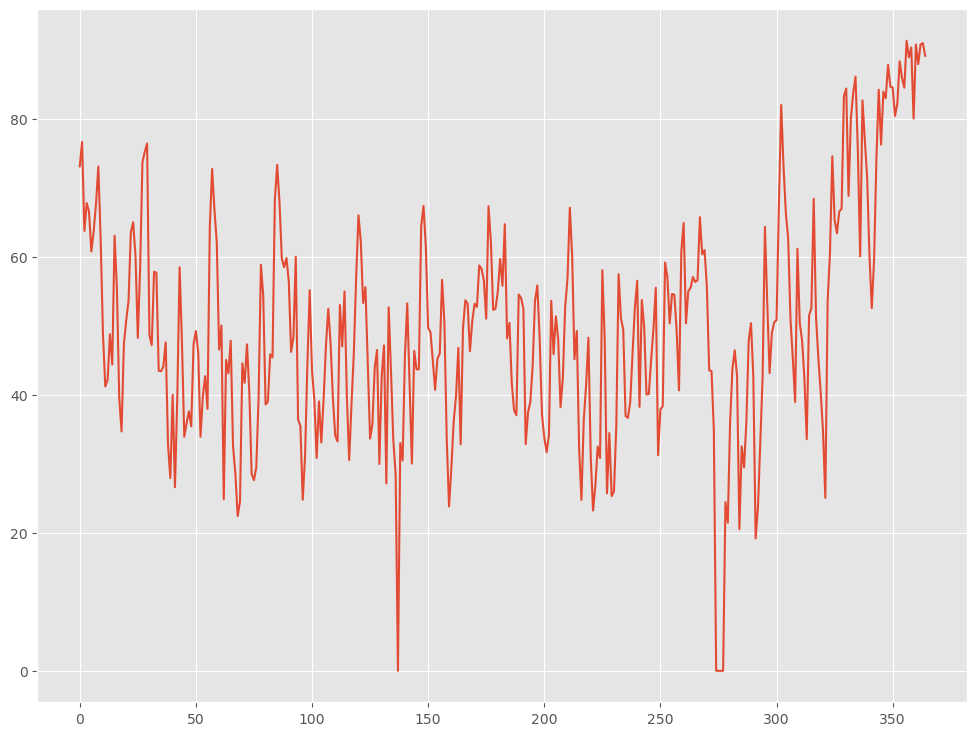

In [24]:
submit = pd.DataFrame({'datetime' : test_data.index, 'pred' : pred_lgb})

print(submit)

# 閉店時の予測値を0に置き換える
for i in test_data2[test_data2['close']==1].index:
    submit['pred'].iloc[i] = 0
    
# 予測値を描画
plt.plot(submit['pred'])

submit.columns = submit.iloc[0]
print(submit)
submit.to_csv('LGBM0907_1.csv', index=False)

In [58]:
### XGBoost ###

import xgboost as xgb
regressor = xgb.XGBRegressor()
regressor.fit(x_tr.values, y_tr.values)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
# 特徴量重要度（Feature Importances）
df_importance = pd.DataFrame(zip(x_tr.columns,
                                 regressor.feature_importances_),
                             columns=["Features","Importance"])
df_importance = df_importance.sort_values("Importance",
                                          ascending=False)
df_importance #確認

,Features,Importance
7,y_lag_365,0.284230
3,price,0.168052
4,year,0.122098
1,price_am,0.099351
13,price_pm_lag_365,0.078436
2,price_pm,0.067654
5,month,0.039875
11,price_pm_lag_1,0.025654
6,weekday,0.023308
8,price_am_lag_1,0.020810


In [60]:
# 予測
train_pred = regressor.predict(x_tr.values)
valid_pred = regressor.predict(x_va.values)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# 精度指標（テストデータ）
print('RMSE:')
print(np.sqrt(mean_squared_error(y_test, valid_pred)))
print('MAE:')
print(mean_absolute_error(y_test, valid_pred))
print('MAPE:')
print(mean_absolute_percentage_error(y_test, valid_pred))

RMSE:
10.934731517431167
MAE:
8.636187874780942
MAPE:
0.19143021731858223


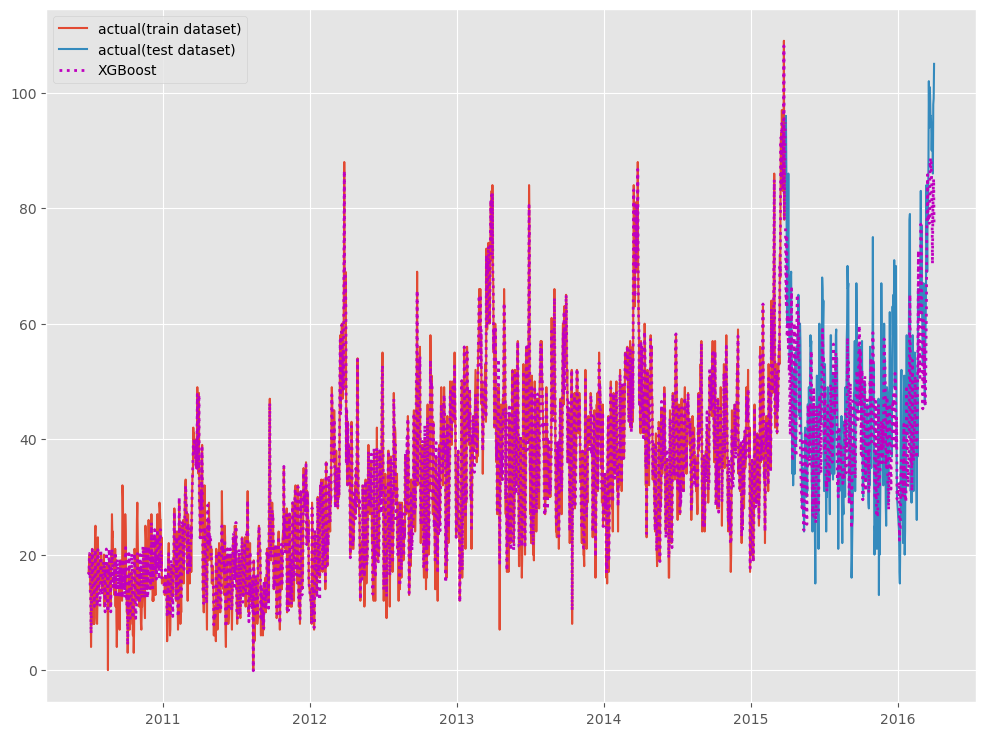

In [61]:
# グラフ化
fig, ax = plt.subplots()
ax.plot(y_train.index, y_train.values, label="actual(train dataset)")
ax.plot(y_test.index, y_test.values, label="actual(test dataset)")
ax.plot(y_train.index, train_pred, linestyle="dotted", lw=2,color="m")
ax.plot(y_test.index, test_pred, label="XGBoost", linestyle="dotted", lw=2, color="m") 
plt.legend()

In [66]:
pred_xgb = regressor.predict(test_data_open.values)

submit_xgb = pd.DataFrame({'datetime' : test_data.index, 'pred' : pred_xgb})

# 閉店時の予測値を0に置き換える
for i in test_data2[test_data2['close']==1].index:
    submit_xgb['pred'].iloc[i] = 0

submit_xgb

/var/folders/55/p_rc8dfn457_yr0748h20c4r0000gn/T/ipykernel_1215/3180076692.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  submit_xgb['pred'].iloc[i] = 0
/var/folders/55/p_rc8dfn457_yr0748h20c4r0000gn/T/ipykernel_1215/3180076692.py:7: Se

,datetime,pred
0,2016-04-01,63.198486
1,2016-04-02,75.893250
2,2016-04-03,55.166782
3,2016-04-04,62.232346
4,2016-04-05,72.111298
...,...,...
360,2017-03-27,70.372025
361,2017-03-28,71.345116
362,2017-03-29,81.478096
363,2017-03-30,90.237473


In [72]:
# 平均をとってアンサンブル
submit_ensemble = pd.DataFrame({'datetime' : test_data.index, 'pred' : ((pred_xgb) + (pred_lgb)) / 2})
submit_ensemble.columns = submit.iloc[0]

In [73]:
submit_ensemble

,2016-04-01 00:00:00,66.407773
0,2016-04-01,64.803130
1,2016-04-02,71.582382
2,2016-04-03,60.866888
3,2016-04-04,67.772229
4,2016-04-05,66.055382
...,...,...
360,2017-03-27,74.048084
361,2017-03-28,74.534630
362,2017-03-29,80.658171
363,2017-03-30,87.388396


In [74]:
submit_ensemble.to_csv('ensemble_0903_1.csv', index=False)